# BANK NOTE ANALYSIS

**Data set Information**

Data were extracted from images  that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspected was used. The final images 400x400 pixels. The final images have 400x400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images

**Attribute information:**
1. variace of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

### Can we classify banknote as fake or genuine

In [2]:
# Import the libraries
from pyforest import*

In [6]:
# THIS IS FOR CHECKING THE IMPORTED LIBRARIES
lazy_imports()

['import bokeh',
 'from sklearn.ensemble import RandomForestRegressor',
 'import awswrangler as wr',
 'import matplotlib as mpl',
 'import pydot',
 'import tensorflow as tf',
 'import torch',
 'import keras',
 'from fbprophet import Prophet',
 'from sklearn.cluster import KMeans',
 'from sklearn.impute import SimpleImputer',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn import svm',
 'from sklearn import metrics',
 'from sklearn.model_selection import KFold',
 'import plotly as py',
 'import tqdm',
 'import matplotlib.pyplot as plt',
 'import pickle',
 'from sklearn.model_selection import train_test_split',
 'import statsmodels.api as sm',
 'import sklearn',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import textblob',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.ensemble import RandomForestClassifier',
 'import cv2',
 'from sklearn.linear_model import LinearRegression',
 'import fbprophet',
 'import fastai',
 'from 

In [3]:
# Importing the dataset
df = pd.read_csv('banknote.csv')

<IPython.core.display.Javascript object>

In [4]:
df.head()


variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [11]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [25]:
# making the dataset with 2 decimal places
df1= df.round(2)
df1

variance  skewness  curtosis  entropy  class
0         3.62      8.67     -2.81    -0.45      0
1         4.55      8.17     -2.46    -1.46      0
2         3.87     -2.64      1.92     0.11      0
3         3.46      9.52     -4.01    -3.59      0
4         0.33     -4.46      4.57    -0.99      0
...        ...       ...       ...      ...    ...
1367      0.41      1.35     -1.45    -0.56      1
1368     -1.39     -4.88      6.48     0.34      1
1369     -3.75    -13.46     17.59    -2.78      1
1370     -3.56     -8.38     12.39    -1.28      1
1371     -2.54     -0.66      2.68     1.20      1

[1372 rows x 5 columns]

### Visualization

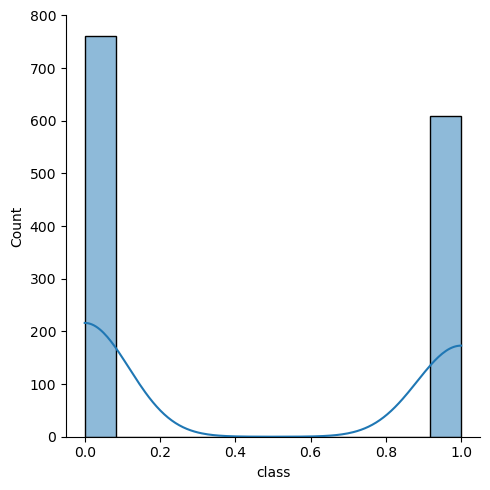

In [60]:


sns.displot(data=df, x="class",kde=True)


array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>,
        <Axes: title={'center': 'curtosis'}>],
       [<Axes: title={'center': 'entropy'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

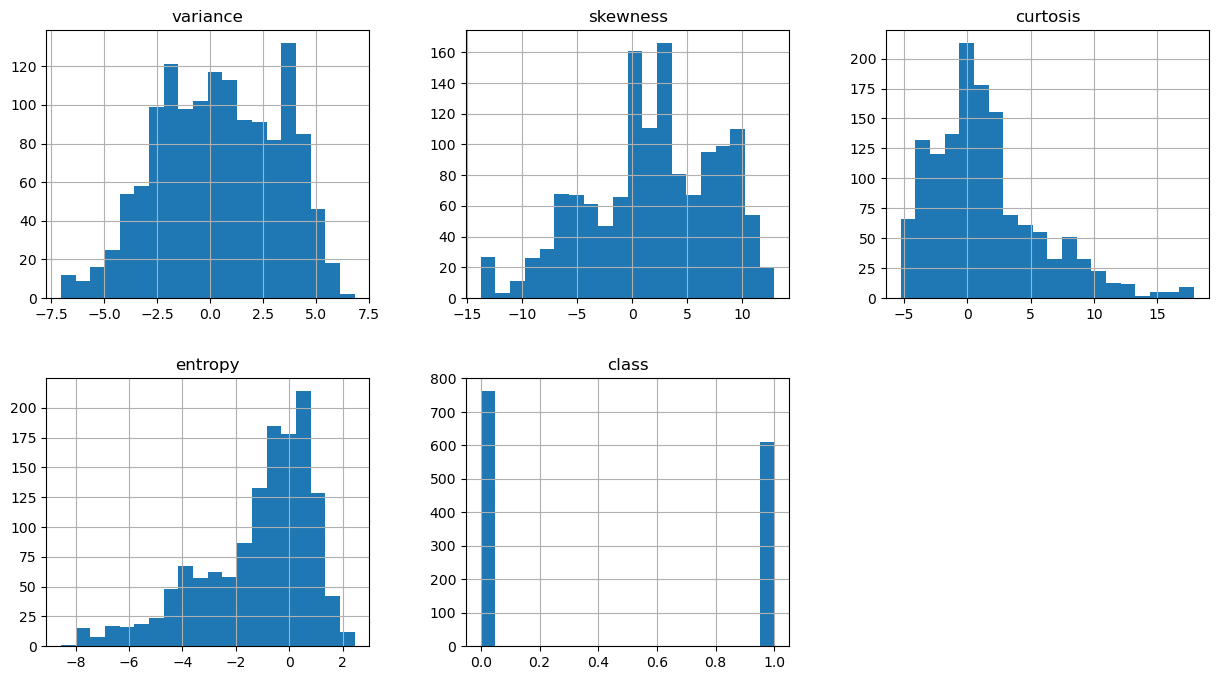

In [63]:

df.hist(bins=20,figsize=(15,8),layout=(2,3))

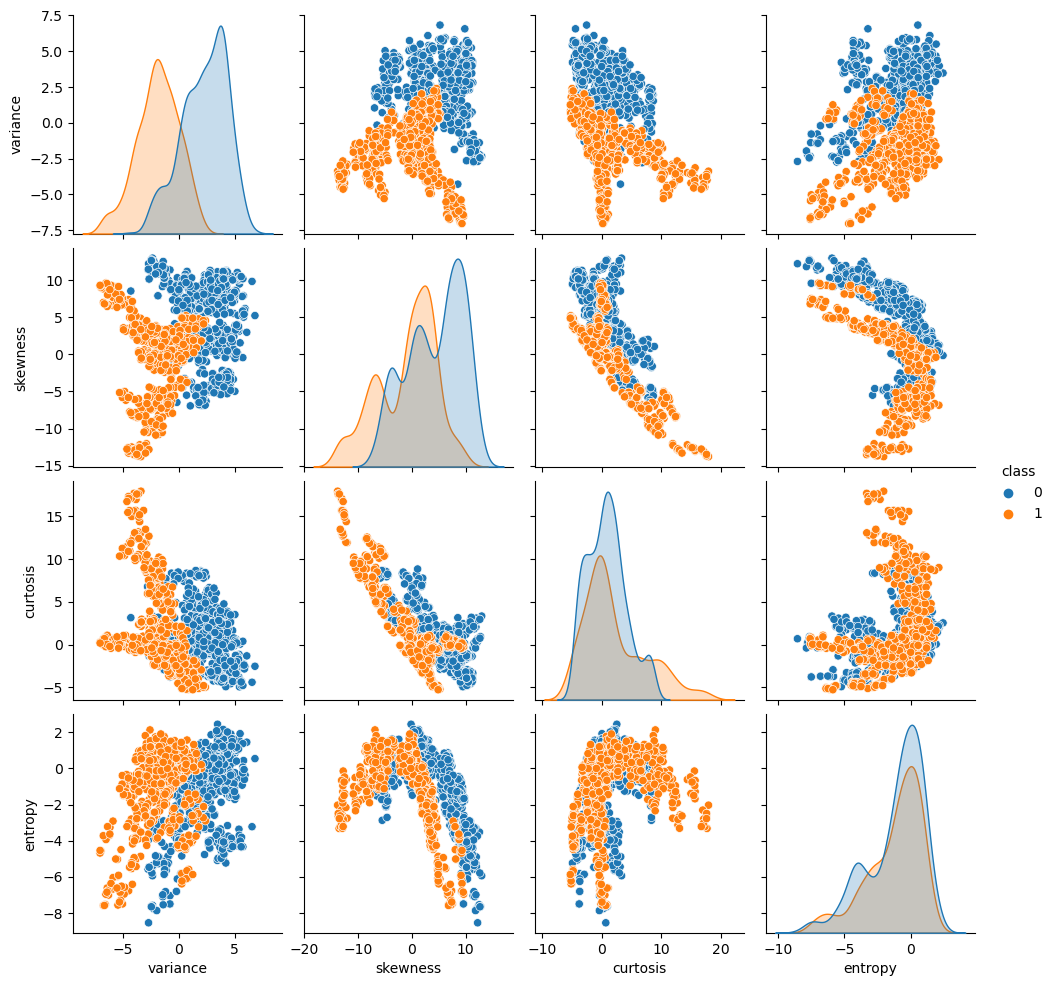

In [64]:
sns.pairplot(data=df, hue='class')

### Preparing the Data to Build a model

In [4]:
df.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

### PREPARING THE DATA TO BE TRAIN AND TEST

In [5]:
# Preparing the x and y dataset
x = df.drop('class', axis=1)
y = df['class']

In [6]:
# split the data to train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

<IPython.core.display.Javascript object>

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
x = scaler.fit_transform(x)
x_train=scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


## 1.LOGISTIC REGRESSION MODEL

#### IMPORT THE LIBRARIES

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Create the model

In [28]:
model_clf = LogisticRegression(solver='liblinear',random_state=42)

<IPython.core.display.Javascript object>

### Fit the model

In [22]:
model_clf.fit(x_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Evaluate the model

In [26]:
def df_eval(model):
   print(f"Train Score: {round(model.score(x_train,y_train)*100,2)}")
   print(f"Test Score:{round(model.score(x_test,y_test)*100,2)}")
    

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



In [ ]:
accuracy = cross_val_score(estimator=model_clf,X=x_train,y=y_train,cv=10)
print(f"Accuracies:\n{accuracy}")

In [30]:
print(f"Mean Accuracy:{round(accuracy.mean(),2)}")

Mean Accuracy:0.98


In [35]:
df_eval(x_train,y_train,x_test,y_test)

Train Score: 98.18
Test Score:97.82


### Predict the model

In [38]:
acc_pred_clf = model_clf.predict(x_test)

### Do the confusion matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

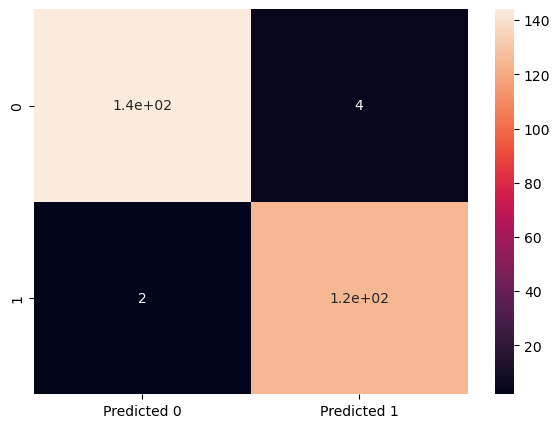

In [40]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,acc_pred_clf,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

## 2. Support Vector Classifier

In [29]:
# import the libraries
from sklearn.svm import SVC

# Create the model
model_svc = SVC(kernel='linear')

# Fit the model
model_svc.fit(x_train,y_train)

SVC(kernel='linear')

### PREDICT THE MODEL

In [18]:
svc_pred = model_svc.predict(x_test)

### EVALUATE THE MODEL


In [9]:
df_eval(x_train,y_train,x_test,y_test,model_svc)

Train Score: 98.81
Test Score:98.55


In [13]:
accuracy = cross_val_score(estimator=model_svc, X =x_train, y= y_train, cv=10 )
print(f"Accuracies:{accuracy}")

Accuracies:[0.98181818 1.         1.         0.96363636 0.97272727 0.98181818
 1.         0.97247706 1.         0.98165138]


In [16]:
# mean of the accuracy
print(f"The Mean Accuracy: {round(accuracy.mean()*100,2)}%")

The Mean Accuracy: 98.54%


### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

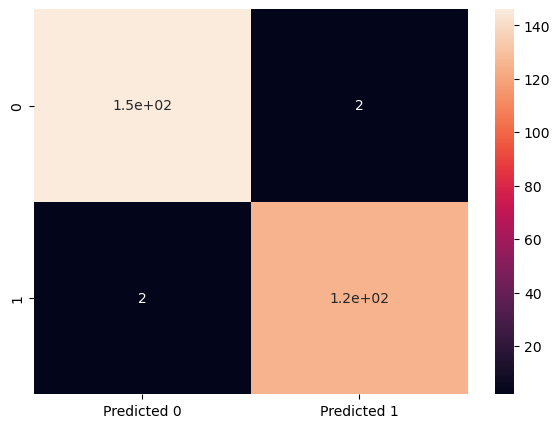

In [20]:
cm = metrics.confusion_matrix(y_test,svc_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]], columns=[i for i in ['Predicted 0', 'Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

### SVM(rbf)

Kernels in SVM classification refer to the function that is responsible for defining the decision boundaries between the classes. Apart from the classic linear kernel which assumes that the different classes are separated by a straight line, a RBF (radial basis function) kernel is used when the boundaries are hypothesized to be curve-shaped.

RBF kernel uses two main parameters, gamma and C that are related to:

* the decision region (how spread the region is), and
* the penalty for misclassifying a data point


respectively

In [9]:
# import the libraries
from sklearn.svm import SVC

# Create the model
model_svc_rbf = SVC(kernel='rbf')

# Fit the model
model_svc_rbf.fit(x_train,y_train)

SVC()

### evaluate the model

In [13]:
df_eval(x_train,y_train,x_test,y_test,model_svc_rbf)

Train Score: 100.0
Test Score:100.0


In [14]:
accuracy = cross_val_score(estimator=model_svc_rbf,X=x_train,y=y_train,cv=10)
accuracy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
print(f"Accuracy Mean: {round(accuracy.mean()*100,2)}")

Accuracy Mean: 100.0


In [16]:
svc_rbf_pred = model_svc_rbf.predict(x_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

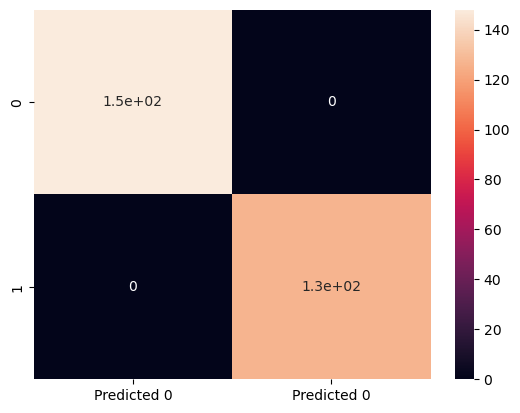

In [17]:
cm = metrics.confusion_matrix(y_test,svc_rbf_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[ i for i in [0,1]], columns=[ i for i in ['Predicted 0', 'Predicted 0']])
sns.heatmap(df_cm, annot=True)

### 3. RandomForestClassifier

In [19]:
# Import the library
from sklearn.ensemble import RandomForestClassifier

# Create the model
model_rfc = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=42)

# Fit the model
model_rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [21]:
# Predict the model
rfc_pred = model_rfc.predict(x_test)

#### Evaluate the model

In [27]:
df_eval(model_rfc)

Train Score: 100.0
Test Score:98.91


In [22]:
accuracy = cross_val_score(estimator=model_rfc, X=x_train, y=y_train, cv = 10)
accuracy

array([1.        , 0.98181818, 0.98181818, 0.99090909, 0.98181818,
       1.        , 1.        , 0.99082569, 0.99082569, 0.99082569])

In [23]:
print(f"Accuracy Mean: {accuracy.mean()}")

Accuracy Mean: 0.990884070058382


#### Confusion Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

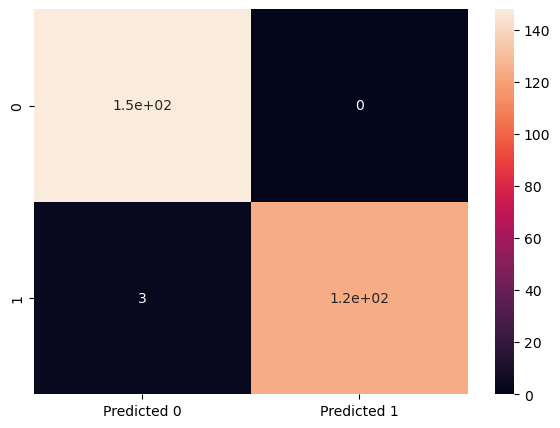

In [25]:
cm = metrics.confusion_matrix(y_test,rfc_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]], columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot= True)

### 4.KNeighborsClassifier and GridSearchCV

In [42]:
def df_confusion_matrix(predict):
    cm= metrics.confusion_matrix(y_test,predict,labels=[0,1])
    df_cm= pd.DataFrame(cm,index=[i for i in [0,1]], columns=[i for i in ['Predicted 0', 'Predicted 1']])
    
    plt.figure(figsize=[7,5])
    sns.heatmap(df_cm,annot=True)

In [70]:
def df_acc(model):
    accuracy = cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
    print(f"Accuracy Mean: {round(accuracy.mean()*100,2)}%")
    return accuracy

In [35]:
# Import Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size':[2,5,7,9,11],
              'n_neighbors':[2,5,7,9,11],
             'p':[1,2]}
# Create the model
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=10)

# Fit the model
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [40]:
# Predict the model
grid_pred = grid.predict(x_test)

#### Evaluate the grid model

In [36]:
df_eval(grid)

Train Score: 100.0
Test Score:100.0


#### grid model confusion matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

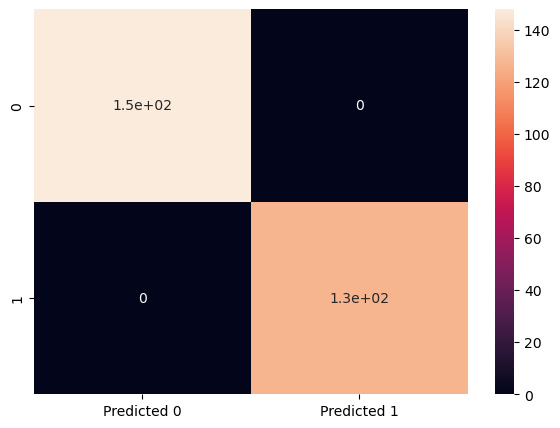

In [43]:
df_confusion_matrix(grid_pred)

In [44]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

#### KNN MODEL

In [46]:
# Create the model
model_knn = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2)

# Fit the model
model_knn.fit(x_train,y_train)

# Predict the model
knn_pred = model_knn.predict(x_test)

In [47]:
df_eval(model_knn)

Train Score: 100.0
Test Score:100.0


In [52]:
df_acc(model_knn)

Accuracy Mean: 99.82%


array([1.        , 1.        , 0.99090909, 1.        , 1.        ,
       0.99090909, 1.        , 1.        , 1.        , 1.        ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

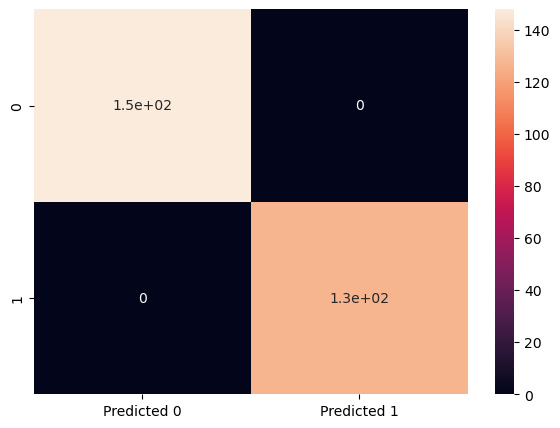

In [48]:
df_confusion_matrix(knn_pred)

## 5. Multilayer Perception

In [57]:
# import libraries
from sklearn.neural_network import MLPClassifier

# Crate a model
# A lower tol value will result in a more accurate model, but it will also take longer to train. A higher tol value will result in a less accurate model, but it will train faster.
model_mlp = MLPClassifier(hidden_layer_sizes=(8,4),max_iter=8000, alpha=0.0001,solver='sgd',verbose=10,random_state=42,tol=0.000000001)

# Fit the model
model_mlp.fit(x_train,y_train)

Iteration 1, loss = 0.63083572
Iteration 2, loss = 0.62299357
Iteration 3, loss = 0.61193237
Iteration 4, loss = 0.59986050
Iteration 5, loss = 0.58817420
Iteration 6, loss = 0.57724992
Iteration 7, loss = 0.56682890
Iteration 8, loss = 0.55739550
Iteration 9, loss = 0.54832741
Iteration 10, loss = 0.54015385
Iteration 11, loss = 0.53230208
Iteration 12, loss = 0.52483902
Iteration 13, loss = 0.51787563
Iteration 14, loss = 0.51112151
Iteration 15, loss = 0.50459679
Iteration 16, loss = 0.49831382
Iteration 17, loss = 0.49225457
Iteration 18, loss = 0.48630157
Iteration 19, loss = 0.48062787
Iteration 20, loss = 0.47500459
Iteration 21, loss = 0.46951463
Iteration 22, loss = 0.46416550
Iteration 23, loss = 0.45899570
Iteration 24, loss = 0.45387880
Iteration 25, loss = 0.44893925
Iteration 26, loss = 0.44400194
Iteration 27, loss = 0.43924681
Iteration 28, loss = 0.43450825
Iteration 29, loss = 0.42988982
Iteration 30, loss = 0.42531659
Iteration 31, loss = 0.42085262
Iteration 32, los

Iteration 322, loss = 0.08550467
Iteration 323, loss = 0.08529503
Iteration 324, loss = 0.08508611
Iteration 325, loss = 0.08488005
Iteration 326, loss = 0.08467532
Iteration 327, loss = 0.08447369
Iteration 328, loss = 0.08426907
Iteration 329, loss = 0.08406973
Iteration 330, loss = 0.08386794
Iteration 331, loss = 0.08366676
Iteration 332, loss = 0.08347370
Iteration 333, loss = 0.08327304
Iteration 334, loss = 0.08307793
Iteration 335, loss = 0.08288363
Iteration 336, loss = 0.08269148
Iteration 337, loss = 0.08250035
Iteration 338, loss = 0.08230814
Iteration 339, loss = 0.08211521
Iteration 340, loss = 0.08192607
Iteration 341, loss = 0.08173967
Iteration 342, loss = 0.08155001
Iteration 343, loss = 0.08136574
Iteration 344, loss = 0.08117686
Iteration 345, loss = 0.08099093
Iteration 346, loss = 0.08080732
Iteration 347, loss = 0.08062578
Iteration 348, loss = 0.08044315
Iteration 349, loss = 0.08026226
Iteration 350, loss = 0.08008220
Iteration 351, loss = 0.07990473
Iteration 

Iteration 637, loss = 0.04938326
Iteration 638, loss = 0.04931744
Iteration 639, loss = 0.04924966
Iteration 640, loss = 0.04918433
Iteration 641, loss = 0.04912205
Iteration 642, loss = 0.04905060
Iteration 643, loss = 0.04898543
Iteration 644, loss = 0.04892077
Iteration 645, loss = 0.04885849
Iteration 646, loss = 0.04879321
Iteration 647, loss = 0.04872916
Iteration 648, loss = 0.04866620
Iteration 649, loss = 0.04859849
Iteration 650, loss = 0.04853453
Iteration 651, loss = 0.04847272
Iteration 652, loss = 0.04840836
Iteration 653, loss = 0.04834516
Iteration 654, loss = 0.04828112
Iteration 655, loss = 0.04821636
Iteration 656, loss = 0.04815334
Iteration 657, loss = 0.04809096
Iteration 658, loss = 0.04802821
Iteration 659, loss = 0.04796711
Iteration 660, loss = 0.04790649
Iteration 661, loss = 0.04784092
Iteration 662, loss = 0.04777896
Iteration 663, loss = 0.04771702
Iteration 664, loss = 0.04765792
Iteration 665, loss = 0.04759471
Iteration 666, loss = 0.04753715
Iteration 

Iteration 966, loss = 0.03400443
Iteration 967, loss = 0.03397172
Iteration 968, loss = 0.03393533
Iteration 969, loss = 0.03390512
Iteration 970, loss = 0.03386964
Iteration 971, loss = 0.03383898
Iteration 972, loss = 0.03380135
Iteration 973, loss = 0.03376856
Iteration 974, loss = 0.03373501
Iteration 975, loss = 0.03370577
Iteration 976, loss = 0.03367114
Iteration 977, loss = 0.03363565
Iteration 978, loss = 0.03360367
Iteration 979, loss = 0.03357106
Iteration 980, loss = 0.03353919
Iteration 981, loss = 0.03350631
Iteration 982, loss = 0.03347335
Iteration 983, loss = 0.03344040
Iteration 984, loss = 0.03340765
Iteration 985, loss = 0.03337475
Iteration 986, loss = 0.03334378
Iteration 987, loss = 0.03331146
Iteration 988, loss = 0.03327895
Iteration 989, loss = 0.03324632
Iteration 990, loss = 0.03321324
Iteration 991, loss = 0.03318026
Iteration 992, loss = 0.03315032
Iteration 993, loss = 0.03311643
Iteration 994, loss = 0.03308530
Iteration 995, loss = 0.03305286
Iteration 

Iteration 1214, loss = 0.02674933
Iteration 1215, loss = 0.02672551
Iteration 1216, loss = 0.02670011
Iteration 1217, loss = 0.02667666
Iteration 1218, loss = 0.02665148
Iteration 1219, loss = 0.02662863
Iteration 1220, loss = 0.02660237
Iteration 1221, loss = 0.02657822
Iteration 1222, loss = 0.02655525
Iteration 1223, loss = 0.02652986
Iteration 1224, loss = 0.02650639
Iteration 1225, loss = 0.02648324
Iteration 1226, loss = 0.02645763
Iteration 1227, loss = 0.02643551
Iteration 1228, loss = 0.02641025
Iteration 1229, loss = 0.02638615
Iteration 1230, loss = 0.02636407
Iteration 1231, loss = 0.02633946
Iteration 1232, loss = 0.02631922
Iteration 1233, loss = 0.02629321
Iteration 1234, loss = 0.02627087
Iteration 1235, loss = 0.02624560
Iteration 1236, loss = 0.02622161
Iteration 1237, loss = 0.02619896
Iteration 1238, loss = 0.02617545
Iteration 1239, loss = 0.02615208
Iteration 1240, loss = 0.02612751
Iteration 1241, loss = 0.02610440
Iteration 1242, loss = 0.02608000
Iteration 1243

Iteration 1467, loss = 0.02159826
Iteration 1468, loss = 0.02158253
Iteration 1469, loss = 0.02156420
Iteration 1470, loss = 0.02154672
Iteration 1471, loss = 0.02152975
Iteration 1472, loss = 0.02151403
Iteration 1473, loss = 0.02149547
Iteration 1474, loss = 0.02147785
Iteration 1475, loss = 0.02146212
Iteration 1476, loss = 0.02144400
Iteration 1477, loss = 0.02142865
Iteration 1478, loss = 0.02140958
Iteration 1479, loss = 0.02139387
Iteration 1480, loss = 0.02137805
Iteration 1481, loss = 0.02135989
Iteration 1482, loss = 0.02134485
Iteration 1483, loss = 0.02132614
Iteration 1484, loss = 0.02131010
Iteration 1485, loss = 0.02129230
Iteration 1486, loss = 0.02127518
Iteration 1487, loss = 0.02125890
Iteration 1488, loss = 0.02124229
Iteration 1489, loss = 0.02122576
Iteration 1490, loss = 0.02120899
Iteration 1491, loss = 0.02119264
Iteration 1492, loss = 0.02117538
Iteration 1493, loss = 0.02116029
Iteration 1494, loss = 0.02114282
Iteration 1495, loss = 0.02112593
Iteration 1496

Iteration 1714, loss = 0.01799137
Iteration 1715, loss = 0.01797905
Iteration 1716, loss = 0.01796721
Iteration 1717, loss = 0.01795447
Iteration 1718, loss = 0.01794224
Iteration 1719, loss = 0.01793015
Iteration 1720, loss = 0.01791820
Iteration 1721, loss = 0.01790667
Iteration 1722, loss = 0.01789284
Iteration 1723, loss = 0.01788156
Iteration 1724, loss = 0.01786892
Iteration 1725, loss = 0.01785641
Iteration 1726, loss = 0.01784399
Iteration 1727, loss = 0.01783178
Iteration 1728, loss = 0.01781987
Iteration 1729, loss = 0.01780754
Iteration 1730, loss = 0.01779564
Iteration 1731, loss = 0.01778472
Iteration 1732, loss = 0.01777127
Iteration 1733, loss = 0.01776006
Iteration 1734, loss = 0.01774780
Iteration 1735, loss = 0.01773529
Iteration 1736, loss = 0.01772310
Iteration 1737, loss = 0.01771079
Iteration 1738, loss = 0.01769921
Iteration 1739, loss = 0.01768873
Iteration 1740, loss = 0.01767568
Iteration 1741, loss = 0.01766251
Iteration 1742, loss = 0.01765148
Iteration 1743

Iteration 1958, loss = 0.01536816
Iteration 1959, loss = 0.01535938
Iteration 1960, loss = 0.01535018
Iteration 1961, loss = 0.01534062
Iteration 1962, loss = 0.01533228
Iteration 1963, loss = 0.01532255
Iteration 1964, loss = 0.01531361
Iteration 1965, loss = 0.01530474
Iteration 1966, loss = 0.01529519
Iteration 1967, loss = 0.01528626
Iteration 1968, loss = 0.01527698
Iteration 1969, loss = 0.01526942
Iteration 1970, loss = 0.01525908
Iteration 1971, loss = 0.01525009
Iteration 1972, loss = 0.01524034
Iteration 1973, loss = 0.01523109
Iteration 1974, loss = 0.01522275
Iteration 1975, loss = 0.01521269
Iteration 1976, loss = 0.01520363
Iteration 1977, loss = 0.01519442
Iteration 1978, loss = 0.01518621
Iteration 1979, loss = 0.01517637
Iteration 1980, loss = 0.01516747
Iteration 1981, loss = 0.01515768
Iteration 1982, loss = 0.01514874
Iteration 1983, loss = 0.01513947
Iteration 1984, loss = 0.01513121
Iteration 1985, loss = 0.01512171
Iteration 1986, loss = 0.01511258
Iteration 1987

Iteration 2276, loss = 0.01284398
Iteration 2277, loss = 0.01283726
Iteration 2278, loss = 0.01283073
Iteration 2279, loss = 0.01282366
Iteration 2280, loss = 0.01281701
Iteration 2281, loss = 0.01280998
Iteration 2282, loss = 0.01280375
Iteration 2283, loss = 0.01279795
Iteration 2284, loss = 0.01279187
Iteration 2285, loss = 0.01278347
Iteration 2286, loss = 0.01277701
Iteration 2287, loss = 0.01277050
Iteration 2288, loss = 0.01276364
Iteration 2289, loss = 0.01275712
Iteration 2290, loss = 0.01274995
Iteration 2291, loss = 0.01274342
Iteration 2292, loss = 0.01273704
Iteration 2293, loss = 0.01273016
Iteration 2294, loss = 0.01272393
Iteration 2295, loss = 0.01271696
Iteration 2296, loss = 0.01271032
Iteration 2297, loss = 0.01270380
Iteration 2298, loss = 0.01269722
Iteration 2299, loss = 0.01269059
Iteration 2300, loss = 0.01268412
Iteration 2301, loss = 0.01267758
Iteration 2302, loss = 0.01267084
Iteration 2303, loss = 0.01266476
Iteration 2304, loss = 0.01265796
Iteration 2305

Iteration 2599, loss = 0.01097412
Iteration 2600, loss = 0.01096926
Iteration 2601, loss = 0.01096437
Iteration 2602, loss = 0.01095916
Iteration 2603, loss = 0.01095429
Iteration 2604, loss = 0.01094922
Iteration 2605, loss = 0.01094378
Iteration 2606, loss = 0.01093877
Iteration 2607, loss = 0.01093377
Iteration 2608, loss = 0.01092872
Iteration 2609, loss = 0.01092404
Iteration 2610, loss = 0.01091912
Iteration 2611, loss = 0.01091402
Iteration 2612, loss = 0.01090952
Iteration 2613, loss = 0.01090404
Iteration 2614, loss = 0.01089889
Iteration 2615, loss = 0.01089437
Iteration 2616, loss = 0.01088927
Iteration 2617, loss = 0.01088468
Iteration 2618, loss = 0.01087950
Iteration 2619, loss = 0.01087437
Iteration 2620, loss = 0.01086935
Iteration 2621, loss = 0.01086452
Iteration 2622, loss = 0.01085981
Iteration 2623, loss = 0.01085465
Iteration 2624, loss = 0.01085007
Iteration 2625, loss = 0.01084503
Iteration 2626, loss = 0.01084031
Iteration 2627, loss = 0.01083509
Iteration 2628

Iteration 2841, loss = 0.00987707
Iteration 2842, loss = 0.00987198
Iteration 2843, loss = 0.00986832
Iteration 2844, loss = 0.00986392
Iteration 2845, loss = 0.00986002
Iteration 2846, loss = 0.00985572
Iteration 2847, loss = 0.00985167
Iteration 2848, loss = 0.00984768
Iteration 2849, loss = 0.00984389
Iteration 2850, loss = 0.00983975
Iteration 2851, loss = 0.00983546
Iteration 2852, loss = 0.00983173
Iteration 2853, loss = 0.00982751
Iteration 2854, loss = 0.00982345
Iteration 2855, loss = 0.00981948
Iteration 2856, loss = 0.00981502
Iteration 2857, loss = 0.00981114
Iteration 2858, loss = 0.00980718
Iteration 2859, loss = 0.00980329
Iteration 2860, loss = 0.00979915
Iteration 2861, loss = 0.00979502
Iteration 2862, loss = 0.00979177
Iteration 2863, loss = 0.00978697
Iteration 2864, loss = 0.00978314
Iteration 2865, loss = 0.00977907
Iteration 2866, loss = 0.00977535
Iteration 2867, loss = 0.00977093
Iteration 2868, loss = 0.00976692
Iteration 2869, loss = 0.00976298
Iteration 2870

Iteration 3155, loss = 0.00872599
Iteration 3156, loss = 0.00872287
Iteration 3157, loss = 0.00871930
Iteration 3158, loss = 0.00871622
Iteration 3159, loss = 0.00871258
Iteration 3160, loss = 0.00870940
Iteration 3161, loss = 0.00870601
Iteration 3162, loss = 0.00870286
Iteration 3163, loss = 0.00869962
Iteration 3164, loss = 0.00869644
Iteration 3165, loss = 0.00869303
Iteration 3166, loss = 0.00868997
Iteration 3167, loss = 0.00868657
Iteration 3168, loss = 0.00868353
Iteration 3169, loss = 0.00868032
Iteration 3170, loss = 0.00867709
Iteration 3171, loss = 0.00867383
Iteration 3172, loss = 0.00867048
Iteration 3173, loss = 0.00866709
Iteration 3174, loss = 0.00866419
Iteration 3175, loss = 0.00866110
Iteration 3176, loss = 0.00865740
Iteration 3177, loss = 0.00865436
Iteration 3178, loss = 0.00865090
Iteration 3179, loss = 0.00864777
Iteration 3180, loss = 0.00864477
Iteration 3181, loss = 0.00864150
Iteration 3182, loss = 0.00863826
Iteration 3183, loss = 0.00863530
Iteration 3184

Iteration 3470, loss = 0.00780221
Iteration 3471, loss = 0.00779946
Iteration 3472, loss = 0.00779690
Iteration 3473, loss = 0.00779419
Iteration 3474, loss = 0.00779185
Iteration 3475, loss = 0.00778898
Iteration 3476, loss = 0.00778637
Iteration 3477, loss = 0.00778384
Iteration 3478, loss = 0.00778108
Iteration 3479, loss = 0.00777854
Iteration 3480, loss = 0.00777612
Iteration 3481, loss = 0.00777336
Iteration 3482, loss = 0.00777062
Iteration 3483, loss = 0.00776813
Iteration 3484, loss = 0.00776565
Iteration 3485, loss = 0.00776276
Iteration 3486, loss = 0.00776017
Iteration 3487, loss = 0.00775763
Iteration 3488, loss = 0.00775475
Iteration 3489, loss = 0.00775221
Iteration 3490, loss = 0.00774954
Iteration 3491, loss = 0.00774692
Iteration 3492, loss = 0.00774430
Iteration 3493, loss = 0.00774201
Iteration 3494, loss = 0.00773914
Iteration 3495, loss = 0.00773659
Iteration 3496, loss = 0.00773397
Iteration 3497, loss = 0.00773148
Iteration 3498, loss = 0.00772889
Iteration 3499

Iteration 3789, loss = 0.00704062
Iteration 3790, loss = 0.00703832
Iteration 3791, loss = 0.00703617
Iteration 3792, loss = 0.00703405
Iteration 3793, loss = 0.00703177
Iteration 3794, loss = 0.00702979
Iteration 3795, loss = 0.00702754
Iteration 3796, loss = 0.00702525
Iteration 3797, loss = 0.00702326
Iteration 3798, loss = 0.00702113
Iteration 3799, loss = 0.00701899
Iteration 3800, loss = 0.00701673
Iteration 3801, loss = 0.00701482
Iteration 3802, loss = 0.00701254
Iteration 3803, loss = 0.00701045
Iteration 3804, loss = 0.00700822
Iteration 3805, loss = 0.00700612
Iteration 3806, loss = 0.00700428
Iteration 3807, loss = 0.00700191
Iteration 3808, loss = 0.00700003
Iteration 3809, loss = 0.00699774
Iteration 3810, loss = 0.00699581
Iteration 3811, loss = 0.00699364
Iteration 3812, loss = 0.00699149
Iteration 3813, loss = 0.00698923
Iteration 3814, loss = 0.00698734
Iteration 3815, loss = 0.00698524
Iteration 3816, loss = 0.00698298
Iteration 3817, loss = 0.00698093
Iteration 3818

Iteration 4106, loss = 0.00641655
Iteration 4107, loss = 0.00641460
Iteration 4108, loss = 0.00641274
Iteration 4109, loss = 0.00641094
Iteration 4110, loss = 0.00640930
Iteration 4111, loss = 0.00640766
Iteration 4112, loss = 0.00640556
Iteration 4113, loss = 0.00640389
Iteration 4114, loss = 0.00640202
Iteration 4115, loss = 0.00640029
Iteration 4116, loss = 0.00639840
Iteration 4117, loss = 0.00639660
Iteration 4118, loss = 0.00639487
Iteration 4119, loss = 0.00639308
Iteration 4120, loss = 0.00639129
Iteration 4121, loss = 0.00638948
Iteration 4122, loss = 0.00638774
Iteration 4123, loss = 0.00638597
Iteration 4124, loss = 0.00638429
Iteration 4125, loss = 0.00638244
Iteration 4126, loss = 0.00638081
Iteration 4127, loss = 0.00637892
Iteration 4128, loss = 0.00637712
Iteration 4129, loss = 0.00637545
Iteration 4130, loss = 0.00637370
Iteration 4131, loss = 0.00637183
Iteration 4132, loss = 0.00637003
Iteration 4133, loss = 0.00636827
Iteration 4134, loss = 0.00636646
Iteration 4135

Iteration 4422, loss = 0.00589253
Iteration 4423, loss = 0.00589095
Iteration 4424, loss = 0.00588947
Iteration 4425, loss = 0.00588790
Iteration 4426, loss = 0.00588640
Iteration 4427, loss = 0.00588482
Iteration 4428, loss = 0.00588329
Iteration 4429, loss = 0.00588179
Iteration 4430, loss = 0.00588023
Iteration 4431, loss = 0.00587865
Iteration 4432, loss = 0.00587721
Iteration 4433, loss = 0.00587564
Iteration 4434, loss = 0.00587417
Iteration 4435, loss = 0.00587247
Iteration 4436, loss = 0.00587111
Iteration 4437, loss = 0.00586981
Iteration 4438, loss = 0.00586799
Iteration 4439, loss = 0.00586640
Iteration 4440, loss = 0.00586487
Iteration 4441, loss = 0.00586340
Iteration 4442, loss = 0.00586182
Iteration 4443, loss = 0.00586022
Iteration 4444, loss = 0.00585872
Iteration 4445, loss = 0.00585758
Iteration 4446, loss = 0.00585588
Iteration 4447, loss = 0.00585413
Iteration 4448, loss = 0.00585251
Iteration 4449, loss = 0.00585097
Iteration 4450, loss = 0.00584941
Iteration 4451

Iteration 4663, loss = 0.00554205
Iteration 4664, loss = 0.00554069
Iteration 4665, loss = 0.00553951
Iteration 4666, loss = 0.00553803
Iteration 4667, loss = 0.00553668
Iteration 4668, loss = 0.00553523
Iteration 4669, loss = 0.00553379
Iteration 4670, loss = 0.00553249
Iteration 4671, loss = 0.00553105
Iteration 4672, loss = 0.00552975
Iteration 4673, loss = 0.00552844
Iteration 4674, loss = 0.00552706
Iteration 4675, loss = 0.00552568
Iteration 4676, loss = 0.00552436
Iteration 4677, loss = 0.00552300
Iteration 4678, loss = 0.00552161
Iteration 4679, loss = 0.00552035
Iteration 4680, loss = 0.00551897
Iteration 4681, loss = 0.00551751
Iteration 4682, loss = 0.00551630
Iteration 4683, loss = 0.00551481
Iteration 4684, loss = 0.00551355
Iteration 4685, loss = 0.00551208
Iteration 4686, loss = 0.00551098
Iteration 4687, loss = 0.00550933
Iteration 4688, loss = 0.00550801
Iteration 4689, loss = 0.00550662
Iteration 4690, loss = 0.00550529
Iteration 4691, loss = 0.00550399
Iteration 4692

Iteration 4975, loss = 0.00514426
Iteration 4976, loss = 0.00514313
Iteration 4977, loss = 0.00514209
Iteration 4978, loss = 0.00514072
Iteration 4979, loss = 0.00513950
Iteration 4980, loss = 0.00513858
Iteration 4981, loss = 0.00513715
Iteration 4982, loss = 0.00513597
Iteration 4983, loss = 0.00513473
Iteration 4984, loss = 0.00513354
Iteration 4985, loss = 0.00513235
Iteration 4986, loss = 0.00513122
Iteration 4987, loss = 0.00513013
Iteration 4988, loss = 0.00512878
Iteration 4989, loss = 0.00512761
Iteration 4990, loss = 0.00512647
Iteration 4991, loss = 0.00512523
Iteration 4992, loss = 0.00512413
Iteration 4993, loss = 0.00512293
Iteration 4994, loss = 0.00512178
Iteration 4995, loss = 0.00512059
Iteration 4996, loss = 0.00511941
Iteration 4997, loss = 0.00511819
Iteration 4998, loss = 0.00511709
Iteration 4999, loss = 0.00511589
Iteration 5000, loss = 0.00511470
Iteration 5001, loss = 0.00511356
Iteration 5002, loss = 0.00511243
Iteration 5003, loss = 0.00511125
Iteration 5004

Iteration 5216, loss = 0.00487256
Iteration 5217, loss = 0.00487157
Iteration 5218, loss = 0.00487039
Iteration 5219, loss = 0.00486924
Iteration 5220, loss = 0.00486830
Iteration 5221, loss = 0.00486716
Iteration 5222, loss = 0.00486607
Iteration 5223, loss = 0.00486510
Iteration 5224, loss = 0.00486396
Iteration 5225, loss = 0.00486295
Iteration 5226, loss = 0.00486190
Iteration 5227, loss = 0.00486080
Iteration 5228, loss = 0.00485980
Iteration 5229, loss = 0.00485872
Iteration 5230, loss = 0.00485764
Iteration 5231, loss = 0.00485660
Iteration 5232, loss = 0.00485552
Iteration 5233, loss = 0.00485453
Iteration 5234, loss = 0.00485350
Iteration 5235, loss = 0.00485239
Iteration 5236, loss = 0.00485133
Iteration 5237, loss = 0.00485035
Iteration 5238, loss = 0.00484922
Iteration 5239, loss = 0.00484818
Iteration 5240, loss = 0.00484709
Iteration 5241, loss = 0.00484606
Iteration 5242, loss = 0.00484509
Iteration 5243, loss = 0.00484391
Iteration 5244, loss = 0.00484292
Iteration 5245

Iteration 5462, loss = 0.00462185
Iteration 5463, loss = 0.00462090
Iteration 5464, loss = 0.00462008
Iteration 5465, loss = 0.00461893
Iteration 5466, loss = 0.00461804
Iteration 5467, loss = 0.00461699
Iteration 5468, loss = 0.00461609
Iteration 5469, loss = 0.00461514
Iteration 5470, loss = 0.00461412
Iteration 5471, loss = 0.00461318
Iteration 5472, loss = 0.00461221
Iteration 5473, loss = 0.00461132
Iteration 5474, loss = 0.00461029
Iteration 5475, loss = 0.00460931
Iteration 5476, loss = 0.00460830
Iteration 5477, loss = 0.00460745
Iteration 5478, loss = 0.00460643
Iteration 5479, loss = 0.00460546
Iteration 5480, loss = 0.00460454
Iteration 5481, loss = 0.00460365
Iteration 5482, loss = 0.00460258
Iteration 5483, loss = 0.00460160
Iteration 5484, loss = 0.00460071
Iteration 5485, loss = 0.00459978
Iteration 5486, loss = 0.00459872
Iteration 5487, loss = 0.00459782
Iteration 5488, loss = 0.00459693
Iteration 5489, loss = 0.00459589
Iteration 5490, loss = 0.00459489
Iteration 5491

Iteration 5716, loss = 0.00438820
Iteration 5717, loss = 0.00438730
Iteration 5718, loss = 0.00438640
Iteration 5719, loss = 0.00438556
Iteration 5720, loss = 0.00438472
Iteration 5721, loss = 0.00438382
Iteration 5722, loss = 0.00438293
Iteration 5723, loss = 0.00438208
Iteration 5724, loss = 0.00438123
Iteration 5725, loss = 0.00438038
Iteration 5726, loss = 0.00437949
Iteration 5727, loss = 0.00437858
Iteration 5728, loss = 0.00437773
Iteration 5729, loss = 0.00437688
Iteration 5730, loss = 0.00437594
Iteration 5731, loss = 0.00437516
Iteration 5732, loss = 0.00437421
Iteration 5733, loss = 0.00437337
Iteration 5734, loss = 0.00437252
Iteration 5735, loss = 0.00437160
Iteration 5736, loss = 0.00437074
Iteration 5737, loss = 0.00436990
Iteration 5738, loss = 0.00436895
Iteration 5739, loss = 0.00436814
Iteration 5740, loss = 0.00436725
Iteration 5741, loss = 0.00436640
Iteration 5742, loss = 0.00436554
Iteration 5743, loss = 0.00436467
Iteration 5744, loss = 0.00436379
Iteration 5745

Iteration 5958, loss = 0.00418562
Iteration 5959, loss = 0.00418481
Iteration 5960, loss = 0.00418408
Iteration 5961, loss = 0.00418325
Iteration 5962, loss = 0.00418247
Iteration 5963, loss = 0.00418167
Iteration 5964, loss = 0.00418089
Iteration 5965, loss = 0.00418005
Iteration 5966, loss = 0.00417929
Iteration 5967, loss = 0.00417850
Iteration 5968, loss = 0.00417782
Iteration 5969, loss = 0.00417696
Iteration 5970, loss = 0.00417614
Iteration 5971, loss = 0.00417533
Iteration 5972, loss = 0.00417457
Iteration 5973, loss = 0.00417378
Iteration 5974, loss = 0.00417294
Iteration 5975, loss = 0.00417217
Iteration 5976, loss = 0.00417136
Iteration 5977, loss = 0.00417056
Iteration 5978, loss = 0.00416981
Iteration 5979, loss = 0.00416896
Iteration 5980, loss = 0.00416817
Iteration 5981, loss = 0.00416736
Iteration 5982, loss = 0.00416655
Iteration 5983, loss = 0.00416576
Iteration 5984, loss = 0.00416499
Iteration 5985, loss = 0.00416420
Iteration 5986, loss = 0.00416338
Iteration 5987

Iteration 6199, loss = 0.00400113
Iteration 6200, loss = 0.00400043
Iteration 6201, loss = 0.00399974
Iteration 6202, loss = 0.00399895
Iteration 6203, loss = 0.00399827
Iteration 6204, loss = 0.00399748
Iteration 6205, loss = 0.00399679
Iteration 6206, loss = 0.00399607
Iteration 6207, loss = 0.00399532
Iteration 6208, loss = 0.00399460
Iteration 6209, loss = 0.00399385
Iteration 6210, loss = 0.00399322
Iteration 6211, loss = 0.00399238
Iteration 6212, loss = 0.00399161
Iteration 6213, loss = 0.00399091
Iteration 6214, loss = 0.00399018
Iteration 6215, loss = 0.00398950
Iteration 6216, loss = 0.00398871
Iteration 6217, loss = 0.00398792
Iteration 6218, loss = 0.00398725
Iteration 6219, loss = 0.00398670
Iteration 6220, loss = 0.00398577
Iteration 6221, loss = 0.00398503
Iteration 6222, loss = 0.00398428
Iteration 6223, loss = 0.00398356
Iteration 6224, loss = 0.00398289
Iteration 6225, loss = 0.00398217
Iteration 6226, loss = 0.00398145
Iteration 6227, loss = 0.00398073
Iteration 6228

Iteration 6521, loss = 0.00377693
Iteration 6522, loss = 0.00377629
Iteration 6523, loss = 0.00377564
Iteration 6524, loss = 0.00377503
Iteration 6525, loss = 0.00377435
Iteration 6526, loss = 0.00377368
Iteration 6527, loss = 0.00377307
Iteration 6528, loss = 0.00377233
Iteration 6529, loss = 0.00377169
Iteration 6530, loss = 0.00377103
Iteration 6531, loss = 0.00377034
Iteration 6532, loss = 0.00376968
Iteration 6533, loss = 0.00376904
Iteration 6534, loss = 0.00376840
Iteration 6535, loss = 0.00376771
Iteration 6536, loss = 0.00376707
Iteration 6537, loss = 0.00376647
Iteration 6538, loss = 0.00376572
Iteration 6539, loss = 0.00376511
Iteration 6540, loss = 0.00376445
Iteration 6541, loss = 0.00376379
Iteration 6542, loss = 0.00376312
Iteration 6543, loss = 0.00376251
Iteration 6544, loss = 0.00376185
Iteration 6545, loss = 0.00376117
Iteration 6546, loss = 0.00376060
Iteration 6547, loss = 0.00376004
Iteration 6548, loss = 0.00375930
Iteration 6549, loss = 0.00375861
Iteration 6550

Iteration 6840, loss = 0.00357767
Iteration 6841, loss = 0.00357710
Iteration 6842, loss = 0.00357650
Iteration 6843, loss = 0.00357591
Iteration 6844, loss = 0.00357531
Iteration 6845, loss = 0.00357467
Iteration 6846, loss = 0.00357410
Iteration 6847, loss = 0.00357355
Iteration 6848, loss = 0.00357293
Iteration 6849, loss = 0.00357234
Iteration 6850, loss = 0.00357177
Iteration 6851, loss = 0.00357118
Iteration 6852, loss = 0.00357059
Iteration 6853, loss = 0.00356999
Iteration 6854, loss = 0.00356941
Iteration 6855, loss = 0.00356876
Iteration 6856, loss = 0.00356819
Iteration 6857, loss = 0.00356763
Iteration 6858, loss = 0.00356701
Iteration 6859, loss = 0.00356643
Iteration 6860, loss = 0.00356584
Iteration 6861, loss = 0.00356526
Iteration 6862, loss = 0.00356465
Iteration 6863, loss = 0.00356408
Iteration 6864, loss = 0.00356351
Iteration 6865, loss = 0.00356291
Iteration 6866, loss = 0.00356233
Iteration 6867, loss = 0.00356174
Iteration 6868, loss = 0.00356120
Iteration 6869

Iteration 7157, loss = 0.00339898
Iteration 7158, loss = 0.00339846
Iteration 7159, loss = 0.00339792
Iteration 7160, loss = 0.00339738
Iteration 7161, loss = 0.00339686
Iteration 7162, loss = 0.00339628
Iteration 7163, loss = 0.00339582
Iteration 7164, loss = 0.00339522
Iteration 7165, loss = 0.00339468
Iteration 7166, loss = 0.00339417
Iteration 7167, loss = 0.00339363
Iteration 7168, loss = 0.00339318
Iteration 7169, loss = 0.00339255
Iteration 7170, loss = 0.00339206
Iteration 7171, loss = 0.00339150
Iteration 7172, loss = 0.00339096
Iteration 7173, loss = 0.00339042
Iteration 7174, loss = 0.00338995
Iteration 7175, loss = 0.00338943
Iteration 7176, loss = 0.00338881
Iteration 7177, loss = 0.00338831
Iteration 7178, loss = 0.00338773
Iteration 7179, loss = 0.00338723
Iteration 7180, loss = 0.00338666
Iteration 7181, loss = 0.00338618
Iteration 7182, loss = 0.00338564
Iteration 7183, loss = 0.00338514
Iteration 7184, loss = 0.00338453
Iteration 7185, loss = 0.00338400
Iteration 7186

Iteration 7470, loss = 0.00323780
Iteration 7471, loss = 0.00323730
Iteration 7472, loss = 0.00323678
Iteration 7473, loss = 0.00323634
Iteration 7474, loss = 0.00323583
Iteration 7475, loss = 0.00323530
Iteration 7476, loss = 0.00323481
Iteration 7477, loss = 0.00323434
Iteration 7478, loss = 0.00323379
Iteration 7479, loss = 0.00323336
Iteration 7480, loss = 0.00323288
Iteration 7481, loss = 0.00323238
Iteration 7482, loss = 0.00323184
Iteration 7483, loss = 0.00323135
Iteration 7484, loss = 0.00323087
Iteration 7485, loss = 0.00323037
Iteration 7486, loss = 0.00322986
Iteration 7487, loss = 0.00322940
Iteration 7488, loss = 0.00322887
Iteration 7489, loss = 0.00322843
Iteration 7490, loss = 0.00322787
Iteration 7491, loss = 0.00322743
Iteration 7492, loss = 0.00322691
Iteration 7493, loss = 0.00322640
Iteration 7494, loss = 0.00322592
Iteration 7495, loss = 0.00322545
Iteration 7496, loss = 0.00322495
Iteration 7497, loss = 0.00322445
Iteration 7498, loss = 0.00322398
Iteration 7499

Iteration 7786, loss = 0.00308806
Iteration 7787, loss = 0.00308760
Iteration 7788, loss = 0.00308713
Iteration 7789, loss = 0.00308670
Iteration 7790, loss = 0.00308622
Iteration 7791, loss = 0.00308578
Iteration 7792, loss = 0.00308528
Iteration 7793, loss = 0.00308486
Iteration 7794, loss = 0.00308439
Iteration 7795, loss = 0.00308394
Iteration 7796, loss = 0.00308347
Iteration 7797, loss = 0.00308308
Iteration 7798, loss = 0.00308260
Iteration 7799, loss = 0.00308218
Iteration 7800, loss = 0.00308172
Iteration 7801, loss = 0.00308125
Iteration 7802, loss = 0.00308083
Iteration 7803, loss = 0.00308038
Iteration 7804, loss = 0.00307990
Iteration 7805, loss = 0.00307948
Iteration 7806, loss = 0.00307899
Iteration 7807, loss = 0.00307857
Iteration 7808, loss = 0.00307812
Iteration 7809, loss = 0.00307772
Iteration 7810, loss = 0.00307722
Iteration 7811, loss = 0.00307678
Iteration 7812, loss = 0.00307632
Iteration 7813, loss = 0.00307598
Iteration 7814, loss = 0.00307542
Iteration 7815

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=42,
              solver='sgd', tol=1e-09, verbose=10)

In [59]:
# Predict the model
mlp_pred = model_mlp.predict(x_test)

#### Evaluate the model

In [60]:
df_eval(model_mlp)

Train Score: 100.0
Test Score:100.0


In [64]:
df_acc(model_mlp)

Iteration 1, loss = 0.63283279
Iteration 2, loss = 0.62660676
Iteration 3, loss = 0.61789728
Iteration 4, loss = 0.60821281
Iteration 5, loss = 0.59801843
Iteration 6, loss = 0.58833901
Iteration 7, loss = 0.57913642
Iteration 8, loss = 0.57052283
Iteration 9, loss = 0.56250846
Iteration 10, loss = 0.55474050
Iteration 11, loss = 0.54754851
Iteration 12, loss = 0.54064322
Iteration 13, loss = 0.53426323
Iteration 14, loss = 0.52802289
Iteration 15, loss = 0.52193736
Iteration 16, loss = 0.51629792
Iteration 17, loss = 0.51074621
Iteration 18, loss = 0.50534249
Iteration 19, loss = 0.50011425
Iteration 20, loss = 0.49511350
Iteration 21, loss = 0.49015674
Iteration 22, loss = 0.48532879
Iteration 23, loss = 0.48059932
Iteration 24, loss = 0.47600773
Iteration 25, loss = 0.47142081
Iteration 26, loss = 0.46704904
Iteration 27, loss = 0.46264093
Iteration 28, loss = 0.45834631
Iteration 29, loss = 0.45413278
Iteration 30, loss = 0.45003077
Iteration 31, loss = 0.44599207
Iteration 32, los

Iteration 253, loss = 0.12223627
Iteration 254, loss = 0.12183741
Iteration 255, loss = 0.12143957
Iteration 256, loss = 0.12105213
Iteration 257, loss = 0.12065726
Iteration 258, loss = 0.12027264
Iteration 259, loss = 0.11990202
Iteration 260, loss = 0.11952447
Iteration 261, loss = 0.11915596
Iteration 262, loss = 0.11877957
Iteration 263, loss = 0.11840871
Iteration 264, loss = 0.11804652
Iteration 265, loss = 0.11768791
Iteration 266, loss = 0.11733279
Iteration 267, loss = 0.11697298
Iteration 268, loss = 0.11662608
Iteration 269, loss = 0.11627537
Iteration 270, loss = 0.11593002
Iteration 271, loss = 0.11558059
Iteration 272, loss = 0.11523704
Iteration 273, loss = 0.11489945
Iteration 274, loss = 0.11456426
Iteration 275, loss = 0.11422566
Iteration 276, loss = 0.11390102
Iteration 277, loss = 0.11356232
Iteration 278, loss = 0.11323471
Iteration 279, loss = 0.11290872
Iteration 280, loss = 0.11257997
Iteration 281, loss = 0.11225923
Iteration 282, loss = 0.11193799
Iteration 

Iteration 573, loss = 0.06338488
Iteration 574, loss = 0.06329566
Iteration 575, loss = 0.06320784
Iteration 576, loss = 0.06311749
Iteration 577, loss = 0.06302655
Iteration 578, loss = 0.06294026
Iteration 579, loss = 0.06285025
Iteration 580, loss = 0.06276173
Iteration 581, loss = 0.06267591
Iteration 582, loss = 0.06258521
Iteration 583, loss = 0.06250221
Iteration 584, loss = 0.06241526
Iteration 585, loss = 0.06232726
Iteration 586, loss = 0.06224119
Iteration 587, loss = 0.06215382
Iteration 588, loss = 0.06207275
Iteration 589, loss = 0.06198187
Iteration 590, loss = 0.06189725
Iteration 591, loss = 0.06180947
Iteration 592, loss = 0.06172582
Iteration 593, loss = 0.06163821
Iteration 594, loss = 0.06155832
Iteration 595, loss = 0.06147145
Iteration 596, loss = 0.06138753
Iteration 597, loss = 0.06130275
Iteration 598, loss = 0.06122078
Iteration 599, loss = 0.06113559
Iteration 600, loss = 0.06105302
Iteration 601, loss = 0.06097014
Iteration 602, loss = 0.06088592
Iteration 

Iteration 833, loss = 0.04642960
Iteration 834, loss = 0.04637700
Iteration 835, loss = 0.04632939
Iteration 836, loss = 0.04628039
Iteration 837, loss = 0.04623558
Iteration 838, loss = 0.04618329
Iteration 839, loss = 0.04613568
Iteration 840, loss = 0.04608898
Iteration 841, loss = 0.04604153
Iteration 842, loss = 0.04599246
Iteration 843, loss = 0.04594389
Iteration 844, loss = 0.04589715
Iteration 845, loss = 0.04584820
Iteration 846, loss = 0.04580084
Iteration 847, loss = 0.04575411
Iteration 848, loss = 0.04570679
Iteration 849, loss = 0.04565986
Iteration 850, loss = 0.04561166
Iteration 851, loss = 0.04556284
Iteration 852, loss = 0.04551685
Iteration 853, loss = 0.04547359
Iteration 854, loss = 0.04542158
Iteration 855, loss = 0.04537570
Iteration 856, loss = 0.04532968
Iteration 857, loss = 0.04528168
Iteration 858, loss = 0.04523671
Iteration 859, loss = 0.04518960
Iteration 860, loss = 0.04514165
Iteration 861, loss = 0.04509627
Iteration 862, loss = 0.04505133
Iteration 

Iteration 1093, loss = 0.03626353
Iteration 1094, loss = 0.03623319
Iteration 1095, loss = 0.03620042
Iteration 1096, loss = 0.03617012
Iteration 1097, loss = 0.03613890
Iteration 1098, loss = 0.03610818
Iteration 1099, loss = 0.03607612
Iteration 1100, loss = 0.03604611
Iteration 1101, loss = 0.03601460
Iteration 1102, loss = 0.03598269
Iteration 1103, loss = 0.03595314
Iteration 1104, loss = 0.03592040
Iteration 1105, loss = 0.03588982
Iteration 1106, loss = 0.03585976
Iteration 1107, loss = 0.03582799
Iteration 1108, loss = 0.03579716
Iteration 1109, loss = 0.03576491
Iteration 1110, loss = 0.03573603
Iteration 1111, loss = 0.03570711
Iteration 1112, loss = 0.03567738
Iteration 1113, loss = 0.03564582
Iteration 1114, loss = 0.03561577
Iteration 1115, loss = 0.03558528
Iteration 1116, loss = 0.03555153
Iteration 1117, loss = 0.03552460
Iteration 1118, loss = 0.03549213
Iteration 1119, loss = 0.03546112
Iteration 1120, loss = 0.03543176
Iteration 1121, loss = 0.03540111
Iteration 1122

Iteration 1348, loss = 0.02907921
Iteration 1349, loss = 0.02905622
Iteration 1350, loss = 0.02903108
Iteration 1351, loss = 0.02900654
Iteration 1352, loss = 0.02898153
Iteration 1353, loss = 0.02895692
Iteration 1354, loss = 0.02893373
Iteration 1355, loss = 0.02890923
Iteration 1356, loss = 0.02888351
Iteration 1357, loss = 0.02886035
Iteration 1358, loss = 0.02883574
Iteration 1359, loss = 0.02881262
Iteration 1360, loss = 0.02878817
Iteration 1361, loss = 0.02876450
Iteration 1362, loss = 0.02873997
Iteration 1363, loss = 0.02871443
Iteration 1364, loss = 0.02869151
Iteration 1365, loss = 0.02866876
Iteration 1366, loss = 0.02864323
Iteration 1367, loss = 0.02861893
Iteration 1368, loss = 0.02859707
Iteration 1369, loss = 0.02857335
Iteration 1370, loss = 0.02854885
Iteration 1371, loss = 0.02852428
Iteration 1372, loss = 0.02850139
Iteration 1373, loss = 0.02847789
Iteration 1374, loss = 0.02845410
Iteration 1375, loss = 0.02842997
Iteration 1376, loss = 0.02840669
Iteration 1377

Iteration 1608, loss = 0.02379619
Iteration 1609, loss = 0.02377878
Iteration 1610, loss = 0.02376181
Iteration 1611, loss = 0.02374665
Iteration 1612, loss = 0.02372815
Iteration 1613, loss = 0.02371112
Iteration 1614, loss = 0.02369345
Iteration 1615, loss = 0.02367574
Iteration 1616, loss = 0.02366012
Iteration 1617, loss = 0.02364292
Iteration 1618, loss = 0.02362556
Iteration 1619, loss = 0.02360921
Iteration 1620, loss = 0.02359200
Iteration 1621, loss = 0.02357475
Iteration 1622, loss = 0.02355770
Iteration 1623, loss = 0.02354090
Iteration 1624, loss = 0.02352421
Iteration 1625, loss = 0.02350819
Iteration 1626, loss = 0.02349119
Iteration 1627, loss = 0.02347356
Iteration 1628, loss = 0.02345799
Iteration 1629, loss = 0.02344133
Iteration 1630, loss = 0.02342428
Iteration 1631, loss = 0.02340772
Iteration 1632, loss = 0.02339064
Iteration 1633, loss = 0.02337362
Iteration 1634, loss = 0.02335654
Iteration 1635, loss = 0.02334058
Iteration 1636, loss = 0.02332448
Iteration 1637

Iteration 1867, loss = 0.01994701
Iteration 1868, loss = 0.01993438
Iteration 1869, loss = 0.01992192
Iteration 1870, loss = 0.01990902
Iteration 1871, loss = 0.01989599
Iteration 1872, loss = 0.01988570
Iteration 1873, loss = 0.01987085
Iteration 1874, loss = 0.01985786
Iteration 1875, loss = 0.01984565
Iteration 1876, loss = 0.01983246
Iteration 1877, loss = 0.01982057
Iteration 1878, loss = 0.01980751
Iteration 1879, loss = 0.01979485
Iteration 1880, loss = 0.01978233
Iteration 1881, loss = 0.01976984
Iteration 1882, loss = 0.01975769
Iteration 1883, loss = 0.01974582
Iteration 1884, loss = 0.01973199
Iteration 1885, loss = 0.01971993
Iteration 1886, loss = 0.01970692
Iteration 1887, loss = 0.01969442
Iteration 1888, loss = 0.01968230
Iteration 1889, loss = 0.01966965
Iteration 1890, loss = 0.01965709
Iteration 1891, loss = 0.01964598
Iteration 1892, loss = 0.01963383
Iteration 1893, loss = 0.01962044
Iteration 1894, loss = 0.01960814
Iteration 1895, loss = 0.01959530
Iteration 1896

Iteration 2127, loss = 0.01707162
Iteration 2128, loss = 0.01706242
Iteration 2129, loss = 0.01705316
Iteration 2130, loss = 0.01704337
Iteration 2131, loss = 0.01703348
Iteration 2132, loss = 0.01702394
Iteration 2133, loss = 0.01701470
Iteration 2134, loss = 0.01700474
Iteration 2135, loss = 0.01699537
Iteration 2136, loss = 0.01698669
Iteration 2137, loss = 0.01697752
Iteration 2138, loss = 0.01696700
Iteration 2139, loss = 0.01695706
Iteration 2140, loss = 0.01694786
Iteration 2141, loss = 0.01693923
Iteration 2142, loss = 0.01692921
Iteration 2143, loss = 0.01691918
Iteration 2144, loss = 0.01690963
Iteration 2145, loss = 0.01690026
Iteration 2146, loss = 0.01689079
Iteration 2147, loss = 0.01688151
Iteration 2148, loss = 0.01687195
Iteration 2149, loss = 0.01686185
Iteration 2150, loss = 0.01685271
Iteration 2151, loss = 0.01684418
Iteration 2152, loss = 0.01683435
Iteration 2153, loss = 0.01682477
Iteration 2154, loss = 0.01681633
Iteration 2155, loss = 0.01680656
Iteration 2156

Iteration 2392, loss = 0.01484939
Iteration 2393, loss = 0.01484238
Iteration 2394, loss = 0.01483470
Iteration 2395, loss = 0.01482755
Iteration 2396, loss = 0.01482064
Iteration 2397, loss = 0.01481320
Iteration 2398, loss = 0.01480556
Iteration 2399, loss = 0.01479850
Iteration 2400, loss = 0.01479134
Iteration 2401, loss = 0.01478365
Iteration 2402, loss = 0.01477671
Iteration 2403, loss = 0.01476944
Iteration 2404, loss = 0.01476272
Iteration 2405, loss = 0.01475492
Iteration 2406, loss = 0.01474781
Iteration 2407, loss = 0.01474046
Iteration 2408, loss = 0.01473328
Iteration 2409, loss = 0.01472608
Iteration 2410, loss = 0.01471887
Iteration 2411, loss = 0.01471150
Iteration 2412, loss = 0.01470427
Iteration 2413, loss = 0.01469745
Iteration 2414, loss = 0.01468994
Iteration 2415, loss = 0.01468279
Iteration 2416, loss = 0.01467570
Iteration 2417, loss = 0.01466843
Iteration 2418, loss = 0.01466142
Iteration 2419, loss = 0.01465454
Iteration 2420, loss = 0.01464756
Iteration 2421

Iteration 2650, loss = 0.01316004
Iteration 2651, loss = 0.01315414
Iteration 2652, loss = 0.01314844
Iteration 2653, loss = 0.01314285
Iteration 2654, loss = 0.01313653
Iteration 2655, loss = 0.01313069
Iteration 2656, loss = 0.01312484
Iteration 2657, loss = 0.01311937
Iteration 2658, loss = 0.01311396
Iteration 2659, loss = 0.01310778
Iteration 2660, loss = 0.01310179
Iteration 2661, loss = 0.01309600
Iteration 2662, loss = 0.01309024
Iteration 2663, loss = 0.01308445
Iteration 2664, loss = 0.01307863
Iteration 2665, loss = 0.01307266
Iteration 2666, loss = 0.01306693
Iteration 2667, loss = 0.01306136
Iteration 2668, loss = 0.01305550
Iteration 2669, loss = 0.01305003
Iteration 2670, loss = 0.01304407
Iteration 2671, loss = 0.01303835
Iteration 2672, loss = 0.01303232
Iteration 2673, loss = 0.01302693
Iteration 2674, loss = 0.01302115
Iteration 2675, loss = 0.01301530
Iteration 2676, loss = 0.01300972
Iteration 2677, loss = 0.01300374
Iteration 2678, loss = 0.01299797
Iteration 2679

Iteration 2907, loss = 0.01180530
Iteration 2908, loss = 0.01180022
Iteration 2909, loss = 0.01179547
Iteration 2910, loss = 0.01179081
Iteration 2911, loss = 0.01178597
Iteration 2912, loss = 0.01178131
Iteration 2913, loss = 0.01177664
Iteration 2914, loss = 0.01177205
Iteration 2915, loss = 0.01176723
Iteration 2916, loss = 0.01176280
Iteration 2917, loss = 0.01175761
Iteration 2918, loss = 0.01175282
Iteration 2919, loss = 0.01174848
Iteration 2920, loss = 0.01174421
Iteration 2921, loss = 0.01173902
Iteration 2922, loss = 0.01173404
Iteration 2923, loss = 0.01172931
Iteration 2924, loss = 0.01172478
Iteration 2925, loss = 0.01172020
Iteration 2926, loss = 0.01171543
Iteration 2927, loss = 0.01171047
Iteration 2928, loss = 0.01170593
Iteration 2929, loss = 0.01170149
Iteration 2930, loss = 0.01169742
Iteration 2931, loss = 0.01169241
Iteration 2932, loss = 0.01168705
Iteration 2933, loss = 0.01168264
Iteration 2934, loss = 0.01167776
Iteration 2935, loss = 0.01167340
Iteration 2936

Iteration 3165, loss = 0.01068126
Iteration 3166, loss = 0.01067715
Iteration 3167, loss = 0.01067333
Iteration 3168, loss = 0.01066925
Iteration 3169, loss = 0.01066539
Iteration 3170, loss = 0.01066114
Iteration 3171, loss = 0.01065727
Iteration 3172, loss = 0.01065319
Iteration 3173, loss = 0.01064969
Iteration 3174, loss = 0.01064510
Iteration 3175, loss = 0.01064132
Iteration 3176, loss = 0.01063737
Iteration 3177, loss = 0.01063339
Iteration 3178, loss = 0.01062954
Iteration 3179, loss = 0.01062573
Iteration 3180, loss = 0.01062193
Iteration 3181, loss = 0.01061789
Iteration 3182, loss = 0.01061390
Iteration 3183, loss = 0.01060982
Iteration 3184, loss = 0.01060590
Iteration 3185, loss = 0.01060211
Iteration 3186, loss = 0.01059794
Iteration 3187, loss = 0.01059441
Iteration 3188, loss = 0.01059038
Iteration 3189, loss = 0.01058712
Iteration 3190, loss = 0.01058220
Iteration 3191, loss = 0.01057859
Iteration 3192, loss = 0.01057454
Iteration 3193, loss = 0.01057065
Iteration 3194

Iteration 3418, loss = 0.00975707
Iteration 3419, loss = 0.00975371
Iteration 3420, loss = 0.00975040
Iteration 3421, loss = 0.00974700
Iteration 3422, loss = 0.00974373
Iteration 3423, loss = 0.00974051
Iteration 3424, loss = 0.00973699
Iteration 3425, loss = 0.00973348
Iteration 3426, loss = 0.00973053
Iteration 3427, loss = 0.00972695
Iteration 3428, loss = 0.00972356
Iteration 3429, loss = 0.00972047
Iteration 3430, loss = 0.00971699
Iteration 3431, loss = 0.00971376
Iteration 3432, loss = 0.00971054
Iteration 3433, loss = 0.00970701
Iteration 3434, loss = 0.00970364
Iteration 3435, loss = 0.00970029
Iteration 3436, loss = 0.00969703
Iteration 3437, loss = 0.00969392
Iteration 3438, loss = 0.00969048
Iteration 3439, loss = 0.00968723
Iteration 3440, loss = 0.00968389
Iteration 3441, loss = 0.00968084
Iteration 3442, loss = 0.00967728
Iteration 3443, loss = 0.00967412
Iteration 3444, loss = 0.00967091
Iteration 3445, loss = 0.00966753
Iteration 3446, loss = 0.00966430
Iteration 3447

Iteration 3677, loss = 0.00896089
Iteration 3678, loss = 0.00895825
Iteration 3679, loss = 0.00895519
Iteration 3680, loss = 0.00895247
Iteration 3681, loss = 0.00894963
Iteration 3682, loss = 0.00894676
Iteration 3683, loss = 0.00894405
Iteration 3684, loss = 0.00894143
Iteration 3685, loss = 0.00893835
Iteration 3686, loss = 0.00893561
Iteration 3687, loss = 0.00893272
Iteration 3688, loss = 0.00892992
Iteration 3689, loss = 0.00892701
Iteration 3690, loss = 0.00892434
Iteration 3691, loss = 0.00892159
Iteration 3692, loss = 0.00891875
Iteration 3693, loss = 0.00891592
Iteration 3694, loss = 0.00891335
Iteration 3695, loss = 0.00891044
Iteration 3696, loss = 0.00890773
Iteration 3697, loss = 0.00890478
Iteration 3698, loss = 0.00890198
Iteration 3699, loss = 0.00889918
Iteration 3700, loss = 0.00889665
Iteration 3701, loss = 0.00889372
Iteration 3702, loss = 0.00889121
Iteration 3703, loss = 0.00888807
Iteration 3704, loss = 0.00888552
Iteration 3705, loss = 0.00888262
Iteration 3706

Iteration 3936, loss = 0.00828300
Iteration 3937, loss = 0.00828104
Iteration 3938, loss = 0.00827838
Iteration 3939, loss = 0.00827575
Iteration 3940, loss = 0.00827340
Iteration 3941, loss = 0.00827103
Iteration 3942, loss = 0.00826846
Iteration 3943, loss = 0.00826605
Iteration 3944, loss = 0.00826361
Iteration 3945, loss = 0.00826133
Iteration 3946, loss = 0.00825900
Iteration 3947, loss = 0.00825645
Iteration 3948, loss = 0.00825424
Iteration 3949, loss = 0.00825169
Iteration 3950, loss = 0.00824929
Iteration 3951, loss = 0.00824686
Iteration 3952, loss = 0.00824448
Iteration 3953, loss = 0.00824205
Iteration 3954, loss = 0.00823962
Iteration 3955, loss = 0.00823716
Iteration 3956, loss = 0.00823479
Iteration 3957, loss = 0.00823243
Iteration 3958, loss = 0.00823017
Iteration 3959, loss = 0.00822751
Iteration 3960, loss = 0.00822521
Iteration 3961, loss = 0.00822283
Iteration 3962, loss = 0.00822061
Iteration 3963, loss = 0.00821796
Iteration 3964, loss = 0.00821559
Iteration 3965

Iteration 4196, loss = 0.00769261
Iteration 4197, loss = 0.00769035
Iteration 4198, loss = 0.00768833
Iteration 4199, loss = 0.00768619
Iteration 4200, loss = 0.00768416
Iteration 4201, loss = 0.00768182
Iteration 4202, loss = 0.00767998
Iteration 4203, loss = 0.00767769
Iteration 4204, loss = 0.00767548
Iteration 4205, loss = 0.00767349
Iteration 4206, loss = 0.00767134
Iteration 4207, loss = 0.00766921
Iteration 4208, loss = 0.00766711
Iteration 4209, loss = 0.00766506
Iteration 4210, loss = 0.00766333
Iteration 4211, loss = 0.00766083
Iteration 4212, loss = 0.00765880
Iteration 4213, loss = 0.00765666
Iteration 4214, loss = 0.00765455
Iteration 4215, loss = 0.00765240
Iteration 4216, loss = 0.00765025
Iteration 4217, loss = 0.00764820
Iteration 4218, loss = 0.00764639
Iteration 4219, loss = 0.00764420
Iteration 4220, loss = 0.00764186
Iteration 4221, loss = 0.00763977
Iteration 4222, loss = 0.00763792
Iteration 4223, loss = 0.00763565
Iteration 4224, loss = 0.00763356
Iteration 4225

Iteration 4453, loss = 0.00718134
Iteration 4454, loss = 0.00717946
Iteration 4455, loss = 0.00717754
Iteration 4456, loss = 0.00717582
Iteration 4457, loss = 0.00717402
Iteration 4458, loss = 0.00717213
Iteration 4459, loss = 0.00717037
Iteration 4460, loss = 0.00716837
Iteration 4461, loss = 0.00716644
Iteration 4462, loss = 0.00716460
Iteration 4463, loss = 0.00716280
Iteration 4464, loss = 0.00716087
Iteration 4465, loss = 0.00715904
Iteration 4466, loss = 0.00715725
Iteration 4467, loss = 0.00715543
Iteration 4468, loss = 0.00715343
Iteration 4469, loss = 0.00715159
Iteration 4470, loss = 0.00714983
Iteration 4471, loss = 0.00714797
Iteration 4472, loss = 0.00714604
Iteration 4473, loss = 0.00714438
Iteration 4474, loss = 0.00714239
Iteration 4475, loss = 0.00714060
Iteration 4476, loss = 0.00713865
Iteration 4477, loss = 0.00713677
Iteration 4478, loss = 0.00713492
Iteration 4479, loss = 0.00713314
Iteration 4480, loss = 0.00713136
Iteration 4481, loss = 0.00712950
Iteration 4482

Iteration 4706, loss = 0.00673666
Iteration 4707, loss = 0.00673505
Iteration 4708, loss = 0.00673347
Iteration 4709, loss = 0.00673178
Iteration 4710, loss = 0.00673014
Iteration 4711, loss = 0.00672847
Iteration 4712, loss = 0.00672676
Iteration 4713, loss = 0.00672511
Iteration 4714, loss = 0.00672360
Iteration 4715, loss = 0.00672190
Iteration 4716, loss = 0.00672017
Iteration 4717, loss = 0.00671871
Iteration 4718, loss = 0.00671686
Iteration 4719, loss = 0.00671524
Iteration 4720, loss = 0.00671368
Iteration 4721, loss = 0.00671194
Iteration 4722, loss = 0.00671031
Iteration 4723, loss = 0.00670869
Iteration 4724, loss = 0.00670696
Iteration 4725, loss = 0.00670532
Iteration 4726, loss = 0.00670386
Iteration 4727, loss = 0.00670222
Iteration 4728, loss = 0.00670041
Iteration 4729, loss = 0.00669881
Iteration 4730, loss = 0.00669710
Iteration 4731, loss = 0.00669557
Iteration 4732, loss = 0.00669383
Iteration 4733, loss = 0.00669230
Iteration 4734, loss = 0.00669055
Iteration 4735

Iteration 4970, loss = 0.00632473
Iteration 4971, loss = 0.00632331
Iteration 4972, loss = 0.00632184
Iteration 4973, loss = 0.00632047
Iteration 4974, loss = 0.00631879
Iteration 4975, loss = 0.00631745
Iteration 4976, loss = 0.00631599
Iteration 4977, loss = 0.00631444
Iteration 4978, loss = 0.00631305
Iteration 4979, loss = 0.00631157
Iteration 4980, loss = 0.00631017
Iteration 4981, loss = 0.00630874
Iteration 4982, loss = 0.00630716
Iteration 4983, loss = 0.00630566
Iteration 4984, loss = 0.00630421
Iteration 4985, loss = 0.00630274
Iteration 4986, loss = 0.00630130
Iteration 4987, loss = 0.00629991
Iteration 4988, loss = 0.00629838
Iteration 4989, loss = 0.00629688
Iteration 4990, loss = 0.00629555
Iteration 4991, loss = 0.00629401
Iteration 4992, loss = 0.00629264
Iteration 4993, loss = 0.00629116
Iteration 4994, loss = 0.00628965
Iteration 4995, loss = 0.00628840
Iteration 4996, loss = 0.00628671
Iteration 4997, loss = 0.00628530
Iteration 4998, loss = 0.00628374
Iteration 4999

Iteration 5242, loss = 0.00594624
Iteration 5243, loss = 0.00594496
Iteration 5244, loss = 0.00594364
Iteration 5245, loss = 0.00594240
Iteration 5246, loss = 0.00594102
Iteration 5247, loss = 0.00593972
Iteration 5248, loss = 0.00593835
Iteration 5249, loss = 0.00593708
Iteration 5250, loss = 0.00593577
Iteration 5251, loss = 0.00593450
Iteration 5252, loss = 0.00593315
Iteration 5253, loss = 0.00593187
Iteration 5254, loss = 0.00593054
Iteration 5255, loss = 0.00592933
Iteration 5256, loss = 0.00592793
Iteration 5257, loss = 0.00592658
Iteration 5258, loss = 0.00592529
Iteration 5259, loss = 0.00592402
Iteration 5260, loss = 0.00592274
Iteration 5261, loss = 0.00592138
Iteration 5262, loss = 0.00592016
Iteration 5263, loss = 0.00591881
Iteration 5264, loss = 0.00591748
Iteration 5265, loss = 0.00591618
Iteration 5266, loss = 0.00591491
Iteration 5267, loss = 0.00591362
Iteration 5268, loss = 0.00591230
Iteration 5269, loss = 0.00591097
Iteration 5270, loss = 0.00590966
Iteration 5271

Iteration 5518, loss = 0.00560338
Iteration 5519, loss = 0.00560225
Iteration 5520, loss = 0.00560115
Iteration 5521, loss = 0.00559987
Iteration 5522, loss = 0.00559879
Iteration 5523, loss = 0.00559750
Iteration 5524, loss = 0.00559635
Iteration 5525, loss = 0.00559523
Iteration 5526, loss = 0.00559410
Iteration 5527, loss = 0.00559287
Iteration 5528, loss = 0.00559174
Iteration 5529, loss = 0.00559052
Iteration 5530, loss = 0.00558938
Iteration 5531, loss = 0.00558819
Iteration 5532, loss = 0.00558703
Iteration 5533, loss = 0.00558582
Iteration 5534, loss = 0.00558477
Iteration 5535, loss = 0.00558350
Iteration 5536, loss = 0.00558240
Iteration 5537, loss = 0.00558117
Iteration 5538, loss = 0.00558003
Iteration 5539, loss = 0.00557889
Iteration 5540, loss = 0.00557777
Iteration 5541, loss = 0.00557649
Iteration 5542, loss = 0.00557531
Iteration 5543, loss = 0.00557428
Iteration 5544, loss = 0.00557303
Iteration 5545, loss = 0.00557184
Iteration 5546, loss = 0.00557078
Iteration 5547

Iteration 5788, loss = 0.00530275
Iteration 5789, loss = 0.00530171
Iteration 5790, loss = 0.00530069
Iteration 5791, loss = 0.00529956
Iteration 5792, loss = 0.00529856
Iteration 5793, loss = 0.00529745
Iteration 5794, loss = 0.00529640
Iteration 5795, loss = 0.00529539
Iteration 5796, loss = 0.00529427
Iteration 5797, loss = 0.00529337
Iteration 5798, loss = 0.00529217
Iteration 5799, loss = 0.00529117
Iteration 5800, loss = 0.00529016
Iteration 5801, loss = 0.00528911
Iteration 5802, loss = 0.00528801
Iteration 5803, loss = 0.00528697
Iteration 5804, loss = 0.00528591
Iteration 5805, loss = 0.00528483
Iteration 5806, loss = 0.00528380
Iteration 5807, loss = 0.00528277
Iteration 5808, loss = 0.00528180
Iteration 5809, loss = 0.00528060
Iteration 5810, loss = 0.00527956
Iteration 5811, loss = 0.00527852
Iteration 5812, loss = 0.00527750
Iteration 5813, loss = 0.00527642
Iteration 5814, loss = 0.00527540
Iteration 5815, loss = 0.00527441
Iteration 5816, loss = 0.00527329
Iteration 5817

Iteration 6065, loss = 0.00502451
Iteration 6066, loss = 0.00502357
Iteration 6067, loss = 0.00502261
Iteration 6068, loss = 0.00502166
Iteration 6069, loss = 0.00502069
Iteration 6070, loss = 0.00501972
Iteration 6071, loss = 0.00501880
Iteration 6072, loss = 0.00501785
Iteration 6073, loss = 0.00501686
Iteration 6074, loss = 0.00501602
Iteration 6075, loss = 0.00501497
Iteration 6076, loss = 0.00501400
Iteration 6077, loss = 0.00501311
Iteration 6078, loss = 0.00501212
Iteration 6079, loss = 0.00501117
Iteration 6080, loss = 0.00501030
Iteration 6081, loss = 0.00500931
Iteration 6082, loss = 0.00500840
Iteration 6083, loss = 0.00500740
Iteration 6084, loss = 0.00500655
Iteration 6085, loss = 0.00500549
Iteration 6086, loss = 0.00500455
Iteration 6087, loss = 0.00500358
Iteration 6088, loss = 0.00500270
Iteration 6089, loss = 0.00500172
Iteration 6090, loss = 0.00500079
Iteration 6091, loss = 0.00499981
Iteration 6092, loss = 0.00499886
Iteration 6093, loss = 0.00499791
Iteration 6094

Iteration 6334, loss = 0.00478015
Iteration 6335, loss = 0.00477922
Iteration 6336, loss = 0.00477843
Iteration 6337, loss = 0.00477760
Iteration 6338, loss = 0.00477665
Iteration 6339, loss = 0.00477584
Iteration 6340, loss = 0.00477499
Iteration 6341, loss = 0.00477404
Iteration 6342, loss = 0.00477326
Iteration 6343, loss = 0.00477240
Iteration 6344, loss = 0.00477152
Iteration 6345, loss = 0.00477066
Iteration 6346, loss = 0.00476975
Iteration 6347, loss = 0.00476890
Iteration 6348, loss = 0.00476804
Iteration 6349, loss = 0.00476720
Iteration 6350, loss = 0.00476648
Iteration 6351, loss = 0.00476547
Iteration 6352, loss = 0.00476459
Iteration 6353, loss = 0.00476371
Iteration 6354, loss = 0.00476293
Iteration 6355, loss = 0.00476207
Iteration 6356, loss = 0.00476124
Iteration 6357, loss = 0.00476026
Iteration 6358, loss = 0.00475944
Iteration 6359, loss = 0.00475856
Iteration 6360, loss = 0.00475772
Iteration 6361, loss = 0.00475688
Iteration 6362, loss = 0.00475597
Iteration 6363

Iteration 6605, loss = 0.00455606
Iteration 6606, loss = 0.00455519
Iteration 6607, loss = 0.00455432
Iteration 6608, loss = 0.00455360
Iteration 6609, loss = 0.00455281
Iteration 6610, loss = 0.00455201
Iteration 6611, loss = 0.00455121
Iteration 6612, loss = 0.00455050
Iteration 6613, loss = 0.00454964
Iteration 6614, loss = 0.00454881
Iteration 6615, loss = 0.00454804
Iteration 6616, loss = 0.00454724
Iteration 6617, loss = 0.00454648
Iteration 6618, loss = 0.00454569
Iteration 6619, loss = 0.00454498
Iteration 6620, loss = 0.00454407
Iteration 6621, loss = 0.00454335
Iteration 6622, loss = 0.00454251
Iteration 6623, loss = 0.00454180
Iteration 6624, loss = 0.00454101
Iteration 6625, loss = 0.00454023
Iteration 6626, loss = 0.00453947
Iteration 6627, loss = 0.00453865
Iteration 6628, loss = 0.00453790
Iteration 6629, loss = 0.00453704
Iteration 6630, loss = 0.00453628
Iteration 6631, loss = 0.00453552
Iteration 6632, loss = 0.00453472
Iteration 6633, loss = 0.00453397
Iteration 6634

Iteration 6878, loss = 0.00434970
Iteration 6879, loss = 0.00434906
Iteration 6880, loss = 0.00434831
Iteration 6881, loss = 0.00434757
Iteration 6882, loss = 0.00434688
Iteration 6883, loss = 0.00434613
Iteration 6884, loss = 0.00434544
Iteration 6885, loss = 0.00434467
Iteration 6886, loss = 0.00434395
Iteration 6887, loss = 0.00434333
Iteration 6888, loss = 0.00434253
Iteration 6889, loss = 0.00434184
Iteration 6890, loss = 0.00434116
Iteration 6891, loss = 0.00434038
Iteration 6892, loss = 0.00433971
Iteration 6893, loss = 0.00433893
Iteration 6894, loss = 0.00433826
Iteration 6895, loss = 0.00433749
Iteration 6896, loss = 0.00433677
Iteration 6897, loss = 0.00433609
Iteration 6898, loss = 0.00433537
Iteration 6899, loss = 0.00433462
Iteration 6900, loss = 0.00433398
Iteration 6901, loss = 0.00433322
Iteration 6902, loss = 0.00433248
Iteration 6903, loss = 0.00433176
Iteration 6904, loss = 0.00433108
Iteration 6905, loss = 0.00433040
Iteration 6906, loss = 0.00432962
Iteration 6907

Iteration 7198, loss = 0.00413003
Iteration 7199, loss = 0.00412927
Iteration 7200, loss = 0.00412863
Iteration 7201, loss = 0.00412800
Iteration 7202, loss = 0.00412731
Iteration 7203, loss = 0.00412669
Iteration 7204, loss = 0.00412605
Iteration 7205, loss = 0.00412542
Iteration 7206, loss = 0.00412474
Iteration 7207, loss = 0.00412405
Iteration 7208, loss = 0.00412342
Iteration 7209, loss = 0.00412279
Iteration 7210, loss = 0.00412218
Iteration 7211, loss = 0.00412149
Iteration 7212, loss = 0.00412083
Iteration 7213, loss = 0.00412027
Iteration 7214, loss = 0.00411954
Iteration 7215, loss = 0.00411886
Iteration 7216, loss = 0.00411822
Iteration 7217, loss = 0.00411757
Iteration 7218, loss = 0.00411693
Iteration 7219, loss = 0.00411625
Iteration 7220, loss = 0.00411559
Iteration 7221, loss = 0.00411500
Iteration 7222, loss = 0.00411440
Iteration 7223, loss = 0.00411370
Iteration 7224, loss = 0.00411300
Iteration 7225, loss = 0.00411232
Iteration 7226, loss = 0.00411173
Iteration 7227

Iteration 7460, loss = 0.00396527
Iteration 7461, loss = 0.00396458
Iteration 7462, loss = 0.00396392
Iteration 7463, loss = 0.00396338
Iteration 7464, loss = 0.00396273
Iteration 7465, loss = 0.00396213
Iteration 7466, loss = 0.00396154
Iteration 7467, loss = 0.00396089
Iteration 7468, loss = 0.00396028
Iteration 7469, loss = 0.00395972
Iteration 7470, loss = 0.00395910
Iteration 7471, loss = 0.00395852
Iteration 7472, loss = 0.00395788
Iteration 7473, loss = 0.00395729
Iteration 7474, loss = 0.00395668
Iteration 7475, loss = 0.00395609
Iteration 7476, loss = 0.00395545
Iteration 7477, loss = 0.00395489
Iteration 7478, loss = 0.00395432
Iteration 7479, loss = 0.00395368
Iteration 7480, loss = 0.00395306
Iteration 7481, loss = 0.00395247
Iteration 7482, loss = 0.00395187
Iteration 7483, loss = 0.00395125
Iteration 7484, loss = 0.00395062
Iteration 7485, loss = 0.00395003
Iteration 7486, loss = 0.00394944
Iteration 7487, loss = 0.00394884
Iteration 7488, loss = 0.00394822
Iteration 7489

Iteration 7715, loss = 0.00381610
Iteration 7716, loss = 0.00381544
Iteration 7717, loss = 0.00381492
Iteration 7718, loss = 0.00381432
Iteration 7719, loss = 0.00381376
Iteration 7720, loss = 0.00381318
Iteration 7721, loss = 0.00381264
Iteration 7722, loss = 0.00381206
Iteration 7723, loss = 0.00381150
Iteration 7724, loss = 0.00381098
Iteration 7725, loss = 0.00381045
Iteration 7726, loss = 0.00380982
Iteration 7727, loss = 0.00380940
Iteration 7728, loss = 0.00380867
Iteration 7729, loss = 0.00380811
Iteration 7730, loss = 0.00380758
Iteration 7731, loss = 0.00380702
Iteration 7732, loss = 0.00380645
Iteration 7733, loss = 0.00380589
Iteration 7734, loss = 0.00380535
Iteration 7735, loss = 0.00380478
Iteration 7736, loss = 0.00380423
Iteration 7737, loss = 0.00380366
Iteration 7738, loss = 0.00380309
Iteration 7739, loss = 0.00380253
Iteration 7740, loss = 0.00380202
Iteration 7741, loss = 0.00380141
Iteration 7742, loss = 0.00380091
Iteration 7743, loss = 0.00380032
Iteration 7744

Iteration 7975, loss = 0.00367511
Iteration 7976, loss = 0.00367456
Iteration 7977, loss = 0.00367403
Iteration 7978, loss = 0.00367351
Iteration 7979, loss = 0.00367305
Iteration 7980, loss = 0.00367248
Iteration 7981, loss = 0.00367192
Iteration 7982, loss = 0.00367141
Iteration 7983, loss = 0.00367088
Iteration 7984, loss = 0.00367036
Iteration 7985, loss = 0.00366982
Iteration 7986, loss = 0.00366932
Iteration 7987, loss = 0.00366879
Iteration 7988, loss = 0.00366827
Iteration 7989, loss = 0.00366777
Iteration 7990, loss = 0.00366722
Iteration 7991, loss = 0.00366671
Iteration 7992, loss = 0.00366623
Iteration 7993, loss = 0.00366568
Iteration 7994, loss = 0.00366521
Iteration 7995, loss = 0.00366464
Iteration 7996, loss = 0.00366412
Iteration 7997, loss = 0.00366361
Iteration 7998, loss = 0.00366306
Iteration 7999, loss = 0.00366259
Iteration 8000, loss = 0.00366203
Iteration 1, loss = 0.63293748
Iteration 2, loss = 0.62676022
Iteration 3, loss = 0.61815677
Iteration 4, loss = 0.6

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.36351197
Iteration 56, loss = 0.36052515
Iteration 57, loss = 0.35757720
Iteration 58, loss = 0.35464424
Iteration 59, loss = 0.35176858
Iteration 60, loss = 0.34885543
Iteration 61, loss = 0.34598567
Iteration 62, loss = 0.34319252
Iteration 63, loss = 0.34040595
Iteration 64, loss = 0.33763004
Iteration 65, loss = 0.33488418
Iteration 66, loss = 0.33220705
Iteration 67, loss = 0.32952674
Iteration 68, loss = 0.32691221
Iteration 69, loss = 0.32429721
Iteration 70, loss = 0.32172549
Iteration 71, loss = 0.31916461
Iteration 72, loss = 0.31665096
Iteration 73, loss = 0.31416837
Iteration 74, loss = 0.31169267
Iteration 75, loss = 0.30927498
Iteration 76, loss = 0.30685915
Iteration 77, loss = 0.30449724
Iteration 78, loss = 0.30214240
Iteration 79, loss = 0.29981679
Iteration 80, loss = 0.29753306
Iteration 81, loss = 0.29528679
Iteration 82, loss = 0.29302510
Iteration 83, loss = 0.29082586
Iteration 84, loss = 0.28861791
Iteration 85, loss = 0.28644144
Iteratio

Iteration 309, loss = 0.10316844
Iteration 310, loss = 0.10286840
Iteration 311, loss = 0.10257650
Iteration 312, loss = 0.10228770
Iteration 313, loss = 0.10199560
Iteration 314, loss = 0.10169934
Iteration 315, loss = 0.10141759
Iteration 316, loss = 0.10112891
Iteration 317, loss = 0.10083965
Iteration 318, loss = 0.10056837
Iteration 319, loss = 0.10028964
Iteration 320, loss = 0.10001473
Iteration 321, loss = 0.09974961
Iteration 322, loss = 0.09947325
Iteration 323, loss = 0.09920848
Iteration 324, loss = 0.09894733
Iteration 325, loss = 0.09868493
Iteration 326, loss = 0.09843541
Iteration 327, loss = 0.09818300
Iteration 328, loss = 0.09793362
Iteration 329, loss = 0.09768982
Iteration 330, loss = 0.09744964
Iteration 331, loss = 0.09721025
Iteration 332, loss = 0.09697610
Iteration 333, loss = 0.09674123
Iteration 334, loss = 0.09651076
Iteration 335, loss = 0.09627609
Iteration 336, loss = 0.09604639
Iteration 337, loss = 0.09581650
Iteration 338, loss = 0.09559672
Iteration 

Iteration 580, loss = 0.06209682
Iteration 581, loss = 0.06201529
Iteration 582, loss = 0.06192202
Iteration 583, loss = 0.06184148
Iteration 584, loss = 0.06175558
Iteration 585, loss = 0.06166707
Iteration 586, loss = 0.06158108
Iteration 587, loss = 0.06149671
Iteration 588, loss = 0.06141692
Iteration 589, loss = 0.06132603
Iteration 590, loss = 0.06124265
Iteration 591, loss = 0.06115527
Iteration 592, loss = 0.06107423
Iteration 593, loss = 0.06098803
Iteration 594, loss = 0.06090738
Iteration 595, loss = 0.06082282
Iteration 596, loss = 0.06073972
Iteration 597, loss = 0.06065544
Iteration 598, loss = 0.06057597
Iteration 599, loss = 0.06048898
Iteration 600, loss = 0.06041008
Iteration 601, loss = 0.06032642
Iteration 602, loss = 0.06024364
Iteration 603, loss = 0.06016443
Iteration 604, loss = 0.06007974
Iteration 605, loss = 0.05999867
Iteration 606, loss = 0.05992002
Iteration 607, loss = 0.05983762
Iteration 608, loss = 0.05975520
Iteration 609, loss = 0.05967932
Iteration 

Iteration 852, loss = 0.04486248
Iteration 853, loss = 0.04482172
Iteration 854, loss = 0.04476855
Iteration 855, loss = 0.04472355
Iteration 856, loss = 0.04467858
Iteration 857, loss = 0.04463041
Iteration 858, loss = 0.04458617
Iteration 859, loss = 0.04453906
Iteration 860, loss = 0.04449235
Iteration 861, loss = 0.04444851
Iteration 862, loss = 0.04440395
Iteration 863, loss = 0.04435745
Iteration 864, loss = 0.04431111
Iteration 865, loss = 0.04426655
Iteration 866, loss = 0.04422130
Iteration 867, loss = 0.04417466
Iteration 868, loss = 0.04413421
Iteration 869, loss = 0.04408548
Iteration 870, loss = 0.04404124
Iteration 871, loss = 0.04399535
Iteration 872, loss = 0.04394996
Iteration 873, loss = 0.04390942
Iteration 874, loss = 0.04386123
Iteration 875, loss = 0.04381787
Iteration 876, loss = 0.04377142
Iteration 877, loss = 0.04372792
Iteration 878, loss = 0.04368488
Iteration 879, loss = 0.04363937
Iteration 880, loss = 0.04359625
Iteration 881, loss = 0.04355167
Iteration 

Iteration 1127, loss = 0.03467329
Iteration 1128, loss = 0.03464139
Iteration 1129, loss = 0.03461337
Iteration 1130, loss = 0.03458614
Iteration 1131, loss = 0.03455387
Iteration 1132, loss = 0.03452784
Iteration 1133, loss = 0.03449870
Iteration 1134, loss = 0.03446704
Iteration 1135, loss = 0.03443568
Iteration 1136, loss = 0.03440770
Iteration 1137, loss = 0.03437927
Iteration 1138, loss = 0.03434771
Iteration 1139, loss = 0.03432095
Iteration 1140, loss = 0.03429140
Iteration 1141, loss = 0.03426056
Iteration 1142, loss = 0.03423633
Iteration 1143, loss = 0.03420213
Iteration 1144, loss = 0.03417341
Iteration 1145, loss = 0.03414497
Iteration 1146, loss = 0.03411496
Iteration 1147, loss = 0.03408831
Iteration 1148, loss = 0.03405864
Iteration 1149, loss = 0.03403136
Iteration 1150, loss = 0.03400167
Iteration 1151, loss = 0.03397134
Iteration 1152, loss = 0.03394467
Iteration 1153, loss = 0.03391572
Iteration 1154, loss = 0.03388805
Iteration 1155, loss = 0.03385776
Iteration 1156

Iteration 1397, loss = 0.02796541
Iteration 1398, loss = 0.02794165
Iteration 1399, loss = 0.02791754
Iteration 1400, loss = 0.02789533
Iteration 1401, loss = 0.02787218
Iteration 1402, loss = 0.02784868
Iteration 1403, loss = 0.02782542
Iteration 1404, loss = 0.02780460
Iteration 1405, loss = 0.02777939
Iteration 1406, loss = 0.02775537
Iteration 1407, loss = 0.02773315
Iteration 1408, loss = 0.02770944
Iteration 1409, loss = 0.02768557
Iteration 1410, loss = 0.02766300
Iteration 1411, loss = 0.02764026
Iteration 1412, loss = 0.02761680
Iteration 1413, loss = 0.02759367
Iteration 1414, loss = 0.02756986
Iteration 1415, loss = 0.02754739
Iteration 1416, loss = 0.02752467
Iteration 1417, loss = 0.02750286
Iteration 1418, loss = 0.02747982
Iteration 1419, loss = 0.02745525
Iteration 1420, loss = 0.02743321
Iteration 1421, loss = 0.02741128
Iteration 1422, loss = 0.02738781
Iteration 1423, loss = 0.02736667
Iteration 1424, loss = 0.02734207
Iteration 1425, loss = 0.02732159
Iteration 1426

Iteration 1671, loss = 0.02266981
Iteration 1672, loss = 0.02265489
Iteration 1673, loss = 0.02263790
Iteration 1674, loss = 0.02262304
Iteration 1675, loss = 0.02260766
Iteration 1676, loss = 0.02259097
Iteration 1677, loss = 0.02257662
Iteration 1678, loss = 0.02256012
Iteration 1679, loss = 0.02254484
Iteration 1680, loss = 0.02252911
Iteration 1681, loss = 0.02251487
Iteration 1682, loss = 0.02249887
Iteration 1683, loss = 0.02248273
Iteration 1684, loss = 0.02246662
Iteration 1685, loss = 0.02245169
Iteration 1686, loss = 0.02243661
Iteration 1687, loss = 0.02242041
Iteration 1688, loss = 0.02240565
Iteration 1689, loss = 0.02238996
Iteration 1690, loss = 0.02237487
Iteration 1691, loss = 0.02235912
Iteration 1692, loss = 0.02234382
Iteration 1693, loss = 0.02232863
Iteration 1694, loss = 0.02231438
Iteration 1695, loss = 0.02229886
Iteration 1696, loss = 0.02228178
Iteration 1697, loss = 0.02226822
Iteration 1698, loss = 0.02225257
Iteration 1699, loss = 0.02223666
Iteration 1700

Iteration 1941, loss = 0.01904507
Iteration 1942, loss = 0.01903391
Iteration 1943, loss = 0.01902190
Iteration 1944, loss = 0.01901189
Iteration 1945, loss = 0.01899934
Iteration 1946, loss = 0.01898887
Iteration 1947, loss = 0.01897738
Iteration 1948, loss = 0.01896506
Iteration 1949, loss = 0.01895459
Iteration 1950, loss = 0.01894310
Iteration 1951, loss = 0.01893126
Iteration 1952, loss = 0.01891992
Iteration 1953, loss = 0.01890854
Iteration 1954, loss = 0.01889772
Iteration 1955, loss = 0.01888578
Iteration 1956, loss = 0.01887459
Iteration 1957, loss = 0.01886421
Iteration 1958, loss = 0.01885282
Iteration 1959, loss = 0.01884092
Iteration 1960, loss = 0.01883043
Iteration 1961, loss = 0.01881890
Iteration 1962, loss = 0.01880781
Iteration 1963, loss = 0.01879593
Iteration 1964, loss = 0.01878528
Iteration 1965, loss = 0.01877337
Iteration 1966, loss = 0.01876342
Iteration 1967, loss = 0.01875215
Iteration 1968, loss = 0.01874098
Iteration 1969, loss = 0.01872968
Iteration 1970

Iteration 2206, loss = 0.01639507
Iteration 2207, loss = 0.01638609
Iteration 2208, loss = 0.01637836
Iteration 2209, loss = 0.01636844
Iteration 2210, loss = 0.01636051
Iteration 2211, loss = 0.01635220
Iteration 2212, loss = 0.01634278
Iteration 2213, loss = 0.01633452
Iteration 2214, loss = 0.01632538
Iteration 2215, loss = 0.01631631
Iteration 2216, loss = 0.01630806
Iteration 2217, loss = 0.01629917
Iteration 2218, loss = 0.01629061
Iteration 2219, loss = 0.01628214
Iteration 2220, loss = 0.01627309
Iteration 2221, loss = 0.01626496
Iteration 2222, loss = 0.01625613
Iteration 2223, loss = 0.01624766
Iteration 2224, loss = 0.01623838
Iteration 2225, loss = 0.01623053
Iteration 2226, loss = 0.01622201
Iteration 2227, loss = 0.01621315
Iteration 2228, loss = 0.01620460
Iteration 2229, loss = 0.01619605
Iteration 2230, loss = 0.01618769
Iteration 2231, loss = 0.01617894
Iteration 2232, loss = 0.01617028
Iteration 2233, loss = 0.01616182
Iteration 2234, loss = 0.01615342
Iteration 2235

Iteration 2479, loss = 0.01428534
Iteration 2480, loss = 0.01427835
Iteration 2481, loss = 0.01427178
Iteration 2482, loss = 0.01426543
Iteration 2483, loss = 0.01425787
Iteration 2484, loss = 0.01425104
Iteration 2485, loss = 0.01424402
Iteration 2486, loss = 0.01423761
Iteration 2487, loss = 0.01423063
Iteration 2488, loss = 0.01422392
Iteration 2489, loss = 0.01421758
Iteration 2490, loss = 0.01421054
Iteration 2491, loss = 0.01420348
Iteration 2492, loss = 0.01419718
Iteration 2493, loss = 0.01419033
Iteration 2494, loss = 0.01418342
Iteration 2495, loss = 0.01417719
Iteration 2496, loss = 0.01416987
Iteration 2497, loss = 0.01416354
Iteration 2498, loss = 0.01415684
Iteration 2499, loss = 0.01415037
Iteration 2500, loss = 0.01414324
Iteration 2501, loss = 0.01413657
Iteration 2502, loss = 0.01412980
Iteration 2503, loss = 0.01412385
Iteration 2504, loss = 0.01411636
Iteration 2505, loss = 0.01410977
Iteration 2506, loss = 0.01410330
Iteration 2507, loss = 0.01409648
Iteration 2508

Iteration 2758, loss = 0.01259219
Iteration 2759, loss = 0.01258649
Iteration 2760, loss = 0.01258125
Iteration 2761, loss = 0.01257633
Iteration 2762, loss = 0.01257055
Iteration 2763, loss = 0.01256566
Iteration 2764, loss = 0.01256028
Iteration 2765, loss = 0.01255476
Iteration 2766, loss = 0.01254899
Iteration 2767, loss = 0.01254403
Iteration 2768, loss = 0.01253916
Iteration 2769, loss = 0.01253345
Iteration 2770, loss = 0.01252800
Iteration 2771, loss = 0.01252294
Iteration 2772, loss = 0.01251707
Iteration 2773, loss = 0.01251253
Iteration 2774, loss = 0.01250663
Iteration 2775, loss = 0.01250131
Iteration 2776, loss = 0.01249591
Iteration 2777, loss = 0.01249075
Iteration 2778, loss = 0.01248551
Iteration 2779, loss = 0.01248033
Iteration 2780, loss = 0.01247534
Iteration 2781, loss = 0.01246950
Iteration 2782, loss = 0.01246439
Iteration 2783, loss = 0.01245903
Iteration 2784, loss = 0.01245362
Iteration 2785, loss = 0.01244892
Iteration 2786, loss = 0.01244344
Iteration 2787

Iteration 3036, loss = 0.01123998
Iteration 3037, loss = 0.01123620
Iteration 3038, loss = 0.01123156
Iteration 3039, loss = 0.01122702
Iteration 3040, loss = 0.01122282
Iteration 3041, loss = 0.01121844
Iteration 3042, loss = 0.01121392
Iteration 3043, loss = 0.01120973
Iteration 3044, loss = 0.01120524
Iteration 3045, loss = 0.01120078
Iteration 3046, loss = 0.01119715
Iteration 3047, loss = 0.01119217
Iteration 3048, loss = 0.01118821
Iteration 3049, loss = 0.01118393
Iteration 3050, loss = 0.01118010
Iteration 3051, loss = 0.01117529
Iteration 3052, loss = 0.01117051
Iteration 3053, loss = 0.01116618
Iteration 3054, loss = 0.01116177
Iteration 3055, loss = 0.01115738
Iteration 3056, loss = 0.01115316
Iteration 3057, loss = 0.01114902
Iteration 3058, loss = 0.01114487
Iteration 3059, loss = 0.01114028
Iteration 3060, loss = 0.01113593
Iteration 3061, loss = 0.01113222
Iteration 3062, loss = 0.01112753
Iteration 3063, loss = 0.01112310
Iteration 3064, loss = 0.01111876
Iteration 3065

Iteration 3307, loss = 0.01016145
Iteration 3308, loss = 0.01015808
Iteration 3309, loss = 0.01015436
Iteration 3310, loss = 0.01015096
Iteration 3311, loss = 0.01014738
Iteration 3312, loss = 0.01014350
Iteration 3313, loss = 0.01013985
Iteration 3314, loss = 0.01013626
Iteration 3315, loss = 0.01013287
Iteration 3316, loss = 0.01012903
Iteration 3317, loss = 0.01012581
Iteration 3318, loss = 0.01012176
Iteration 3319, loss = 0.01011849
Iteration 3320, loss = 0.01011502
Iteration 3321, loss = 0.01011114
Iteration 3322, loss = 0.01010791
Iteration 3323, loss = 0.01010418
Iteration 3324, loss = 0.01010045
Iteration 3325, loss = 0.01009688
Iteration 3326, loss = 0.01009363
Iteration 3327, loss = 0.01008983
Iteration 3328, loss = 0.01008634
Iteration 3329, loss = 0.01008290
Iteration 3330, loss = 0.01007912
Iteration 3331, loss = 0.01007544
Iteration 3332, loss = 0.01007195
Iteration 3333, loss = 0.01006848
Iteration 3334, loss = 0.01006468
Iteration 3335, loss = 0.01006117
Iteration 3336

Iteration 3580, loss = 0.00925791
Iteration 3581, loss = 0.00925507
Iteration 3582, loss = 0.00925182
Iteration 3583, loss = 0.00924874
Iteration 3584, loss = 0.00924583
Iteration 3585, loss = 0.00924267
Iteration 3586, loss = 0.00923978
Iteration 3587, loss = 0.00923682
Iteration 3588, loss = 0.00923382
Iteration 3589, loss = 0.00923059
Iteration 3590, loss = 0.00922783
Iteration 3591, loss = 0.00922462
Iteration 3592, loss = 0.00922178
Iteration 3593, loss = 0.00921873
Iteration 3594, loss = 0.00921572
Iteration 3595, loss = 0.00921273
Iteration 3596, loss = 0.00920964
Iteration 3597, loss = 0.00920702
Iteration 3598, loss = 0.00920354
Iteration 3599, loss = 0.00920073
Iteration 3600, loss = 0.00919763
Iteration 3601, loss = 0.00919476
Iteration 3602, loss = 0.00919158
Iteration 3603, loss = 0.00918885
Iteration 3604, loss = 0.00918580
Iteration 3605, loss = 0.00918280
Iteration 3606, loss = 0.00917969
Iteration 3607, loss = 0.00917678
Iteration 3608, loss = 0.00917389
Iteration 3609

Iteration 3851, loss = 0.00849970
Iteration 3852, loss = 0.00849680
Iteration 3853, loss = 0.00849435
Iteration 3854, loss = 0.00849175
Iteration 3855, loss = 0.00848907
Iteration 3856, loss = 0.00848645
Iteration 3857, loss = 0.00848425
Iteration 3858, loss = 0.00848134
Iteration 3859, loss = 0.00847883
Iteration 3860, loss = 0.00847623
Iteration 3861, loss = 0.00847353
Iteration 3862, loss = 0.00847107
Iteration 3863, loss = 0.00846835
Iteration 3864, loss = 0.00846610
Iteration 3865, loss = 0.00846332
Iteration 3866, loss = 0.00846061
Iteration 3867, loss = 0.00845826
Iteration 3868, loss = 0.00845572
Iteration 3869, loss = 0.00845305
Iteration 3870, loss = 0.00845061
Iteration 3871, loss = 0.00844796
Iteration 3872, loss = 0.00844543
Iteration 3873, loss = 0.00844279
Iteration 3874, loss = 0.00844043
Iteration 3875, loss = 0.00843812
Iteration 3876, loss = 0.00843518
Iteration 3877, loss = 0.00843260
Iteration 3878, loss = 0.00843003
Iteration 3879, loss = 0.00842751
Iteration 3880

Iteration 4125, loss = 0.00784332
Iteration 4126, loss = 0.00784101
Iteration 4127, loss = 0.00783882
Iteration 4128, loss = 0.00783678
Iteration 4129, loss = 0.00783447
Iteration 4130, loss = 0.00783239
Iteration 4131, loss = 0.00783010
Iteration 4132, loss = 0.00782801
Iteration 4133, loss = 0.00782563
Iteration 4134, loss = 0.00782356
Iteration 4135, loss = 0.00782114
Iteration 4136, loss = 0.00781897
Iteration 4137, loss = 0.00781678
Iteration 4138, loss = 0.00781460
Iteration 4139, loss = 0.00781232
Iteration 4140, loss = 0.00781030
Iteration 4141, loss = 0.00780797
Iteration 4142, loss = 0.00780575
Iteration 4143, loss = 0.00780387
Iteration 4144, loss = 0.00780127
Iteration 4145, loss = 0.00779929
Iteration 4146, loss = 0.00779698
Iteration 4147, loss = 0.00779480
Iteration 4148, loss = 0.00779258
Iteration 4149, loss = 0.00779037
Iteration 4150, loss = 0.00778814
Iteration 4151, loss = 0.00778600
Iteration 4152, loss = 0.00778375
Iteration 4153, loss = 0.00778169
Iteration 4154

Iteration 4391, loss = 0.00729201
Iteration 4392, loss = 0.00728986
Iteration 4393, loss = 0.00728809
Iteration 4394, loss = 0.00728607
Iteration 4395, loss = 0.00728425
Iteration 4396, loss = 0.00728229
Iteration 4397, loss = 0.00728054
Iteration 4398, loss = 0.00727831
Iteration 4399, loss = 0.00727648
Iteration 4400, loss = 0.00727449
Iteration 4401, loss = 0.00727263
Iteration 4402, loss = 0.00727065
Iteration 4403, loss = 0.00726871
Iteration 4404, loss = 0.00726682
Iteration 4405, loss = 0.00726497
Iteration 4406, loss = 0.00726300
Iteration 4407, loss = 0.00726116
Iteration 4408, loss = 0.00725938
Iteration 4409, loss = 0.00725716
Iteration 4410, loss = 0.00725535
Iteration 4411, loss = 0.00725347
Iteration 4412, loss = 0.00725145
Iteration 4413, loss = 0.00724952
Iteration 4414, loss = 0.00724767
Iteration 4415, loss = 0.00724579
Iteration 4416, loss = 0.00724396
Iteration 4417, loss = 0.00724186
Iteration 4418, loss = 0.00723996
Iteration 4419, loss = 0.00723816
Iteration 4420

Iteration 4663, loss = 0.00679932
Iteration 4664, loss = 0.00679753
Iteration 4665, loss = 0.00679578
Iteration 4666, loss = 0.00679415
Iteration 4667, loss = 0.00679245
Iteration 4668, loss = 0.00679081
Iteration 4669, loss = 0.00678912
Iteration 4670, loss = 0.00678736
Iteration 4671, loss = 0.00678570
Iteration 4672, loss = 0.00678404
Iteration 4673, loss = 0.00678228
Iteration 4674, loss = 0.00678066
Iteration 4675, loss = 0.00677889
Iteration 4676, loss = 0.00677725
Iteration 4677, loss = 0.00677565
Iteration 4678, loss = 0.00677388
Iteration 4679, loss = 0.00677226
Iteration 4680, loss = 0.00677050
Iteration 4681, loss = 0.00676887
Iteration 4682, loss = 0.00676719
Iteration 4683, loss = 0.00676545
Iteration 4684, loss = 0.00676381
Iteration 4685, loss = 0.00676212
Iteration 4686, loss = 0.00676046
Iteration 4687, loss = 0.00675884
Iteration 4688, loss = 0.00675713
Iteration 4689, loss = 0.00675555
Iteration 4690, loss = 0.00675367
Iteration 4691, loss = 0.00675206
Iteration 4692

Iteration 4937, loss = 0.00636337
Iteration 4938, loss = 0.00636166
Iteration 4939, loss = 0.00636022
Iteration 4940, loss = 0.00635869
Iteration 4941, loss = 0.00635718
Iteration 4942, loss = 0.00635571
Iteration 4943, loss = 0.00635422
Iteration 4944, loss = 0.00635280
Iteration 4945, loss = 0.00635123
Iteration 4946, loss = 0.00634982
Iteration 4947, loss = 0.00634829
Iteration 4948, loss = 0.00634680
Iteration 4949, loss = 0.00634538
Iteration 4950, loss = 0.00634383
Iteration 4951, loss = 0.00634234
Iteration 4952, loss = 0.00634082
Iteration 4953, loss = 0.00633942
Iteration 4954, loss = 0.00633794
Iteration 4955, loss = 0.00633652
Iteration 4956, loss = 0.00633492
Iteration 4957, loss = 0.00633347
Iteration 4958, loss = 0.00633199
Iteration 4959, loss = 0.00633051
Iteration 4960, loss = 0.00632903
Iteration 4961, loss = 0.00632768
Iteration 4962, loss = 0.00632614
Iteration 4963, loss = 0.00632457
Iteration 4964, loss = 0.00632312
Iteration 4965, loss = 0.00632176
Iteration 4966

Iteration 5206, loss = 0.00598458
Iteration 5207, loss = 0.00598321
Iteration 5208, loss = 0.00598184
Iteration 5209, loss = 0.00598057
Iteration 5210, loss = 0.00597931
Iteration 5211, loss = 0.00597794
Iteration 5212, loss = 0.00597662
Iteration 5213, loss = 0.00597547
Iteration 5214, loss = 0.00597397
Iteration 5215, loss = 0.00597274
Iteration 5216, loss = 0.00597141
Iteration 5217, loss = 0.00597014
Iteration 5218, loss = 0.00596888
Iteration 5219, loss = 0.00596765
Iteration 5220, loss = 0.00596618
Iteration 5221, loss = 0.00596498
Iteration 5222, loss = 0.00596370
Iteration 5223, loss = 0.00596235
Iteration 5224, loss = 0.00596103
Iteration 5225, loss = 0.00595972
Iteration 5226, loss = 0.00595833
Iteration 5227, loss = 0.00595715
Iteration 5228, loss = 0.00595585
Iteration 5229, loss = 0.00595454
Iteration 5230, loss = 0.00595330
Iteration 5231, loss = 0.00595192
Iteration 5232, loss = 0.00595074
Iteration 5233, loss = 0.00594941
Iteration 5234, loss = 0.00594800
Iteration 5235

Iteration 5474, loss = 0.00565172
Iteration 5475, loss = 0.00565055
Iteration 5476, loss = 0.00564932
Iteration 5477, loss = 0.00564820
Iteration 5478, loss = 0.00564699
Iteration 5479, loss = 0.00564585
Iteration 5480, loss = 0.00564465
Iteration 5481, loss = 0.00564356
Iteration 5482, loss = 0.00564247
Iteration 5483, loss = 0.00564113
Iteration 5484, loss = 0.00564001
Iteration 5485, loss = 0.00563884
Iteration 5486, loss = 0.00563763
Iteration 5487, loss = 0.00563656
Iteration 5488, loss = 0.00563524
Iteration 5489, loss = 0.00563419
Iteration 5490, loss = 0.00563290
Iteration 5491, loss = 0.00563184
Iteration 5492, loss = 0.00563064
Iteration 5493, loss = 0.00562948
Iteration 5494, loss = 0.00562831
Iteration 5495, loss = 0.00562709
Iteration 5496, loss = 0.00562591
Iteration 5497, loss = 0.00562476
Iteration 5498, loss = 0.00562362
Iteration 5499, loss = 0.00562252
Iteration 5500, loss = 0.00562125
Iteration 5501, loss = 0.00562008
Iteration 5502, loss = 0.00561892
Iteration 5503

Iteration 5743, loss = 0.00535102
Iteration 5744, loss = 0.00534993
Iteration 5745, loss = 0.00534886
Iteration 5746, loss = 0.00534787
Iteration 5747, loss = 0.00534681
Iteration 5748, loss = 0.00534572
Iteration 5749, loss = 0.00534465
Iteration 5750, loss = 0.00534370
Iteration 5751, loss = 0.00534253
Iteration 5752, loss = 0.00534144
Iteration 5753, loss = 0.00534037
Iteration 5754, loss = 0.00533941
Iteration 5755, loss = 0.00533828
Iteration 5756, loss = 0.00533729
Iteration 5757, loss = 0.00533615
Iteration 5758, loss = 0.00533520
Iteration 5759, loss = 0.00533403
Iteration 5760, loss = 0.00533303
Iteration 5761, loss = 0.00533195
Iteration 5762, loss = 0.00533101
Iteration 5763, loss = 0.00532998
Iteration 5764, loss = 0.00532875
Iteration 5765, loss = 0.00532781
Iteration 5766, loss = 0.00532688
Iteration 5767, loss = 0.00532565
Iteration 5768, loss = 0.00532465
Iteration 5769, loss = 0.00532352
Iteration 5770, loss = 0.00532249
Iteration 5771, loss = 0.00532143
Iteration 5772

Iteration 6015, loss = 0.00507658
Iteration 6016, loss = 0.00507562
Iteration 6017, loss = 0.00507468
Iteration 6018, loss = 0.00507372
Iteration 6019, loss = 0.00507278
Iteration 6020, loss = 0.00507184
Iteration 6021, loss = 0.00507081
Iteration 6022, loss = 0.00506983
Iteration 6023, loss = 0.00506890
Iteration 6024, loss = 0.00506796
Iteration 6025, loss = 0.00506700
Iteration 6026, loss = 0.00506614
Iteration 6027, loss = 0.00506508
Iteration 6028, loss = 0.00506414
Iteration 6029, loss = 0.00506322
Iteration 6030, loss = 0.00506223
Iteration 6031, loss = 0.00506140
Iteration 6032, loss = 0.00506034
Iteration 6033, loss = 0.00505947
Iteration 6034, loss = 0.00505845
Iteration 6035, loss = 0.00505753
Iteration 6036, loss = 0.00505660
Iteration 6037, loss = 0.00505561
Iteration 6038, loss = 0.00505464
Iteration 6039, loss = 0.00505382
Iteration 6040, loss = 0.00505276
Iteration 6041, loss = 0.00505186
Iteration 6042, loss = 0.00505099
Iteration 6043, loss = 0.00504988
Iteration 6044

Iteration 6284, loss = 0.00483084
Iteration 6285, loss = 0.00482995
Iteration 6286, loss = 0.00482905
Iteration 6287, loss = 0.00482827
Iteration 6288, loss = 0.00482737
Iteration 6289, loss = 0.00482654
Iteration 6290, loss = 0.00482562
Iteration 6291, loss = 0.00482473
Iteration 6292, loss = 0.00482391
Iteration 6293, loss = 0.00482297
Iteration 6294, loss = 0.00482217
Iteration 6295, loss = 0.00482132
Iteration 6296, loss = 0.00482037
Iteration 6297, loss = 0.00481956
Iteration 6298, loss = 0.00481868
Iteration 6299, loss = 0.00481780
Iteration 6300, loss = 0.00481693
Iteration 6301, loss = 0.00481610
Iteration 6302, loss = 0.00481519
Iteration 6303, loss = 0.00481428
Iteration 6304, loss = 0.00481346
Iteration 6305, loss = 0.00481262
Iteration 6306, loss = 0.00481171
Iteration 6307, loss = 0.00481093
Iteration 6308, loss = 0.00481007
Iteration 6309, loss = 0.00480917
Iteration 6310, loss = 0.00480829
Iteration 6311, loss = 0.00480744
Iteration 6312, loss = 0.00480654
Iteration 6313

Iteration 6558, loss = 0.00460281
Iteration 6559, loss = 0.00460189
Iteration 6560, loss = 0.00460109
Iteration 6561, loss = 0.00460027
Iteration 6562, loss = 0.00459950
Iteration 6563, loss = 0.00459870
Iteration 6564, loss = 0.00459788
Iteration 6565, loss = 0.00459710
Iteration 6566, loss = 0.00459634
Iteration 6567, loss = 0.00459554
Iteration 6568, loss = 0.00459476
Iteration 6569, loss = 0.00459396
Iteration 6570, loss = 0.00459314
Iteration 6571, loss = 0.00459236
Iteration 6572, loss = 0.00459160
Iteration 6573, loss = 0.00459078
Iteration 6574, loss = 0.00458997
Iteration 6575, loss = 0.00458918
Iteration 6576, loss = 0.00458840
Iteration 6577, loss = 0.00458766
Iteration 6578, loss = 0.00458682
Iteration 6579, loss = 0.00458623
Iteration 6580, loss = 0.00458523
Iteration 6581, loss = 0.00458442
Iteration 6582, loss = 0.00458367
Iteration 6583, loss = 0.00458289
Iteration 6584, loss = 0.00458209
Iteration 6585, loss = 0.00458131
Iteration 6586, loss = 0.00458059
Iteration 6587

Iteration 6823, loss = 0.00440121
Iteration 6824, loss = 0.00440037
Iteration 6825, loss = 0.00439966
Iteration 6826, loss = 0.00439893
Iteration 6827, loss = 0.00439819
Iteration 6828, loss = 0.00439743
Iteration 6829, loss = 0.00439676
Iteration 6830, loss = 0.00439604
Iteration 6831, loss = 0.00439527
Iteration 6832, loss = 0.00439457
Iteration 6833, loss = 0.00439383
Iteration 6834, loss = 0.00439316
Iteration 6835, loss = 0.00439233
Iteration 6836, loss = 0.00439163
Iteration 6837, loss = 0.00439093
Iteration 6838, loss = 0.00439028
Iteration 6839, loss = 0.00438949
Iteration 6840, loss = 0.00438879
Iteration 6841, loss = 0.00438810
Iteration 6842, loss = 0.00438727
Iteration 6843, loss = 0.00438657
Iteration 6844, loss = 0.00438584
Iteration 6845, loss = 0.00438511
Iteration 6846, loss = 0.00438437
Iteration 6847, loss = 0.00438369
Iteration 6848, loss = 0.00438292
Iteration 6849, loss = 0.00438222
Iteration 6850, loss = 0.00438151
Iteration 6851, loss = 0.00438088
Iteration 6852

Iteration 7098, loss = 0.00420904
Iteration 7099, loss = 0.00420833
Iteration 7100, loss = 0.00420767
Iteration 7101, loss = 0.00420701
Iteration 7102, loss = 0.00420631
Iteration 7103, loss = 0.00420569
Iteration 7104, loss = 0.00420504
Iteration 7105, loss = 0.00420431
Iteration 7106, loss = 0.00420369
Iteration 7107, loss = 0.00420300
Iteration 7108, loss = 0.00420231
Iteration 7109, loss = 0.00420170
Iteration 7110, loss = 0.00420103
Iteration 7111, loss = 0.00420030
Iteration 7112, loss = 0.00419965
Iteration 7113, loss = 0.00419900
Iteration 7114, loss = 0.00419832
Iteration 7115, loss = 0.00419768
Iteration 7116, loss = 0.00419695
Iteration 7117, loss = 0.00419648
Iteration 7118, loss = 0.00419564
Iteration 7119, loss = 0.00419493
Iteration 7120, loss = 0.00419439
Iteration 7121, loss = 0.00419361
Iteration 7122, loss = 0.00419298
Iteration 7123, loss = 0.00419231
Iteration 7124, loss = 0.00419162
Iteration 7125, loss = 0.00419107
Iteration 7126, loss = 0.00419028
Iteration 7127

Iteration 7352, loss = 0.00404495
Iteration 7353, loss = 0.00404436
Iteration 7354, loss = 0.00404373
Iteration 7355, loss = 0.00404310
Iteration 7356, loss = 0.00404244
Iteration 7357, loss = 0.00404180
Iteration 7358, loss = 0.00404127
Iteration 7359, loss = 0.00404065
Iteration 7360, loss = 0.00404002
Iteration 7361, loss = 0.00403936
Iteration 7362, loss = 0.00403877
Iteration 7363, loss = 0.00403811
Iteration 7364, loss = 0.00403750
Iteration 7365, loss = 0.00403685
Iteration 7366, loss = 0.00403624
Iteration 7367, loss = 0.00403561
Iteration 7368, loss = 0.00403504
Iteration 7369, loss = 0.00403437
Iteration 7370, loss = 0.00403377
Iteration 7371, loss = 0.00403314
Iteration 7372, loss = 0.00403251
Iteration 7373, loss = 0.00403194
Iteration 7374, loss = 0.00403132
Iteration 7375, loss = 0.00403068
Iteration 7376, loss = 0.00403005
Iteration 7377, loss = 0.00402944
Iteration 7378, loss = 0.00402889
Iteration 7379, loss = 0.00402822
Iteration 7380, loss = 0.00402759
Iteration 7381

Iteration 7610, loss = 0.00389049
Iteration 7611, loss = 0.00388988
Iteration 7612, loss = 0.00388933
Iteration 7613, loss = 0.00388873
Iteration 7614, loss = 0.00388815
Iteration 7615, loss = 0.00388759
Iteration 7616, loss = 0.00388700
Iteration 7617, loss = 0.00388642
Iteration 7618, loss = 0.00388588
Iteration 7619, loss = 0.00388526
Iteration 7620, loss = 0.00388473
Iteration 7621, loss = 0.00388415
Iteration 7622, loss = 0.00388351
Iteration 7623, loss = 0.00388305
Iteration 7624, loss = 0.00388240
Iteration 7625, loss = 0.00388186
Iteration 7626, loss = 0.00388128
Iteration 7627, loss = 0.00388071
Iteration 7628, loss = 0.00388009
Iteration 7629, loss = 0.00387963
Iteration 7630, loss = 0.00387894
Iteration 7631, loss = 0.00387837
Iteration 7632, loss = 0.00387787
Iteration 7633, loss = 0.00387725
Iteration 7634, loss = 0.00387665
Iteration 7635, loss = 0.00387616
Iteration 7636, loss = 0.00387553
Iteration 7637, loss = 0.00387495
Iteration 7638, loss = 0.00387438
Iteration 7639

Iteration 7859, loss = 0.00375191
Iteration 7860, loss = 0.00375133
Iteration 7861, loss = 0.00375078
Iteration 7862, loss = 0.00375026
Iteration 7863, loss = 0.00374974
Iteration 7864, loss = 0.00374929
Iteration 7865, loss = 0.00374866
Iteration 7866, loss = 0.00374812
Iteration 7867, loss = 0.00374762
Iteration 7868, loss = 0.00374706
Iteration 7869, loss = 0.00374658
Iteration 7870, loss = 0.00374599
Iteration 7871, loss = 0.00374547
Iteration 7872, loss = 0.00374492
Iteration 7873, loss = 0.00374440
Iteration 7874, loss = 0.00374386
Iteration 7875, loss = 0.00374333
Iteration 7876, loss = 0.00374274
Iteration 7877, loss = 0.00374223
Iteration 7878, loss = 0.00374180
Iteration 7879, loss = 0.00374120
Iteration 7880, loss = 0.00374069
Iteration 7881, loss = 0.00374010
Iteration 7882, loss = 0.00373960
Iteration 7883, loss = 0.00373914
Iteration 7884, loss = 0.00373847
Iteration 7885, loss = 0.00373799
Iteration 7886, loss = 0.00373742
Iteration 7887, loss = 0.00373693
Iteration 7888

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.41420579
Iteration 39, loss = 0.41061274
Iteration 40, loss = 0.40705861
Iteration 41, loss = 0.40354650
Iteration 42, loss = 0.40011703
Iteration 43, loss = 0.39674847
Iteration 44, loss = 0.39339485
Iteration 45, loss = 0.39012029
Iteration 46, loss = 0.38683339
Iteration 47, loss = 0.38362918
Iteration 48, loss = 0.38047713
Iteration 49, loss = 0.37733343
Iteration 50, loss = 0.37422494
Iteration 51, loss = 0.37113410
Iteration 52, loss = 0.36811156
Iteration 53, loss = 0.36509697
Iteration 54, loss = 0.36211862
Iteration 55, loss = 0.35919536
Iteration 56, loss = 0.35624802
Iteration 57, loss = 0.35335451
Iteration 58, loss = 0.35046865
Iteration 59, loss = 0.34765285
Iteration 60, loss = 0.34481098
Iteration 61, loss = 0.34200719
Iteration 62, loss = 0.33930207
Iteration 63, loss = 0.33657110
Iteration 64, loss = 0.33385476
Iteration 65, loss = 0.33118956
Iteration 66, loss = 0.32857758
Iteration 67, loss = 0.32597817
Iteration 68, loss = 0.32341895
Iteratio

Iteration 300, loss = 0.10635077
Iteration 301, loss = 0.10603156
Iteration 302, loss = 0.10571981
Iteration 303, loss = 0.10539508
Iteration 304, loss = 0.10508567
Iteration 305, loss = 0.10476987
Iteration 306, loss = 0.10445775
Iteration 307, loss = 0.10414907
Iteration 308, loss = 0.10383557
Iteration 309, loss = 0.10353540
Iteration 310, loss = 0.10323023
Iteration 311, loss = 0.10293180
Iteration 312, loss = 0.10263693
Iteration 313, loss = 0.10234440
Iteration 314, loss = 0.10204023
Iteration 315, loss = 0.10175513
Iteration 316, loss = 0.10146517
Iteration 317, loss = 0.10117390
Iteration 318, loss = 0.10089665
Iteration 319, loss = 0.10060725
Iteration 320, loss = 0.10032792
Iteration 321, loss = 0.10005288
Iteration 322, loss = 0.09977391
Iteration 323, loss = 0.09949767
Iteration 324, loss = 0.09922562
Iteration 325, loss = 0.09895059
Iteration 326, loss = 0.09868722
Iteration 327, loss = 0.09841929
Iteration 328, loss = 0.09815426
Iteration 329, loss = 0.09790028
Iteration 

Iteration 552, loss = 0.06511502
Iteration 553, loss = 0.06502249
Iteration 554, loss = 0.06493118
Iteration 555, loss = 0.06483871
Iteration 556, loss = 0.06474704
Iteration 557, loss = 0.06465728
Iteration 558, loss = 0.06456735
Iteration 559, loss = 0.06447414
Iteration 560, loss = 0.06438666
Iteration 561, loss = 0.06429656
Iteration 562, loss = 0.06420510
Iteration 563, loss = 0.06411768
Iteration 564, loss = 0.06402773
Iteration 565, loss = 0.06394379
Iteration 566, loss = 0.06385174
Iteration 567, loss = 0.06376431
Iteration 568, loss = 0.06367651
Iteration 569, loss = 0.06358590
Iteration 570, loss = 0.06350075
Iteration 571, loss = 0.06341355
Iteration 572, loss = 0.06332444
Iteration 573, loss = 0.06323608
Iteration 574, loss = 0.06315148
Iteration 575, loss = 0.06306563
Iteration 576, loss = 0.06297946
Iteration 577, loss = 0.06289346
Iteration 578, loss = 0.06280867
Iteration 579, loss = 0.06272262
Iteration 580, loss = 0.06263778
Iteration 581, loss = 0.06255838
Iteration 

Iteration 804, loss = 0.04807288
Iteration 805, loss = 0.04802586
Iteration 806, loss = 0.04797530
Iteration 807, loss = 0.04792616
Iteration 808, loss = 0.04787560
Iteration 809, loss = 0.04782486
Iteration 810, loss = 0.04777533
Iteration 811, loss = 0.04772365
Iteration 812, loss = 0.04767273
Iteration 813, loss = 0.04762416
Iteration 814, loss = 0.04757922
Iteration 815, loss = 0.04752606
Iteration 816, loss = 0.04747641
Iteration 817, loss = 0.04742715
Iteration 818, loss = 0.04737962
Iteration 819, loss = 0.04732858
Iteration 820, loss = 0.04728012
Iteration 821, loss = 0.04723159
Iteration 822, loss = 0.04718243
Iteration 823, loss = 0.04713980
Iteration 824, loss = 0.04708427
Iteration 825, loss = 0.04703764
Iteration 826, loss = 0.04698716
Iteration 827, loss = 0.04694148
Iteration 828, loss = 0.04689326
Iteration 829, loss = 0.04684257
Iteration 830, loss = 0.04679547
Iteration 831, loss = 0.04674785
Iteration 832, loss = 0.04670010
Iteration 833, loss = 0.04665673
Iteration 

Iteration 1132, loss = 0.03547566
Iteration 1133, loss = 0.03544519
Iteration 1134, loss = 0.03541260
Iteration 1135, loss = 0.03538096
Iteration 1136, loss = 0.03535404
Iteration 1137, loss = 0.03532547
Iteration 1138, loss = 0.03529371
Iteration 1139, loss = 0.03526631
Iteration 1140, loss = 0.03523824
Iteration 1141, loss = 0.03520713
Iteration 1142, loss = 0.03518321
Iteration 1143, loss = 0.03514873
Iteration 1144, loss = 0.03512015
Iteration 1145, loss = 0.03509082
Iteration 1146, loss = 0.03506211
Iteration 1147, loss = 0.03503622
Iteration 1148, loss = 0.03500771
Iteration 1149, loss = 0.03498031
Iteration 1150, loss = 0.03495183
Iteration 1151, loss = 0.03492044
Iteration 1152, loss = 0.03489358
Iteration 1153, loss = 0.03486536
Iteration 1154, loss = 0.03483715
Iteration 1155, loss = 0.03480846
Iteration 1156, loss = 0.03478084
Iteration 1157, loss = 0.03475147
Iteration 1158, loss = 0.03472452
Iteration 1159, loss = 0.03469757
Iteration 1160, loss = 0.03466641
Iteration 1161

Iteration 1388, loss = 0.02868464
Iteration 1389, loss = 0.02866180
Iteration 1390, loss = 0.02863983
Iteration 1391, loss = 0.02861657
Iteration 1392, loss = 0.02859384
Iteration 1393, loss = 0.02857036
Iteration 1394, loss = 0.02854714
Iteration 1395, loss = 0.02852433
Iteration 1396, loss = 0.02850216
Iteration 1397, loss = 0.02847877
Iteration 1398, loss = 0.02845568
Iteration 1399, loss = 0.02843254
Iteration 1400, loss = 0.02840968
Iteration 1401, loss = 0.02838689
Iteration 1402, loss = 0.02836419
Iteration 1403, loss = 0.02834189
Iteration 1404, loss = 0.02832038
Iteration 1405, loss = 0.02829710
Iteration 1406, loss = 0.02827382
Iteration 1407, loss = 0.02825270
Iteration 1408, loss = 0.02822953
Iteration 1409, loss = 0.02820701
Iteration 1410, loss = 0.02818622
Iteration 1411, loss = 0.02816336
Iteration 1412, loss = 0.02814071
Iteration 1413, loss = 0.02811831
Iteration 1414, loss = 0.02809518
Iteration 1415, loss = 0.02807378
Iteration 1416, loss = 0.02805178
Iteration 1417

Iteration 1645, loss = 0.02366483
Iteration 1646, loss = 0.02364715
Iteration 1647, loss = 0.02363052
Iteration 1648, loss = 0.02361441
Iteration 1649, loss = 0.02359686
Iteration 1650, loss = 0.02358068
Iteration 1651, loss = 0.02356448
Iteration 1652, loss = 0.02354832
Iteration 1653, loss = 0.02353102
Iteration 1654, loss = 0.02351419
Iteration 1655, loss = 0.02349730
Iteration 1656, loss = 0.02348155
Iteration 1657, loss = 0.02346407
Iteration 1658, loss = 0.02344749
Iteration 1659, loss = 0.02343231
Iteration 1660, loss = 0.02341522
Iteration 1661, loss = 0.02339900
Iteration 1662, loss = 0.02338212
Iteration 1663, loss = 0.02336752
Iteration 1664, loss = 0.02335067
Iteration 1665, loss = 0.02333344
Iteration 1666, loss = 0.02331733
Iteration 1667, loss = 0.02330170
Iteration 1668, loss = 0.02328560
Iteration 1669, loss = 0.02326960
Iteration 1670, loss = 0.02325261
Iteration 1671, loss = 0.02323600
Iteration 1672, loss = 0.02322022
Iteration 1673, loss = 0.02320362
Iteration 1674

Iteration 1898, loss = 0.02000688
Iteration 1899, loss = 0.01999449
Iteration 1900, loss = 0.01998216
Iteration 1901, loss = 0.01996988
Iteration 1902, loss = 0.01995787
Iteration 1903, loss = 0.01994536
Iteration 1904, loss = 0.01993314
Iteration 1905, loss = 0.01992131
Iteration 1906, loss = 0.01990814
Iteration 1907, loss = 0.01989597
Iteration 1908, loss = 0.01988368
Iteration 1909, loss = 0.01987153
Iteration 1910, loss = 0.01985974
Iteration 1911, loss = 0.01984699
Iteration 1912, loss = 0.01983491
Iteration 1913, loss = 0.01982217
Iteration 1914, loss = 0.01981118
Iteration 1915, loss = 0.01979814
Iteration 1916, loss = 0.01978682
Iteration 1917, loss = 0.01977396
Iteration 1918, loss = 0.01976213
Iteration 1919, loss = 0.01975016
Iteration 1920, loss = 0.01973820
Iteration 1921, loss = 0.01972577
Iteration 1922, loss = 0.01971428
Iteration 1923, loss = 0.01970178
Iteration 1924, loss = 0.01969051
Iteration 1925, loss = 0.01967831
Iteration 1926, loss = 0.01966586
Iteration 1927

Iteration 2157, loss = 0.01721113
Iteration 2158, loss = 0.01720133
Iteration 2159, loss = 0.01719211
Iteration 2160, loss = 0.01718286
Iteration 2161, loss = 0.01717374
Iteration 2162, loss = 0.01716409
Iteration 2163, loss = 0.01715451
Iteration 2164, loss = 0.01714481
Iteration 2165, loss = 0.01713602
Iteration 2166, loss = 0.01712634
Iteration 2167, loss = 0.01711705
Iteration 2168, loss = 0.01710738
Iteration 2169, loss = 0.01709807
Iteration 2170, loss = 0.01708914
Iteration 2171, loss = 0.01708002
Iteration 2172, loss = 0.01707029
Iteration 2173, loss = 0.01706123
Iteration 2174, loss = 0.01705174
Iteration 2175, loss = 0.01704309
Iteration 2176, loss = 0.01703377
Iteration 2177, loss = 0.01702388
Iteration 2178, loss = 0.01701490
Iteration 2179, loss = 0.01700520
Iteration 2180, loss = 0.01699617
Iteration 2181, loss = 0.01698753
Iteration 2182, loss = 0.01697774
Iteration 2183, loss = 0.01696883
Iteration 2184, loss = 0.01695941
Iteration 2185, loss = 0.01695018
Iteration 2186

Iteration 2418, loss = 0.01502943
Iteration 2419, loss = 0.01502242
Iteration 2420, loss = 0.01501475
Iteration 2421, loss = 0.01500703
Iteration 2422, loss = 0.01500028
Iteration 2423, loss = 0.01499242
Iteration 2424, loss = 0.01498609
Iteration 2425, loss = 0.01497803
Iteration 2426, loss = 0.01497069
Iteration 2427, loss = 0.01496323
Iteration 2428, loss = 0.01495562
Iteration 2429, loss = 0.01494815
Iteration 2430, loss = 0.01494156
Iteration 2431, loss = 0.01493382
Iteration 2432, loss = 0.01492624
Iteration 2433, loss = 0.01491914
Iteration 2434, loss = 0.01491143
Iteration 2435, loss = 0.01490447
Iteration 2436, loss = 0.01489742
Iteration 2437, loss = 0.01488976
Iteration 2438, loss = 0.01488256
Iteration 2439, loss = 0.01487543
Iteration 2440, loss = 0.01486772
Iteration 2441, loss = 0.01486039
Iteration 2442, loss = 0.01485346
Iteration 2443, loss = 0.01484618
Iteration 2444, loss = 0.01483903
Iteration 2445, loss = 0.01483193
Iteration 2446, loss = 0.01482504
Iteration 2447

Iteration 2681, loss = 0.01329276
Iteration 2682, loss = 0.01328696
Iteration 2683, loss = 0.01328067
Iteration 2684, loss = 0.01327513
Iteration 2685, loss = 0.01326929
Iteration 2686, loss = 0.01326353
Iteration 2687, loss = 0.01325756
Iteration 2688, loss = 0.01325139
Iteration 2689, loss = 0.01324561
Iteration 2690, loss = 0.01324013
Iteration 2691, loss = 0.01323407
Iteration 2692, loss = 0.01322809
Iteration 2693, loss = 0.01322253
Iteration 2694, loss = 0.01321622
Iteration 2695, loss = 0.01321073
Iteration 2696, loss = 0.01320513
Iteration 2697, loss = 0.01319890
Iteration 2698, loss = 0.01319289
Iteration 2699, loss = 0.01318818
Iteration 2700, loss = 0.01318155
Iteration 2701, loss = 0.01317584
Iteration 2702, loss = 0.01317041
Iteration 2703, loss = 0.01316432
Iteration 2704, loss = 0.01315870
Iteration 2705, loss = 0.01315241
Iteration 2706, loss = 0.01314691
Iteration 2707, loss = 0.01314132
Iteration 2708, loss = 0.01313545
Iteration 2709, loss = 0.01312939
Iteration 2710

Iteration 2936, loss = 0.01192947
Iteration 2937, loss = 0.01192428
Iteration 2938, loss = 0.01191967
Iteration 2939, loss = 0.01191455
Iteration 2940, loss = 0.01190975
Iteration 2941, loss = 0.01190479
Iteration 2942, loss = 0.01190075
Iteration 2943, loss = 0.01189515
Iteration 2944, loss = 0.01189067
Iteration 2945, loss = 0.01188559
Iteration 2946, loss = 0.01188100
Iteration 2947, loss = 0.01187621
Iteration 2948, loss = 0.01187138
Iteration 2949, loss = 0.01186649
Iteration 2950, loss = 0.01186187
Iteration 2951, loss = 0.01185670
Iteration 2952, loss = 0.01185226
Iteration 2953, loss = 0.01184725
Iteration 2954, loss = 0.01184270
Iteration 2955, loss = 0.01183783
Iteration 2956, loss = 0.01183309
Iteration 2957, loss = 0.01182818
Iteration 2958, loss = 0.01182330
Iteration 2959, loss = 0.01181855
Iteration 2960, loss = 0.01181387
Iteration 2961, loss = 0.01180898
Iteration 2962, loss = 0.01180576
Iteration 2963, loss = 0.01179958
Iteration 2964, loss = 0.01179511
Iteration 2965

Iteration 3194, loss = 0.01079189
Iteration 3195, loss = 0.01078789
Iteration 3196, loss = 0.01078390
Iteration 3197, loss = 0.01078001
Iteration 3198, loss = 0.01077598
Iteration 3199, loss = 0.01077196
Iteration 3200, loss = 0.01076816
Iteration 3201, loss = 0.01076386
Iteration 3202, loss = 0.01075991
Iteration 3203, loss = 0.01075598
Iteration 3204, loss = 0.01075179
Iteration 3205, loss = 0.01074790
Iteration 3206, loss = 0.01074368
Iteration 3207, loss = 0.01073990
Iteration 3208, loss = 0.01073597
Iteration 3209, loss = 0.01073211
Iteration 3210, loss = 0.01072787
Iteration 3211, loss = 0.01072424
Iteration 3212, loss = 0.01072012
Iteration 3213, loss = 0.01071627
Iteration 3214, loss = 0.01071193
Iteration 3215, loss = 0.01070858
Iteration 3216, loss = 0.01070431
Iteration 3217, loss = 0.01070029
Iteration 3218, loss = 0.01069618
Iteration 3219, loss = 0.01069226
Iteration 3220, loss = 0.01068827
Iteration 3221, loss = 0.01068443
Iteration 3222, loss = 0.01068038
Iteration 3223

Iteration 3451, loss = 0.00984378
Iteration 3452, loss = 0.00984036
Iteration 3453, loss = 0.00983693
Iteration 3454, loss = 0.00983346
Iteration 3455, loss = 0.00983014
Iteration 3456, loss = 0.00982688
Iteration 3457, loss = 0.00982346
Iteration 3458, loss = 0.00982006
Iteration 3459, loss = 0.00981688
Iteration 3460, loss = 0.00981326
Iteration 3461, loss = 0.00980992
Iteration 3462, loss = 0.00980656
Iteration 3463, loss = 0.00980346
Iteration 3464, loss = 0.00979995
Iteration 3465, loss = 0.00979661
Iteration 3466, loss = 0.00979314
Iteration 3467, loss = 0.00978964
Iteration 3468, loss = 0.00978682
Iteration 3469, loss = 0.00978303
Iteration 3470, loss = 0.00977968
Iteration 3471, loss = 0.00977671
Iteration 3472, loss = 0.00977318
Iteration 3473, loss = 0.00976949
Iteration 3474, loss = 0.00976650
Iteration 3475, loss = 0.00976306
Iteration 3476, loss = 0.00975962
Iteration 3477, loss = 0.00975637
Iteration 3478, loss = 0.00975334
Iteration 3479, loss = 0.00974964
Iteration 3480

Iteration 3710, loss = 0.00903424
Iteration 3711, loss = 0.00903135
Iteration 3712, loss = 0.00902832
Iteration 3713, loss = 0.00902580
Iteration 3714, loss = 0.00902260
Iteration 3715, loss = 0.00901969
Iteration 3716, loss = 0.00901698
Iteration 3717, loss = 0.00901412
Iteration 3718, loss = 0.00901124
Iteration 3719, loss = 0.00900827
Iteration 3720, loss = 0.00900533
Iteration 3721, loss = 0.00900245
Iteration 3722, loss = 0.00899968
Iteration 3723, loss = 0.00899675
Iteration 3724, loss = 0.00899386
Iteration 3725, loss = 0.00899113
Iteration 3726, loss = 0.00898818
Iteration 3727, loss = 0.00898517
Iteration 3728, loss = 0.00898223
Iteration 3729, loss = 0.00897958
Iteration 3730, loss = 0.00897650
Iteration 3731, loss = 0.00897391
Iteration 3732, loss = 0.00897103
Iteration 3733, loss = 0.00896789
Iteration 3734, loss = 0.00896520
Iteration 3735, loss = 0.00896224
Iteration 3736, loss = 0.00895938
Iteration 3737, loss = 0.00895685
Iteration 3738, loss = 0.00895378
Iteration 3739

Iteration 3974, loss = 0.00833194
Iteration 3975, loss = 0.00832933
Iteration 3976, loss = 0.00832686
Iteration 3977, loss = 0.00832453
Iteration 3978, loss = 0.00832221
Iteration 3979, loss = 0.00831942
Iteration 3980, loss = 0.00831711
Iteration 3981, loss = 0.00831511
Iteration 3982, loss = 0.00831217
Iteration 3983, loss = 0.00830986
Iteration 3984, loss = 0.00830768
Iteration 3985, loss = 0.00830481
Iteration 3986, loss = 0.00830240
Iteration 3987, loss = 0.00829997
Iteration 3988, loss = 0.00829743
Iteration 3989, loss = 0.00829501
Iteration 3990, loss = 0.00829257
Iteration 3991, loss = 0.00829022
Iteration 3992, loss = 0.00828770
Iteration 3993, loss = 0.00828542
Iteration 3994, loss = 0.00828280
Iteration 3995, loss = 0.00828045
Iteration 3996, loss = 0.00827790
Iteration 3997, loss = 0.00827558
Iteration 3998, loss = 0.00827327
Iteration 3999, loss = 0.00827088
Iteration 4000, loss = 0.00826821
Iteration 4001, loss = 0.00826579
Iteration 4002, loss = 0.00826342
Iteration 4003

Iteration 4242, loss = 0.00771828
Iteration 4243, loss = 0.00771622
Iteration 4244, loss = 0.00771403
Iteration 4245, loss = 0.00771207
Iteration 4246, loss = 0.00770978
Iteration 4247, loss = 0.00770760
Iteration 4248, loss = 0.00770560
Iteration 4249, loss = 0.00770345
Iteration 4250, loss = 0.00770150
Iteration 4251, loss = 0.00769929
Iteration 4252, loss = 0.00769725
Iteration 4253, loss = 0.00769533
Iteration 4254, loss = 0.00769293
Iteration 4255, loss = 0.00769087
Iteration 4256, loss = 0.00768870
Iteration 4257, loss = 0.00768670
Iteration 4258, loss = 0.00768454
Iteration 4259, loss = 0.00768230
Iteration 4260, loss = 0.00768025
Iteration 4261, loss = 0.00767824
Iteration 4262, loss = 0.00767605
Iteration 4263, loss = 0.00767402
Iteration 4264, loss = 0.00767196
Iteration 4265, loss = 0.00766979
Iteration 4266, loss = 0.00766800
Iteration 4267, loss = 0.00766565
Iteration 4268, loss = 0.00766382
Iteration 4269, loss = 0.00766138
Iteration 4270, loss = 0.00765943
Iteration 4271

Iteration 4506, loss = 0.00719400
Iteration 4507, loss = 0.00719213
Iteration 4508, loss = 0.00719021
Iteration 4509, loss = 0.00718870
Iteration 4510, loss = 0.00718661
Iteration 4511, loss = 0.00718466
Iteration 4512, loss = 0.00718282
Iteration 4513, loss = 0.00718099
Iteration 4514, loss = 0.00717905
Iteration 4515, loss = 0.00717725
Iteration 4516, loss = 0.00717553
Iteration 4517, loss = 0.00717362
Iteration 4518, loss = 0.00717169
Iteration 4519, loss = 0.00716978
Iteration 4520, loss = 0.00716822
Iteration 4521, loss = 0.00716611
Iteration 4522, loss = 0.00716431
Iteration 4523, loss = 0.00716252
Iteration 4524, loss = 0.00716062
Iteration 4525, loss = 0.00715872
Iteration 4526, loss = 0.00715718
Iteration 4527, loss = 0.00715508
Iteration 4528, loss = 0.00715332
Iteration 4529, loss = 0.00715144
Iteration 4530, loss = 0.00714971
Iteration 4531, loss = 0.00714762
Iteration 4532, loss = 0.00714577
Iteration 4533, loss = 0.00714411
Iteration 4534, loss = 0.00714221
Iteration 4535

Iteration 4769, loss = 0.00673353
Iteration 4770, loss = 0.00673216
Iteration 4771, loss = 0.00673031
Iteration 4772, loss = 0.00672883
Iteration 4773, loss = 0.00672703
Iteration 4774, loss = 0.00672541
Iteration 4775, loss = 0.00672375
Iteration 4776, loss = 0.00672221
Iteration 4777, loss = 0.00672058
Iteration 4778, loss = 0.00671884
Iteration 4779, loss = 0.00671718
Iteration 4780, loss = 0.00671554
Iteration 4781, loss = 0.00671403
Iteration 4782, loss = 0.00671235
Iteration 4783, loss = 0.00671060
Iteration 4784, loss = 0.00670895
Iteration 4785, loss = 0.00670736
Iteration 4786, loss = 0.00670580
Iteration 4787, loss = 0.00670412
Iteration 4788, loss = 0.00670259
Iteration 4789, loss = 0.00670081
Iteration 4790, loss = 0.00669918
Iteration 4791, loss = 0.00669767
Iteration 4792, loss = 0.00669599
Iteration 4793, loss = 0.00669442
Iteration 4794, loss = 0.00669276
Iteration 4795, loss = 0.00669106
Iteration 4796, loss = 0.00668949
Iteration 4797, loss = 0.00668787
Iteration 4798

Iteration 5024, loss = 0.00633636
Iteration 5025, loss = 0.00633497
Iteration 5026, loss = 0.00633330
Iteration 5027, loss = 0.00633185
Iteration 5028, loss = 0.00633037
Iteration 5029, loss = 0.00632906
Iteration 5030, loss = 0.00632756
Iteration 5031, loss = 0.00632610
Iteration 5032, loss = 0.00632455
Iteration 5033, loss = 0.00632310
Iteration 5034, loss = 0.00632167
Iteration 5035, loss = 0.00632015
Iteration 5036, loss = 0.00631871
Iteration 5037, loss = 0.00631721
Iteration 5038, loss = 0.00631582
Iteration 5039, loss = 0.00631440
Iteration 5040, loss = 0.00631307
Iteration 5041, loss = 0.00631141
Iteration 5042, loss = 0.00630988
Iteration 5043, loss = 0.00630836
Iteration 5044, loss = 0.00630692
Iteration 5045, loss = 0.00630563
Iteration 5046, loss = 0.00630407
Iteration 5047, loss = 0.00630263
Iteration 5048, loss = 0.00630106
Iteration 5049, loss = 0.00629969
Iteration 5050, loss = 0.00629817
Iteration 5051, loss = 0.00629684
Iteration 5052, loss = 0.00629531
Iteration 5053

Iteration 5270, loss = 0.00599278
Iteration 5271, loss = 0.00599154
Iteration 5272, loss = 0.00599025
Iteration 5273, loss = 0.00598887
Iteration 5274, loss = 0.00598755
Iteration 5275, loss = 0.00598615
Iteration 5276, loss = 0.00598481
Iteration 5277, loss = 0.00598362
Iteration 5278, loss = 0.00598224
Iteration 5279, loss = 0.00598094
Iteration 5280, loss = 0.00597966
Iteration 5281, loss = 0.00597830
Iteration 5282, loss = 0.00597703
Iteration 5283, loss = 0.00597562
Iteration 5284, loss = 0.00597452
Iteration 5285, loss = 0.00597308
Iteration 5286, loss = 0.00597176
Iteration 5287, loss = 0.00597034
Iteration 5288, loss = 0.00596911
Iteration 5289, loss = 0.00596778
Iteration 5290, loss = 0.00596649
Iteration 5291, loss = 0.00596512
Iteration 5292, loss = 0.00596383
Iteration 5293, loss = 0.00596255
Iteration 5294, loss = 0.00596122
Iteration 5295, loss = 0.00595987
Iteration 5296, loss = 0.00595874
Iteration 5297, loss = 0.00595726
Iteration 5298, loss = 0.00595601
Iteration 5299

Iteration 5529, loss = 0.00566880
Iteration 5530, loss = 0.00566769
Iteration 5531, loss = 0.00566648
Iteration 5532, loss = 0.00566541
Iteration 5533, loss = 0.00566420
Iteration 5534, loss = 0.00566300
Iteration 5535, loss = 0.00566179
Iteration 5536, loss = 0.00566068
Iteration 5537, loss = 0.00565930
Iteration 5538, loss = 0.00565820
Iteration 5539, loss = 0.00565696
Iteration 5540, loss = 0.00565584
Iteration 5541, loss = 0.00565469
Iteration 5542, loss = 0.00565342
Iteration 5543, loss = 0.00565247
Iteration 5544, loss = 0.00565114
Iteration 5545, loss = 0.00564990
Iteration 5546, loss = 0.00564887
Iteration 5547, loss = 0.00564757
Iteration 5548, loss = 0.00564641
Iteration 5549, loss = 0.00564525
Iteration 5550, loss = 0.00564406
Iteration 5551, loss = 0.00564297
Iteration 5552, loss = 0.00564175
Iteration 5553, loss = 0.00564051
Iteration 5554, loss = 0.00563938
Iteration 5555, loss = 0.00563814
Iteration 5556, loss = 0.00563711
Iteration 5557, loss = 0.00563581
Iteration 5558

Iteration 5806, loss = 0.00535739
Iteration 5807, loss = 0.00535634
Iteration 5808, loss = 0.00535537
Iteration 5809, loss = 0.00535426
Iteration 5810, loss = 0.00535318
Iteration 5811, loss = 0.00535206
Iteration 5812, loss = 0.00535099
Iteration 5813, loss = 0.00534996
Iteration 5814, loss = 0.00534891
Iteration 5815, loss = 0.00534795
Iteration 5816, loss = 0.00534677
Iteration 5817, loss = 0.00534571
Iteration 5818, loss = 0.00534464
Iteration 5819, loss = 0.00534359
Iteration 5820, loss = 0.00534261
Iteration 5821, loss = 0.00534146
Iteration 5822, loss = 0.00534046
Iteration 5823, loss = 0.00533936
Iteration 5824, loss = 0.00533829
Iteration 5825, loss = 0.00533728
Iteration 5826, loss = 0.00533623
Iteration 5827, loss = 0.00533522
Iteration 5828, loss = 0.00533407
Iteration 5829, loss = 0.00533299
Iteration 5830, loss = 0.00533208
Iteration 5831, loss = 0.00533088
Iteration 5832, loss = 0.00532994
Iteration 5833, loss = 0.00532880
Iteration 5834, loss = 0.00532777
Iteration 5835

Iteration 6080, loss = 0.00507979
Iteration 6081, loss = 0.00507873
Iteration 6082, loss = 0.00507781
Iteration 6083, loss = 0.00507686
Iteration 6084, loss = 0.00507585
Iteration 6085, loss = 0.00507488
Iteration 6086, loss = 0.00507398
Iteration 6087, loss = 0.00507297
Iteration 6088, loss = 0.00507201
Iteration 6089, loss = 0.00507110
Iteration 6090, loss = 0.00507009
Iteration 6091, loss = 0.00506912
Iteration 6092, loss = 0.00506820
Iteration 6093, loss = 0.00506720
Iteration 6094, loss = 0.00506625
Iteration 6095, loss = 0.00506527
Iteration 6096, loss = 0.00506431
Iteration 6097, loss = 0.00506336
Iteration 6098, loss = 0.00506251
Iteration 6099, loss = 0.00506150
Iteration 6100, loss = 0.00506048
Iteration 6101, loss = 0.00505961
Iteration 6102, loss = 0.00505869
Iteration 6103, loss = 0.00505766
Iteration 6104, loss = 0.00505673
Iteration 6105, loss = 0.00505576
Iteration 6106, loss = 0.00505474
Iteration 6107, loss = 0.00505393
Iteration 6108, loss = 0.00505285
Iteration 6109

Iteration 6354, loss = 0.00482808
Iteration 6355, loss = 0.00482719
Iteration 6356, loss = 0.00482637
Iteration 6357, loss = 0.00482544
Iteration 6358, loss = 0.00482457
Iteration 6359, loss = 0.00482372
Iteration 6360, loss = 0.00482287
Iteration 6361, loss = 0.00482199
Iteration 6362, loss = 0.00482110
Iteration 6363, loss = 0.00482021
Iteration 6364, loss = 0.00481933
Iteration 6365, loss = 0.00481849
Iteration 6366, loss = 0.00481763
Iteration 6367, loss = 0.00481678
Iteration 6368, loss = 0.00481585
Iteration 6369, loss = 0.00481509
Iteration 6370, loss = 0.00481412
Iteration 6371, loss = 0.00481330
Iteration 6372, loss = 0.00481251
Iteration 6373, loss = 0.00481155
Iteration 6374, loss = 0.00481061
Iteration 6375, loss = 0.00480984
Iteration 6376, loss = 0.00480898
Iteration 6377, loss = 0.00480814
Iteration 6378, loss = 0.00480719
Iteration 6379, loss = 0.00480633
Iteration 6380, loss = 0.00480546
Iteration 6381, loss = 0.00480464
Iteration 6382, loss = 0.00480372
Iteration 6383

Iteration 6620, loss = 0.00460588
Iteration 6621, loss = 0.00460517
Iteration 6622, loss = 0.00460434
Iteration 6623, loss = 0.00460349
Iteration 6624, loss = 0.00460272
Iteration 6625, loss = 0.00460192
Iteration 6626, loss = 0.00460120
Iteration 6627, loss = 0.00460033
Iteration 6628, loss = 0.00459959
Iteration 6629, loss = 0.00459874
Iteration 6630, loss = 0.00459806
Iteration 6631, loss = 0.00459723
Iteration 6632, loss = 0.00459646
Iteration 6633, loss = 0.00459557
Iteration 6634, loss = 0.00459477
Iteration 6635, loss = 0.00459405
Iteration 6636, loss = 0.00459317
Iteration 6637, loss = 0.00459236
Iteration 6638, loss = 0.00459162
Iteration 6639, loss = 0.00459083
Iteration 6640, loss = 0.00459006
Iteration 6641, loss = 0.00458920
Iteration 6642, loss = 0.00458853
Iteration 6643, loss = 0.00458762
Iteration 6644, loss = 0.00458682
Iteration 6645, loss = 0.00458610
Iteration 6646, loss = 0.00458529
Iteration 6647, loss = 0.00458450
Iteration 6648, loss = 0.00458377
Iteration 6649

Iteration 6888, loss = 0.00440190
Iteration 6889, loss = 0.00440113
Iteration 6890, loss = 0.00440048
Iteration 6891, loss = 0.00439969
Iteration 6892, loss = 0.00439896
Iteration 6893, loss = 0.00439824
Iteration 6894, loss = 0.00439755
Iteration 6895, loss = 0.00439680
Iteration 6896, loss = 0.00439606
Iteration 6897, loss = 0.00439533
Iteration 6898, loss = 0.00439471
Iteration 6899, loss = 0.00439385
Iteration 6900, loss = 0.00439327
Iteration 6901, loss = 0.00439243
Iteration 6902, loss = 0.00439170
Iteration 6903, loss = 0.00439095
Iteration 6904, loss = 0.00439024
Iteration 6905, loss = 0.00438956
Iteration 6906, loss = 0.00438885
Iteration 6907, loss = 0.00438810
Iteration 6908, loss = 0.00438736
Iteration 6909, loss = 0.00438662
Iteration 6910, loss = 0.00438594
Iteration 6911, loss = 0.00438527
Iteration 6912, loss = 0.00438445
Iteration 6913, loss = 0.00438379
Iteration 6914, loss = 0.00438306
Iteration 6915, loss = 0.00438236
Iteration 6916, loss = 0.00438161
Iteration 6917

Iteration 7157, loss = 0.00421407
Iteration 7158, loss = 0.00421341
Iteration 7159, loss = 0.00421275
Iteration 7160, loss = 0.00421219
Iteration 7161, loss = 0.00421141
Iteration 7162, loss = 0.00421080
Iteration 7163, loss = 0.00421007
Iteration 7164, loss = 0.00420946
Iteration 7165, loss = 0.00420873
Iteration 7166, loss = 0.00420810
Iteration 7167, loss = 0.00420741
Iteration 7168, loss = 0.00420671
Iteration 7169, loss = 0.00420615
Iteration 7170, loss = 0.00420540
Iteration 7171, loss = 0.00420475
Iteration 7172, loss = 0.00420404
Iteration 7173, loss = 0.00420341
Iteration 7174, loss = 0.00420287
Iteration 7175, loss = 0.00420205
Iteration 7176, loss = 0.00420137
Iteration 7177, loss = 0.00420074
Iteration 7178, loss = 0.00420010
Iteration 7179, loss = 0.00419940
Iteration 7180, loss = 0.00419876
Iteration 7181, loss = 0.00419806
Iteration 7182, loss = 0.00419740
Iteration 7183, loss = 0.00419673
Iteration 7184, loss = 0.00419611
Iteration 7185, loss = 0.00419540
Iteration 7186

Iteration 7425, loss = 0.00404146
Iteration 7426, loss = 0.00404081
Iteration 7427, loss = 0.00404023
Iteration 7428, loss = 0.00403963
Iteration 7429, loss = 0.00403901
Iteration 7430, loss = 0.00403839
Iteration 7431, loss = 0.00403776
Iteration 7432, loss = 0.00403712
Iteration 7433, loss = 0.00403654
Iteration 7434, loss = 0.00403591
Iteration 7435, loss = 0.00403531
Iteration 7436, loss = 0.00403476
Iteration 7437, loss = 0.00403409
Iteration 7438, loss = 0.00403347
Iteration 7439, loss = 0.00403284
Iteration 7440, loss = 0.00403220
Iteration 7441, loss = 0.00403159
Iteration 7442, loss = 0.00403113
Iteration 7443, loss = 0.00403037
Iteration 7444, loss = 0.00402984
Iteration 7445, loss = 0.00402914
Iteration 7446, loss = 0.00402853
Iteration 7447, loss = 0.00402792
Iteration 7448, loss = 0.00402731
Iteration 7449, loss = 0.00402670
Iteration 7450, loss = 0.00402611
Iteration 7451, loss = 0.00402556
Iteration 7452, loss = 0.00402485
Iteration 7453, loss = 0.00402425
Iteration 7454

Iteration 7702, loss = 0.00387715
Iteration 7703, loss = 0.00387659
Iteration 7704, loss = 0.00387600
Iteration 7705, loss = 0.00387545
Iteration 7706, loss = 0.00387492
Iteration 7707, loss = 0.00387432
Iteration 7708, loss = 0.00387375
Iteration 7709, loss = 0.00387318
Iteration 7710, loss = 0.00387266
Iteration 7711, loss = 0.00387203
Iteration 7712, loss = 0.00387149
Iteration 7713, loss = 0.00387092
Iteration 7714, loss = 0.00387037
Iteration 7715, loss = 0.00386991
Iteration 7716, loss = 0.00386922
Iteration 7717, loss = 0.00386867
Iteration 7718, loss = 0.00386810
Iteration 7719, loss = 0.00386754
Iteration 7720, loss = 0.00386695
Iteration 7721, loss = 0.00386640
Iteration 7722, loss = 0.00386579
Iteration 7723, loss = 0.00386521
Iteration 7724, loss = 0.00386469
Iteration 7725, loss = 0.00386412
Iteration 7726, loss = 0.00386353
Iteration 7727, loss = 0.00386300
Iteration 7728, loss = 0.00386238
Iteration 7729, loss = 0.00386182
Iteration 7730, loss = 0.00386125
Iteration 7731

Iteration 7968, loss = 0.00373111
Iteration 7969, loss = 0.00373059
Iteration 7970, loss = 0.00373009
Iteration 7971, loss = 0.00372951
Iteration 7972, loss = 0.00372905
Iteration 7973, loss = 0.00372852
Iteration 7974, loss = 0.00372798
Iteration 7975, loss = 0.00372751
Iteration 7976, loss = 0.00372692
Iteration 7977, loss = 0.00372639
Iteration 7978, loss = 0.00372584
Iteration 7979, loss = 0.00372530
Iteration 7980, loss = 0.00372490
Iteration 7981, loss = 0.00372426
Iteration 7982, loss = 0.00372372
Iteration 7983, loss = 0.00372319
Iteration 7984, loss = 0.00372267
Iteration 7985, loss = 0.00372216
Iteration 7986, loss = 0.00372162
Iteration 7987, loss = 0.00372111
Iteration 7988, loss = 0.00372054
Iteration 7989, loss = 0.00372007
Iteration 7990, loss = 0.00371949
Iteration 7991, loss = 0.00371899
Iteration 7992, loss = 0.00371849
Iteration 7993, loss = 0.00371795
Iteration 7994, loss = 0.00371743
Iteration 7995, loss = 0.00371691
Iteration 7996, loss = 0.00371639
Iteration 7997

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 60, loss = 0.34364764
Iteration 61, loss = 0.34084766
Iteration 62, loss = 0.33812630
Iteration 63, loss = 0.33538631
Iteration 64, loss = 0.33268636
Iteration 65, loss = 0.33000060
Iteration 66, loss = 0.32737233
Iteration 67, loss = 0.32474706
Iteration 68, loss = 0.32216740
Iteration 69, loss = 0.31959087
Iteration 70, loss = 0.31702843
Iteration 71, loss = 0.31452900
Iteration 72, loss = 0.31200194
Iteration 73, loss = 0.30956629
Iteration 74, loss = 0.30709647
Iteration 75, loss = 0.30469908
Iteration 76, loss = 0.30226895
Iteration 77, loss = 0.29994087
Iteration 78, loss = 0.29760578
Iteration 79, loss = 0.29529487
Iteration 80, loss = 0.29305468
Iteration 81, loss = 0.29082170
Iteration 82, loss = 0.28859572
Iteration 83, loss = 0.28640211
Iteration 84, loss = 0.28423535
Iteration 85, loss = 0.28211525
Iteration 86, loss = 0.28000413
Iteration 87, loss = 0.27791533
Iteration 88, loss = 0.27586082
Iteration 89, loss = 0.27383862
Iteration 90, loss = 0.27182522
Iteratio

Iteration 336, loss = 0.09377367
Iteration 337, loss = 0.09352001
Iteration 338, loss = 0.09327463
Iteration 339, loss = 0.09302321
Iteration 340, loss = 0.09277533
Iteration 341, loss = 0.09252395
Iteration 342, loss = 0.09228377
Iteration 343, loss = 0.09203745
Iteration 344, loss = 0.09179112
Iteration 345, loss = 0.09155596
Iteration 346, loss = 0.09131660
Iteration 347, loss = 0.09107640
Iteration 348, loss = 0.09083669
Iteration 349, loss = 0.09060223
Iteration 350, loss = 0.09037170
Iteration 351, loss = 0.09014433
Iteration 352, loss = 0.08990588
Iteration 353, loss = 0.08968471
Iteration 354, loss = 0.08945991
Iteration 355, loss = 0.08924118
Iteration 356, loss = 0.08901636
Iteration 357, loss = 0.08879851
Iteration 358, loss = 0.08858301
Iteration 359, loss = 0.08836788
Iteration 360, loss = 0.08815953
Iteration 361, loss = 0.08795533
Iteration 362, loss = 0.08774555
Iteration 363, loss = 0.08754937
Iteration 364, loss = 0.08733904
Iteration 365, loss = 0.08713528
Iteration 

Iteration 616, loss = 0.05672083
Iteration 617, loss = 0.05664520
Iteration 618, loss = 0.05656906
Iteration 619, loss = 0.05649259
Iteration 620, loss = 0.05641883
Iteration 621, loss = 0.05634489
Iteration 622, loss = 0.05627162
Iteration 623, loss = 0.05619875
Iteration 624, loss = 0.05612310
Iteration 625, loss = 0.05604828
Iteration 626, loss = 0.05597439
Iteration 627, loss = 0.05590221
Iteration 628, loss = 0.05583023
Iteration 629, loss = 0.05575484
Iteration 630, loss = 0.05568347
Iteration 631, loss = 0.05561096
Iteration 632, loss = 0.05553649
Iteration 633, loss = 0.05546518
Iteration 634, loss = 0.05539305
Iteration 635, loss = 0.05532343
Iteration 636, loss = 0.05525159
Iteration 637, loss = 0.05518059
Iteration 638, loss = 0.05511043
Iteration 639, loss = 0.05503818
Iteration 640, loss = 0.05496565
Iteration 641, loss = 0.05489648
Iteration 642, loss = 0.05482518
Iteration 643, loss = 0.05475457
Iteration 644, loss = 0.05468696
Iteration 645, loss = 0.05461627
Iteration 

Iteration 884, loss = 0.04175678
Iteration 885, loss = 0.04171415
Iteration 886, loss = 0.04167414
Iteration 887, loss = 0.04163083
Iteration 888, loss = 0.04158951
Iteration 889, loss = 0.04154894
Iteration 890, loss = 0.04150809
Iteration 891, loss = 0.04146665
Iteration 892, loss = 0.04142533
Iteration 893, loss = 0.04138243
Iteration 894, loss = 0.04134375
Iteration 895, loss = 0.04130101
Iteration 896, loss = 0.04126296
Iteration 897, loss = 0.04122102
Iteration 898, loss = 0.04117981
Iteration 899, loss = 0.04113870
Iteration 900, loss = 0.04110230
Iteration 901, loss = 0.04105882
Iteration 902, loss = 0.04101604
Iteration 903, loss = 0.04097731
Iteration 904, loss = 0.04093784
Iteration 905, loss = 0.04089621
Iteration 906, loss = 0.04085938
Iteration 907, loss = 0.04081762
Iteration 908, loss = 0.04077755
Iteration 909, loss = 0.04073553
Iteration 910, loss = 0.04069622
Iteration 911, loss = 0.04065721
Iteration 912, loss = 0.04061755
Iteration 913, loss = 0.04057933
Iteration 

Iteration 1152, loss = 0.03275919
Iteration 1153, loss = 0.03273181
Iteration 1154, loss = 0.03270476
Iteration 1155, loss = 0.03267747
Iteration 1156, loss = 0.03265074
Iteration 1157, loss = 0.03262496
Iteration 1158, loss = 0.03259748
Iteration 1159, loss = 0.03257242
Iteration 1160, loss = 0.03254335
Iteration 1161, loss = 0.03251764
Iteration 1162, loss = 0.03249315
Iteration 1163, loss = 0.03246397
Iteration 1164, loss = 0.03243915
Iteration 1165, loss = 0.03240978
Iteration 1166, loss = 0.03239003
Iteration 1167, loss = 0.03235710
Iteration 1168, loss = 0.03233231
Iteration 1169, loss = 0.03230625
Iteration 1170, loss = 0.03227775
Iteration 1171, loss = 0.03225257
Iteration 1172, loss = 0.03222633
Iteration 1173, loss = 0.03220037
Iteration 1174, loss = 0.03217347
Iteration 1175, loss = 0.03214913
Iteration 1176, loss = 0.03212456
Iteration 1177, loss = 0.03209594
Iteration 1178, loss = 0.03206872
Iteration 1179, loss = 0.03204513
Iteration 1180, loss = 0.03201779
Iteration 1181

Iteration 1428, loss = 0.02654619
Iteration 1429, loss = 0.02652661
Iteration 1430, loss = 0.02650790
Iteration 1431, loss = 0.02649119
Iteration 1432, loss = 0.02647113
Iteration 1433, loss = 0.02645307
Iteration 1434, loss = 0.02643453
Iteration 1435, loss = 0.02641808
Iteration 1436, loss = 0.02639864
Iteration 1437, loss = 0.02637980
Iteration 1438, loss = 0.02636178
Iteration 1439, loss = 0.02634221
Iteration 1440, loss = 0.02632518
Iteration 1441, loss = 0.02630901
Iteration 1442, loss = 0.02628683
Iteration 1443, loss = 0.02627021
Iteration 1444, loss = 0.02625318
Iteration 1445, loss = 0.02623475
Iteration 1446, loss = 0.02621594
Iteration 1447, loss = 0.02619621
Iteration 1448, loss = 0.02617942
Iteration 1449, loss = 0.02616272
Iteration 1450, loss = 0.02614261
Iteration 1451, loss = 0.02612440
Iteration 1452, loss = 0.02610976
Iteration 1453, loss = 0.02608836
Iteration 1454, loss = 0.02607041
Iteration 1455, loss = 0.02605144
Iteration 1456, loss = 0.02603483
Iteration 1457

Iteration 1689, loss = 0.02203689
Iteration 1690, loss = 0.02202219
Iteration 1691, loss = 0.02200696
Iteration 1692, loss = 0.02199126
Iteration 1693, loss = 0.02197575
Iteration 1694, loss = 0.02196207
Iteration 1695, loss = 0.02194588
Iteration 1696, loss = 0.02192995
Iteration 1697, loss = 0.02191582
Iteration 1698, loss = 0.02190083
Iteration 1699, loss = 0.02188550
Iteration 1700, loss = 0.02187109
Iteration 1701, loss = 0.02185579
Iteration 1702, loss = 0.02184004
Iteration 1703, loss = 0.02182648
Iteration 1704, loss = 0.02181078
Iteration 1705, loss = 0.02179695
Iteration 1706, loss = 0.02178181
Iteration 1707, loss = 0.02176657
Iteration 1708, loss = 0.02175193
Iteration 1709, loss = 0.02173684
Iteration 1710, loss = 0.02172250
Iteration 1711, loss = 0.02170744
Iteration 1712, loss = 0.02169228
Iteration 1713, loss = 0.02167785
Iteration 1714, loss = 0.02166303
Iteration 1715, loss = 0.02164916
Iteration 1716, loss = 0.02163381
Iteration 1717, loss = 0.02161946
Iteration 1718

Iteration 1954, loss = 0.01860156
Iteration 1955, loss = 0.01859112
Iteration 1956, loss = 0.01858024
Iteration 1957, loss = 0.01856931
Iteration 1958, loss = 0.01855870
Iteration 1959, loss = 0.01854633
Iteration 1960, loss = 0.01853557
Iteration 1961, loss = 0.01852482
Iteration 1962, loss = 0.01851393
Iteration 1963, loss = 0.01850219
Iteration 1964, loss = 0.01849130
Iteration 1965, loss = 0.01848034
Iteration 1966, loss = 0.01846942
Iteration 1967, loss = 0.01845908
Iteration 1968, loss = 0.01844783
Iteration 1969, loss = 0.01843758
Iteration 1970, loss = 0.01842687
Iteration 1971, loss = 0.01841470
Iteration 1972, loss = 0.01840496
Iteration 1973, loss = 0.01839414
Iteration 1974, loss = 0.01838211
Iteration 1975, loss = 0.01837127
Iteration 1976, loss = 0.01836090
Iteration 1977, loss = 0.01835061
Iteration 1978, loss = 0.01833937
Iteration 1979, loss = 0.01832799
Iteration 1980, loss = 0.01831744
Iteration 1981, loss = 0.01830667
Iteration 1982, loss = 0.01829564
Iteration 1983

Iteration 2225, loss = 0.01594652
Iteration 2226, loss = 0.01593695
Iteration 2227, loss = 0.01592910
Iteration 2228, loss = 0.01592016
Iteration 2229, loss = 0.01591228
Iteration 2230, loss = 0.01590370
Iteration 2231, loss = 0.01589487
Iteration 2232, loss = 0.01588634
Iteration 2233, loss = 0.01587865
Iteration 2234, loss = 0.01586967
Iteration 2235, loss = 0.01586132
Iteration 2236, loss = 0.01585296
Iteration 2237, loss = 0.01584460
Iteration 2238, loss = 0.01583632
Iteration 2239, loss = 0.01582776
Iteration 2240, loss = 0.01581931
Iteration 2241, loss = 0.01581159
Iteration 2242, loss = 0.01580251
Iteration 2243, loss = 0.01579464
Iteration 2244, loss = 0.01578617
Iteration 2245, loss = 0.01577741
Iteration 2246, loss = 0.01577022
Iteration 2247, loss = 0.01576122
Iteration 2248, loss = 0.01575286
Iteration 2249, loss = 0.01574490
Iteration 2250, loss = 0.01573620
Iteration 2251, loss = 0.01572810
Iteration 2252, loss = 0.01571988
Iteration 2253, loss = 0.01571209
Iteration 2254

Iteration 2497, loss = 0.01390092
Iteration 2498, loss = 0.01389364
Iteration 2499, loss = 0.01388730
Iteration 2500, loss = 0.01388086
Iteration 2501, loss = 0.01387391
Iteration 2502, loss = 0.01386724
Iteration 2503, loss = 0.01386095
Iteration 2504, loss = 0.01385386
Iteration 2505, loss = 0.01384802
Iteration 2506, loss = 0.01384175
Iteration 2507, loss = 0.01383442
Iteration 2508, loss = 0.01382803
Iteration 2509, loss = 0.01382122
Iteration 2510, loss = 0.01381501
Iteration 2511, loss = 0.01380872
Iteration 2512, loss = 0.01380207
Iteration 2513, loss = 0.01379536
Iteration 2514, loss = 0.01378873
Iteration 2515, loss = 0.01378268
Iteration 2516, loss = 0.01377570
Iteration 2517, loss = 0.01376954
Iteration 2518, loss = 0.01376315
Iteration 2519, loss = 0.01375649
Iteration 2520, loss = 0.01374986
Iteration 2521, loss = 0.01374345
Iteration 2522, loss = 0.01373720
Iteration 2523, loss = 0.01373065
Iteration 2524, loss = 0.01372396
Iteration 2525, loss = 0.01371796
Iteration 2526

Iteration 2767, loss = 0.01231114
Iteration 2768, loss = 0.01230610
Iteration 2769, loss = 0.01230059
Iteration 2770, loss = 0.01229502
Iteration 2771, loss = 0.01229019
Iteration 2772, loss = 0.01228475
Iteration 2773, loss = 0.01227980
Iteration 2774, loss = 0.01227422
Iteration 2775, loss = 0.01226896
Iteration 2776, loss = 0.01226354
Iteration 2777, loss = 0.01225846
Iteration 2778, loss = 0.01225358
Iteration 2779, loss = 0.01224822
Iteration 2780, loss = 0.01224312
Iteration 2781, loss = 0.01223755
Iteration 2782, loss = 0.01223257
Iteration 2783, loss = 0.01222749
Iteration 2784, loss = 0.01222217
Iteration 2785, loss = 0.01221697
Iteration 2786, loss = 0.01221183
Iteration 2787, loss = 0.01220701
Iteration 2788, loss = 0.01220132
Iteration 2789, loss = 0.01219623
Iteration 2790, loss = 0.01219119
Iteration 2791, loss = 0.01218594
Iteration 2792, loss = 0.01218080
Iteration 2793, loss = 0.01217637
Iteration 2794, loss = 0.01217082
Iteration 2795, loss = 0.01216541
Iteration 2796

Iteration 3038, loss = 0.01103011
Iteration 3039, loss = 0.01102558
Iteration 3040, loss = 0.01102142
Iteration 3041, loss = 0.01101722
Iteration 3042, loss = 0.01101275
Iteration 3043, loss = 0.01100867
Iteration 3044, loss = 0.01100458
Iteration 3045, loss = 0.01100008
Iteration 3046, loss = 0.01099605
Iteration 3047, loss = 0.01099151
Iteration 3048, loss = 0.01098764
Iteration 3049, loss = 0.01098331
Iteration 3050, loss = 0.01097970
Iteration 3051, loss = 0.01097488
Iteration 3052, loss = 0.01097038
Iteration 3053, loss = 0.01096619
Iteration 3054, loss = 0.01096205
Iteration 3055, loss = 0.01095785
Iteration 3056, loss = 0.01095369
Iteration 3057, loss = 0.01094958
Iteration 3058, loss = 0.01094581
Iteration 3059, loss = 0.01094095
Iteration 3060, loss = 0.01093693
Iteration 3061, loss = 0.01093273
Iteration 3062, loss = 0.01092844
Iteration 3063, loss = 0.01092431
Iteration 3064, loss = 0.01092001
Iteration 3065, loss = 0.01091616
Iteration 3066, loss = 0.01091212
Iteration 3067

Iteration 3312, loss = 0.00996919
Iteration 3313, loss = 0.00996578
Iteration 3314, loss = 0.00996211
Iteration 3315, loss = 0.00995869
Iteration 3316, loss = 0.00995493
Iteration 3317, loss = 0.00995164
Iteration 3318, loss = 0.00994776
Iteration 3319, loss = 0.00994440
Iteration 3320, loss = 0.00994088
Iteration 3321, loss = 0.00993730
Iteration 3322, loss = 0.00993388
Iteration 3323, loss = 0.00993021
Iteration 3324, loss = 0.00992679
Iteration 3325, loss = 0.00992326
Iteration 3326, loss = 0.00991969
Iteration 3327, loss = 0.00991649
Iteration 3328, loss = 0.00991281
Iteration 3329, loss = 0.00990963
Iteration 3330, loss = 0.00990573
Iteration 3331, loss = 0.00990206
Iteration 3332, loss = 0.00989880
Iteration 3333, loss = 0.00989524
Iteration 3334, loss = 0.00989161
Iteration 3335, loss = 0.00988826
Iteration 3336, loss = 0.00988469
Iteration 3337, loss = 0.00988117
Iteration 3338, loss = 0.00987781
Iteration 3339, loss = 0.00987439
Iteration 3340, loss = 0.00987057
Iteration 3341

Iteration 3585, loss = 0.00908480
Iteration 3586, loss = 0.00908199
Iteration 3587, loss = 0.00907907
Iteration 3588, loss = 0.00907612
Iteration 3589, loss = 0.00907299
Iteration 3590, loss = 0.00907039
Iteration 3591, loss = 0.00906733
Iteration 3592, loss = 0.00906431
Iteration 3593, loss = 0.00906138
Iteration 3594, loss = 0.00905844
Iteration 3595, loss = 0.00905559
Iteration 3596, loss = 0.00905257
Iteration 3597, loss = 0.00904964
Iteration 3598, loss = 0.00904647
Iteration 3599, loss = 0.00904356
Iteration 3600, loss = 0.00904076
Iteration 3601, loss = 0.00903785
Iteration 3602, loss = 0.00903473
Iteration 3603, loss = 0.00903189
Iteration 3604, loss = 0.00902900
Iteration 3605, loss = 0.00902629
Iteration 3606, loss = 0.00902309
Iteration 3607, loss = 0.00902022
Iteration 3608, loss = 0.00901747
Iteration 3609, loss = 0.00901439
Iteration 3610, loss = 0.00901146
Iteration 3611, loss = 0.00900844
Iteration 3612, loss = 0.00900562
Iteration 3613, loss = 0.00900264
Iteration 3614

Iteration 3847, loss = 0.00836987
Iteration 3848, loss = 0.00836716
Iteration 3849, loss = 0.00836492
Iteration 3850, loss = 0.00836229
Iteration 3851, loss = 0.00835976
Iteration 3852, loss = 0.00835712
Iteration 3853, loss = 0.00835456
Iteration 3854, loss = 0.00835220
Iteration 3855, loss = 0.00834963
Iteration 3856, loss = 0.00834706
Iteration 3857, loss = 0.00834470
Iteration 3858, loss = 0.00834210
Iteration 3859, loss = 0.00833961
Iteration 3860, loss = 0.00833709
Iteration 3861, loss = 0.00833455
Iteration 3862, loss = 0.00833203
Iteration 3863, loss = 0.00832943
Iteration 3864, loss = 0.00832704
Iteration 3865, loss = 0.00832454
Iteration 3866, loss = 0.00832197
Iteration 3867, loss = 0.00831963
Iteration 3868, loss = 0.00831709
Iteration 3869, loss = 0.00831450
Iteration 3870, loss = 0.00831213
Iteration 3871, loss = 0.00830945
Iteration 3872, loss = 0.00830714
Iteration 3873, loss = 0.00830457
Iteration 3874, loss = 0.00830227
Iteration 3875, loss = 0.00829994
Iteration 3876

Iteration 4112, loss = 0.00774850
Iteration 4113, loss = 0.00774651
Iteration 4114, loss = 0.00774409
Iteration 4115, loss = 0.00774191
Iteration 4116, loss = 0.00773991
Iteration 4117, loss = 0.00773760
Iteration 4118, loss = 0.00773559
Iteration 4119, loss = 0.00773332
Iteration 4120, loss = 0.00773165
Iteration 4121, loss = 0.00772899
Iteration 4122, loss = 0.00772682
Iteration 4123, loss = 0.00772466
Iteration 4124, loss = 0.00772242
Iteration 4125, loss = 0.00772026
Iteration 4126, loss = 0.00771817
Iteration 4127, loss = 0.00771596
Iteration 4128, loss = 0.00771376
Iteration 4129, loss = 0.00771159
Iteration 4130, loss = 0.00770956
Iteration 4131, loss = 0.00770736
Iteration 4132, loss = 0.00770505
Iteration 4133, loss = 0.00770300
Iteration 4134, loss = 0.00770090
Iteration 4135, loss = 0.00769861
Iteration 4136, loss = 0.00769646
Iteration 4137, loss = 0.00769444
Iteration 4138, loss = 0.00769212
Iteration 4139, loss = 0.00769011
Iteration 4140, loss = 0.00768814
Iteration 4141

Iteration 4380, loss = 0.00720246
Iteration 4381, loss = 0.00720072
Iteration 4382, loss = 0.00719858
Iteration 4383, loss = 0.00719681
Iteration 4384, loss = 0.00719500
Iteration 4385, loss = 0.00719310
Iteration 4386, loss = 0.00719120
Iteration 4387, loss = 0.00718927
Iteration 4388, loss = 0.00718731
Iteration 4389, loss = 0.00718536
Iteration 4390, loss = 0.00718360
Iteration 4391, loss = 0.00718168
Iteration 4392, loss = 0.00717969
Iteration 4393, loss = 0.00717792
Iteration 4394, loss = 0.00717604
Iteration 4395, loss = 0.00717423
Iteration 4396, loss = 0.00717226
Iteration 4397, loss = 0.00717061
Iteration 4398, loss = 0.00716837
Iteration 4399, loss = 0.00716654
Iteration 4400, loss = 0.00716475
Iteration 4401, loss = 0.00716274
Iteration 4402, loss = 0.00716087
Iteration 4403, loss = 0.00715903
Iteration 4404, loss = 0.00715718
Iteration 4405, loss = 0.00715532
Iteration 4406, loss = 0.00715346
Iteration 4407, loss = 0.00715153
Iteration 4408, loss = 0.00714990
Iteration 4409

Iteration 4651, loss = 0.00671942
Iteration 4652, loss = 0.00671773
Iteration 4653, loss = 0.00671613
Iteration 4654, loss = 0.00671445
Iteration 4655, loss = 0.00671273
Iteration 4656, loss = 0.00671106
Iteration 4657, loss = 0.00670931
Iteration 4658, loss = 0.00670779
Iteration 4659, loss = 0.00670604
Iteration 4660, loss = 0.00670448
Iteration 4661, loss = 0.00670275
Iteration 4662, loss = 0.00670110
Iteration 4663, loss = 0.00669959
Iteration 4664, loss = 0.00669764
Iteration 4665, loss = 0.00669610
Iteration 4666, loss = 0.00669445
Iteration 4667, loss = 0.00669272
Iteration 4668, loss = 0.00669106
Iteration 4669, loss = 0.00668950
Iteration 4670, loss = 0.00668774
Iteration 4671, loss = 0.00668618
Iteration 4672, loss = 0.00668447
Iteration 4673, loss = 0.00668279
Iteration 4674, loss = 0.00668115
Iteration 4675, loss = 0.00667943
Iteration 4676, loss = 0.00667787
Iteration 4677, loss = 0.00667632
Iteration 4678, loss = 0.00667449
Iteration 4679, loss = 0.00667302
Iteration 4680

Iteration 4921, loss = 0.00629559
Iteration 4922, loss = 0.00629410
Iteration 4923, loss = 0.00629258
Iteration 4924, loss = 0.00629133
Iteration 4925, loss = 0.00628970
Iteration 4926, loss = 0.00628828
Iteration 4927, loss = 0.00628671
Iteration 4928, loss = 0.00628525
Iteration 4929, loss = 0.00628376
Iteration 4930, loss = 0.00628239
Iteration 4931, loss = 0.00628084
Iteration 4932, loss = 0.00627936
Iteration 4933, loss = 0.00627790
Iteration 4934, loss = 0.00627640
Iteration 4935, loss = 0.00627500
Iteration 4936, loss = 0.00627346
Iteration 4937, loss = 0.00627206
Iteration 4938, loss = 0.00627053
Iteration 4939, loss = 0.00626914
Iteration 4940, loss = 0.00626759
Iteration 4941, loss = 0.00626617
Iteration 4942, loss = 0.00626467
Iteration 4943, loss = 0.00626324
Iteration 4944, loss = 0.00626171
Iteration 4945, loss = 0.00626035
Iteration 4946, loss = 0.00625893
Iteration 4947, loss = 0.00625745
Iteration 4948, loss = 0.00625586
Iteration 4949, loss = 0.00625460
Iteration 4950

Iteration 5188, loss = 0.00592369
Iteration 5189, loss = 0.00592228
Iteration 5190, loss = 0.00592100
Iteration 5191, loss = 0.00591967
Iteration 5192, loss = 0.00591835
Iteration 5193, loss = 0.00591699
Iteration 5194, loss = 0.00591581
Iteration 5195, loss = 0.00591434
Iteration 5196, loss = 0.00591338
Iteration 5197, loss = 0.00591194
Iteration 5198, loss = 0.00591045
Iteration 5199, loss = 0.00590931
Iteration 5200, loss = 0.00590782
Iteration 5201, loss = 0.00590652
Iteration 5202, loss = 0.00590523
Iteration 5203, loss = 0.00590390
Iteration 5204, loss = 0.00590265
Iteration 5205, loss = 0.00590124
Iteration 5206, loss = 0.00590001
Iteration 5207, loss = 0.00589870
Iteration 5208, loss = 0.00589738
Iteration 5209, loss = 0.00589610
Iteration 5210, loss = 0.00589489
Iteration 5211, loss = 0.00589340
Iteration 5212, loss = 0.00589213
Iteration 5213, loss = 0.00589098
Iteration 5214, loss = 0.00588957
Iteration 5215, loss = 0.00588822
Iteration 5216, loss = 0.00588701
Iteration 5217

Iteration 5455, loss = 0.00559168
Iteration 5456, loss = 0.00559047
Iteration 5457, loss = 0.00558929
Iteration 5458, loss = 0.00558808
Iteration 5459, loss = 0.00558689
Iteration 5460, loss = 0.00558579
Iteration 5461, loss = 0.00558460
Iteration 5462, loss = 0.00558344
Iteration 5463, loss = 0.00558226
Iteration 5464, loss = 0.00558103
Iteration 5465, loss = 0.00557994
Iteration 5466, loss = 0.00557873
Iteration 5467, loss = 0.00557760
Iteration 5468, loss = 0.00557638
Iteration 5469, loss = 0.00557515
Iteration 5470, loss = 0.00557408
Iteration 5471, loss = 0.00557281
Iteration 5472, loss = 0.00557173
Iteration 5473, loss = 0.00557058
Iteration 5474, loss = 0.00556934
Iteration 5475, loss = 0.00556825
Iteration 5476, loss = 0.00556704
Iteration 5477, loss = 0.00556587
Iteration 5478, loss = 0.00556471
Iteration 5479, loss = 0.00556365
Iteration 5480, loss = 0.00556231
Iteration 5481, loss = 0.00556124
Iteration 5482, loss = 0.00556011
Iteration 5483, loss = 0.00555896
Iteration 5484

Iteration 5712, loss = 0.00530401
Iteration 5713, loss = 0.00530308
Iteration 5714, loss = 0.00530195
Iteration 5715, loss = 0.00530080
Iteration 5716, loss = 0.00529992
Iteration 5717, loss = 0.00529882
Iteration 5718, loss = 0.00529768
Iteration 5719, loss = 0.00529661
Iteration 5720, loss = 0.00529547
Iteration 5721, loss = 0.00529457
Iteration 5722, loss = 0.00529343
Iteration 5723, loss = 0.00529243
Iteration 5724, loss = 0.00529131
Iteration 5725, loss = 0.00529022
Iteration 5726, loss = 0.00528918
Iteration 5727, loss = 0.00528817
Iteration 5728, loss = 0.00528703
Iteration 5729, loss = 0.00528600
Iteration 5730, loss = 0.00528500
Iteration 5731, loss = 0.00528394
Iteration 5732, loss = 0.00528284
Iteration 5733, loss = 0.00528176
Iteration 5734, loss = 0.00528075
Iteration 5735, loss = 0.00527966
Iteration 5736, loss = 0.00527879
Iteration 5737, loss = 0.00527752
Iteration 5738, loss = 0.00527649
Iteration 5739, loss = 0.00527552
Iteration 5740, loss = 0.00527454
Iteration 5741

Iteration 5983, loss = 0.00503002
Iteration 5984, loss = 0.00502923
Iteration 5985, loss = 0.00502813
Iteration 5986, loss = 0.00502713
Iteration 5987, loss = 0.00502616
Iteration 5988, loss = 0.00502521
Iteration 5989, loss = 0.00502426
Iteration 5990, loss = 0.00502329
Iteration 5991, loss = 0.00502243
Iteration 5992, loss = 0.00502142
Iteration 5993, loss = 0.00502045
Iteration 5994, loss = 0.00501954
Iteration 5995, loss = 0.00501856
Iteration 5996, loss = 0.00501760
Iteration 5997, loss = 0.00501662
Iteration 5998, loss = 0.00501571
Iteration 5999, loss = 0.00501477
Iteration 6000, loss = 0.00501372
Iteration 6001, loss = 0.00501279
Iteration 6002, loss = 0.00501182
Iteration 6003, loss = 0.00501088
Iteration 6004, loss = 0.00500998
Iteration 6005, loss = 0.00500897
Iteration 6006, loss = 0.00500800
Iteration 6007, loss = 0.00500710
Iteration 6008, loss = 0.00500613
Iteration 6009, loss = 0.00500514
Iteration 6010, loss = 0.00500422
Iteration 6011, loss = 0.00500324
Iteration 6012

Iteration 6263, loss = 0.00477435
Iteration 6264, loss = 0.00477357
Iteration 6265, loss = 0.00477259
Iteration 6266, loss = 0.00477174
Iteration 6267, loss = 0.00477085
Iteration 6268, loss = 0.00477000
Iteration 6269, loss = 0.00476915
Iteration 6270, loss = 0.00476826
Iteration 6271, loss = 0.00476751
Iteration 6272, loss = 0.00476655
Iteration 6273, loss = 0.00476565
Iteration 6274, loss = 0.00476482
Iteration 6275, loss = 0.00476397
Iteration 6276, loss = 0.00476315
Iteration 6277, loss = 0.00476224
Iteration 6278, loss = 0.00476140
Iteration 6279, loss = 0.00476047
Iteration 6280, loss = 0.00475965
Iteration 6281, loss = 0.00475879
Iteration 6282, loss = 0.00475796
Iteration 6283, loss = 0.00475710
Iteration 6284, loss = 0.00475627
Iteration 6285, loss = 0.00475539
Iteration 6286, loss = 0.00475446
Iteration 6287, loss = 0.00475367
Iteration 6288, loss = 0.00475275
Iteration 6289, loss = 0.00475197
Iteration 6290, loss = 0.00475101
Iteration 6291, loss = 0.00475017
Iteration 6292

Iteration 6541, loss = 0.00454464
Iteration 6542, loss = 0.00454390
Iteration 6543, loss = 0.00454312
Iteration 6544, loss = 0.00454231
Iteration 6545, loss = 0.00454160
Iteration 6546, loss = 0.00454081
Iteration 6547, loss = 0.00454002
Iteration 6548, loss = 0.00453928
Iteration 6549, loss = 0.00453838
Iteration 6550, loss = 0.00453764
Iteration 6551, loss = 0.00453687
Iteration 6552, loss = 0.00453608
Iteration 6553, loss = 0.00453535
Iteration 6554, loss = 0.00453451
Iteration 6555, loss = 0.00453394
Iteration 6556, loss = 0.00453293
Iteration 6557, loss = 0.00453218
Iteration 6558, loss = 0.00453140
Iteration 6559, loss = 0.00453063
Iteration 6560, loss = 0.00452985
Iteration 6561, loss = 0.00452917
Iteration 6562, loss = 0.00452835
Iteration 6563, loss = 0.00452752
Iteration 6564, loss = 0.00452675
Iteration 6565, loss = 0.00452595
Iteration 6566, loss = 0.00452521
Iteration 6567, loss = 0.00452447
Iteration 6568, loss = 0.00452365
Iteration 6569, loss = 0.00452289
Iteration 6570

Iteration 6814, loss = 0.00434051
Iteration 6815, loss = 0.00433976
Iteration 6816, loss = 0.00433912
Iteration 6817, loss = 0.00433842
Iteration 6818, loss = 0.00433766
Iteration 6819, loss = 0.00433694
Iteration 6820, loss = 0.00433622
Iteration 6821, loss = 0.00433548
Iteration 6822, loss = 0.00433484
Iteration 6823, loss = 0.00433412
Iteration 6824, loss = 0.00433339
Iteration 6825, loss = 0.00433266
Iteration 6826, loss = 0.00433204
Iteration 6827, loss = 0.00433121
Iteration 6828, loss = 0.00433049
Iteration 6829, loss = 0.00432988
Iteration 6830, loss = 0.00432910
Iteration 6831, loss = 0.00432840
Iteration 6832, loss = 0.00432763
Iteration 6833, loss = 0.00432699
Iteration 6834, loss = 0.00432628
Iteration 6835, loss = 0.00432553
Iteration 6836, loss = 0.00432488
Iteration 6837, loss = 0.00432415
Iteration 6838, loss = 0.00432345
Iteration 6839, loss = 0.00432273
Iteration 6840, loss = 0.00432201
Iteration 6841, loss = 0.00432129
Iteration 6842, loss = 0.00432056
Iteration 6843

Iteration 7082, loss = 0.00415660
Iteration 7083, loss = 0.00415598
Iteration 7084, loss = 0.00415532
Iteration 7085, loss = 0.00415461
Iteration 7086, loss = 0.00415402
Iteration 7087, loss = 0.00415336
Iteration 7088, loss = 0.00415268
Iteration 7089, loss = 0.00415208
Iteration 7090, loss = 0.00415136
Iteration 7091, loss = 0.00415066
Iteration 7092, loss = 0.00415003
Iteration 7093, loss = 0.00414947
Iteration 7094, loss = 0.00414880
Iteration 7095, loss = 0.00414810
Iteration 7096, loss = 0.00414741
Iteration 7097, loss = 0.00414673
Iteration 7098, loss = 0.00414609
Iteration 7099, loss = 0.00414541
Iteration 7100, loss = 0.00414479
Iteration 7101, loss = 0.00414411
Iteration 7102, loss = 0.00414342
Iteration 7103, loss = 0.00414281
Iteration 7104, loss = 0.00414217
Iteration 7105, loss = 0.00414149
Iteration 7106, loss = 0.00414087
Iteration 7107, loss = 0.00414025
Iteration 7108, loss = 0.00413951
Iteration 7109, loss = 0.00413896
Iteration 7110, loss = 0.00413825
Iteration 7111

Iteration 7352, loss = 0.00398583
Iteration 7353, loss = 0.00398526
Iteration 7354, loss = 0.00398458
Iteration 7355, loss = 0.00398406
Iteration 7356, loss = 0.00398341
Iteration 7357, loss = 0.00398277
Iteration 7358, loss = 0.00398227
Iteration 7359, loss = 0.00398162
Iteration 7360, loss = 0.00398099
Iteration 7361, loss = 0.00398038
Iteration 7362, loss = 0.00397980
Iteration 7363, loss = 0.00397919
Iteration 7364, loss = 0.00397858
Iteration 7365, loss = 0.00397797
Iteration 7366, loss = 0.00397738
Iteration 7367, loss = 0.00397672
Iteration 7368, loss = 0.00397627
Iteration 7369, loss = 0.00397556
Iteration 7370, loss = 0.00397497
Iteration 7371, loss = 0.00397438
Iteration 7372, loss = 0.00397372
Iteration 7373, loss = 0.00397317
Iteration 7374, loss = 0.00397256
Iteration 7375, loss = 0.00397196
Iteration 7376, loss = 0.00397130
Iteration 7377, loss = 0.00397073
Iteration 7378, loss = 0.00397015
Iteration 7379, loss = 0.00396957
Iteration 7380, loss = 0.00396891
Iteration 7381

Iteration 7625, loss = 0.00382702
Iteration 7626, loss = 0.00382646
Iteration 7627, loss = 0.00382587
Iteration 7628, loss = 0.00382536
Iteration 7629, loss = 0.00382481
Iteration 7630, loss = 0.00382419
Iteration 7631, loss = 0.00382364
Iteration 7632, loss = 0.00382310
Iteration 7633, loss = 0.00382258
Iteration 7634, loss = 0.00382198
Iteration 7635, loss = 0.00382139
Iteration 7636, loss = 0.00382089
Iteration 7637, loss = 0.00382030
Iteration 7638, loss = 0.00381974
Iteration 7639, loss = 0.00381922
Iteration 7640, loss = 0.00381864
Iteration 7641, loss = 0.00381808
Iteration 7642, loss = 0.00381751
Iteration 7643, loss = 0.00381696
Iteration 7644, loss = 0.00381646
Iteration 7645, loss = 0.00381587
Iteration 7646, loss = 0.00381529
Iteration 7647, loss = 0.00381476
Iteration 7648, loss = 0.00381418
Iteration 7649, loss = 0.00381367
Iteration 7650, loss = 0.00381311
Iteration 7651, loss = 0.00381253
Iteration 7652, loss = 0.00381201
Iteration 7653, loss = 0.00381143
Iteration 7654

Iteration 7899, loss = 0.00367955
Iteration 7900, loss = 0.00367902
Iteration 7901, loss = 0.00367854
Iteration 7902, loss = 0.00367801
Iteration 7903, loss = 0.00367751
Iteration 7904, loss = 0.00367698
Iteration 7905, loss = 0.00367643
Iteration 7906, loss = 0.00367601
Iteration 7907, loss = 0.00367540
Iteration 7908, loss = 0.00367496
Iteration 7909, loss = 0.00367441
Iteration 7910, loss = 0.00367389
Iteration 7911, loss = 0.00367335
Iteration 7912, loss = 0.00367284
Iteration 7913, loss = 0.00367232
Iteration 7914, loss = 0.00367183
Iteration 7915, loss = 0.00367130
Iteration 7916, loss = 0.00367082
Iteration 7917, loss = 0.00367025
Iteration 7918, loss = 0.00366974
Iteration 7919, loss = 0.00366925
Iteration 7920, loss = 0.00366871
Iteration 7921, loss = 0.00366821
Iteration 7922, loss = 0.00366769
Iteration 7923, loss = 0.00366714
Iteration 7924, loss = 0.00366666
Iteration 7925, loss = 0.00366612
Iteration 7926, loss = 0.00366572
Iteration 7927, loss = 0.00366509
Iteration 7928

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 81, loss = 0.29424883
Iteration 82, loss = 0.29195383
Iteration 83, loss = 0.28969937
Iteration 84, loss = 0.28748186
Iteration 85, loss = 0.28532599
Iteration 86, loss = 0.28316696
Iteration 87, loss = 0.28103895
Iteration 88, loss = 0.27895900
Iteration 89, loss = 0.27690253
Iteration 90, loss = 0.27485235
Iteration 91, loss = 0.27287253
Iteration 92, loss = 0.27088551
Iteration 93, loss = 0.26897038
Iteration 94, loss = 0.26706003
Iteration 95, loss = 0.26518634
Iteration 96, loss = 0.26330283
Iteration 97, loss = 0.26146781
Iteration 98, loss = 0.25965139
Iteration 99, loss = 0.25786936
Iteration 100, loss = 0.25611299
Iteration 101, loss = 0.25433903
Iteration 102, loss = 0.25262491
Iteration 103, loss = 0.25091220
Iteration 104, loss = 0.24921647
Iteration 105, loss = 0.24755430
Iteration 106, loss = 0.24589547
Iteration 107, loss = 0.24423422
Iteration 108, loss = 0.24258323
Iteration 109, loss = 0.24096741
Iteration 110, loss = 0.23937545
Iteration 111, loss = 0.23780

Iteration 354, loss = 0.09009197
Iteration 355, loss = 0.08989592
Iteration 356, loss = 0.08969346
Iteration 357, loss = 0.08949577
Iteration 358, loss = 0.08929984
Iteration 359, loss = 0.08910451
Iteration 360, loss = 0.08890789
Iteration 361, loss = 0.08871810
Iteration 362, loss = 0.08852157
Iteration 363, loss = 0.08833296
Iteration 364, loss = 0.08813859
Iteration 365, loss = 0.08794833
Iteration 366, loss = 0.08775736
Iteration 367, loss = 0.08757229
Iteration 368, loss = 0.08737919
Iteration 369, loss = 0.08719338
Iteration 370, loss = 0.08700769
Iteration 371, loss = 0.08682106
Iteration 372, loss = 0.08663853
Iteration 373, loss = 0.08645791
Iteration 374, loss = 0.08627010
Iteration 375, loss = 0.08608992
Iteration 376, loss = 0.08591098
Iteration 377, loss = 0.08572696
Iteration 378, loss = 0.08554932
Iteration 379, loss = 0.08537014
Iteration 380, loss = 0.08519318
Iteration 381, loss = 0.08501556
Iteration 382, loss = 0.08483712
Iteration 383, loss = 0.08466285
Iteration 

Iteration 625, loss = 0.05734460
Iteration 626, loss = 0.05727167
Iteration 627, loss = 0.05719875
Iteration 628, loss = 0.05712705
Iteration 629, loss = 0.05705203
Iteration 630, loss = 0.05697894
Iteration 631, loss = 0.05690493
Iteration 632, loss = 0.05683333
Iteration 633, loss = 0.05676081
Iteration 634, loss = 0.05668757
Iteration 635, loss = 0.05661789
Iteration 636, loss = 0.05654530
Iteration 637, loss = 0.05647588
Iteration 638, loss = 0.05640295
Iteration 639, loss = 0.05633132
Iteration 640, loss = 0.05625876
Iteration 641, loss = 0.05618995
Iteration 642, loss = 0.05611724
Iteration 643, loss = 0.05604749
Iteration 644, loss = 0.05597728
Iteration 645, loss = 0.05590565
Iteration 646, loss = 0.05583680
Iteration 647, loss = 0.05576831
Iteration 648, loss = 0.05570156
Iteration 649, loss = 0.05562760
Iteration 650, loss = 0.05555715
Iteration 651, loss = 0.05548787
Iteration 652, loss = 0.05542131
Iteration 653, loss = 0.05535117
Iteration 654, loss = 0.05528341
Iteration 

Iteration 895, loss = 0.04244572
Iteration 896, loss = 0.04240518
Iteration 897, loss = 0.04236273
Iteration 898, loss = 0.04232035
Iteration 899, loss = 0.04228019
Iteration 900, loss = 0.04224216
Iteration 901, loss = 0.04219780
Iteration 902, loss = 0.04215746
Iteration 903, loss = 0.04211542
Iteration 904, loss = 0.04207391
Iteration 905, loss = 0.04203297
Iteration 906, loss = 0.04199345
Iteration 907, loss = 0.04195244
Iteration 908, loss = 0.04191362
Iteration 909, loss = 0.04186883
Iteration 910, loss = 0.04183007
Iteration 911, loss = 0.04178821
Iteration 912, loss = 0.04175037
Iteration 913, loss = 0.04170894
Iteration 914, loss = 0.04167022
Iteration 915, loss = 0.04162930
Iteration 916, loss = 0.04158913
Iteration 917, loss = 0.04154852
Iteration 918, loss = 0.04150807
Iteration 919, loss = 0.04146758
Iteration 920, loss = 0.04142719
Iteration 921, loss = 0.04138907
Iteration 922, loss = 0.04134919
Iteration 923, loss = 0.04130976
Iteration 924, loss = 0.04127045
Iteration 

Iteration 1172, loss = 0.03324257
Iteration 1173, loss = 0.03321506
Iteration 1174, loss = 0.03318863
Iteration 1175, loss = 0.03316218
Iteration 1176, loss = 0.03313641
Iteration 1177, loss = 0.03310877
Iteration 1178, loss = 0.03308156
Iteration 1179, loss = 0.03305670
Iteration 1180, loss = 0.03302860
Iteration 1181, loss = 0.03300329
Iteration 1182, loss = 0.03297637
Iteration 1183, loss = 0.03295095
Iteration 1184, loss = 0.03292605
Iteration 1185, loss = 0.03289736
Iteration 1186, loss = 0.03286985
Iteration 1187, loss = 0.03284504
Iteration 1188, loss = 0.03281742
Iteration 1189, loss = 0.03279216
Iteration 1190, loss = 0.03276845
Iteration 1191, loss = 0.03273986
Iteration 1192, loss = 0.03271361
Iteration 1193, loss = 0.03269041
Iteration 1194, loss = 0.03266093
Iteration 1195, loss = 0.03263668
Iteration 1196, loss = 0.03260977
Iteration 1197, loss = 0.03258430
Iteration 1198, loss = 0.03255980
Iteration 1199, loss = 0.03253301
Iteration 1200, loss = 0.03250646
Iteration 1201

Iteration 1439, loss = 0.02697504
Iteration 1440, loss = 0.02695733
Iteration 1441, loss = 0.02693762
Iteration 1442, loss = 0.02691519
Iteration 1443, loss = 0.02689539
Iteration 1444, loss = 0.02687495
Iteration 1445, loss = 0.02685764
Iteration 1446, loss = 0.02683576
Iteration 1447, loss = 0.02681527
Iteration 1448, loss = 0.02679596
Iteration 1449, loss = 0.02677540
Iteration 1450, loss = 0.02675603
Iteration 1451, loss = 0.02673635
Iteration 1452, loss = 0.02671799
Iteration 1453, loss = 0.02669731
Iteration 1454, loss = 0.02667668
Iteration 1455, loss = 0.02665694
Iteration 1456, loss = 0.02663709
Iteration 1457, loss = 0.02661848
Iteration 1458, loss = 0.02659928
Iteration 1459, loss = 0.02657966
Iteration 1460, loss = 0.02655924
Iteration 1461, loss = 0.02654071
Iteration 1462, loss = 0.02652098
Iteration 1463, loss = 0.02650042
Iteration 1464, loss = 0.02648124
Iteration 1465, loss = 0.02646241
Iteration 1466, loss = 0.02644363
Iteration 1467, loss = 0.02642346
Iteration 1468

Iteration 1698, loss = 0.02254014
Iteration 1699, loss = 0.02252540
Iteration 1700, loss = 0.02251099
Iteration 1701, loss = 0.02249637
Iteration 1702, loss = 0.02248177
Iteration 1703, loss = 0.02246833
Iteration 1704, loss = 0.02245338
Iteration 1705, loss = 0.02244005
Iteration 1706, loss = 0.02242518
Iteration 1707, loss = 0.02241001
Iteration 1708, loss = 0.02239496
Iteration 1709, loss = 0.02238133
Iteration 1710, loss = 0.02236717
Iteration 1711, loss = 0.02235207
Iteration 1712, loss = 0.02233856
Iteration 1713, loss = 0.02232439
Iteration 1714, loss = 0.02230940
Iteration 1715, loss = 0.02229534
Iteration 1716, loss = 0.02228065
Iteration 1717, loss = 0.02226745
Iteration 1718, loss = 0.02225199
Iteration 1719, loss = 0.02223869
Iteration 1720, loss = 0.02222377
Iteration 1721, loss = 0.02221020
Iteration 1722, loss = 0.02219517
Iteration 1723, loss = 0.02218199
Iteration 1724, loss = 0.02216773
Iteration 1725, loss = 0.02215300
Iteration 1726, loss = 0.02213937
Iteration 1727

Iteration 1970, loss = 0.01901836
Iteration 1971, loss = 0.01900586
Iteration 1972, loss = 0.01899612
Iteration 1973, loss = 0.01898446
Iteration 1974, loss = 0.01897299
Iteration 1975, loss = 0.01896206
Iteration 1976, loss = 0.01895086
Iteration 1977, loss = 0.01894010
Iteration 1978, loss = 0.01892874
Iteration 1979, loss = 0.01891745
Iteration 1980, loss = 0.01890674
Iteration 1981, loss = 0.01889639
Iteration 1982, loss = 0.01888436
Iteration 1983, loss = 0.01887618
Iteration 1984, loss = 0.01886254
Iteration 1985, loss = 0.01885121
Iteration 1986, loss = 0.01884001
Iteration 1987, loss = 0.01882901
Iteration 1988, loss = 0.01881913
Iteration 1989, loss = 0.01880699
Iteration 1990, loss = 0.01879649
Iteration 1991, loss = 0.01878513
Iteration 1992, loss = 0.01877425
Iteration 1993, loss = 0.01876323
Iteration 1994, loss = 0.01875255
Iteration 1995, loss = 0.01874127
Iteration 1996, loss = 0.01873014
Iteration 1997, loss = 0.01872058
Iteration 1998, loss = 0.01870876
Iteration 1999

Iteration 2246, loss = 0.01629730
Iteration 2247, loss = 0.01628774
Iteration 2248, loss = 0.01627945
Iteration 2249, loss = 0.01627064
Iteration 2250, loss = 0.01626234
Iteration 2251, loss = 0.01625448
Iteration 2252, loss = 0.01624515
Iteration 2253, loss = 0.01623693
Iteration 2254, loss = 0.01622936
Iteration 2255, loss = 0.01622084
Iteration 2256, loss = 0.01621227
Iteration 2257, loss = 0.01620338
Iteration 2258, loss = 0.01619429
Iteration 2259, loss = 0.01618592
Iteration 2260, loss = 0.01617770
Iteration 2261, loss = 0.01616903
Iteration 2262, loss = 0.01616060
Iteration 2263, loss = 0.01615220
Iteration 2264, loss = 0.01614417
Iteration 2265, loss = 0.01613542
Iteration 2266, loss = 0.01612725
Iteration 2267, loss = 0.01611844
Iteration 2268, loss = 0.01611040
Iteration 2269, loss = 0.01610239
Iteration 2270, loss = 0.01609349
Iteration 2271, loss = 0.01608548
Iteration 2272, loss = 0.01607696
Iteration 2273, loss = 0.01606930
Iteration 2274, loss = 0.01606077
Iteration 2275

Iteration 2516, loss = 0.01426171
Iteration 2517, loss = 0.01425510
Iteration 2518, loss = 0.01424862
Iteration 2519, loss = 0.01424172
Iteration 2520, loss = 0.01423508
Iteration 2521, loss = 0.01422842
Iteration 2522, loss = 0.01422198
Iteration 2523, loss = 0.01421512
Iteration 2524, loss = 0.01420861
Iteration 2525, loss = 0.01420310
Iteration 2526, loss = 0.01419552
Iteration 2527, loss = 0.01418938
Iteration 2528, loss = 0.01418293
Iteration 2529, loss = 0.01417563
Iteration 2530, loss = 0.01416916
Iteration 2531, loss = 0.01416294
Iteration 2532, loss = 0.01415632
Iteration 2533, loss = 0.01414980
Iteration 2534, loss = 0.01414292
Iteration 2535, loss = 0.01413666
Iteration 2536, loss = 0.01412989
Iteration 2537, loss = 0.01412344
Iteration 2538, loss = 0.01411712
Iteration 2539, loss = 0.01411042
Iteration 2540, loss = 0.01410427
Iteration 2541, loss = 0.01409733
Iteration 2542, loss = 0.01409134
Iteration 2543, loss = 0.01408455
Iteration 2544, loss = 0.01407804
Iteration 2545

Iteration 2792, loss = 0.01260331
Iteration 2793, loss = 0.01259862
Iteration 2794, loss = 0.01259298
Iteration 2795, loss = 0.01258708
Iteration 2796, loss = 0.01258270
Iteration 2797, loss = 0.01257648
Iteration 2798, loss = 0.01257117
Iteration 2799, loss = 0.01256620
Iteration 2800, loss = 0.01256083
Iteration 2801, loss = 0.01255507
Iteration 2802, loss = 0.01255000
Iteration 2803, loss = 0.01254457
Iteration 2804, loss = 0.01253905
Iteration 2805, loss = 0.01253416
Iteration 2806, loss = 0.01252858
Iteration 2807, loss = 0.01252313
Iteration 2808, loss = 0.01251832
Iteration 2809, loss = 0.01251253
Iteration 2810, loss = 0.01250714
Iteration 2811, loss = 0.01250206
Iteration 2812, loss = 0.01249665
Iteration 2813, loss = 0.01249124
Iteration 2814, loss = 0.01248621
Iteration 2815, loss = 0.01248114
Iteration 2816, loss = 0.01247541
Iteration 2817, loss = 0.01247022
Iteration 2818, loss = 0.01246483
Iteration 2819, loss = 0.01246004
Iteration 2820, loss = 0.01245434
Iteration 2821

Iteration 3063, loss = 0.01129132
Iteration 3064, loss = 0.01128690
Iteration 3065, loss = 0.01128278
Iteration 3066, loss = 0.01127846
Iteration 3067, loss = 0.01127385
Iteration 3068, loss = 0.01126954
Iteration 3069, loss = 0.01126512
Iteration 3070, loss = 0.01126076
Iteration 3071, loss = 0.01125666
Iteration 3072, loss = 0.01125201
Iteration 3073, loss = 0.01124796
Iteration 3074, loss = 0.01124360
Iteration 3075, loss = 0.01123925
Iteration 3076, loss = 0.01123488
Iteration 3077, loss = 0.01123041
Iteration 3078, loss = 0.01122606
Iteration 3079, loss = 0.01122188
Iteration 3080, loss = 0.01121819
Iteration 3081, loss = 0.01121343
Iteration 3082, loss = 0.01120904
Iteration 3083, loss = 0.01120475
Iteration 3084, loss = 0.01120043
Iteration 3085, loss = 0.01119607
Iteration 3086, loss = 0.01119172
Iteration 3087, loss = 0.01118752
Iteration 3088, loss = 0.01118325
Iteration 3089, loss = 0.01117911
Iteration 3090, loss = 0.01117484
Iteration 3091, loss = 0.01117035
Iteration 3092

Iteration 3334, loss = 0.01021381
Iteration 3335, loss = 0.01021015
Iteration 3336, loss = 0.01020658
Iteration 3337, loss = 0.01020304
Iteration 3338, loss = 0.01019938
Iteration 3339, loss = 0.01019606
Iteration 3340, loss = 0.01019206
Iteration 3341, loss = 0.01018849
Iteration 3342, loss = 0.01018483
Iteration 3343, loss = 0.01018130
Iteration 3344, loss = 0.01017766
Iteration 3345, loss = 0.01017402
Iteration 3346, loss = 0.01017059
Iteration 3347, loss = 0.01016675
Iteration 3348, loss = 0.01016325
Iteration 3349, loss = 0.01015989
Iteration 3350, loss = 0.01015601
Iteration 3351, loss = 0.01015239
Iteration 3352, loss = 0.01014914
Iteration 3353, loss = 0.01014517
Iteration 3354, loss = 0.01014177
Iteration 3355, loss = 0.01013819
Iteration 3356, loss = 0.01013467
Iteration 3357, loss = 0.01013106
Iteration 3358, loss = 0.01012757
Iteration 3359, loss = 0.01012389
Iteration 3360, loss = 0.01012063
Iteration 3361, loss = 0.01011680
Iteration 3362, loss = 0.01011341
Iteration 3363

Iteration 3605, loss = 0.00931185
Iteration 3606, loss = 0.00930878
Iteration 3607, loss = 0.00930561
Iteration 3608, loss = 0.00930281
Iteration 3609, loss = 0.00929958
Iteration 3610, loss = 0.00929649
Iteration 3611, loss = 0.00929346
Iteration 3612, loss = 0.00929040
Iteration 3613, loss = 0.00928754
Iteration 3614, loss = 0.00928430
Iteration 3615, loss = 0.00928139
Iteration 3616, loss = 0.00927823
Iteration 3617, loss = 0.00927559
Iteration 3618, loss = 0.00927213
Iteration 3619, loss = 0.00926910
Iteration 3620, loss = 0.00926604
Iteration 3621, loss = 0.00926313
Iteration 3622, loss = 0.00926021
Iteration 3623, loss = 0.00925699
Iteration 3624, loss = 0.00925397
Iteration 3625, loss = 0.00925137
Iteration 3626, loss = 0.00924820
Iteration 3627, loss = 0.00924482
Iteration 3628, loss = 0.00924187
Iteration 3629, loss = 0.00923893
Iteration 3630, loss = 0.00923587
Iteration 3631, loss = 0.00923308
Iteration 3632, loss = 0.00923015
Iteration 3633, loss = 0.00922706
Iteration 3634

Iteration 3870, loss = 0.00856218
Iteration 3871, loss = 0.00855943
Iteration 3872, loss = 0.00855703
Iteration 3873, loss = 0.00855413
Iteration 3874, loss = 0.00855200
Iteration 3875, loss = 0.00854942
Iteration 3876, loss = 0.00854640
Iteration 3877, loss = 0.00854392
Iteration 3878, loss = 0.00854122
Iteration 3879, loss = 0.00853861
Iteration 3880, loss = 0.00853607
Iteration 3881, loss = 0.00853332
Iteration 3882, loss = 0.00853099
Iteration 3883, loss = 0.00852831
Iteration 3884, loss = 0.00852570
Iteration 3885, loss = 0.00852298
Iteration 3886, loss = 0.00852048
Iteration 3887, loss = 0.00851797
Iteration 3888, loss = 0.00851524
Iteration 3889, loss = 0.00851267
Iteration 3890, loss = 0.00851016
Iteration 3891, loss = 0.00850746
Iteration 3892, loss = 0.00850502
Iteration 3893, loss = 0.00850250
Iteration 3894, loss = 0.00850005
Iteration 3895, loss = 0.00849717
Iteration 3896, loss = 0.00849481
Iteration 3897, loss = 0.00849198
Iteration 3898, loss = 0.00848971
Iteration 3899

Iteration 4138, loss = 0.00791177
Iteration 4139, loss = 0.00790953
Iteration 4140, loss = 0.00790736
Iteration 4141, loss = 0.00790508
Iteration 4142, loss = 0.00790278
Iteration 4143, loss = 0.00790055
Iteration 4144, loss = 0.00789825
Iteration 4145, loss = 0.00789616
Iteration 4146, loss = 0.00789400
Iteration 4147, loss = 0.00789169
Iteration 4148, loss = 0.00788932
Iteration 4149, loss = 0.00788702
Iteration 4150, loss = 0.00788498
Iteration 4151, loss = 0.00788260
Iteration 4152, loss = 0.00788075
Iteration 4153, loss = 0.00787814
Iteration 4154, loss = 0.00787587
Iteration 4155, loss = 0.00787384
Iteration 4156, loss = 0.00787158
Iteration 4157, loss = 0.00786918
Iteration 4158, loss = 0.00786709
Iteration 4159, loss = 0.00786486
Iteration 4160, loss = 0.00786256
Iteration 4161, loss = 0.00786042
Iteration 4162, loss = 0.00785810
Iteration 4163, loss = 0.00785619
Iteration 4164, loss = 0.00785375
Iteration 4165, loss = 0.00785146
Iteration 4166, loss = 0.00784925
Iteration 4167

Iteration 4406, loss = 0.00735548
Iteration 4407, loss = 0.00735358
Iteration 4408, loss = 0.00735174
Iteration 4409, loss = 0.00734972
Iteration 4410, loss = 0.00734781
Iteration 4411, loss = 0.00734588
Iteration 4412, loss = 0.00734409
Iteration 4413, loss = 0.00734194
Iteration 4414, loss = 0.00734009
Iteration 4415, loss = 0.00733823
Iteration 4416, loss = 0.00733625
Iteration 4417, loss = 0.00733428
Iteration 4418, loss = 0.00733242
Iteration 4419, loss = 0.00733057
Iteration 4420, loss = 0.00732869
Iteration 4421, loss = 0.00732674
Iteration 4422, loss = 0.00732475
Iteration 4423, loss = 0.00732291
Iteration 4424, loss = 0.00732112
Iteration 4425, loss = 0.00731905
Iteration 4426, loss = 0.00731721
Iteration 4427, loss = 0.00731534
Iteration 4428, loss = 0.00731321
Iteration 4429, loss = 0.00731153
Iteration 4430, loss = 0.00730948
Iteration 4431, loss = 0.00730771
Iteration 4432, loss = 0.00730564
Iteration 4433, loss = 0.00730378
Iteration 4434, loss = 0.00730196
Iteration 4435

Iteration 4673, loss = 0.00687228
Iteration 4674, loss = 0.00687045
Iteration 4675, loss = 0.00686871
Iteration 4676, loss = 0.00686720
Iteration 4677, loss = 0.00686547
Iteration 4678, loss = 0.00686363
Iteration 4679, loss = 0.00686209
Iteration 4680, loss = 0.00686034
Iteration 4681, loss = 0.00685876
Iteration 4682, loss = 0.00685701
Iteration 4683, loss = 0.00685519
Iteration 4684, loss = 0.00685367
Iteration 4685, loss = 0.00685189
Iteration 4686, loss = 0.00685025
Iteration 4687, loss = 0.00684846
Iteration 4688, loss = 0.00684675
Iteration 4689, loss = 0.00684518
Iteration 4690, loss = 0.00684336
Iteration 4691, loss = 0.00684166
Iteration 4692, loss = 0.00684013
Iteration 4693, loss = 0.00683840
Iteration 4694, loss = 0.00683684
Iteration 4695, loss = 0.00683499
Iteration 4696, loss = 0.00683333
Iteration 4697, loss = 0.00683169
Iteration 4698, loss = 0.00683007
Iteration 4699, loss = 0.00682824
Iteration 4700, loss = 0.00682664
Iteration 4701, loss = 0.00682491
Iteration 4702

Iteration 4940, loss = 0.00644530
Iteration 4941, loss = 0.00644380
Iteration 4942, loss = 0.00644221
Iteration 4943, loss = 0.00644085
Iteration 4944, loss = 0.00643928
Iteration 4945, loss = 0.00643781
Iteration 4946, loss = 0.00643639
Iteration 4947, loss = 0.00643484
Iteration 4948, loss = 0.00643321
Iteration 4949, loss = 0.00643197
Iteration 4950, loss = 0.00643031
Iteration 4951, loss = 0.00642880
Iteration 4952, loss = 0.00642734
Iteration 4953, loss = 0.00642590
Iteration 4954, loss = 0.00642427
Iteration 4955, loss = 0.00642302
Iteration 4956, loss = 0.00642136
Iteration 4957, loss = 0.00641978
Iteration 4958, loss = 0.00641850
Iteration 4959, loss = 0.00641680
Iteration 4960, loss = 0.00641534
Iteration 4961, loss = 0.00641402
Iteration 4962, loss = 0.00641241
Iteration 4963, loss = 0.00641076
Iteration 4964, loss = 0.00640933
Iteration 4965, loss = 0.00640791
Iteration 4966, loss = 0.00640652
Iteration 4967, loss = 0.00640489
Iteration 4968, loss = 0.00640355
Iteration 4969

Iteration 5210, loss = 0.00606151
Iteration 5211, loss = 0.00605999
Iteration 5212, loss = 0.00605869
Iteration 5213, loss = 0.00605753
Iteration 5214, loss = 0.00605606
Iteration 5215, loss = 0.00605466
Iteration 5216, loss = 0.00605342
Iteration 5217, loss = 0.00605207
Iteration 5218, loss = 0.00605077
Iteration 5219, loss = 0.00604945
Iteration 5220, loss = 0.00604805
Iteration 5221, loss = 0.00604674
Iteration 5222, loss = 0.00604548
Iteration 5223, loss = 0.00604398
Iteration 5224, loss = 0.00604270
Iteration 5225, loss = 0.00604130
Iteration 5226, loss = 0.00603997
Iteration 5227, loss = 0.00603867
Iteration 5228, loss = 0.00603739
Iteration 5229, loss = 0.00603600
Iteration 5230, loss = 0.00603477
Iteration 5231, loss = 0.00603338
Iteration 5232, loss = 0.00603202
Iteration 5233, loss = 0.00603067
Iteration 5234, loss = 0.00602936
Iteration 5235, loss = 0.00602808
Iteration 5236, loss = 0.00602676
Iteration 5237, loss = 0.00602539
Iteration 5238, loss = 0.00602412
Iteration 5239

Iteration 5474, loss = 0.00572570
Iteration 5475, loss = 0.00572453
Iteration 5476, loss = 0.00572326
Iteration 5477, loss = 0.00572217
Iteration 5478, loss = 0.00572083
Iteration 5479, loss = 0.00571979
Iteration 5480, loss = 0.00571848
Iteration 5481, loss = 0.00571733
Iteration 5482, loss = 0.00571611
Iteration 5483, loss = 0.00571481
Iteration 5484, loss = 0.00571365
Iteration 5485, loss = 0.00571250
Iteration 5486, loss = 0.00571127
Iteration 5487, loss = 0.00571004
Iteration 5488, loss = 0.00570885
Iteration 5489, loss = 0.00570770
Iteration 5490, loss = 0.00570643
Iteration 5491, loss = 0.00570531
Iteration 5492, loss = 0.00570406
Iteration 5493, loss = 0.00570293
Iteration 5494, loss = 0.00570166
Iteration 5495, loss = 0.00570045
Iteration 5496, loss = 0.00569935
Iteration 5497, loss = 0.00569806
Iteration 5498, loss = 0.00569687
Iteration 5499, loss = 0.00569563
Iteration 5500, loss = 0.00569444
Iteration 5501, loss = 0.00569331
Iteration 5502, loss = 0.00569215
Iteration 5503

Iteration 5746, loss = 0.00541326
Iteration 5747, loss = 0.00541216
Iteration 5748, loss = 0.00541114
Iteration 5749, loss = 0.00540994
Iteration 5750, loss = 0.00540889
Iteration 5751, loss = 0.00540793
Iteration 5752, loss = 0.00540664
Iteration 5753, loss = 0.00540557
Iteration 5754, loss = 0.00540452
Iteration 5755, loss = 0.00540339
Iteration 5756, loss = 0.00540235
Iteration 5757, loss = 0.00540126
Iteration 5758, loss = 0.00540028
Iteration 5759, loss = 0.00539914
Iteration 5760, loss = 0.00539808
Iteration 5761, loss = 0.00539694
Iteration 5762, loss = 0.00539594
Iteration 5763, loss = 0.00539475
Iteration 5764, loss = 0.00539363
Iteration 5765, loss = 0.00539258
Iteration 5766, loss = 0.00539154
Iteration 5767, loss = 0.00539042
Iteration 5768, loss = 0.00538932
Iteration 5769, loss = 0.00538835
Iteration 5770, loss = 0.00538731
Iteration 5771, loss = 0.00538613
Iteration 5772, loss = 0.00538504
Iteration 5773, loss = 0.00538391
Iteration 5774, loss = 0.00538286
Iteration 5775

Iteration 6012, loss = 0.00513813
Iteration 6013, loss = 0.00513718
Iteration 6014, loss = 0.00513618
Iteration 6015, loss = 0.00513521
Iteration 6016, loss = 0.00513429
Iteration 6017, loss = 0.00513322
Iteration 6018, loss = 0.00513232
Iteration 6019, loss = 0.00513128
Iteration 6020, loss = 0.00513033
Iteration 6021, loss = 0.00512932
Iteration 6022, loss = 0.00512836
Iteration 6023, loss = 0.00512739
Iteration 6024, loss = 0.00512634
Iteration 6025, loss = 0.00512537
Iteration 6026, loss = 0.00512458
Iteration 6027, loss = 0.00512344
Iteration 6028, loss = 0.00512244
Iteration 6029, loss = 0.00512150
Iteration 6030, loss = 0.00512048
Iteration 6031, loss = 0.00511973
Iteration 6032, loss = 0.00511852
Iteration 6033, loss = 0.00511763
Iteration 6034, loss = 0.00511664
Iteration 6035, loss = 0.00511571
Iteration 6036, loss = 0.00511479
Iteration 6037, loss = 0.00511375
Iteration 6038, loss = 0.00511272
Iteration 6039, loss = 0.00511175
Iteration 6040, loss = 0.00511080
Iteration 6041

Iteration 6281, loss = 0.00488603
Iteration 6282, loss = 0.00488521
Iteration 6283, loss = 0.00488421
Iteration 6284, loss = 0.00488334
Iteration 6285, loss = 0.00488248
Iteration 6286, loss = 0.00488153
Iteration 6287, loss = 0.00488062
Iteration 6288, loss = 0.00487977
Iteration 6289, loss = 0.00487887
Iteration 6290, loss = 0.00487807
Iteration 6291, loss = 0.00487718
Iteration 6292, loss = 0.00487637
Iteration 6293, loss = 0.00487533
Iteration 6294, loss = 0.00487463
Iteration 6295, loss = 0.00487357
Iteration 6296, loss = 0.00487265
Iteration 6297, loss = 0.00487182
Iteration 6298, loss = 0.00487096
Iteration 6299, loss = 0.00487006
Iteration 6300, loss = 0.00486917
Iteration 6301, loss = 0.00486832
Iteration 6302, loss = 0.00486736
Iteration 6303, loss = 0.00486647
Iteration 6304, loss = 0.00486560
Iteration 6305, loss = 0.00486470
Iteration 6306, loss = 0.00486383
Iteration 6307, loss = 0.00486299
Iteration 6308, loss = 0.00486204
Iteration 6309, loss = 0.00486122
Iteration 6310

Iteration 6546, loss = 0.00466046
Iteration 6547, loss = 0.00465966
Iteration 6548, loss = 0.00465886
Iteration 6549, loss = 0.00465797
Iteration 6550, loss = 0.00465717
Iteration 6551, loss = 0.00465641
Iteration 6552, loss = 0.00465561
Iteration 6553, loss = 0.00465476
Iteration 6554, loss = 0.00465397
Iteration 6555, loss = 0.00465329
Iteration 6556, loss = 0.00465234
Iteration 6557, loss = 0.00465149
Iteration 6558, loss = 0.00465071
Iteration 6559, loss = 0.00464992
Iteration 6560, loss = 0.00464906
Iteration 6561, loss = 0.00464833
Iteration 6562, loss = 0.00464748
Iteration 6563, loss = 0.00464667
Iteration 6564, loss = 0.00464599
Iteration 6565, loss = 0.00464503
Iteration 6566, loss = 0.00464425
Iteration 6567, loss = 0.00464346
Iteration 6568, loss = 0.00464265
Iteration 6569, loss = 0.00464184
Iteration 6570, loss = 0.00464102
Iteration 6571, loss = 0.00464021
Iteration 6572, loss = 0.00463940
Iteration 6573, loss = 0.00463864
Iteration 6574, loss = 0.00463776
Iteration 6575

Iteration 6817, loss = 0.00444956
Iteration 6818, loss = 0.00444887
Iteration 6819, loss = 0.00444820
Iteration 6820, loss = 0.00444732
Iteration 6821, loss = 0.00444662
Iteration 6822, loss = 0.00444587
Iteration 6823, loss = 0.00444515
Iteration 6824, loss = 0.00444442
Iteration 6825, loss = 0.00444366
Iteration 6826, loss = 0.00444300
Iteration 6827, loss = 0.00444215
Iteration 6828, loss = 0.00444136
Iteration 6829, loss = 0.00444067
Iteration 6830, loss = 0.00443989
Iteration 6831, loss = 0.00443921
Iteration 6832, loss = 0.00443840
Iteration 6833, loss = 0.00443770
Iteration 6834, loss = 0.00443693
Iteration 6835, loss = 0.00443621
Iteration 6836, loss = 0.00443556
Iteration 6837, loss = 0.00443478
Iteration 6838, loss = 0.00443407
Iteration 6839, loss = 0.00443325
Iteration 6840, loss = 0.00443250
Iteration 6841, loss = 0.00443176
Iteration 6842, loss = 0.00443105
Iteration 6843, loss = 0.00443028
Iteration 6844, loss = 0.00442958
Iteration 6845, loss = 0.00442883
Iteration 6846

Iteration 7089, loss = 0.00425453
Iteration 7090, loss = 0.00425375
Iteration 7091, loss = 0.00425299
Iteration 7092, loss = 0.00425230
Iteration 7093, loss = 0.00425167
Iteration 7094, loss = 0.00425097
Iteration 7095, loss = 0.00425030
Iteration 7096, loss = 0.00424959
Iteration 7097, loss = 0.00424889
Iteration 7098, loss = 0.00424822
Iteration 7099, loss = 0.00424750
Iteration 7100, loss = 0.00424681
Iteration 7101, loss = 0.00424613
Iteration 7102, loss = 0.00424540
Iteration 7103, loss = 0.00424472
Iteration 7104, loss = 0.00424413
Iteration 7105, loss = 0.00424335
Iteration 7106, loss = 0.00424267
Iteration 7107, loss = 0.00424207
Iteration 7108, loss = 0.00424130
Iteration 7109, loss = 0.00424076
Iteration 7110, loss = 0.00424000
Iteration 7111, loss = 0.00423922
Iteration 7112, loss = 0.00423856
Iteration 7113, loss = 0.00423786
Iteration 7114, loss = 0.00423724
Iteration 7115, loss = 0.00423651
Iteration 7116, loss = 0.00423584
Iteration 7117, loss = 0.00423517
Iteration 7118

Iteration 7357, loss = 0.00407693
Iteration 7358, loss = 0.00407635
Iteration 7359, loss = 0.00407567
Iteration 7360, loss = 0.00407507
Iteration 7361, loss = 0.00407442
Iteration 7362, loss = 0.00407384
Iteration 7363, loss = 0.00407313
Iteration 7364, loss = 0.00407251
Iteration 7365, loss = 0.00407195
Iteration 7366, loss = 0.00407128
Iteration 7367, loss = 0.00407061
Iteration 7368, loss = 0.00407015
Iteration 7369, loss = 0.00406933
Iteration 7370, loss = 0.00406872
Iteration 7371, loss = 0.00406812
Iteration 7372, loss = 0.00406745
Iteration 7373, loss = 0.00406686
Iteration 7374, loss = 0.00406617
Iteration 7375, loss = 0.00406555
Iteration 7376, loss = 0.00406493
Iteration 7377, loss = 0.00406426
Iteration 7378, loss = 0.00406364
Iteration 7379, loss = 0.00406312
Iteration 7380, loss = 0.00406236
Iteration 7381, loss = 0.00406174
Iteration 7382, loss = 0.00406111
Iteration 7383, loss = 0.00406050
Iteration 7384, loss = 0.00405992
Iteration 7385, loss = 0.00405924
Iteration 7386

Iteration 7621, loss = 0.00391558
Iteration 7622, loss = 0.00391494
Iteration 7623, loss = 0.00391441
Iteration 7624, loss = 0.00391380
Iteration 7625, loss = 0.00391323
Iteration 7626, loss = 0.00391267
Iteration 7627, loss = 0.00391203
Iteration 7628, loss = 0.00391145
Iteration 7629, loss = 0.00391089
Iteration 7630, loss = 0.00391024
Iteration 7631, loss = 0.00390967
Iteration 7632, loss = 0.00390913
Iteration 7633, loss = 0.00390850
Iteration 7634, loss = 0.00390794
Iteration 7635, loss = 0.00390731
Iteration 7636, loss = 0.00390674
Iteration 7637, loss = 0.00390615
Iteration 7638, loss = 0.00390558
Iteration 7639, loss = 0.00390502
Iteration 7640, loss = 0.00390444
Iteration 7641, loss = 0.00390385
Iteration 7642, loss = 0.00390324
Iteration 7643, loss = 0.00390266
Iteration 7644, loss = 0.00390209
Iteration 7645, loss = 0.00390151
Iteration 7646, loss = 0.00390091
Iteration 7647, loss = 0.00390033
Iteration 7648, loss = 0.00389972
Iteration 7649, loss = 0.00389919
Iteration 7650

Iteration 7887, loss = 0.00376521
Iteration 7888, loss = 0.00376463
Iteration 7889, loss = 0.00376409
Iteration 7890, loss = 0.00376355
Iteration 7891, loss = 0.00376298
Iteration 7892, loss = 0.00376244
Iteration 7893, loss = 0.00376190
Iteration 7894, loss = 0.00376140
Iteration 7895, loss = 0.00376086
Iteration 7896, loss = 0.00376030
Iteration 7897, loss = 0.00375973
Iteration 7898, loss = 0.00375926
Iteration 7899, loss = 0.00375865
Iteration 7900, loss = 0.00375810
Iteration 7901, loss = 0.00375762
Iteration 7902, loss = 0.00375703
Iteration 7903, loss = 0.00375650
Iteration 7904, loss = 0.00375594
Iteration 7905, loss = 0.00375540
Iteration 7906, loss = 0.00375484
Iteration 7907, loss = 0.00375432
Iteration 7908, loss = 0.00375379
Iteration 7909, loss = 0.00375325
Iteration 7910, loss = 0.00375270
Iteration 7911, loss = 0.00375221
Iteration 7912, loss = 0.00375164
Iteration 7913, loss = 0.00375106
Iteration 7914, loss = 0.00375059
Iteration 7915, loss = 0.00375001
Iteration 7916

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 0.32864701
Iteration 68, loss = 0.32601467
Iteration 69, loss = 0.32342871
Iteration 70, loss = 0.32083764
Iteration 71, loss = 0.31831225
Iteration 72, loss = 0.31576343
Iteration 73, loss = 0.31330983
Iteration 74, loss = 0.31083967
Iteration 75, loss = 0.30842417
Iteration 76, loss = 0.30600520
Iteration 77, loss = 0.30365658
Iteration 78, loss = 0.30130433
Iteration 79, loss = 0.29897545
Iteration 80, loss = 0.29670388
Iteration 81, loss = 0.29443884
Iteration 82, loss = 0.29216428
Iteration 83, loss = 0.28991751
Iteration 84, loss = 0.28772344
Iteration 85, loss = 0.28555807
Iteration 86, loss = 0.28340912
Iteration 87, loss = 0.28127082
Iteration 88, loss = 0.27916000
Iteration 89, loss = 0.27708744
Iteration 90, loss = 0.27500614
Iteration 91, loss = 0.27300772
Iteration 92, loss = 0.27096278
Iteration 93, loss = 0.26899452
Iteration 94, loss = 0.26706001
Iteration 95, loss = 0.26515648
Iteration 96, loss = 0.26327261
Iteration 97, loss = 0.26142743
Iteratio

Iteration 342, loss = 0.09260581
Iteration 343, loss = 0.09239077
Iteration 344, loss = 0.09217712
Iteration 345, loss = 0.09196598
Iteration 346, loss = 0.09175670
Iteration 347, loss = 0.09154443
Iteration 348, loss = 0.09133511
Iteration 349, loss = 0.09112953
Iteration 350, loss = 0.09092257
Iteration 351, loss = 0.09072065
Iteration 352, loss = 0.09050868
Iteration 353, loss = 0.09030718
Iteration 354, loss = 0.09010136
Iteration 355, loss = 0.08990639
Iteration 356, loss = 0.08970044
Iteration 357, loss = 0.08950247
Iteration 358, loss = 0.08930271
Iteration 359, loss = 0.08910716
Iteration 360, loss = 0.08890982
Iteration 361, loss = 0.08871660
Iteration 362, loss = 0.08852091
Iteration 363, loss = 0.08832867
Iteration 364, loss = 0.08813483
Iteration 365, loss = 0.08794522
Iteration 366, loss = 0.08775443
Iteration 367, loss = 0.08756705
Iteration 368, loss = 0.08737414
Iteration 369, loss = 0.08718754
Iteration 370, loss = 0.08700328
Iteration 371, loss = 0.08681750
Iteration 

Iteration 614, loss = 0.05797743
Iteration 615, loss = 0.05790222
Iteration 616, loss = 0.05782782
Iteration 617, loss = 0.05774999
Iteration 618, loss = 0.05767336
Iteration 619, loss = 0.05759772
Iteration 620, loss = 0.05752369
Iteration 621, loss = 0.05744816
Iteration 622, loss = 0.05737370
Iteration 623, loss = 0.05730012
Iteration 624, loss = 0.05722470
Iteration 625, loss = 0.05715105
Iteration 626, loss = 0.05707697
Iteration 627, loss = 0.05700361
Iteration 628, loss = 0.05693317
Iteration 629, loss = 0.05685540
Iteration 630, loss = 0.05678327
Iteration 631, loss = 0.05670754
Iteration 632, loss = 0.05663488
Iteration 633, loss = 0.05656173
Iteration 634, loss = 0.05649024
Iteration 635, loss = 0.05642101
Iteration 636, loss = 0.05634453
Iteration 637, loss = 0.05627695
Iteration 638, loss = 0.05620066
Iteration 639, loss = 0.05612898
Iteration 640, loss = 0.05605872
Iteration 641, loss = 0.05598996
Iteration 642, loss = 0.05591573
Iteration 643, loss = 0.05584563
Iteration 

Iteration 880, loss = 0.04296395
Iteration 881, loss = 0.04292383
Iteration 882, loss = 0.04288112
Iteration 883, loss = 0.04283855
Iteration 884, loss = 0.04279820
Iteration 885, loss = 0.04275335
Iteration 886, loss = 0.04271516
Iteration 887, loss = 0.04267058
Iteration 888, loss = 0.04262909
Iteration 889, loss = 0.04258828
Iteration 890, loss = 0.04254817
Iteration 891, loss = 0.04250506
Iteration 892, loss = 0.04246419
Iteration 893, loss = 0.04242340
Iteration 894, loss = 0.04238421
Iteration 895, loss = 0.04233980
Iteration 896, loss = 0.04229990
Iteration 897, loss = 0.04225827
Iteration 898, loss = 0.04221708
Iteration 899, loss = 0.04217611
Iteration 900, loss = 0.04214005
Iteration 901, loss = 0.04209739
Iteration 902, loss = 0.04205450
Iteration 903, loss = 0.04201675
Iteration 904, loss = 0.04197283
Iteration 905, loss = 0.04193341
Iteration 906, loss = 0.04189518
Iteration 907, loss = 0.04185357
Iteration 908, loss = 0.04181305
Iteration 909, loss = 0.04177189
Iteration 

Iteration 1148, loss = 0.03384552
Iteration 1149, loss = 0.03381838
Iteration 1150, loss = 0.03379167
Iteration 1151, loss = 0.03376181
Iteration 1152, loss = 0.03373625
Iteration 1153, loss = 0.03370688
Iteration 1154, loss = 0.03368248
Iteration 1155, loss = 0.03365259
Iteration 1156, loss = 0.03362438
Iteration 1157, loss = 0.03359650
Iteration 1158, loss = 0.03357124
Iteration 1159, loss = 0.03354296
Iteration 1160, loss = 0.03351921
Iteration 1161, loss = 0.03349090
Iteration 1162, loss = 0.03346292
Iteration 1163, loss = 0.03343396
Iteration 1164, loss = 0.03340623
Iteration 1165, loss = 0.03338114
Iteration 1166, loss = 0.03335641
Iteration 1167, loss = 0.03332726
Iteration 1168, loss = 0.03330108
Iteration 1169, loss = 0.03327207
Iteration 1170, loss = 0.03324622
Iteration 1171, loss = 0.03321967
Iteration 1172, loss = 0.03319258
Iteration 1173, loss = 0.03316564
Iteration 1174, loss = 0.03314052
Iteration 1175, loss = 0.03311335
Iteration 1176, loss = 0.03308554
Iteration 1177

Iteration 1421, loss = 0.02733445
Iteration 1422, loss = 0.02731107
Iteration 1423, loss = 0.02728968
Iteration 1424, loss = 0.02726735
Iteration 1425, loss = 0.02724471
Iteration 1426, loss = 0.02722436
Iteration 1427, loss = 0.02720102
Iteration 1428, loss = 0.02718033
Iteration 1429, loss = 0.02715826
Iteration 1430, loss = 0.02713652
Iteration 1431, loss = 0.02711495
Iteration 1432, loss = 0.02709331
Iteration 1433, loss = 0.02707183
Iteration 1434, loss = 0.02705115
Iteration 1435, loss = 0.02702941
Iteration 1436, loss = 0.02700820
Iteration 1437, loss = 0.02698668
Iteration 1438, loss = 0.02696555
Iteration 1439, loss = 0.02694367
Iteration 1440, loss = 0.02692416
Iteration 1441, loss = 0.02690276
Iteration 1442, loss = 0.02688033
Iteration 1443, loss = 0.02686110
Iteration 1444, loss = 0.02683860
Iteration 1445, loss = 0.02681763
Iteration 1446, loss = 0.02679718
Iteration 1447, loss = 0.02677464
Iteration 1448, loss = 0.02675431
Iteration 1449, loss = 0.02673264
Iteration 1450

Iteration 1680, loss = 0.02259099
Iteration 1681, loss = 0.02257510
Iteration 1682, loss = 0.02255907
Iteration 1683, loss = 0.02254692
Iteration 1684, loss = 0.02252832
Iteration 1685, loss = 0.02251352
Iteration 1686, loss = 0.02249974
Iteration 1687, loss = 0.02248275
Iteration 1688, loss = 0.02246832
Iteration 1689, loss = 0.02245239
Iteration 1690, loss = 0.02243832
Iteration 1691, loss = 0.02242373
Iteration 1692, loss = 0.02240815
Iteration 1693, loss = 0.02239269
Iteration 1694, loss = 0.02237794
Iteration 1695, loss = 0.02236334
Iteration 1696, loss = 0.02234833
Iteration 1697, loss = 0.02233340
Iteration 1698, loss = 0.02231824
Iteration 1699, loss = 0.02230245
Iteration 1700, loss = 0.02228847
Iteration 1701, loss = 0.02227379
Iteration 1702, loss = 0.02225898
Iteration 1703, loss = 0.02224407
Iteration 1704, loss = 0.02222998
Iteration 1705, loss = 0.02221532
Iteration 1706, loss = 0.02220009
Iteration 1707, loss = 0.02218590
Iteration 1708, loss = 0.02216959
Iteration 1709

Iteration 1953, loss = 0.01898989
Iteration 1954, loss = 0.01897824
Iteration 1955, loss = 0.01896747
Iteration 1956, loss = 0.01895664
Iteration 1957, loss = 0.01894452
Iteration 1958, loss = 0.01893366
Iteration 1959, loss = 0.01892310
Iteration 1960, loss = 0.01891141
Iteration 1961, loss = 0.01890033
Iteration 1962, loss = 0.01888882
Iteration 1963, loss = 0.01887782
Iteration 1964, loss = 0.01886629
Iteration 1965, loss = 0.01885546
Iteration 1966, loss = 0.01884463
Iteration 1967, loss = 0.01883373
Iteration 1968, loss = 0.01882358
Iteration 1969, loss = 0.01881220
Iteration 1970, loss = 0.01880091
Iteration 1971, loss = 0.01878899
Iteration 1972, loss = 0.01877863
Iteration 1973, loss = 0.01876775
Iteration 1974, loss = 0.01875664
Iteration 1975, loss = 0.01874533
Iteration 1976, loss = 0.01873444
Iteration 1977, loss = 0.01872365
Iteration 1978, loss = 0.01871320
Iteration 1979, loss = 0.01870197
Iteration 1980, loss = 0.01869070
Iteration 1981, loss = 0.01867985
Iteration 1982

Iteration 2222, loss = 0.01634192
Iteration 2223, loss = 0.01633391
Iteration 2224, loss = 0.01632512
Iteration 2225, loss = 0.01631662
Iteration 2226, loss = 0.01630782
Iteration 2227, loss = 0.01630012
Iteration 2228, loss = 0.01629124
Iteration 2229, loss = 0.01628229
Iteration 2230, loss = 0.01627484
Iteration 2231, loss = 0.01626532
Iteration 2232, loss = 0.01625742
Iteration 2233, loss = 0.01624876
Iteration 2234, loss = 0.01623989
Iteration 2235, loss = 0.01623162
Iteration 2236, loss = 0.01622319
Iteration 2237, loss = 0.01621437
Iteration 2238, loss = 0.01620600
Iteration 2239, loss = 0.01619789
Iteration 2240, loss = 0.01618992
Iteration 2241, loss = 0.01618128
Iteration 2242, loss = 0.01617290
Iteration 2243, loss = 0.01616390
Iteration 2244, loss = 0.01615636
Iteration 2245, loss = 0.01614683
Iteration 2246, loss = 0.01613941
Iteration 2247, loss = 0.01613039
Iteration 2248, loss = 0.01612222
Iteration 2249, loss = 0.01611389
Iteration 2250, loss = 0.01610556
Iteration 2251

Iteration 2495, loss = 0.01427686
Iteration 2496, loss = 0.01426987
Iteration 2497, loss = 0.01426343
Iteration 2498, loss = 0.01425629
Iteration 2499, loss = 0.01425007
Iteration 2500, loss = 0.01424311
Iteration 2501, loss = 0.01423671
Iteration 2502, loss = 0.01423006
Iteration 2503, loss = 0.01422331
Iteration 2504, loss = 0.01421644
Iteration 2505, loss = 0.01421000
Iteration 2506, loss = 0.01420386
Iteration 2507, loss = 0.01419650
Iteration 2508, loss = 0.01419015
Iteration 2509, loss = 0.01418346
Iteration 2510, loss = 0.01417675
Iteration 2511, loss = 0.01417025
Iteration 2512, loss = 0.01416362
Iteration 2513, loss = 0.01415718
Iteration 2514, loss = 0.01415027
Iteration 2515, loss = 0.01414395
Iteration 2516, loss = 0.01413724
Iteration 2517, loss = 0.01413103
Iteration 2518, loss = 0.01412441
Iteration 2519, loss = 0.01411749
Iteration 2520, loss = 0.01411084
Iteration 2521, loss = 0.01410444
Iteration 2522, loss = 0.01409844
Iteration 2523, loss = 0.01409125
Iteration 2524

Iteration 2765, loss = 0.01265481
Iteration 2766, loss = 0.01264938
Iteration 2767, loss = 0.01264395
Iteration 2768, loss = 0.01263897
Iteration 2769, loss = 0.01263305
Iteration 2770, loss = 0.01262772
Iteration 2771, loss = 0.01262229
Iteration 2772, loss = 0.01261706
Iteration 2773, loss = 0.01261201
Iteration 2774, loss = 0.01260631
Iteration 2775, loss = 0.01260076
Iteration 2776, loss = 0.01259532
Iteration 2777, loss = 0.01259024
Iteration 2778, loss = 0.01258490
Iteration 2779, loss = 0.01257945
Iteration 2780, loss = 0.01257416
Iteration 2781, loss = 0.01256871
Iteration 2782, loss = 0.01256363
Iteration 2783, loss = 0.01255786
Iteration 2784, loss = 0.01255254
Iteration 2785, loss = 0.01254716
Iteration 2786, loss = 0.01254199
Iteration 2787, loss = 0.01253723
Iteration 2788, loss = 0.01253164
Iteration 2789, loss = 0.01252605
Iteration 2790, loss = 0.01252084
Iteration 2791, loss = 0.01251550
Iteration 2792, loss = 0.01251047
Iteration 2793, loss = 0.01250553
Iteration 2794

Iteration 3042, loss = 0.01130447
Iteration 3043, loss = 0.01130005
Iteration 3044, loss = 0.01129568
Iteration 3045, loss = 0.01129141
Iteration 3046, loss = 0.01128723
Iteration 3047, loss = 0.01128319
Iteration 3048, loss = 0.01127848
Iteration 3049, loss = 0.01127371
Iteration 3050, loss = 0.01126940
Iteration 3051, loss = 0.01126518
Iteration 3052, loss = 0.01126062
Iteration 3053, loss = 0.01125659
Iteration 3054, loss = 0.01125223
Iteration 3055, loss = 0.01124767
Iteration 3056, loss = 0.01124359
Iteration 3057, loss = 0.01123903
Iteration 3058, loss = 0.01123487
Iteration 3059, loss = 0.01123056
Iteration 3060, loss = 0.01122611
Iteration 3061, loss = 0.01122172
Iteration 3062, loss = 0.01121747
Iteration 3063, loss = 0.01121341
Iteration 3064, loss = 0.01120891
Iteration 3065, loss = 0.01120458
Iteration 3066, loss = 0.01120025
Iteration 3067, loss = 0.01119596
Iteration 3068, loss = 0.01119167
Iteration 3069, loss = 0.01118726
Iteration 3070, loss = 0.01118321
Iteration 3071

Iteration 3321, loss = 0.01019511
Iteration 3322, loss = 0.01019152
Iteration 3323, loss = 0.01018780
Iteration 3324, loss = 0.01018413
Iteration 3325, loss = 0.01018055
Iteration 3326, loss = 0.01017715
Iteration 3327, loss = 0.01017377
Iteration 3328, loss = 0.01016979
Iteration 3329, loss = 0.01016663
Iteration 3330, loss = 0.01016258
Iteration 3331, loss = 0.01015903
Iteration 3332, loss = 0.01015527
Iteration 3333, loss = 0.01015187
Iteration 3334, loss = 0.01014828
Iteration 3335, loss = 0.01014450
Iteration 3336, loss = 0.01014103
Iteration 3337, loss = 0.01013779
Iteration 3338, loss = 0.01013377
Iteration 3339, loss = 0.01013068
Iteration 3340, loss = 0.01012682
Iteration 3341, loss = 0.01012317
Iteration 3342, loss = 0.01011955
Iteration 3343, loss = 0.01011610
Iteration 3344, loss = 0.01011256
Iteration 3345, loss = 0.01010897
Iteration 3346, loss = 0.01010531
Iteration 3347, loss = 0.01010183
Iteration 3348, loss = 0.01009831
Iteration 3349, loss = 0.01009502
Iteration 3350

Iteration 3594, loss = 0.00929082
Iteration 3595, loss = 0.00928783
Iteration 3596, loss = 0.00928475
Iteration 3597, loss = 0.00928230
Iteration 3598, loss = 0.00927906
Iteration 3599, loss = 0.00927552
Iteration 3600, loss = 0.00927255
Iteration 3601, loss = 0.00926956
Iteration 3602, loss = 0.00926660
Iteration 3603, loss = 0.00926340
Iteration 3604, loss = 0.00926061
Iteration 3605, loss = 0.00925762
Iteration 3606, loss = 0.00925440
Iteration 3607, loss = 0.00925140
Iteration 3608, loss = 0.00924865
Iteration 3609, loss = 0.00924537
Iteration 3610, loss = 0.00924229
Iteration 3611, loss = 0.00923933
Iteration 3612, loss = 0.00923637
Iteration 3613, loss = 0.00923333
Iteration 3614, loss = 0.00923028
Iteration 3615, loss = 0.00922755
Iteration 3616, loss = 0.00922437
Iteration 3617, loss = 0.00922187
Iteration 3618, loss = 0.00921830
Iteration 3619, loss = 0.00921526
Iteration 3620, loss = 0.00921234
Iteration 3621, loss = 0.00920932
Iteration 3622, loss = 0.00920652
Iteration 3623

Iteration 3870, loss = 0.00851634
Iteration 3871, loss = 0.00851366
Iteration 3872, loss = 0.00851129
Iteration 3873, loss = 0.00850840
Iteration 3874, loss = 0.00850602
Iteration 3875, loss = 0.00850377
Iteration 3876, loss = 0.00850075
Iteration 3877, loss = 0.00849829
Iteration 3878, loss = 0.00849559
Iteration 3879, loss = 0.00849303
Iteration 3880, loss = 0.00849040
Iteration 3881, loss = 0.00848789
Iteration 3882, loss = 0.00848550
Iteration 3883, loss = 0.00848283
Iteration 3884, loss = 0.00848031
Iteration 3885, loss = 0.00847760
Iteration 3886, loss = 0.00847518
Iteration 3887, loss = 0.00847259
Iteration 3888, loss = 0.00847003
Iteration 3889, loss = 0.00846736
Iteration 3890, loss = 0.00846502
Iteration 3891, loss = 0.00846225
Iteration 3892, loss = 0.00845993
Iteration 3893, loss = 0.00845740
Iteration 3894, loss = 0.00845479
Iteration 3895, loss = 0.00845216
Iteration 3896, loss = 0.00844963
Iteration 3897, loss = 0.00844706
Iteration 3898, loss = 0.00844464
Iteration 3899

Iteration 4138, loss = 0.00787292
Iteration 4139, loss = 0.00787061
Iteration 4140, loss = 0.00786864
Iteration 4141, loss = 0.00786627
Iteration 4142, loss = 0.00786393
Iteration 4143, loss = 0.00786169
Iteration 4144, loss = 0.00785947
Iteration 4145, loss = 0.00785740
Iteration 4146, loss = 0.00785527
Iteration 4147, loss = 0.00785288
Iteration 4148, loss = 0.00785071
Iteration 4149, loss = 0.00784839
Iteration 4150, loss = 0.00784627
Iteration 4151, loss = 0.00784401
Iteration 4152, loss = 0.00784235
Iteration 4153, loss = 0.00783953
Iteration 4154, loss = 0.00783725
Iteration 4155, loss = 0.00783520
Iteration 4156, loss = 0.00783291
Iteration 4157, loss = 0.00783066
Iteration 4158, loss = 0.00782841
Iteration 4159, loss = 0.00782625
Iteration 4160, loss = 0.00782392
Iteration 4161, loss = 0.00782211
Iteration 4162, loss = 0.00781953
Iteration 4163, loss = 0.00781753
Iteration 4164, loss = 0.00781524
Iteration 4165, loss = 0.00781290
Iteration 4166, loss = 0.00781083
Iteration 4167

Iteration 4407, loss = 0.00731231
Iteration 4408, loss = 0.00731049
Iteration 4409, loss = 0.00730851
Iteration 4410, loss = 0.00730654
Iteration 4411, loss = 0.00730455
Iteration 4412, loss = 0.00730285
Iteration 4413, loss = 0.00730072
Iteration 4414, loss = 0.00729877
Iteration 4415, loss = 0.00729694
Iteration 4416, loss = 0.00729495
Iteration 4417, loss = 0.00729297
Iteration 4418, loss = 0.00729108
Iteration 4419, loss = 0.00728914
Iteration 4420, loss = 0.00728714
Iteration 4421, loss = 0.00728532
Iteration 4422, loss = 0.00728325
Iteration 4423, loss = 0.00728148
Iteration 4424, loss = 0.00727964
Iteration 4425, loss = 0.00727750
Iteration 4426, loss = 0.00727576
Iteration 4427, loss = 0.00727370
Iteration 4428, loss = 0.00727189
Iteration 4429, loss = 0.00727000
Iteration 4430, loss = 0.00726804
Iteration 4431, loss = 0.00726617
Iteration 4432, loss = 0.00726413
Iteration 4433, loss = 0.00726232
Iteration 4434, loss = 0.00726032
Iteration 4435, loss = 0.00725832
Iteration 4436

Iteration 4676, loss = 0.00682325
Iteration 4677, loss = 0.00682146
Iteration 4678, loss = 0.00681978
Iteration 4679, loss = 0.00681822
Iteration 4680, loss = 0.00681656
Iteration 4681, loss = 0.00681485
Iteration 4682, loss = 0.00681307
Iteration 4683, loss = 0.00681135
Iteration 4684, loss = 0.00680987
Iteration 4685, loss = 0.00680809
Iteration 4686, loss = 0.00680636
Iteration 4687, loss = 0.00680476
Iteration 4688, loss = 0.00680299
Iteration 4689, loss = 0.00680143
Iteration 4690, loss = 0.00679960
Iteration 4691, loss = 0.00679792
Iteration 4692, loss = 0.00679638
Iteration 4693, loss = 0.00679465
Iteration 4694, loss = 0.00679306
Iteration 4695, loss = 0.00679136
Iteration 4696, loss = 0.00678965
Iteration 4697, loss = 0.00678795
Iteration 4698, loss = 0.00678640
Iteration 4699, loss = 0.00678456
Iteration 4700, loss = 0.00678294
Iteration 4701, loss = 0.00678123
Iteration 4702, loss = 0.00677970
Iteration 4703, loss = 0.00677806
Iteration 4704, loss = 0.00677627
Iteration 4705

Iteration 4948, loss = 0.00639284
Iteration 4949, loss = 0.00639157
Iteration 4950, loss = 0.00638990
Iteration 4951, loss = 0.00638839
Iteration 4952, loss = 0.00638698
Iteration 4953, loss = 0.00638553
Iteration 4954, loss = 0.00638403
Iteration 4955, loss = 0.00638280
Iteration 4956, loss = 0.00638124
Iteration 4957, loss = 0.00637951
Iteration 4958, loss = 0.00637818
Iteration 4959, loss = 0.00637668
Iteration 4960, loss = 0.00637516
Iteration 4961, loss = 0.00637385
Iteration 4962, loss = 0.00637249
Iteration 4963, loss = 0.00637068
Iteration 4964, loss = 0.00636933
Iteration 4965, loss = 0.00636788
Iteration 4966, loss = 0.00636642
Iteration 4967, loss = 0.00636479
Iteration 4968, loss = 0.00636345
Iteration 4969, loss = 0.00636190
Iteration 4970, loss = 0.00636047
Iteration 4971, loss = 0.00635898
Iteration 4972, loss = 0.00635754
Iteration 4973, loss = 0.00635599
Iteration 4974, loss = 0.00635463
Iteration 4975, loss = 0.00635310
Iteration 4976, loss = 0.00635164
Iteration 4977

Iteration 5223, loss = 0.00600777
Iteration 5224, loss = 0.00600635
Iteration 5225, loss = 0.00600501
Iteration 5226, loss = 0.00600364
Iteration 5227, loss = 0.00600237
Iteration 5228, loss = 0.00600119
Iteration 5229, loss = 0.00599974
Iteration 5230, loss = 0.00599849
Iteration 5231, loss = 0.00599718
Iteration 5232, loss = 0.00599590
Iteration 5233, loss = 0.00599451
Iteration 5234, loss = 0.00599319
Iteration 5235, loss = 0.00599188
Iteration 5236, loss = 0.00599058
Iteration 5237, loss = 0.00598923
Iteration 5238, loss = 0.00598794
Iteration 5239, loss = 0.00598653
Iteration 5240, loss = 0.00598531
Iteration 5241, loss = 0.00598407
Iteration 5242, loss = 0.00598260
Iteration 5243, loss = 0.00598142
Iteration 5244, loss = 0.00598005
Iteration 5245, loss = 0.00597879
Iteration 5246, loss = 0.00597745
Iteration 5247, loss = 0.00597616
Iteration 5248, loss = 0.00597474
Iteration 5249, loss = 0.00597342
Iteration 5250, loss = 0.00597218
Iteration 5251, loss = 0.00597080
Iteration 5252

Iteration 5500, loss = 0.00566113
Iteration 5501, loss = 0.00566004
Iteration 5502, loss = 0.00565894
Iteration 5503, loss = 0.00565761
Iteration 5504, loss = 0.00565655
Iteration 5505, loss = 0.00565539
Iteration 5506, loss = 0.00565416
Iteration 5507, loss = 0.00565292
Iteration 5508, loss = 0.00565176
Iteration 5509, loss = 0.00565055
Iteration 5510, loss = 0.00564940
Iteration 5511, loss = 0.00564823
Iteration 5512, loss = 0.00564713
Iteration 5513, loss = 0.00564586
Iteration 5514, loss = 0.00564468
Iteration 5515, loss = 0.00564353
Iteration 5516, loss = 0.00564231
Iteration 5517, loss = 0.00564129
Iteration 5518, loss = 0.00563993
Iteration 5519, loss = 0.00563885
Iteration 5520, loss = 0.00563758
Iteration 5521, loss = 0.00563640
Iteration 5522, loss = 0.00563538
Iteration 5523, loss = 0.00563420
Iteration 5524, loss = 0.00563297
Iteration 5525, loss = 0.00563179
Iteration 5526, loss = 0.00563062
Iteration 5527, loss = 0.00562951
Iteration 5528, loss = 0.00562826
Iteration 5529

Iteration 5763, loss = 0.00536255
Iteration 5764, loss = 0.00536146
Iteration 5765, loss = 0.00536043
Iteration 5766, loss = 0.00535933
Iteration 5767, loss = 0.00535831
Iteration 5768, loss = 0.00535712
Iteration 5769, loss = 0.00535620
Iteration 5770, loss = 0.00535507
Iteration 5771, loss = 0.00535396
Iteration 5772, loss = 0.00535296
Iteration 5773, loss = 0.00535171
Iteration 5774, loss = 0.00535071
Iteration 5775, loss = 0.00534983
Iteration 5776, loss = 0.00534854
Iteration 5777, loss = 0.00534746
Iteration 5778, loss = 0.00534644
Iteration 5779, loss = 0.00534536
Iteration 5780, loss = 0.00534435
Iteration 5781, loss = 0.00534319
Iteration 5782, loss = 0.00534213
Iteration 5783, loss = 0.00534113
Iteration 5784, loss = 0.00533996
Iteration 5785, loss = 0.00533898
Iteration 5786, loss = 0.00533780
Iteration 5787, loss = 0.00533675
Iteration 5788, loss = 0.00533599
Iteration 5789, loss = 0.00533469
Iteration 5790, loss = 0.00533354
Iteration 5791, loss = 0.00533248
Iteration 5792

Iteration 6030, loss = 0.00508907
Iteration 6031, loss = 0.00508836
Iteration 6032, loss = 0.00508716
Iteration 6033, loss = 0.00508622
Iteration 6034, loss = 0.00508526
Iteration 6035, loss = 0.00508431
Iteration 6036, loss = 0.00508338
Iteration 6037, loss = 0.00508241
Iteration 6038, loss = 0.00508136
Iteration 6039, loss = 0.00508039
Iteration 6040, loss = 0.00507941
Iteration 6041, loss = 0.00507869
Iteration 6042, loss = 0.00507769
Iteration 6043, loss = 0.00507654
Iteration 6044, loss = 0.00507558
Iteration 6045, loss = 0.00507457
Iteration 6046, loss = 0.00507361
Iteration 6047, loss = 0.00507267
Iteration 6048, loss = 0.00507165
Iteration 6049, loss = 0.00507073
Iteration 6050, loss = 0.00506979
Iteration 6051, loss = 0.00506879
Iteration 6052, loss = 0.00506777
Iteration 6053, loss = 0.00506702
Iteration 6054, loss = 0.00506603
Iteration 6055, loss = 0.00506494
Iteration 6056, loss = 0.00506398
Iteration 6057, loss = 0.00506299
Iteration 6058, loss = 0.00506199
Iteration 6059

Iteration 6312, loss = 0.00482859
Iteration 6313, loss = 0.00482770
Iteration 6314, loss = 0.00482689
Iteration 6315, loss = 0.00482594
Iteration 6316, loss = 0.00482515
Iteration 6317, loss = 0.00482427
Iteration 6318, loss = 0.00482331
Iteration 6319, loss = 0.00482239
Iteration 6320, loss = 0.00482155
Iteration 6321, loss = 0.00482073
Iteration 6322, loss = 0.00481985
Iteration 6323, loss = 0.00481890
Iteration 6324, loss = 0.00481803
Iteration 6325, loss = 0.00481724
Iteration 6326, loss = 0.00481635
Iteration 6327, loss = 0.00481539
Iteration 6328, loss = 0.00481464
Iteration 6329, loss = 0.00481365
Iteration 6330, loss = 0.00481289
Iteration 6331, loss = 0.00481202
Iteration 6332, loss = 0.00481112
Iteration 6333, loss = 0.00481019
Iteration 6334, loss = 0.00480934
Iteration 6335, loss = 0.00480842
Iteration 6336, loss = 0.00480759
Iteration 6337, loss = 0.00480672
Iteration 6338, loss = 0.00480586
Iteration 6339, loss = 0.00480510
Iteration 6340, loss = 0.00480419
Iteration 6341

Iteration 6584, loss = 0.00460082
Iteration 6585, loss = 0.00460005
Iteration 6586, loss = 0.00459923
Iteration 6587, loss = 0.00459846
Iteration 6588, loss = 0.00459761
Iteration 6589, loss = 0.00459681
Iteration 6590, loss = 0.00459605
Iteration 6591, loss = 0.00459525
Iteration 6592, loss = 0.00459447
Iteration 6593, loss = 0.00459362
Iteration 6594, loss = 0.00459283
Iteration 6595, loss = 0.00459213
Iteration 6596, loss = 0.00459132
Iteration 6597, loss = 0.00459042
Iteration 6598, loss = 0.00458965
Iteration 6599, loss = 0.00458886
Iteration 6600, loss = 0.00458805
Iteration 6601, loss = 0.00458728
Iteration 6602, loss = 0.00458650
Iteration 6603, loss = 0.00458563
Iteration 6604, loss = 0.00458488
Iteration 6605, loss = 0.00458409
Iteration 6606, loss = 0.00458336
Iteration 6607, loss = 0.00458253
Iteration 6608, loss = 0.00458180
Iteration 6609, loss = 0.00458091
Iteration 6610, loss = 0.00458016
Iteration 6611, loss = 0.00457937
Iteration 6612, loss = 0.00457857
Iteration 6613

Iteration 6851, loss = 0.00439669
Iteration 6852, loss = 0.00439595
Iteration 6853, loss = 0.00439522
Iteration 6854, loss = 0.00439448
Iteration 6855, loss = 0.00439374
Iteration 6856, loss = 0.00439311
Iteration 6857, loss = 0.00439225
Iteration 6858, loss = 0.00439158
Iteration 6859, loss = 0.00439074
Iteration 6860, loss = 0.00439007
Iteration 6861, loss = 0.00438935
Iteration 6862, loss = 0.00438866
Iteration 6863, loss = 0.00438788
Iteration 6864, loss = 0.00438711
Iteration 6865, loss = 0.00438641
Iteration 6866, loss = 0.00438567
Iteration 6867, loss = 0.00438497
Iteration 6868, loss = 0.00438435
Iteration 6869, loss = 0.00438349
Iteration 6870, loss = 0.00438275
Iteration 6871, loss = 0.00438217
Iteration 6872, loss = 0.00438135
Iteration 6873, loss = 0.00438065
Iteration 6874, loss = 0.00437984
Iteration 6875, loss = 0.00437915
Iteration 6876, loss = 0.00437838
Iteration 6877, loss = 0.00437766
Iteration 6878, loss = 0.00437692
Iteration 6879, loss = 0.00437620
Iteration 6880

Iteration 7122, loss = 0.00420650
Iteration 7123, loss = 0.00420581
Iteration 7124, loss = 0.00420517
Iteration 7125, loss = 0.00420448
Iteration 7126, loss = 0.00420407
Iteration 7127, loss = 0.00420314
Iteration 7128, loss = 0.00420250
Iteration 7129, loss = 0.00420190
Iteration 7130, loss = 0.00420118
Iteration 7131, loss = 0.00420049
Iteration 7132, loss = 0.00419981
Iteration 7133, loss = 0.00419917
Iteration 7134, loss = 0.00419846
Iteration 7135, loss = 0.00419783
Iteration 7136, loss = 0.00419714
Iteration 7137, loss = 0.00419650
Iteration 7138, loss = 0.00419592
Iteration 7139, loss = 0.00419517
Iteration 7140, loss = 0.00419450
Iteration 7141, loss = 0.00419386
Iteration 7142, loss = 0.00419329
Iteration 7143, loss = 0.00419250
Iteration 7144, loss = 0.00419187
Iteration 7145, loss = 0.00419117
Iteration 7146, loss = 0.00419050
Iteration 7147, loss = 0.00418988
Iteration 7148, loss = 0.00418920
Iteration 7149, loss = 0.00418855
Iteration 7150, loss = 0.00418791
Iteration 7151

Iteration 7394, loss = 0.00403201
Iteration 7395, loss = 0.00403136
Iteration 7396, loss = 0.00403070
Iteration 7397, loss = 0.00403015
Iteration 7398, loss = 0.00402950
Iteration 7399, loss = 0.00402883
Iteration 7400, loss = 0.00402835
Iteration 7401, loss = 0.00402765
Iteration 7402, loss = 0.00402701
Iteration 7403, loss = 0.00402644
Iteration 7404, loss = 0.00402581
Iteration 7405, loss = 0.00402517
Iteration 7406, loss = 0.00402457
Iteration 7407, loss = 0.00402396
Iteration 7408, loss = 0.00402341
Iteration 7409, loss = 0.00402274
Iteration 7410, loss = 0.00402215
Iteration 7411, loss = 0.00402150
Iteration 7412, loss = 0.00402093
Iteration 7413, loss = 0.00402031
Iteration 7414, loss = 0.00401968
Iteration 7415, loss = 0.00401907
Iteration 7416, loss = 0.00401845
Iteration 7417, loss = 0.00401780
Iteration 7418, loss = 0.00401725
Iteration 7419, loss = 0.00401669
Iteration 7420, loss = 0.00401604
Iteration 7421, loss = 0.00401537
Iteration 7422, loss = 0.00401479
Iteration 7423

Iteration 7664, loss = 0.00387243
Iteration 7665, loss = 0.00387192
Iteration 7666, loss = 0.00387129
Iteration 7667, loss = 0.00387080
Iteration 7668, loss = 0.00387024
Iteration 7669, loss = 0.00386965
Iteration 7670, loss = 0.00386905
Iteration 7671, loss = 0.00386846
Iteration 7672, loss = 0.00386792
Iteration 7673, loss = 0.00386731
Iteration 7674, loss = 0.00386678
Iteration 7675, loss = 0.00386619
Iteration 7676, loss = 0.00386564
Iteration 7677, loss = 0.00386512
Iteration 7678, loss = 0.00386448
Iteration 7679, loss = 0.00386394
Iteration 7680, loss = 0.00386347
Iteration 7681, loss = 0.00386280
Iteration 7682, loss = 0.00386239
Iteration 7683, loss = 0.00386166
Iteration 7684, loss = 0.00386116
Iteration 7685, loss = 0.00386054
Iteration 7686, loss = 0.00385996
Iteration 7687, loss = 0.00385940
Iteration 7688, loss = 0.00385886
Iteration 7689, loss = 0.00385825
Iteration 7690, loss = 0.00385772
Iteration 7691, loss = 0.00385717
Iteration 7692, loss = 0.00385659
Iteration 7693

Iteration 7932, loss = 0.00372579
Iteration 7933, loss = 0.00372528
Iteration 7934, loss = 0.00372476
Iteration 7935, loss = 0.00372420
Iteration 7936, loss = 0.00372364
Iteration 7937, loss = 0.00372313
Iteration 7938, loss = 0.00372261
Iteration 7939, loss = 0.00372206
Iteration 7940, loss = 0.00372158
Iteration 7941, loss = 0.00372105
Iteration 7942, loss = 0.00372066
Iteration 7943, loss = 0.00372001
Iteration 7944, loss = 0.00371944
Iteration 7945, loss = 0.00371894
Iteration 7946, loss = 0.00371839
Iteration 7947, loss = 0.00371788
Iteration 7948, loss = 0.00371735
Iteration 7949, loss = 0.00371683
Iteration 7950, loss = 0.00371627
Iteration 7951, loss = 0.00371575
Iteration 7952, loss = 0.00371520
Iteration 7953, loss = 0.00371469
Iteration 7954, loss = 0.00371421
Iteration 7955, loss = 0.00371364
Iteration 7956, loss = 0.00371324
Iteration 7957, loss = 0.00371260
Iteration 7958, loss = 0.00371208
Iteration 7959, loss = 0.00371159
Iteration 7960, loss = 0.00371106
Iteration 7961

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.48179852
Iteration 24, loss = 0.47709899
Iteration 25, loss = 0.47247895
Iteration 26, loss = 0.46805835
Iteration 27, loss = 0.46361110
Iteration 28, loss = 0.45930815
Iteration 29, loss = 0.45513343
Iteration 30, loss = 0.45092467
Iteration 31, loss = 0.44684739
Iteration 32, loss = 0.44282378
Iteration 33, loss = 0.43889569
Iteration 34, loss = 0.43499001
Iteration 35, loss = 0.43120796
Iteration 36, loss = 0.42741101
Iteration 37, loss = 0.42369920
Iteration 38, loss = 0.42001308
Iteration 39, loss = 0.41640416
Iteration 40, loss = 0.41289554
Iteration 41, loss = 0.40938959
Iteration 42, loss = 0.40594147
Iteration 43, loss = 0.40259075
Iteration 44, loss = 0.39921058
Iteration 45, loss = 0.39593715
Iteration 46, loss = 0.39263042
Iteration 47, loss = 0.38941673
Iteration 48, loss = 0.38626466
Iteration 49, loss = 0.38311767
Iteration 50, loss = 0.38002277
Iteration 51, loss = 0.37692958
Iteration 52, loss = 0.37390796
Iteration 53, loss = 0.37088228
Iteratio

Iteration 300, loss = 0.10680954
Iteration 301, loss = 0.10649522
Iteration 302, loss = 0.10618766
Iteration 303, loss = 0.10587895
Iteration 304, loss = 0.10557467
Iteration 305, loss = 0.10527488
Iteration 306, loss = 0.10497512
Iteration 307, loss = 0.10467585
Iteration 308, loss = 0.10437798
Iteration 309, loss = 0.10408090
Iteration 310, loss = 0.10379241
Iteration 311, loss = 0.10350930
Iteration 312, loss = 0.10322551
Iteration 313, loss = 0.10294858
Iteration 314, loss = 0.10266348
Iteration 315, loss = 0.10239744
Iteration 316, loss = 0.10212865
Iteration 317, loss = 0.10185752
Iteration 318, loss = 0.10160435
Iteration 319, loss = 0.10135001
Iteration 320, loss = 0.10109428
Iteration 321, loss = 0.10084755
Iteration 322, loss = 0.10059901
Iteration 323, loss = 0.10035353
Iteration 324, loss = 0.10010770
Iteration 325, loss = 0.09986449
Iteration 326, loss = 0.09962378
Iteration 327, loss = 0.09938682
Iteration 328, loss = 0.09914791
Iteration 329, loss = 0.09891265
Iteration 

Iteration 575, loss = 0.06403001
Iteration 576, loss = 0.06394220
Iteration 577, loss = 0.06385286
Iteration 578, loss = 0.06376924
Iteration 579, loss = 0.06368017
Iteration 580, loss = 0.06359131
Iteration 581, loss = 0.06350506
Iteration 582, loss = 0.06341722
Iteration 583, loss = 0.06333071
Iteration 584, loss = 0.06324535
Iteration 585, loss = 0.06315827
Iteration 586, loss = 0.06307277
Iteration 587, loss = 0.06298807
Iteration 588, loss = 0.06290317
Iteration 589, loss = 0.06281738
Iteration 590, loss = 0.06273215
Iteration 591, loss = 0.06264978
Iteration 592, loss = 0.06256318
Iteration 593, loss = 0.06247786
Iteration 594, loss = 0.06239593
Iteration 595, loss = 0.06230994
Iteration 596, loss = 0.06222750
Iteration 597, loss = 0.06214589
Iteration 598, loss = 0.06206279
Iteration 599, loss = 0.06197933
Iteration 600, loss = 0.06189565
Iteration 601, loss = 0.06181472
Iteration 602, loss = 0.06173155
Iteration 603, loss = 0.06164778
Iteration 604, loss = 0.06156847
Iteration 

Iteration 848, loss = 0.04637314
Iteration 849, loss = 0.04632838
Iteration 850, loss = 0.04628208
Iteration 851, loss = 0.04623099
Iteration 852, loss = 0.04618240
Iteration 853, loss = 0.04613566
Iteration 854, loss = 0.04608763
Iteration 855, loss = 0.04604135
Iteration 856, loss = 0.04599402
Iteration 857, loss = 0.04594612
Iteration 858, loss = 0.04589931
Iteration 859, loss = 0.04585107
Iteration 860, loss = 0.04580355
Iteration 861, loss = 0.04575519
Iteration 862, loss = 0.04571190
Iteration 863, loss = 0.04566299
Iteration 864, loss = 0.04561622
Iteration 865, loss = 0.04556995
Iteration 866, loss = 0.04552212
Iteration 867, loss = 0.04547539
Iteration 868, loss = 0.04543078
Iteration 869, loss = 0.04538224
Iteration 870, loss = 0.04533753
Iteration 871, loss = 0.04529192
Iteration 872, loss = 0.04524480
Iteration 873, loss = 0.04519979
Iteration 874, loss = 0.04515459
Iteration 875, loss = 0.04510717
Iteration 876, loss = 0.04505931
Iteration 877, loss = 0.04501527
Iteration 

Iteration 1117, loss = 0.03596266
Iteration 1118, loss = 0.03593065
Iteration 1119, loss = 0.03590212
Iteration 1120, loss = 0.03587071
Iteration 1121, loss = 0.03583997
Iteration 1122, loss = 0.03580671
Iteration 1123, loss = 0.03577858
Iteration 1124, loss = 0.03574661
Iteration 1125, loss = 0.03571726
Iteration 1126, loss = 0.03568499
Iteration 1127, loss = 0.03565293
Iteration 1128, loss = 0.03562270
Iteration 1129, loss = 0.03559434
Iteration 1130, loss = 0.03556316
Iteration 1131, loss = 0.03553141
Iteration 1132, loss = 0.03550085
Iteration 1133, loss = 0.03547223
Iteration 1134, loss = 0.03544081
Iteration 1135, loss = 0.03541068
Iteration 1136, loss = 0.03537878
Iteration 1137, loss = 0.03535247
Iteration 1138, loss = 0.03531963
Iteration 1139, loss = 0.03528980
Iteration 1140, loss = 0.03525864
Iteration 1141, loss = 0.03522829
Iteration 1142, loss = 0.03519836
Iteration 1143, loss = 0.03516974
Iteration 1144, loss = 0.03514071
Iteration 1145, loss = 0.03510841
Iteration 1146

Iteration 1390, loss = 0.02840096
Iteration 1391, loss = 0.02837700
Iteration 1392, loss = 0.02835359
Iteration 1393, loss = 0.02833020
Iteration 1394, loss = 0.02830940
Iteration 1395, loss = 0.02828615
Iteration 1396, loss = 0.02826384
Iteration 1397, loss = 0.02824099
Iteration 1398, loss = 0.02821952
Iteration 1399, loss = 0.02819591
Iteration 1400, loss = 0.02817264
Iteration 1401, loss = 0.02815115
Iteration 1402, loss = 0.02812831
Iteration 1403, loss = 0.02810552
Iteration 1404, loss = 0.02808432
Iteration 1405, loss = 0.02806081
Iteration 1406, loss = 0.02803879
Iteration 1407, loss = 0.02801683
Iteration 1408, loss = 0.02799375
Iteration 1409, loss = 0.02797352
Iteration 1410, loss = 0.02794906
Iteration 1411, loss = 0.02792802
Iteration 1412, loss = 0.02790520
Iteration 1413, loss = 0.02788352
Iteration 1414, loss = 0.02786080
Iteration 1415, loss = 0.02783860
Iteration 1416, loss = 0.02781645
Iteration 1417, loss = 0.02779475
Iteration 1418, loss = 0.02777192
Iteration 1419

Iteration 1664, loss = 0.02310798
Iteration 1665, loss = 0.02309135
Iteration 1666, loss = 0.02307466
Iteration 1667, loss = 0.02305964
Iteration 1668, loss = 0.02304310
Iteration 1669, loss = 0.02302769
Iteration 1670, loss = 0.02301007
Iteration 1671, loss = 0.02299361
Iteration 1672, loss = 0.02297845
Iteration 1673, loss = 0.02296043
Iteration 1674, loss = 0.02294466
Iteration 1675, loss = 0.02292889
Iteration 1676, loss = 0.02291194
Iteration 1677, loss = 0.02289748
Iteration 1678, loss = 0.02287899
Iteration 1679, loss = 0.02286334
Iteration 1680, loss = 0.02284776
Iteration 1681, loss = 0.02283248
Iteration 1682, loss = 0.02281538
Iteration 1683, loss = 0.02280112
Iteration 1684, loss = 0.02278322
Iteration 1685, loss = 0.02276718
Iteration 1686, loss = 0.02275086
Iteration 1687, loss = 0.02273489
Iteration 1688, loss = 0.02271943
Iteration 1689, loss = 0.02270274
Iteration 1690, loss = 0.02268754
Iteration 1691, loss = 0.02267236
Iteration 1692, loss = 0.02265551
Iteration 1693

Iteration 1939, loss = 0.01925554
Iteration 1940, loss = 0.01924368
Iteration 1941, loss = 0.01923217
Iteration 1942, loss = 0.01922064
Iteration 1943, loss = 0.01920896
Iteration 1944, loss = 0.01919716
Iteration 1945, loss = 0.01918501
Iteration 1946, loss = 0.01917301
Iteration 1947, loss = 0.01916140
Iteration 1948, loss = 0.01914881
Iteration 1949, loss = 0.01913714
Iteration 1950, loss = 0.01912553
Iteration 1951, loss = 0.01911444
Iteration 1952, loss = 0.01910191
Iteration 1953, loss = 0.01909023
Iteration 1954, loss = 0.01907858
Iteration 1955, loss = 0.01906675
Iteration 1956, loss = 0.01905554
Iteration 1957, loss = 0.01904304
Iteration 1958, loss = 0.01903139
Iteration 1959, loss = 0.01902061
Iteration 1960, loss = 0.01900844
Iteration 1961, loss = 0.01899664
Iteration 1962, loss = 0.01898474
Iteration 1963, loss = 0.01897300
Iteration 1964, loss = 0.01896154
Iteration 1965, loss = 0.01894994
Iteration 1966, loss = 0.01893912
Iteration 1967, loss = 0.01892750
Iteration 1968

Iteration 2210, loss = 0.01646447
Iteration 2211, loss = 0.01645629
Iteration 2212, loss = 0.01644710
Iteration 2213, loss = 0.01643823
Iteration 2214, loss = 0.01642886
Iteration 2215, loss = 0.01642013
Iteration 2216, loss = 0.01641148
Iteration 2217, loss = 0.01640272
Iteration 2218, loss = 0.01639380
Iteration 2219, loss = 0.01638521
Iteration 2220, loss = 0.01637577
Iteration 2221, loss = 0.01636701
Iteration 2222, loss = 0.01635791
Iteration 2223, loss = 0.01634957
Iteration 2224, loss = 0.01634060
Iteration 2225, loss = 0.01633208
Iteration 2226, loss = 0.01632311
Iteration 2227, loss = 0.01631462
Iteration 2228, loss = 0.01630534
Iteration 2229, loss = 0.01629645
Iteration 2230, loss = 0.01628833
Iteration 2231, loss = 0.01627922
Iteration 2232, loss = 0.01627049
Iteration 2233, loss = 0.01626175
Iteration 2234, loss = 0.01625277
Iteration 2235, loss = 0.01624439
Iteration 2236, loss = 0.01623588
Iteration 2237, loss = 0.01622671
Iteration 2238, loss = 0.01621810
Iteration 2239

Iteration 2479, loss = 0.01434098
Iteration 2480, loss = 0.01433428
Iteration 2481, loss = 0.01432672
Iteration 2482, loss = 0.01432008
Iteration 2483, loss = 0.01431375
Iteration 2484, loss = 0.01430650
Iteration 2485, loss = 0.01429972
Iteration 2486, loss = 0.01429207
Iteration 2487, loss = 0.01428565
Iteration 2488, loss = 0.01427841
Iteration 2489, loss = 0.01427159
Iteration 2490, loss = 0.01426481
Iteration 2491, loss = 0.01425773
Iteration 2492, loss = 0.01425099
Iteration 2493, loss = 0.01424437
Iteration 2494, loss = 0.01423697
Iteration 2495, loss = 0.01423065
Iteration 2496, loss = 0.01422356
Iteration 2497, loss = 0.01421655
Iteration 2498, loss = 0.01420963
Iteration 2499, loss = 0.01420312
Iteration 2500, loss = 0.01419608
Iteration 2501, loss = 0.01418954
Iteration 2502, loss = 0.01418228
Iteration 2503, loss = 0.01417588
Iteration 2504, loss = 0.01416862
Iteration 2505, loss = 0.01416185
Iteration 2506, loss = 0.01415558
Iteration 2507, loss = 0.01414828
Iteration 2508

Iteration 2753, loss = 0.01264851
Iteration 2754, loss = 0.01264266
Iteration 2755, loss = 0.01263748
Iteration 2756, loss = 0.01263165
Iteration 2757, loss = 0.01262626
Iteration 2758, loss = 0.01262060
Iteration 2759, loss = 0.01261473
Iteration 2760, loss = 0.01260934
Iteration 2761, loss = 0.01260436
Iteration 2762, loss = 0.01259875
Iteration 2763, loss = 0.01259311
Iteration 2764, loss = 0.01258756
Iteration 2765, loss = 0.01258226
Iteration 2766, loss = 0.01257679
Iteration 2767, loss = 0.01257132
Iteration 2768, loss = 0.01256629
Iteration 2769, loss = 0.01256040
Iteration 2770, loss = 0.01255492
Iteration 2771, loss = 0.01254949
Iteration 2772, loss = 0.01254414
Iteration 2773, loss = 0.01253887
Iteration 2774, loss = 0.01253366
Iteration 2775, loss = 0.01252782
Iteration 2776, loss = 0.01252245
Iteration 2777, loss = 0.01251732
Iteration 2778, loss = 0.01251228
Iteration 2779, loss = 0.01250664
Iteration 2780, loss = 0.01250114
Iteration 2781, loss = 0.01249579
Iteration 2782

Iteration 3027, loss = 0.01129192
Iteration 3028, loss = 0.01128759
Iteration 3029, loss = 0.01128311
Iteration 3030, loss = 0.01127892
Iteration 3031, loss = 0.01127470
Iteration 3032, loss = 0.01126999
Iteration 3033, loss = 0.01126532
Iteration 3034, loss = 0.01126108
Iteration 3035, loss = 0.01125653
Iteration 3036, loss = 0.01125252
Iteration 3037, loss = 0.01124764
Iteration 3038, loss = 0.01124345
Iteration 3039, loss = 0.01123900
Iteration 3040, loss = 0.01123429
Iteration 3041, loss = 0.01123018
Iteration 3042, loss = 0.01122563
Iteration 3043, loss = 0.01122128
Iteration 3044, loss = 0.01121671
Iteration 3045, loss = 0.01121249
Iteration 3046, loss = 0.01120821
Iteration 3047, loss = 0.01120421
Iteration 3048, loss = 0.01119923
Iteration 3049, loss = 0.01119477
Iteration 3050, loss = 0.01119039
Iteration 3051, loss = 0.01118611
Iteration 3052, loss = 0.01118151
Iteration 3053, loss = 0.01117747
Iteration 3054, loss = 0.01117315
Iteration 3055, loss = 0.01116856
Iteration 3056

Iteration 3302, loss = 0.01017869
Iteration 3303, loss = 0.01017490
Iteration 3304, loss = 0.01017126
Iteration 3305, loss = 0.01016775
Iteration 3306, loss = 0.01016402
Iteration 3307, loss = 0.01016061
Iteration 3308, loss = 0.01015662
Iteration 3309, loss = 0.01015302
Iteration 3310, loss = 0.01014954
Iteration 3311, loss = 0.01014570
Iteration 3312, loss = 0.01014223
Iteration 3313, loss = 0.01013840
Iteration 3314, loss = 0.01013487
Iteration 3315, loss = 0.01013104
Iteration 3316, loss = 0.01012751
Iteration 3317, loss = 0.01012409
Iteration 3318, loss = 0.01012005
Iteration 3319, loss = 0.01011665
Iteration 3320, loss = 0.01011290
Iteration 3321, loss = 0.01010929
Iteration 3322, loss = 0.01010587
Iteration 3323, loss = 0.01010201
Iteration 3324, loss = 0.01009842
Iteration 3325, loss = 0.01009479
Iteration 3326, loss = 0.01009116
Iteration 3327, loss = 0.01008782
Iteration 3328, loss = 0.01008396
Iteration 3329, loss = 0.01008062
Iteration 3330, loss = 0.01007667
Iteration 3331

Iteration 3580, loss = 0.00924540
Iteration 3581, loss = 0.00924225
Iteration 3582, loss = 0.00923931
Iteration 3583, loss = 0.00923610
Iteration 3584, loss = 0.00923326
Iteration 3585, loss = 0.00923017
Iteration 3586, loss = 0.00922703
Iteration 3587, loss = 0.00922443
Iteration 3588, loss = 0.00922090
Iteration 3589, loss = 0.00921793
Iteration 3590, loss = 0.00921490
Iteration 3591, loss = 0.00921167
Iteration 3592, loss = 0.00920881
Iteration 3593, loss = 0.00920584
Iteration 3594, loss = 0.00920260
Iteration 3595, loss = 0.00919978
Iteration 3596, loss = 0.00919676
Iteration 3597, loss = 0.00919378
Iteration 3598, loss = 0.00919066
Iteration 3599, loss = 0.00918743
Iteration 3600, loss = 0.00918435
Iteration 3601, loss = 0.00918138
Iteration 3602, loss = 0.00917842
Iteration 3603, loss = 0.00917530
Iteration 3604, loss = 0.00917236
Iteration 3605, loss = 0.00916935
Iteration 3606, loss = 0.00916625
Iteration 3607, loss = 0.00916329
Iteration 3608, loss = 0.00916051
Iteration 3609

Iteration 3852, loss = 0.00847591
Iteration 3853, loss = 0.00847325
Iteration 3854, loss = 0.00847054
Iteration 3855, loss = 0.00846815
Iteration 3856, loss = 0.00846541
Iteration 3857, loss = 0.00846283
Iteration 3858, loss = 0.00846022
Iteration 3859, loss = 0.00845775
Iteration 3860, loss = 0.00845489
Iteration 3861, loss = 0.00845256
Iteration 3862, loss = 0.00844991
Iteration 3863, loss = 0.00844713
Iteration 3864, loss = 0.00844461
Iteration 3865, loss = 0.00844207
Iteration 3866, loss = 0.00843951
Iteration 3867, loss = 0.00843686
Iteration 3868, loss = 0.00843426
Iteration 3869, loss = 0.00843181
Iteration 3870, loss = 0.00842915
Iteration 3871, loss = 0.00842642
Iteration 3872, loss = 0.00842410
Iteration 3873, loss = 0.00842138
Iteration 3874, loss = 0.00841892
Iteration 3875, loss = 0.00841640
Iteration 3876, loss = 0.00841364
Iteration 3877, loss = 0.00841119
Iteration 3878, loss = 0.00840849
Iteration 3879, loss = 0.00840592
Iteration 3880, loss = 0.00840328
Iteration 3881

Iteration 4114, loss = 0.00784414
Iteration 4115, loss = 0.00784200
Iteration 4116, loss = 0.00783974
Iteration 4117, loss = 0.00783739
Iteration 4118, loss = 0.00783564
Iteration 4119, loss = 0.00783310
Iteration 4120, loss = 0.00783108
Iteration 4121, loss = 0.00782871
Iteration 4122, loss = 0.00782637
Iteration 4123, loss = 0.00782458
Iteration 4124, loss = 0.00782193
Iteration 4125, loss = 0.00781975
Iteration 4126, loss = 0.00781744
Iteration 4127, loss = 0.00781523
Iteration 4128, loss = 0.00781303
Iteration 4129, loss = 0.00781083
Iteration 4130, loss = 0.00780854
Iteration 4131, loss = 0.00780635
Iteration 4132, loss = 0.00780422
Iteration 4133, loss = 0.00780191
Iteration 4134, loss = 0.00779989
Iteration 4135, loss = 0.00779756
Iteration 4136, loss = 0.00779540
Iteration 4137, loss = 0.00779311
Iteration 4138, loss = 0.00779098
Iteration 4139, loss = 0.00778866
Iteration 4140, loss = 0.00778660
Iteration 4141, loss = 0.00778431
Iteration 4142, loss = 0.00778206
Iteration 4143

Iteration 4387, loss = 0.00727746
Iteration 4388, loss = 0.00727532
Iteration 4389, loss = 0.00727340
Iteration 4390, loss = 0.00727147
Iteration 4391, loss = 0.00726964
Iteration 4392, loss = 0.00726760
Iteration 4393, loss = 0.00726565
Iteration 4394, loss = 0.00726384
Iteration 4395, loss = 0.00726187
Iteration 4396, loss = 0.00725992
Iteration 4397, loss = 0.00725818
Iteration 4398, loss = 0.00725608
Iteration 4399, loss = 0.00725416
Iteration 4400, loss = 0.00725222
Iteration 4401, loss = 0.00725045
Iteration 4402, loss = 0.00724833
Iteration 4403, loss = 0.00724646
Iteration 4404, loss = 0.00724458
Iteration 4405, loss = 0.00724267
Iteration 4406, loss = 0.00724074
Iteration 4407, loss = 0.00723879
Iteration 4408, loss = 0.00723706
Iteration 4409, loss = 0.00723511
Iteration 4410, loss = 0.00723311
Iteration 4411, loss = 0.00723116
Iteration 4412, loss = 0.00722935
Iteration 4413, loss = 0.00722741
Iteration 4414, loss = 0.00722545
Iteration 4415, loss = 0.00722367
Iteration 4416

Iteration 4659, loss = 0.00678562
Iteration 4660, loss = 0.00678397
Iteration 4661, loss = 0.00678221
Iteration 4662, loss = 0.00678052
Iteration 4663, loss = 0.00677879
Iteration 4664, loss = 0.00677717
Iteration 4665, loss = 0.00677547
Iteration 4666, loss = 0.00677399
Iteration 4667, loss = 0.00677222
Iteration 4668, loss = 0.00677035
Iteration 4669, loss = 0.00676881
Iteration 4670, loss = 0.00676699
Iteration 4671, loss = 0.00676534
Iteration 4672, loss = 0.00676372
Iteration 4673, loss = 0.00676199
Iteration 4674, loss = 0.00676036
Iteration 4675, loss = 0.00675863
Iteration 4676, loss = 0.00675699
Iteration 4677, loss = 0.00675521
Iteration 4678, loss = 0.00675356
Iteration 4679, loss = 0.00675202
Iteration 4680, loss = 0.00675049
Iteration 4681, loss = 0.00674867
Iteration 4682, loss = 0.00674695
Iteration 4683, loss = 0.00674521
Iteration 4684, loss = 0.00674372
Iteration 4685, loss = 0.00674193
Iteration 4686, loss = 0.00674022
Iteration 4687, loss = 0.00673851
Iteration 4688

Iteration 4929, loss = 0.00635483
Iteration 4930, loss = 0.00635354
Iteration 4931, loss = 0.00635194
Iteration 4932, loss = 0.00635041
Iteration 4933, loss = 0.00634886
Iteration 4934, loss = 0.00634745
Iteration 4935, loss = 0.00634587
Iteration 4936, loss = 0.00634448
Iteration 4937, loss = 0.00634296
Iteration 4938, loss = 0.00634147
Iteration 4939, loss = 0.00634002
Iteration 4940, loss = 0.00633841
Iteration 4941, loss = 0.00633700
Iteration 4942, loss = 0.00633544
Iteration 4943, loss = 0.00633402
Iteration 4944, loss = 0.00633250
Iteration 4945, loss = 0.00633110
Iteration 4946, loss = 0.00632966
Iteration 4947, loss = 0.00632803
Iteration 4948, loss = 0.00632652
Iteration 4949, loss = 0.00632513
Iteration 4950, loss = 0.00632355
Iteration 4951, loss = 0.00632209
Iteration 4952, loss = 0.00632065
Iteration 4953, loss = 0.00631915
Iteration 4954, loss = 0.00631768
Iteration 4955, loss = 0.00631643
Iteration 4956, loss = 0.00631486
Iteration 4957, loss = 0.00631318
Iteration 4958

Iteration 5197, loss = 0.00597717
Iteration 5198, loss = 0.00597587
Iteration 5199, loss = 0.00597450
Iteration 5200, loss = 0.00597320
Iteration 5201, loss = 0.00597182
Iteration 5202, loss = 0.00597043
Iteration 5203, loss = 0.00596918
Iteration 5204, loss = 0.00596791
Iteration 5205, loss = 0.00596655
Iteration 5206, loss = 0.00596528
Iteration 5207, loss = 0.00596389
Iteration 5208, loss = 0.00596250
Iteration 5209, loss = 0.00596122
Iteration 5210, loss = 0.00596001
Iteration 5211, loss = 0.00595863
Iteration 5212, loss = 0.00595722
Iteration 5213, loss = 0.00595610
Iteration 5214, loss = 0.00595461
Iteration 5215, loss = 0.00595337
Iteration 5216, loss = 0.00595201
Iteration 5217, loss = 0.00595071
Iteration 5218, loss = 0.00594946
Iteration 5219, loss = 0.00594806
Iteration 5220, loss = 0.00594680
Iteration 5221, loss = 0.00594546
Iteration 5222, loss = 0.00594422
Iteration 5223, loss = 0.00594291
Iteration 5224, loss = 0.00594155
Iteration 5225, loss = 0.00594014
Iteration 5226

Iteration 5468, loss = 0.00563701
Iteration 5469, loss = 0.00563588
Iteration 5470, loss = 0.00563464
Iteration 5471, loss = 0.00563344
Iteration 5472, loss = 0.00563224
Iteration 5473, loss = 0.00563122
Iteration 5474, loss = 0.00562990
Iteration 5475, loss = 0.00562876
Iteration 5476, loss = 0.00562757
Iteration 5477, loss = 0.00562640
Iteration 5478, loss = 0.00562518
Iteration 5479, loss = 0.00562408
Iteration 5480, loss = 0.00562286
Iteration 5481, loss = 0.00562164
Iteration 5482, loss = 0.00562055
Iteration 5483, loss = 0.00561926
Iteration 5484, loss = 0.00561808
Iteration 5485, loss = 0.00561687
Iteration 5486, loss = 0.00561576
Iteration 5487, loss = 0.00561454
Iteration 5488, loss = 0.00561335
Iteration 5489, loss = 0.00561222
Iteration 5490, loss = 0.00561101
Iteration 5491, loss = 0.00560988
Iteration 5492, loss = 0.00560880
Iteration 5493, loss = 0.00560760
Iteration 5494, loss = 0.00560628
Iteration 5495, loss = 0.00560514
Iteration 5496, loss = 0.00560401
Iteration 5497

Iteration 5738, loss = 0.00533287
Iteration 5739, loss = 0.00533174
Iteration 5740, loss = 0.00533067
Iteration 5741, loss = 0.00532960
Iteration 5742, loss = 0.00532860
Iteration 5743, loss = 0.00532748
Iteration 5744, loss = 0.00532645
Iteration 5745, loss = 0.00532542
Iteration 5746, loss = 0.00532432
Iteration 5747, loss = 0.00532321
Iteration 5748, loss = 0.00532221
Iteration 5749, loss = 0.00532119
Iteration 5750, loss = 0.00532009
Iteration 5751, loss = 0.00531905
Iteration 5752, loss = 0.00531789
Iteration 5753, loss = 0.00531683
Iteration 5754, loss = 0.00531594
Iteration 5755, loss = 0.00531467
Iteration 5756, loss = 0.00531371
Iteration 5757, loss = 0.00531264
Iteration 5758, loss = 0.00531161
Iteration 5759, loss = 0.00531050
Iteration 5760, loss = 0.00530952
Iteration 5761, loss = 0.00530837
Iteration 5762, loss = 0.00530748
Iteration 5763, loss = 0.00530622
Iteration 5764, loss = 0.00530517
Iteration 5765, loss = 0.00530413
Iteration 5766, loss = 0.00530308
Iteration 5767

Iteration 6008, loss = 0.00505774
Iteration 6009, loss = 0.00505666
Iteration 6010, loss = 0.00505571
Iteration 6011, loss = 0.00505470
Iteration 6012, loss = 0.00505376
Iteration 6013, loss = 0.00505278
Iteration 6014, loss = 0.00505177
Iteration 6015, loss = 0.00505085
Iteration 6016, loss = 0.00504985
Iteration 6017, loss = 0.00504889
Iteration 6018, loss = 0.00504806
Iteration 6019, loss = 0.00504693
Iteration 6020, loss = 0.00504595
Iteration 6021, loss = 0.00504504
Iteration 6022, loss = 0.00504412
Iteration 6023, loss = 0.00504311
Iteration 6024, loss = 0.00504213
Iteration 6025, loss = 0.00504118
Iteration 6026, loss = 0.00504024
Iteration 6027, loss = 0.00503920
Iteration 6028, loss = 0.00503827
Iteration 6029, loss = 0.00503731
Iteration 6030, loss = 0.00503629
Iteration 6031, loss = 0.00503546
Iteration 6032, loss = 0.00503434
Iteration 6033, loss = 0.00503347
Iteration 6034, loss = 0.00503248
Iteration 6035, loss = 0.00503152
Iteration 6036, loss = 0.00503061
Iteration 6037

Iteration 6278, loss = 0.00480760
Iteration 6279, loss = 0.00480666
Iteration 6280, loss = 0.00480573
Iteration 6281, loss = 0.00480490
Iteration 6282, loss = 0.00480402
Iteration 6283, loss = 0.00480310
Iteration 6284, loss = 0.00480222
Iteration 6285, loss = 0.00480136
Iteration 6286, loss = 0.00480047
Iteration 6287, loss = 0.00479957
Iteration 6288, loss = 0.00479872
Iteration 6289, loss = 0.00479781
Iteration 6290, loss = 0.00479702
Iteration 6291, loss = 0.00479612
Iteration 6292, loss = 0.00479526
Iteration 6293, loss = 0.00479440
Iteration 6294, loss = 0.00479364
Iteration 6295, loss = 0.00479264
Iteration 6296, loss = 0.00479167
Iteration 6297, loss = 0.00479086
Iteration 6298, loss = 0.00478999
Iteration 6299, loss = 0.00478913
Iteration 6300, loss = 0.00478826
Iteration 6301, loss = 0.00478739
Iteration 6302, loss = 0.00478647
Iteration 6303, loss = 0.00478557
Iteration 6304, loss = 0.00478472
Iteration 6305, loss = 0.00478382
Iteration 6306, loss = 0.00478302
Iteration 6307

Iteration 6544, loss = 0.00458349
Iteration 6545, loss = 0.00458272
Iteration 6546, loss = 0.00458196
Iteration 6547, loss = 0.00458110
Iteration 6548, loss = 0.00458026
Iteration 6549, loss = 0.00457946
Iteration 6550, loss = 0.00457865
Iteration 6551, loss = 0.00457789
Iteration 6552, loss = 0.00457714
Iteration 6553, loss = 0.00457630
Iteration 6554, loss = 0.00457554
Iteration 6555, loss = 0.00457474
Iteration 6556, loss = 0.00457389
Iteration 6557, loss = 0.00457305
Iteration 6558, loss = 0.00457228
Iteration 6559, loss = 0.00457153
Iteration 6560, loss = 0.00457065
Iteration 6561, loss = 0.00456990
Iteration 6562, loss = 0.00456907
Iteration 6563, loss = 0.00456831
Iteration 6564, loss = 0.00456755
Iteration 6565, loss = 0.00456671
Iteration 6566, loss = 0.00456592
Iteration 6567, loss = 0.00456516
Iteration 6568, loss = 0.00456432
Iteration 6569, loss = 0.00456352
Iteration 6570, loss = 0.00456271
Iteration 6571, loss = 0.00456193
Iteration 6572, loss = 0.00456116
Iteration 6573

Iteration 6816, loss = 0.00437451
Iteration 6817, loss = 0.00437378
Iteration 6818, loss = 0.00437307
Iteration 6819, loss = 0.00437238
Iteration 6820, loss = 0.00437157
Iteration 6821, loss = 0.00437086
Iteration 6822, loss = 0.00437011
Iteration 6823, loss = 0.00436938
Iteration 6824, loss = 0.00436867
Iteration 6825, loss = 0.00436792
Iteration 6826, loss = 0.00436728
Iteration 6827, loss = 0.00436646
Iteration 6828, loss = 0.00436568
Iteration 6829, loss = 0.00436494
Iteration 6830, loss = 0.00436423
Iteration 6831, loss = 0.00436352
Iteration 6832, loss = 0.00436275
Iteration 6833, loss = 0.00436207
Iteration 6834, loss = 0.00436132
Iteration 6835, loss = 0.00436059
Iteration 6836, loss = 0.00435990
Iteration 6837, loss = 0.00435911
Iteration 6838, loss = 0.00435845
Iteration 6839, loss = 0.00435765
Iteration 6840, loss = 0.00435694
Iteration 6841, loss = 0.00435623
Iteration 6842, loss = 0.00435547
Iteration 6843, loss = 0.00435474
Iteration 6844, loss = 0.00435401
Iteration 6845

Iteration 7092, loss = 0.00418070
Iteration 7093, loss = 0.00418006
Iteration 7094, loss = 0.00417939
Iteration 7095, loss = 0.00417871
Iteration 7096, loss = 0.00417805
Iteration 7097, loss = 0.00417733
Iteration 7098, loss = 0.00417669
Iteration 7099, loss = 0.00417603
Iteration 7100, loss = 0.00417532
Iteration 7101, loss = 0.00417471
Iteration 7102, loss = 0.00417398
Iteration 7103, loss = 0.00417329
Iteration 7104, loss = 0.00417266
Iteration 7105, loss = 0.00417196
Iteration 7106, loss = 0.00417130
Iteration 7107, loss = 0.00417072
Iteration 7108, loss = 0.00416996
Iteration 7109, loss = 0.00416936
Iteration 7110, loss = 0.00416874
Iteration 7111, loss = 0.00416792
Iteration 7112, loss = 0.00416730
Iteration 7113, loss = 0.00416663
Iteration 7114, loss = 0.00416601
Iteration 7115, loss = 0.00416531
Iteration 7116, loss = 0.00416460
Iteration 7117, loss = 0.00416395
Iteration 7118, loss = 0.00416329
Iteration 7119, loss = 0.00416268
Iteration 7120, loss = 0.00416196
Iteration 7121

Iteration 7360, loss = 0.00400784
Iteration 7361, loss = 0.00400719
Iteration 7362, loss = 0.00400661
Iteration 7363, loss = 0.00400593
Iteration 7364, loss = 0.00400533
Iteration 7365, loss = 0.00400470
Iteration 7366, loss = 0.00400411
Iteration 7367, loss = 0.00400349
Iteration 7368, loss = 0.00400294
Iteration 7369, loss = 0.00400227
Iteration 7370, loss = 0.00400164
Iteration 7371, loss = 0.00400103
Iteration 7372, loss = 0.00400038
Iteration 7373, loss = 0.00399979
Iteration 7374, loss = 0.00399913
Iteration 7375, loss = 0.00399852
Iteration 7376, loss = 0.00399795
Iteration 7377, loss = 0.00399728
Iteration 7378, loss = 0.00399668
Iteration 7379, loss = 0.00399619
Iteration 7380, loss = 0.00399546
Iteration 7381, loss = 0.00399484
Iteration 7382, loss = 0.00399420
Iteration 7383, loss = 0.00399361
Iteration 7384, loss = 0.00399300
Iteration 7385, loss = 0.00399237
Iteration 7386, loss = 0.00399177
Iteration 7387, loss = 0.00399115
Iteration 7388, loss = 0.00399054
Iteration 7389

Iteration 7626, loss = 0.00384938
Iteration 7627, loss = 0.00384880
Iteration 7628, loss = 0.00384824
Iteration 7629, loss = 0.00384764
Iteration 7630, loss = 0.00384707
Iteration 7631, loss = 0.00384647
Iteration 7632, loss = 0.00384595
Iteration 7633, loss = 0.00384532
Iteration 7634, loss = 0.00384476
Iteration 7635, loss = 0.00384418
Iteration 7636, loss = 0.00384357
Iteration 7637, loss = 0.00384301
Iteration 7638, loss = 0.00384247
Iteration 7639, loss = 0.00384190
Iteration 7640, loss = 0.00384130
Iteration 7641, loss = 0.00384074
Iteration 7642, loss = 0.00384013
Iteration 7643, loss = 0.00383957
Iteration 7644, loss = 0.00383898
Iteration 7645, loss = 0.00383841
Iteration 7646, loss = 0.00383786
Iteration 7647, loss = 0.00383726
Iteration 7648, loss = 0.00383668
Iteration 7649, loss = 0.00383613
Iteration 7650, loss = 0.00383551
Iteration 7651, loss = 0.00383496
Iteration 7652, loss = 0.00383442
Iteration 7653, loss = 0.00383379
Iteration 7654, loss = 0.00383328
Iteration 7655

Iteration 7896, loss = 0.00369928
Iteration 7897, loss = 0.00369872
Iteration 7898, loss = 0.00369824
Iteration 7899, loss = 0.00369765
Iteration 7900, loss = 0.00369713
Iteration 7901, loss = 0.00369661
Iteration 7902, loss = 0.00369609
Iteration 7903, loss = 0.00369552
Iteration 7904, loss = 0.00369497
Iteration 7905, loss = 0.00369449
Iteration 7906, loss = 0.00369390
Iteration 7907, loss = 0.00369340
Iteration 7908, loss = 0.00369287
Iteration 7909, loss = 0.00369234
Iteration 7910, loss = 0.00369180
Iteration 7911, loss = 0.00369131
Iteration 7912, loss = 0.00369073
Iteration 7913, loss = 0.00369020
Iteration 7914, loss = 0.00368971
Iteration 7915, loss = 0.00368915
Iteration 7916, loss = 0.00368865
Iteration 7917, loss = 0.00368809
Iteration 7918, loss = 0.00368760
Iteration 7919, loss = 0.00368703
Iteration 7920, loss = 0.00368651
Iteration 7921, loss = 0.00368598
Iteration 7922, loss = 0.00368542
Iteration 7923, loss = 0.00368487
Iteration 7924, loss = 0.00368437
Iteration 7925

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 77, loss = 0.30083048
Iteration 78, loss = 0.29856262
Iteration 79, loss = 0.29624340
Iteration 80, loss = 0.29401287
Iteration 81, loss = 0.29178777
Iteration 82, loss = 0.28958767
Iteration 83, loss = 0.28741112
Iteration 84, loss = 0.28526686
Iteration 85, loss = 0.28311955
Iteration 86, loss = 0.28100280
Iteration 87, loss = 0.27891644
Iteration 88, loss = 0.27686034
Iteration 89, loss = 0.27485110
Iteration 90, loss = 0.27283643
Iteration 91, loss = 0.27086369
Iteration 92, loss = 0.26892666
Iteration 93, loss = 0.26704272
Iteration 94, loss = 0.26514161
Iteration 95, loss = 0.26330188
Iteration 96, loss = 0.26145194
Iteration 97, loss = 0.25965340
Iteration 98, loss = 0.25785109
Iteration 99, loss = 0.25608006
Iteration 100, loss = 0.25431940
Iteration 101, loss = 0.25260464
Iteration 102, loss = 0.25089538
Iteration 103, loss = 0.24921745
Iteration 104, loss = 0.24753656
Iteration 105, loss = 0.24588471
Iteration 106, loss = 0.24424776
Iteration 107, loss = 0.24263653


Iteration 347, loss = 0.09174079
Iteration 348, loss = 0.09152545
Iteration 349, loss = 0.09131983
Iteration 350, loss = 0.09111377
Iteration 351, loss = 0.09090769
Iteration 352, loss = 0.09070114
Iteration 353, loss = 0.09049901
Iteration 354, loss = 0.09029953
Iteration 355, loss = 0.09009723
Iteration 356, loss = 0.08989819
Iteration 357, loss = 0.08970150
Iteration 358, loss = 0.08950595
Iteration 359, loss = 0.08930939
Iteration 360, loss = 0.08911150
Iteration 361, loss = 0.08892071
Iteration 362, loss = 0.08872607
Iteration 363, loss = 0.08853694
Iteration 364, loss = 0.08834839
Iteration 365, loss = 0.08815414
Iteration 366, loss = 0.08796686
Iteration 367, loss = 0.08777733
Iteration 368, loss = 0.08758944
Iteration 369, loss = 0.08740506
Iteration 370, loss = 0.08722054
Iteration 371, loss = 0.08703421
Iteration 372, loss = 0.08685340
Iteration 373, loss = 0.08666885
Iteration 374, loss = 0.08648537
Iteration 375, loss = 0.08630530
Iteration 376, loss = 0.08612407
Iteration 

Iteration 610, loss = 0.05883344
Iteration 611, loss = 0.05875524
Iteration 612, loss = 0.05868032
Iteration 613, loss = 0.05859906
Iteration 614, loss = 0.05852463
Iteration 615, loss = 0.05844411
Iteration 616, loss = 0.05836802
Iteration 617, loss = 0.05829085
Iteration 618, loss = 0.05821336
Iteration 619, loss = 0.05814168
Iteration 620, loss = 0.05805996
Iteration 621, loss = 0.05798583
Iteration 622, loss = 0.05790826
Iteration 623, loss = 0.05783254
Iteration 624, loss = 0.05775976
Iteration 625, loss = 0.05768836
Iteration 626, loss = 0.05761183
Iteration 627, loss = 0.05753757
Iteration 628, loss = 0.05745722
Iteration 629, loss = 0.05738426
Iteration 630, loss = 0.05731072
Iteration 631, loss = 0.05723536
Iteration 632, loss = 0.05716188
Iteration 633, loss = 0.05708884
Iteration 634, loss = 0.05701465
Iteration 635, loss = 0.05694083
Iteration 636, loss = 0.05686766
Iteration 637, loss = 0.05679356
Iteration 638, loss = 0.05672175
Iteration 639, loss = 0.05665077
Iteration 

Iteration 880, loss = 0.04340954
Iteration 881, loss = 0.04336793
Iteration 882, loss = 0.04332667
Iteration 883, loss = 0.04328200
Iteration 884, loss = 0.04324340
Iteration 885, loss = 0.04319701
Iteration 886, loss = 0.04315809
Iteration 887, loss = 0.04311443
Iteration 888, loss = 0.04307079
Iteration 889, loss = 0.04303024
Iteration 890, loss = 0.04298723
Iteration 891, loss = 0.04294632
Iteration 892, loss = 0.04290441
Iteration 893, loss = 0.04286239
Iteration 894, loss = 0.04282027
Iteration 895, loss = 0.04277785
Iteration 896, loss = 0.04273666
Iteration 897, loss = 0.04269855
Iteration 898, loss = 0.04265390
Iteration 899, loss = 0.04261285
Iteration 900, loss = 0.04257395
Iteration 901, loss = 0.04253091
Iteration 902, loss = 0.04249103
Iteration 903, loss = 0.04244912
Iteration 904, loss = 0.04241397
Iteration 905, loss = 0.04236717
Iteration 906, loss = 0.04232955
Iteration 907, loss = 0.04228733
Iteration 908, loss = 0.04224595
Iteration 909, loss = 0.04220463
Iteration 

Iteration 1143, loss = 0.03433807
Iteration 1144, loss = 0.03430846
Iteration 1145, loss = 0.03427772
Iteration 1146, loss = 0.03425039
Iteration 1147, loss = 0.03422478
Iteration 1148, loss = 0.03419832
Iteration 1149, loss = 0.03416870
Iteration 1150, loss = 0.03413964
Iteration 1151, loss = 0.03411167
Iteration 1152, loss = 0.03408406
Iteration 1153, loss = 0.03405680
Iteration 1154, loss = 0.03403127
Iteration 1155, loss = 0.03400289
Iteration 1156, loss = 0.03397529
Iteration 1157, loss = 0.03394974
Iteration 1158, loss = 0.03391906
Iteration 1159, loss = 0.03389212
Iteration 1160, loss = 0.03386359
Iteration 1161, loss = 0.03383723
Iteration 1162, loss = 0.03381056
Iteration 1163, loss = 0.03378486
Iteration 1164, loss = 0.03375665
Iteration 1165, loss = 0.03373194
Iteration 1166, loss = 0.03370067
Iteration 1167, loss = 0.03367396
Iteration 1168, loss = 0.03364662
Iteration 1169, loss = 0.03362314
Iteration 1170, loss = 0.03359333
Iteration 1171, loss = 0.03356637
Iteration 1172

Iteration 1406, loss = 0.02811298
Iteration 1407, loss = 0.02809163
Iteration 1408, loss = 0.02807184
Iteration 1409, loss = 0.02805052
Iteration 1410, loss = 0.02803213
Iteration 1411, loss = 0.02800937
Iteration 1412, loss = 0.02799135
Iteration 1413, loss = 0.02796960
Iteration 1414, loss = 0.02794812
Iteration 1415, loss = 0.02792922
Iteration 1416, loss = 0.02790843
Iteration 1417, loss = 0.02788717
Iteration 1418, loss = 0.02786878
Iteration 1419, loss = 0.02784763
Iteration 1420, loss = 0.02782679
Iteration 1421, loss = 0.02780701
Iteration 1422, loss = 0.02778644
Iteration 1423, loss = 0.02776659
Iteration 1424, loss = 0.02774729
Iteration 1425, loss = 0.02772638
Iteration 1426, loss = 0.02770635
Iteration 1427, loss = 0.02768642
Iteration 1428, loss = 0.02766574
Iteration 1429, loss = 0.02764691
Iteration 1430, loss = 0.02762718
Iteration 1431, loss = 0.02760818
Iteration 1432, loss = 0.02758748
Iteration 1433, loss = 0.02756760
Iteration 1434, loss = 0.02754662
Iteration 1435

Iteration 1671, loss = 0.02313054
Iteration 1672, loss = 0.02311612
Iteration 1673, loss = 0.02309951
Iteration 1674, loss = 0.02308408
Iteration 1675, loss = 0.02306779
Iteration 1676, loss = 0.02305189
Iteration 1677, loss = 0.02303673
Iteration 1678, loss = 0.02301965
Iteration 1679, loss = 0.02300400
Iteration 1680, loss = 0.02298966
Iteration 1681, loss = 0.02297414
Iteration 1682, loss = 0.02295735
Iteration 1683, loss = 0.02294159
Iteration 1684, loss = 0.02292583
Iteration 1685, loss = 0.02291082
Iteration 1686, loss = 0.02289482
Iteration 1687, loss = 0.02287922
Iteration 1688, loss = 0.02286277
Iteration 1689, loss = 0.02284784
Iteration 1690, loss = 0.02283292
Iteration 1691, loss = 0.02281772
Iteration 1692, loss = 0.02280223
Iteration 1693, loss = 0.02278747
Iteration 1694, loss = 0.02277098
Iteration 1695, loss = 0.02275564
Iteration 1696, loss = 0.02274000
Iteration 1697, loss = 0.02272402
Iteration 1698, loss = 0.02270946
Iteration 1699, loss = 0.02269505
Iteration 1700

Iteration 1944, loss = 0.01943771
Iteration 1945, loss = 0.01942613
Iteration 1946, loss = 0.01941452
Iteration 1947, loss = 0.01940275
Iteration 1948, loss = 0.01939085
Iteration 1949, loss = 0.01937986
Iteration 1950, loss = 0.01936912
Iteration 1951, loss = 0.01935654
Iteration 1952, loss = 0.01934469
Iteration 1953, loss = 0.01933287
Iteration 1954, loss = 0.01932164
Iteration 1955, loss = 0.01931036
Iteration 1956, loss = 0.01929828
Iteration 1957, loss = 0.01928654
Iteration 1958, loss = 0.01927457
Iteration 1959, loss = 0.01926280
Iteration 1960, loss = 0.01925208
Iteration 1961, loss = 0.01923969
Iteration 1962, loss = 0.01922882
Iteration 1963, loss = 0.01921652
Iteration 1964, loss = 0.01920461
Iteration 1965, loss = 0.01919317
Iteration 1966, loss = 0.01918167
Iteration 1967, loss = 0.01917103
Iteration 1968, loss = 0.01915815
Iteration 1969, loss = 0.01914711
Iteration 1970, loss = 0.01913467
Iteration 1971, loss = 0.01912336
Iteration 1972, loss = 0.01911242
Iteration 1973

Iteration 2214, loss = 0.01664747
Iteration 2215, loss = 0.01663833
Iteration 2216, loss = 0.01662882
Iteration 2217, loss = 0.01661979
Iteration 2218, loss = 0.01661141
Iteration 2219, loss = 0.01660169
Iteration 2220, loss = 0.01659237
Iteration 2221, loss = 0.01658378
Iteration 2222, loss = 0.01657432
Iteration 2223, loss = 0.01656598
Iteration 2224, loss = 0.01655605
Iteration 2225, loss = 0.01654757
Iteration 2226, loss = 0.01653808
Iteration 2227, loss = 0.01652923
Iteration 2228, loss = 0.01652005
Iteration 2229, loss = 0.01651120
Iteration 2230, loss = 0.01650372
Iteration 2231, loss = 0.01649341
Iteration 2232, loss = 0.01648480
Iteration 2233, loss = 0.01647562
Iteration 2234, loss = 0.01646650
Iteration 2235, loss = 0.01645765
Iteration 2236, loss = 0.01644901
Iteration 2237, loss = 0.01644031
Iteration 2238, loss = 0.01643111
Iteration 2239, loss = 0.01642256
Iteration 2240, loss = 0.01641346
Iteration 2241, loss = 0.01640493
Iteration 2242, loss = 0.01639564
Iteration 2243

Iteration 2485, loss = 0.01448217
Iteration 2486, loss = 0.01447513
Iteration 2487, loss = 0.01446852
Iteration 2488, loss = 0.01446151
Iteration 2489, loss = 0.01445440
Iteration 2490, loss = 0.01444731
Iteration 2491, loss = 0.01444053
Iteration 2492, loss = 0.01443325
Iteration 2493, loss = 0.01442608
Iteration 2494, loss = 0.01442015
Iteration 2495, loss = 0.01441241
Iteration 2496, loss = 0.01440560
Iteration 2497, loss = 0.01439860
Iteration 2498, loss = 0.01439153
Iteration 2499, loss = 0.01438495
Iteration 2500, loss = 0.01437765
Iteration 2501, loss = 0.01437074
Iteration 2502, loss = 0.01436444
Iteration 2503, loss = 0.01435726
Iteration 2504, loss = 0.01435024
Iteration 2505, loss = 0.01434327
Iteration 2506, loss = 0.01433627
Iteration 2507, loss = 0.01433001
Iteration 2508, loss = 0.01432329
Iteration 2509, loss = 0.01431575
Iteration 2510, loss = 0.01430884
Iteration 2511, loss = 0.01430266
Iteration 2512, loss = 0.01429537
Iteration 2513, loss = 0.01428900
Iteration 2514

Iteration 2741, loss = 0.01287458
Iteration 2742, loss = 0.01286911
Iteration 2743, loss = 0.01286368
Iteration 2744, loss = 0.01285765
Iteration 2745, loss = 0.01285236
Iteration 2746, loss = 0.01284660
Iteration 2747, loss = 0.01284135
Iteration 2748, loss = 0.01283532
Iteration 2749, loss = 0.01282999
Iteration 2750, loss = 0.01282500
Iteration 2751, loss = 0.01281870
Iteration 2752, loss = 0.01281305
Iteration 2753, loss = 0.01280788
Iteration 2754, loss = 0.01280267
Iteration 2755, loss = 0.01279639
Iteration 2756, loss = 0.01279072
Iteration 2757, loss = 0.01278546
Iteration 2758, loss = 0.01278008
Iteration 2759, loss = 0.01277456
Iteration 2760, loss = 0.01276868
Iteration 2761, loss = 0.01276362
Iteration 2762, loss = 0.01275763
Iteration 2763, loss = 0.01275193
Iteration 2764, loss = 0.01274620
Iteration 2765, loss = 0.01274064
Iteration 2766, loss = 0.01273510
Iteration 2767, loss = 0.01272963
Iteration 2768, loss = 0.01272419
Iteration 2769, loss = 0.01271853
Iteration 2770

Iteration 3056, loss = 0.01129003
Iteration 3057, loss = 0.01128543
Iteration 3058, loss = 0.01128083
Iteration 3059, loss = 0.01127670
Iteration 3060, loss = 0.01127223
Iteration 3061, loss = 0.01126759
Iteration 3062, loss = 0.01126316
Iteration 3063, loss = 0.01125890
Iteration 3064, loss = 0.01125449
Iteration 3065, loss = 0.01125029
Iteration 3066, loss = 0.01124563
Iteration 3067, loss = 0.01124166
Iteration 3068, loss = 0.01123697
Iteration 3069, loss = 0.01123213
Iteration 3070, loss = 0.01122796
Iteration 3071, loss = 0.01122361
Iteration 3072, loss = 0.01121929
Iteration 3073, loss = 0.01121464
Iteration 3074, loss = 0.01121033
Iteration 3075, loss = 0.01120586
Iteration 3076, loss = 0.01120170
Iteration 3077, loss = 0.01119715
Iteration 3078, loss = 0.01119275
Iteration 3079, loss = 0.01118840
Iteration 3080, loss = 0.01118404
Iteration 3081, loss = 0.01117984
Iteration 3082, loss = 0.01117513
Iteration 3083, loss = 0.01117100
Iteration 3084, loss = 0.01116663
Iteration 3085

Iteration 3311, loss = 0.01025338
Iteration 3312, loss = 0.01024936
Iteration 3313, loss = 0.01024573
Iteration 3314, loss = 0.01024207
Iteration 3315, loss = 0.01023853
Iteration 3316, loss = 0.01023459
Iteration 3317, loss = 0.01023101
Iteration 3318, loss = 0.01022734
Iteration 3319, loss = 0.01022383
Iteration 3320, loss = 0.01021991
Iteration 3321, loss = 0.01021608
Iteration 3322, loss = 0.01021242
Iteration 3323, loss = 0.01020903
Iteration 3324, loss = 0.01020513
Iteration 3325, loss = 0.01020159
Iteration 3326, loss = 0.01019809
Iteration 3327, loss = 0.01019426
Iteration 3328, loss = 0.01019051
Iteration 3329, loss = 0.01018691
Iteration 3330, loss = 0.01018317
Iteration 3331, loss = 0.01017943
Iteration 3332, loss = 0.01017575
Iteration 3333, loss = 0.01017219
Iteration 3334, loss = 0.01016847
Iteration 3335, loss = 0.01016465
Iteration 3336, loss = 0.01016124
Iteration 3337, loss = 0.01015756
Iteration 3338, loss = 0.01015386
Iteration 3339, loss = 0.01015018
Iteration 3340

Iteration 3559, loss = 0.00940250
Iteration 3560, loss = 0.00939964
Iteration 3561, loss = 0.00939621
Iteration 3562, loss = 0.00939309
Iteration 3563, loss = 0.00938983
Iteration 3564, loss = 0.00938670
Iteration 3565, loss = 0.00938352
Iteration 3566, loss = 0.00938039
Iteration 3567, loss = 0.00937731
Iteration 3568, loss = 0.00937413
Iteration 3569, loss = 0.00937084
Iteration 3570, loss = 0.00936777
Iteration 3571, loss = 0.00936468
Iteration 3572, loss = 0.00936162
Iteration 3573, loss = 0.00935848
Iteration 3574, loss = 0.00935514
Iteration 3575, loss = 0.00935239
Iteration 3576, loss = 0.00934900
Iteration 3577, loss = 0.00934581
Iteration 3578, loss = 0.00934287
Iteration 3579, loss = 0.00934001
Iteration 3580, loss = 0.00933661
Iteration 3581, loss = 0.00933304
Iteration 3582, loss = 0.00933045
Iteration 3583, loss = 0.00932697
Iteration 3584, loss = 0.00932380
Iteration 3585, loss = 0.00932103
Iteration 3586, loss = 0.00931758
Iteration 3587, loss = 0.00931469
Iteration 3588

Iteration 3806, loss = 0.00867597
Iteration 3807, loss = 0.00867312
Iteration 3808, loss = 0.00867041
Iteration 3809, loss = 0.00866750
Iteration 3810, loss = 0.00866492
Iteration 3811, loss = 0.00866233
Iteration 3812, loss = 0.00865950
Iteration 3813, loss = 0.00865664
Iteration 3814, loss = 0.00865411
Iteration 3815, loss = 0.00865122
Iteration 3816, loss = 0.00864857
Iteration 3817, loss = 0.00864592
Iteration 3818, loss = 0.00864304
Iteration 3819, loss = 0.00864051
Iteration 3820, loss = 0.00863808
Iteration 3821, loss = 0.00863510
Iteration 3822, loss = 0.00863257
Iteration 3823, loss = 0.00862970
Iteration 3824, loss = 0.00862696
Iteration 3825, loss = 0.00862410
Iteration 3826, loss = 0.00862158
Iteration 3827, loss = 0.00861878
Iteration 3828, loss = 0.00861612
Iteration 3829, loss = 0.00861347
Iteration 3830, loss = 0.00861071
Iteration 3831, loss = 0.00860804
Iteration 3832, loss = 0.00860544
Iteration 3833, loss = 0.00860265
Iteration 3834, loss = 0.00860009
Iteration 3835

Iteration 4056, loss = 0.00804198
Iteration 4057, loss = 0.00803961
Iteration 4058, loss = 0.00803727
Iteration 4059, loss = 0.00803472
Iteration 4060, loss = 0.00803244
Iteration 4061, loss = 0.00803036
Iteration 4062, loss = 0.00802783
Iteration 4063, loss = 0.00802533
Iteration 4064, loss = 0.00802314
Iteration 4065, loss = 0.00802077
Iteration 4066, loss = 0.00801837
Iteration 4067, loss = 0.00801607
Iteration 4068, loss = 0.00801367
Iteration 4069, loss = 0.00801133
Iteration 4070, loss = 0.00800901
Iteration 4071, loss = 0.00800672
Iteration 4072, loss = 0.00800428
Iteration 4073, loss = 0.00800196
Iteration 4074, loss = 0.00799968
Iteration 4075, loss = 0.00799721
Iteration 4076, loss = 0.00799499
Iteration 4077, loss = 0.00799271
Iteration 4078, loss = 0.00799053
Iteration 4079, loss = 0.00798831
Iteration 4080, loss = 0.00798576
Iteration 4081, loss = 0.00798339
Iteration 4082, loss = 0.00798099
Iteration 4083, loss = 0.00797862
Iteration 4084, loss = 0.00797649
Iteration 4085

Iteration 4319, loss = 0.00746427
Iteration 4320, loss = 0.00746238
Iteration 4321, loss = 0.00746026
Iteration 4322, loss = 0.00745823
Iteration 4323, loss = 0.00745625
Iteration 4324, loss = 0.00745426
Iteration 4325, loss = 0.00745205
Iteration 4326, loss = 0.00745009
Iteration 4327, loss = 0.00744813
Iteration 4328, loss = 0.00744608
Iteration 4329, loss = 0.00744403
Iteration 4330, loss = 0.00744199
Iteration 4331, loss = 0.00743984
Iteration 4332, loss = 0.00743788
Iteration 4333, loss = 0.00743578
Iteration 4334, loss = 0.00743393
Iteration 4335, loss = 0.00743178
Iteration 4336, loss = 0.00742983
Iteration 4337, loss = 0.00742781
Iteration 4338, loss = 0.00742580
Iteration 4339, loss = 0.00742385
Iteration 4340, loss = 0.00742174
Iteration 4341, loss = 0.00741961
Iteration 4342, loss = 0.00741765
Iteration 4343, loss = 0.00741561
Iteration 4344, loss = 0.00741355
Iteration 4345, loss = 0.00741148
Iteration 4346, loss = 0.00740954
Iteration 4347, loss = 0.00740756
Iteration 4348

Iteration 4589, loss = 0.00694856
Iteration 4590, loss = 0.00694671
Iteration 4591, loss = 0.00694493
Iteration 4592, loss = 0.00694315
Iteration 4593, loss = 0.00694137
Iteration 4594, loss = 0.00693948
Iteration 4595, loss = 0.00693801
Iteration 4596, loss = 0.00693595
Iteration 4597, loss = 0.00693433
Iteration 4598, loss = 0.00693264
Iteration 4599, loss = 0.00693100
Iteration 4600, loss = 0.00692889
Iteration 4601, loss = 0.00692712
Iteration 4602, loss = 0.00692525
Iteration 4603, loss = 0.00692359
Iteration 4604, loss = 0.00692180
Iteration 4605, loss = 0.00691996
Iteration 4606, loss = 0.00691840
Iteration 4607, loss = 0.00691643
Iteration 4608, loss = 0.00691463
Iteration 4609, loss = 0.00691292
Iteration 4610, loss = 0.00691116
Iteration 4611, loss = 0.00690939
Iteration 4612, loss = 0.00690785
Iteration 4613, loss = 0.00690601
Iteration 4614, loss = 0.00690417
Iteration 4615, loss = 0.00690228
Iteration 4616, loss = 0.00690055
Iteration 4617, loss = 0.00689875
Iteration 4618

Iteration 4834, loss = 0.00654118
Iteration 4835, loss = 0.00653965
Iteration 4836, loss = 0.00653805
Iteration 4837, loss = 0.00653654
Iteration 4838, loss = 0.00653495
Iteration 4839, loss = 0.00653337
Iteration 4840, loss = 0.00653180
Iteration 4841, loss = 0.00653028
Iteration 4842, loss = 0.00652866
Iteration 4843, loss = 0.00652715
Iteration 4844, loss = 0.00652559
Iteration 4845, loss = 0.00652396
Iteration 4846, loss = 0.00652250
Iteration 4847, loss = 0.00652085
Iteration 4848, loss = 0.00651961
Iteration 4849, loss = 0.00651776
Iteration 4850, loss = 0.00651632
Iteration 4851, loss = 0.00651464
Iteration 4852, loss = 0.00651308
Iteration 4853, loss = 0.00651165
Iteration 4854, loss = 0.00651001
Iteration 4855, loss = 0.00650854
Iteration 4856, loss = 0.00650700
Iteration 4857, loss = 0.00650534
Iteration 4858, loss = 0.00650385
Iteration 4859, loss = 0.00650218
Iteration 4860, loss = 0.00650064
Iteration 4861, loss = 0.00649931
Iteration 4862, loss = 0.00649761
Iteration 4863

Iteration 5160, loss = 0.00606688
Iteration 5161, loss = 0.00606555
Iteration 5162, loss = 0.00606406
Iteration 5163, loss = 0.00606275
Iteration 5164, loss = 0.00606145
Iteration 5165, loss = 0.00605998
Iteration 5166, loss = 0.00605869
Iteration 5167, loss = 0.00605734
Iteration 5168, loss = 0.00605601
Iteration 5169, loss = 0.00605466
Iteration 5170, loss = 0.00605329
Iteration 5171, loss = 0.00605191
Iteration 5172, loss = 0.00605054
Iteration 5173, loss = 0.00604927
Iteration 5174, loss = 0.00604786
Iteration 5175, loss = 0.00604651
Iteration 5176, loss = 0.00604514
Iteration 5177, loss = 0.00604388
Iteration 5178, loss = 0.00604243
Iteration 5179, loss = 0.00604152
Iteration 5180, loss = 0.00603986
Iteration 5181, loss = 0.00603852
Iteration 5182, loss = 0.00603715
Iteration 5183, loss = 0.00603573
Iteration 5184, loss = 0.00603453
Iteration 5185, loss = 0.00603323
Iteration 5186, loss = 0.00603182
Iteration 5187, loss = 0.00603040
Iteration 5188, loss = 0.00602915
Iteration 5189

Iteration 5464, loss = 0.00568042
Iteration 5465, loss = 0.00567922
Iteration 5466, loss = 0.00567800
Iteration 5467, loss = 0.00567679
Iteration 5468, loss = 0.00567556
Iteration 5469, loss = 0.00567443
Iteration 5470, loss = 0.00567327
Iteration 5471, loss = 0.00567198
Iteration 5472, loss = 0.00567091
Iteration 5473, loss = 0.00566968
Iteration 5474, loss = 0.00566842
Iteration 5475, loss = 0.00566725
Iteration 5476, loss = 0.00566607
Iteration 5477, loss = 0.00566491
Iteration 5478, loss = 0.00566381
Iteration 5479, loss = 0.00566258
Iteration 5480, loss = 0.00566135
Iteration 5481, loss = 0.00566036
Iteration 5482, loss = 0.00565894
Iteration 5483, loss = 0.00565773
Iteration 5484, loss = 0.00565656
Iteration 5485, loss = 0.00565536
Iteration 5486, loss = 0.00565420
Iteration 5487, loss = 0.00565303
Iteration 5488, loss = 0.00565196
Iteration 5489, loss = 0.00565069
Iteration 5490, loss = 0.00564949
Iteration 5491, loss = 0.00564836
Iteration 5492, loss = 0.00564708
Iteration 5493

Iteration 5739, loss = 0.00536918
Iteration 5740, loss = 0.00536808
Iteration 5741, loss = 0.00536698
Iteration 5742, loss = 0.00536605
Iteration 5743, loss = 0.00536494
Iteration 5744, loss = 0.00536382
Iteration 5745, loss = 0.00536268
Iteration 5746, loss = 0.00536166
Iteration 5747, loss = 0.00536061
Iteration 5748, loss = 0.00535949
Iteration 5749, loss = 0.00535855
Iteration 5750, loss = 0.00535741
Iteration 5751, loss = 0.00535639
Iteration 5752, loss = 0.00535522
Iteration 5753, loss = 0.00535422
Iteration 5754, loss = 0.00535315
Iteration 5755, loss = 0.00535209
Iteration 5756, loss = 0.00535103
Iteration 5757, loss = 0.00534989
Iteration 5758, loss = 0.00534886
Iteration 5759, loss = 0.00534799
Iteration 5760, loss = 0.00534665
Iteration 5761, loss = 0.00534558
Iteration 5762, loss = 0.00534456
Iteration 5763, loss = 0.00534362
Iteration 5764, loss = 0.00534242
Iteration 5765, loss = 0.00534135
Iteration 5766, loss = 0.00534047
Iteration 5767, loss = 0.00533924
Iteration 5768

Iteration 6011, loss = 0.00509140
Iteration 6012, loss = 0.00509053
Iteration 6013, loss = 0.00508947
Iteration 6014, loss = 0.00508853
Iteration 6015, loss = 0.00508756
Iteration 6016, loss = 0.00508654
Iteration 6017, loss = 0.00508561
Iteration 6018, loss = 0.00508457
Iteration 6019, loss = 0.00508367
Iteration 6020, loss = 0.00508269
Iteration 6021, loss = 0.00508169
Iteration 6022, loss = 0.00508071
Iteration 6023, loss = 0.00507981
Iteration 6024, loss = 0.00507878
Iteration 6025, loss = 0.00507788
Iteration 6026, loss = 0.00507694
Iteration 6027, loss = 0.00507590
Iteration 6028, loss = 0.00507490
Iteration 6029, loss = 0.00507396
Iteration 6030, loss = 0.00507298
Iteration 6031, loss = 0.00507203
Iteration 6032, loss = 0.00507110
Iteration 6033, loss = 0.00507013
Iteration 6034, loss = 0.00506918
Iteration 6035, loss = 0.00506825
Iteration 6036, loss = 0.00506731
Iteration 6037, loss = 0.00506626
Iteration 6038, loss = 0.00506533
Iteration 6039, loss = 0.00506435
Iteration 6040

Iteration 6325, loss = 0.00480247
Iteration 6326, loss = 0.00480157
Iteration 6327, loss = 0.00480068
Iteration 6328, loss = 0.00479983
Iteration 6329, loss = 0.00479904
Iteration 6330, loss = 0.00479818
Iteration 6331, loss = 0.00479719
Iteration 6332, loss = 0.00479634
Iteration 6333, loss = 0.00479543
Iteration 6334, loss = 0.00479465
Iteration 6335, loss = 0.00479373
Iteration 6336, loss = 0.00479287
Iteration 6337, loss = 0.00479208
Iteration 6338, loss = 0.00479118
Iteration 6339, loss = 0.00479027
Iteration 6340, loss = 0.00478948
Iteration 6341, loss = 0.00478858
Iteration 6342, loss = 0.00478765
Iteration 6343, loss = 0.00478688
Iteration 6344, loss = 0.00478594
Iteration 6345, loss = 0.00478515
Iteration 6346, loss = 0.00478426
Iteration 6347, loss = 0.00478336
Iteration 6348, loss = 0.00478250
Iteration 6349, loss = 0.00478169
Iteration 6350, loss = 0.00478087
Iteration 6351, loss = 0.00477994
Iteration 6352, loss = 0.00477910
Iteration 6353, loss = 0.00477821
Iteration 6354

Iteration 6628, loss = 0.00455209
Iteration 6629, loss = 0.00455124
Iteration 6630, loss = 0.00455048
Iteration 6631, loss = 0.00454969
Iteration 6632, loss = 0.00454891
Iteration 6633, loss = 0.00454813
Iteration 6634, loss = 0.00454732
Iteration 6635, loss = 0.00454657
Iteration 6636, loss = 0.00454585
Iteration 6637, loss = 0.00454503
Iteration 6638, loss = 0.00454424
Iteration 6639, loss = 0.00454340
Iteration 6640, loss = 0.00454267
Iteration 6641, loss = 0.00454188
Iteration 6642, loss = 0.00454111
Iteration 6643, loss = 0.00454030
Iteration 6644, loss = 0.00453955
Iteration 6645, loss = 0.00453874
Iteration 6646, loss = 0.00453798
Iteration 6647, loss = 0.00453719
Iteration 6648, loss = 0.00453648
Iteration 6649, loss = 0.00453560
Iteration 6650, loss = 0.00453491
Iteration 6651, loss = 0.00453411
Iteration 6652, loss = 0.00453328
Iteration 6653, loss = 0.00453253
Iteration 6654, loss = 0.00453172
Iteration 6655, loss = 0.00453096
Iteration 6656, loss = 0.00453019
Iteration 6657

Iteration 6871, loss = 0.00436920
Iteration 6872, loss = 0.00436851
Iteration 6873, loss = 0.00436784
Iteration 6874, loss = 0.00436702
Iteration 6875, loss = 0.00436634
Iteration 6876, loss = 0.00436557
Iteration 6877, loss = 0.00436487
Iteration 6878, loss = 0.00436417
Iteration 6879, loss = 0.00436340
Iteration 6880, loss = 0.00436271
Iteration 6881, loss = 0.00436195
Iteration 6882, loss = 0.00436124
Iteration 6883, loss = 0.00436061
Iteration 6884, loss = 0.00435986
Iteration 6885, loss = 0.00435911
Iteration 6886, loss = 0.00435835
Iteration 6887, loss = 0.00435776
Iteration 6888, loss = 0.00435692
Iteration 6889, loss = 0.00435623
Iteration 6890, loss = 0.00435552
Iteration 6891, loss = 0.00435476
Iteration 6892, loss = 0.00435417
Iteration 6893, loss = 0.00435335
Iteration 6894, loss = 0.00435261
Iteration 6895, loss = 0.00435190
Iteration 6896, loss = 0.00435121
Iteration 6897, loss = 0.00435049
Iteration 6898, loss = 0.00434979
Iteration 6899, loss = 0.00434909
Iteration 6900

Iteration 7129, loss = 0.00419011
Iteration 7130, loss = 0.00418943
Iteration 7131, loss = 0.00418872
Iteration 7132, loss = 0.00418806
Iteration 7133, loss = 0.00418739
Iteration 7134, loss = 0.00418670
Iteration 7135, loss = 0.00418608
Iteration 7136, loss = 0.00418539
Iteration 7137, loss = 0.00418474
Iteration 7138, loss = 0.00418407
Iteration 7139, loss = 0.00418343
Iteration 7140, loss = 0.00418271
Iteration 7141, loss = 0.00418205
Iteration 7142, loss = 0.00418158
Iteration 7143, loss = 0.00418071
Iteration 7144, loss = 0.00418011
Iteration 7145, loss = 0.00417942
Iteration 7146, loss = 0.00417874
Iteration 7147, loss = 0.00417816
Iteration 7148, loss = 0.00417741
Iteration 7149, loss = 0.00417676
Iteration 7150, loss = 0.00417606
Iteration 7151, loss = 0.00417543
Iteration 7152, loss = 0.00417476
Iteration 7153, loss = 0.00417411
Iteration 7154, loss = 0.00417347
Iteration 7155, loss = 0.00417283
Iteration 7156, loss = 0.00417216
Iteration 7157, loss = 0.00417154
Iteration 7158

Iteration 7388, loss = 0.00402304
Iteration 7389, loss = 0.00402236
Iteration 7390, loss = 0.00402176
Iteration 7391, loss = 0.00402113
Iteration 7392, loss = 0.00402055
Iteration 7393, loss = 0.00401991
Iteration 7394, loss = 0.00401937
Iteration 7395, loss = 0.00401868
Iteration 7396, loss = 0.00401809
Iteration 7397, loss = 0.00401741
Iteration 7398, loss = 0.00401679
Iteration 7399, loss = 0.00401617
Iteration 7400, loss = 0.00401556
Iteration 7401, loss = 0.00401495
Iteration 7402, loss = 0.00401432
Iteration 7403, loss = 0.00401372
Iteration 7404, loss = 0.00401308
Iteration 7405, loss = 0.00401243
Iteration 7406, loss = 0.00401182
Iteration 7407, loss = 0.00401119
Iteration 7408, loss = 0.00401059
Iteration 7409, loss = 0.00400999
Iteration 7410, loss = 0.00400938
Iteration 7411, loss = 0.00400875
Iteration 7412, loss = 0.00400816
Iteration 7413, loss = 0.00400752
Iteration 7414, loss = 0.00400698
Iteration 7415, loss = 0.00400626
Iteration 7416, loss = 0.00400563
Iteration 7417

Iteration 7643, loss = 0.00387042
Iteration 7644, loss = 0.00386984
Iteration 7645, loss = 0.00386931
Iteration 7646, loss = 0.00386868
Iteration 7647, loss = 0.00386809
Iteration 7648, loss = 0.00386750
Iteration 7649, loss = 0.00386697
Iteration 7650, loss = 0.00386644
Iteration 7651, loss = 0.00386581
Iteration 7652, loss = 0.00386520
Iteration 7653, loss = 0.00386464
Iteration 7654, loss = 0.00386416
Iteration 7655, loss = 0.00386350
Iteration 7656, loss = 0.00386299
Iteration 7657, loss = 0.00386232
Iteration 7658, loss = 0.00386175
Iteration 7659, loss = 0.00386132
Iteration 7660, loss = 0.00386062
Iteration 7661, loss = 0.00386003
Iteration 7662, loss = 0.00385950
Iteration 7663, loss = 0.00385889
Iteration 7664, loss = 0.00385836
Iteration 7665, loss = 0.00385780
Iteration 7666, loss = 0.00385726
Iteration 7667, loss = 0.00385662
Iteration 7668, loss = 0.00385607
Iteration 7669, loss = 0.00385547
Iteration 7670, loss = 0.00385487
Iteration 7671, loss = 0.00385431
Iteration 7672

Iteration 7885, loss = 0.00373560
Iteration 7886, loss = 0.00373508
Iteration 7887, loss = 0.00373453
Iteration 7888, loss = 0.00373404
Iteration 7889, loss = 0.00373344
Iteration 7890, loss = 0.00373291
Iteration 7891, loss = 0.00373246
Iteration 7892, loss = 0.00373188
Iteration 7893, loss = 0.00373133
Iteration 7894, loss = 0.00373075
Iteration 7895, loss = 0.00373024
Iteration 7896, loss = 0.00372967
Iteration 7897, loss = 0.00372918
Iteration 7898, loss = 0.00372862
Iteration 7899, loss = 0.00372814
Iteration 7900, loss = 0.00372759
Iteration 7901, loss = 0.00372704
Iteration 7902, loss = 0.00372648
Iteration 7903, loss = 0.00372595
Iteration 7904, loss = 0.00372542
Iteration 7905, loss = 0.00372489
Iteration 7906, loss = 0.00372435
Iteration 7907, loss = 0.00372386
Iteration 7908, loss = 0.00372330
Iteration 7909, loss = 0.00372274
Iteration 7910, loss = 0.00372220
Iteration 7911, loss = 0.00372164
Iteration 7912, loss = 0.00372112
Iteration 7913, loss = 0.00372059
Iteration 7914

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.40705239
Iteration 43, loss = 0.40363383
Iteration 44, loss = 0.40028459
Iteration 45, loss = 0.39691413
Iteration 46, loss = 0.39364415
Iteration 47, loss = 0.39036994
Iteration 48, loss = 0.38718132
Iteration 49, loss = 0.38397926
Iteration 50, loss = 0.38084278
Iteration 51, loss = 0.37773719
Iteration 52, loss = 0.37468239
Iteration 53, loss = 0.37164585
Iteration 54, loss = 0.36863219
Iteration 55, loss = 0.36569526
Iteration 56, loss = 0.36273086
Iteration 57, loss = 0.35980843
Iteration 58, loss = 0.35690638
Iteration 59, loss = 0.35406645
Iteration 60, loss = 0.35123235
Iteration 61, loss = 0.34840338
Iteration 62, loss = 0.34561776
Iteration 63, loss = 0.34289928
Iteration 64, loss = 0.34015794
Iteration 65, loss = 0.33747916
Iteration 66, loss = 0.33480852
Iteration 67, loss = 0.33217324
Iteration 68, loss = 0.32956433
Iteration 69, loss = 0.32702027
Iteration 70, loss = 0.32446844
Iteration 71, loss = 0.32194948
Iteration 72, loss = 0.31945917
Iteratio

Iteration 371, loss = 0.08945961
Iteration 372, loss = 0.08927423
Iteration 373, loss = 0.08908427
Iteration 374, loss = 0.08889216
Iteration 375, loss = 0.08870933
Iteration 376, loss = 0.08852116
Iteration 377, loss = 0.08833688
Iteration 378, loss = 0.08815206
Iteration 379, loss = 0.08797262
Iteration 380, loss = 0.08778827
Iteration 381, loss = 0.08760856
Iteration 382, loss = 0.08742960
Iteration 383, loss = 0.08724940
Iteration 384, loss = 0.08707003
Iteration 385, loss = 0.08689147
Iteration 386, loss = 0.08671300
Iteration 387, loss = 0.08653801
Iteration 388, loss = 0.08636189
Iteration 389, loss = 0.08618702
Iteration 390, loss = 0.08601724
Iteration 391, loss = 0.08584346
Iteration 392, loss = 0.08567182
Iteration 393, loss = 0.08550479
Iteration 394, loss = 0.08533301
Iteration 395, loss = 0.08516420
Iteration 396, loss = 0.08499755
Iteration 397, loss = 0.08483087
Iteration 398, loss = 0.08466092
Iteration 399, loss = 0.08449706
Iteration 400, loss = 0.08433637
Iteration 

Iteration 639, loss = 0.05818133
Iteration 640, loss = 0.05810499
Iteration 641, loss = 0.05803288
Iteration 642, loss = 0.05795785
Iteration 643, loss = 0.05788565
Iteration 644, loss = 0.05780852
Iteration 645, loss = 0.05773643
Iteration 646, loss = 0.05766271
Iteration 647, loss = 0.05759200
Iteration 648, loss = 0.05751983
Iteration 649, loss = 0.05744713
Iteration 650, loss = 0.05737359
Iteration 651, loss = 0.05730344
Iteration 652, loss = 0.05722754
Iteration 653, loss = 0.05715638
Iteration 654, loss = 0.05708462
Iteration 655, loss = 0.05701382
Iteration 656, loss = 0.05694316
Iteration 657, loss = 0.05687246
Iteration 658, loss = 0.05680025
Iteration 659, loss = 0.05673025
Iteration 660, loss = 0.05665732
Iteration 661, loss = 0.05658717
Iteration 662, loss = 0.05651924
Iteration 663, loss = 0.05644803
Iteration 664, loss = 0.05637965
Iteration 665, loss = 0.05630766
Iteration 666, loss = 0.05623866
Iteration 667, loss = 0.05616879
Iteration 668, loss = 0.05610083
Iteration 

Iteration 945, loss = 0.04175390
Iteration 946, loss = 0.04171499
Iteration 947, loss = 0.04167448
Iteration 948, loss = 0.04164114
Iteration 949, loss = 0.04159796
Iteration 950, loss = 0.04156154
Iteration 951, loss = 0.04152001
Iteration 952, loss = 0.04148118
Iteration 953, loss = 0.04144390
Iteration 954, loss = 0.04140264
Iteration 955, loss = 0.04136427
Iteration 956, loss = 0.04132619
Iteration 957, loss = 0.04129046
Iteration 958, loss = 0.04124853
Iteration 959, loss = 0.04121020
Iteration 960, loss = 0.04117263
Iteration 961, loss = 0.04113341
Iteration 962, loss = 0.04109683
Iteration 963, loss = 0.04105914
Iteration 964, loss = 0.04102617
Iteration 965, loss = 0.04097990
Iteration 966, loss = 0.04094364
Iteration 967, loss = 0.04090426
Iteration 968, loss = 0.04086812
Iteration 969, loss = 0.04082874
Iteration 970, loss = 0.04079255
Iteration 971, loss = 0.04075565
Iteration 972, loss = 0.04071629
Iteration 973, loss = 0.04067915
Iteration 974, loss = 0.04064047
Iteration 

Iteration 1189, loss = 0.03380736
Iteration 1190, loss = 0.03377976
Iteration 1191, loss = 0.03375049
Iteration 1192, loss = 0.03372430
Iteration 1193, loss = 0.03369911
Iteration 1194, loss = 0.03367133
Iteration 1195, loss = 0.03364691
Iteration 1196, loss = 0.03362070
Iteration 1197, loss = 0.03359059
Iteration 1198, loss = 0.03356878
Iteration 1199, loss = 0.03354058
Iteration 1200, loss = 0.03351193
Iteration 1201, loss = 0.03348563
Iteration 1202, loss = 0.03345954
Iteration 1203, loss = 0.03343204
Iteration 1204, loss = 0.03340633
Iteration 1205, loss = 0.03337829
Iteration 1206, loss = 0.03334944
Iteration 1207, loss = 0.03332390
Iteration 1208, loss = 0.03329501
Iteration 1209, loss = 0.03326851
Iteration 1210, loss = 0.03324191
Iteration 1211, loss = 0.03321294
Iteration 1212, loss = 0.03318785
Iteration 1213, loss = 0.03315949
Iteration 1214, loss = 0.03313100
Iteration 1215, loss = 0.03310680
Iteration 1216, loss = 0.03307849
Iteration 1217, loss = 0.03305091
Iteration 1218

Iteration 1448, loss = 0.02723439
Iteration 1449, loss = 0.02721203
Iteration 1450, loss = 0.02719194
Iteration 1451, loss = 0.02716914
Iteration 1452, loss = 0.02714697
Iteration 1453, loss = 0.02712654
Iteration 1454, loss = 0.02710642
Iteration 1455, loss = 0.02708390
Iteration 1456, loss = 0.02706319
Iteration 1457, loss = 0.02704226
Iteration 1458, loss = 0.02702096
Iteration 1459, loss = 0.02700173
Iteration 1460, loss = 0.02697764
Iteration 1461, loss = 0.02695682
Iteration 1462, loss = 0.02693625
Iteration 1463, loss = 0.02691541
Iteration 1464, loss = 0.02689502
Iteration 1465, loss = 0.02687330
Iteration 1466, loss = 0.02685281
Iteration 1467, loss = 0.02683020
Iteration 1468, loss = 0.02681204
Iteration 1469, loss = 0.02678909
Iteration 1470, loss = 0.02676940
Iteration 1471, loss = 0.02675000
Iteration 1472, loss = 0.02672699
Iteration 1473, loss = 0.02670657
Iteration 1474, loss = 0.02668649
Iteration 1475, loss = 0.02666524
Iteration 1476, loss = 0.02664665
Iteration 1477

Iteration 1708, loss = 0.02248966
Iteration 1709, loss = 0.02247469
Iteration 1710, loss = 0.02245874
Iteration 1711, loss = 0.02244234
Iteration 1712, loss = 0.02242754
Iteration 1713, loss = 0.02241197
Iteration 1714, loss = 0.02239754
Iteration 1715, loss = 0.02238307
Iteration 1716, loss = 0.02236897
Iteration 1717, loss = 0.02235035
Iteration 1718, loss = 0.02233637
Iteration 1719, loss = 0.02232033
Iteration 1720, loss = 0.02230584
Iteration 1721, loss = 0.02229162
Iteration 1722, loss = 0.02227592
Iteration 1723, loss = 0.02225977
Iteration 1724, loss = 0.02224512
Iteration 1725, loss = 0.02222990
Iteration 1726, loss = 0.02221500
Iteration 1727, loss = 0.02220166
Iteration 1728, loss = 0.02218490
Iteration 1729, loss = 0.02217095
Iteration 1730, loss = 0.02215542
Iteration 1731, loss = 0.02214054
Iteration 1732, loss = 0.02212463
Iteration 1733, loss = 0.02211203
Iteration 1734, loss = 0.02209550
Iteration 1735, loss = 0.02208082
Iteration 1736, loss = 0.02206669
Iteration 1737

Iteration 1968, loss = 0.01903009
Iteration 1969, loss = 0.01901973
Iteration 1970, loss = 0.01900677
Iteration 1971, loss = 0.01899611
Iteration 1972, loss = 0.01898439
Iteration 1973, loss = 0.01897339
Iteration 1974, loss = 0.01896211
Iteration 1975, loss = 0.01895007
Iteration 1976, loss = 0.01893859
Iteration 1977, loss = 0.01892862
Iteration 1978, loss = 0.01891621
Iteration 1979, loss = 0.01890519
Iteration 1980, loss = 0.01889368
Iteration 1981, loss = 0.01888244
Iteration 1982, loss = 0.01887165
Iteration 1983, loss = 0.01886101
Iteration 1984, loss = 0.01884858
Iteration 1985, loss = 0.01883748
Iteration 1986, loss = 0.01882606
Iteration 1987, loss = 0.01881530
Iteration 1988, loss = 0.01880379
Iteration 1989, loss = 0.01879270
Iteration 1990, loss = 0.01878168
Iteration 1991, loss = 0.01877022
Iteration 1992, loss = 0.01875936
Iteration 1993, loss = 0.01874765
Iteration 1994, loss = 0.01873845
Iteration 1995, loss = 0.01872543
Iteration 1996, loss = 0.01871476
Iteration 1997

Iteration 2228, loss = 0.01642147
Iteration 2229, loss = 0.01641264
Iteration 2230, loss = 0.01640509
Iteration 2231, loss = 0.01639532
Iteration 2232, loss = 0.01638684
Iteration 2233, loss = 0.01637770
Iteration 2234, loss = 0.01636901
Iteration 2235, loss = 0.01636058
Iteration 2236, loss = 0.01635221
Iteration 2237, loss = 0.01634338
Iteration 2238, loss = 0.01633432
Iteration 2239, loss = 0.01632650
Iteration 2240, loss = 0.01631717
Iteration 2241, loss = 0.01630872
Iteration 2242, loss = 0.01629956
Iteration 2243, loss = 0.01629157
Iteration 2244, loss = 0.01628316
Iteration 2245, loss = 0.01627403
Iteration 2246, loss = 0.01626521
Iteration 2247, loss = 0.01625665
Iteration 2248, loss = 0.01624816
Iteration 2249, loss = 0.01623970
Iteration 2250, loss = 0.01623149
Iteration 2251, loss = 0.01622193
Iteration 2252, loss = 0.01621394
Iteration 2253, loss = 0.01620494
Iteration 2254, loss = 0.01619702
Iteration 2255, loss = 0.01618817
Iteration 2256, loss = 0.01617935
Iteration 2257

Iteration 2481, loss = 0.01442601
Iteration 2482, loss = 0.01441918
Iteration 2483, loss = 0.01441186
Iteration 2484, loss = 0.01440489
Iteration 2485, loss = 0.01439813
Iteration 2486, loss = 0.01439092
Iteration 2487, loss = 0.01438449
Iteration 2488, loss = 0.01437741
Iteration 2489, loss = 0.01437022
Iteration 2490, loss = 0.01436323
Iteration 2491, loss = 0.01435619
Iteration 2492, loss = 0.01434904
Iteration 2493, loss = 0.01434209
Iteration 2494, loss = 0.01433591
Iteration 2495, loss = 0.01432833
Iteration 2496, loss = 0.01432179
Iteration 2497, loss = 0.01431459
Iteration 2498, loss = 0.01430762
Iteration 2499, loss = 0.01430119
Iteration 2500, loss = 0.01429397
Iteration 2501, loss = 0.01428693
Iteration 2502, loss = 0.01428053
Iteration 2503, loss = 0.01427355
Iteration 2504, loss = 0.01426642
Iteration 2505, loss = 0.01425950
Iteration 2506, loss = 0.01425246
Iteration 2507, loss = 0.01424604
Iteration 2508, loss = 0.01423942
Iteration 2509, loss = 0.01423216
Iteration 2510

Iteration 2784, loss = 0.01255908
Iteration 2785, loss = 0.01255431
Iteration 2786, loss = 0.01254832
Iteration 2787, loss = 0.01254337
Iteration 2788, loss = 0.01253769
Iteration 2789, loss = 0.01253285
Iteration 2790, loss = 0.01252665
Iteration 2791, loss = 0.01252136
Iteration 2792, loss = 0.01251607
Iteration 2793, loss = 0.01251112
Iteration 2794, loss = 0.01250539
Iteration 2795, loss = 0.01249998
Iteration 2796, loss = 0.01249458
Iteration 2797, loss = 0.01248940
Iteration 2798, loss = 0.01248369
Iteration 2799, loss = 0.01247851
Iteration 2800, loss = 0.01247355
Iteration 2801, loss = 0.01246853
Iteration 2802, loss = 0.01246241
Iteration 2803, loss = 0.01245716
Iteration 2804, loss = 0.01245173
Iteration 2805, loss = 0.01244664
Iteration 2806, loss = 0.01244113
Iteration 2807, loss = 0.01243578
Iteration 2808, loss = 0.01243062
Iteration 2809, loss = 0.01242521
Iteration 2810, loss = 0.01241979
Iteration 2811, loss = 0.01241451
Iteration 2812, loss = 0.01240959
Iteration 2813

Iteration 3094, loss = 0.01106756
Iteration 3095, loss = 0.01106334
Iteration 3096, loss = 0.01105878
Iteration 3097, loss = 0.01105469
Iteration 3098, loss = 0.01105042
Iteration 3099, loss = 0.01104609
Iteration 3100, loss = 0.01104189
Iteration 3101, loss = 0.01103742
Iteration 3102, loss = 0.01103329
Iteration 3103, loss = 0.01102911
Iteration 3104, loss = 0.01102494
Iteration 3105, loss = 0.01102072
Iteration 3106, loss = 0.01101641
Iteration 3107, loss = 0.01101211
Iteration 3108, loss = 0.01100792
Iteration 3109, loss = 0.01100352
Iteration 3110, loss = 0.01099943
Iteration 3111, loss = 0.01099538
Iteration 3112, loss = 0.01099121
Iteration 3113, loss = 0.01098662
Iteration 3114, loss = 0.01098254
Iteration 3115, loss = 0.01097868
Iteration 3116, loss = 0.01097442
Iteration 3117, loss = 0.01097002
Iteration 3118, loss = 0.01096592
Iteration 3119, loss = 0.01096200
Iteration 3120, loss = 0.01095768
Iteration 3121, loss = 0.01095334
Iteration 3122, loss = 0.01094897
Iteration 3123

Iteration 3392, loss = 0.00991562
Iteration 3393, loss = 0.00991196
Iteration 3394, loss = 0.00990859
Iteration 3395, loss = 0.00990519
Iteration 3396, loss = 0.00990149
Iteration 3397, loss = 0.00989816
Iteration 3398, loss = 0.00989476
Iteration 3399, loss = 0.00989090
Iteration 3400, loss = 0.00988785
Iteration 3401, loss = 0.00988423
Iteration 3402, loss = 0.00988055
Iteration 3403, loss = 0.00987713
Iteration 3404, loss = 0.00987371
Iteration 3405, loss = 0.00987023
Iteration 3406, loss = 0.00986693
Iteration 3407, loss = 0.00986328
Iteration 3408, loss = 0.00985999
Iteration 3409, loss = 0.00985638
Iteration 3410, loss = 0.00985293
Iteration 3411, loss = 0.00984950
Iteration 3412, loss = 0.00984601
Iteration 3413, loss = 0.00984266
Iteration 3414, loss = 0.00983910
Iteration 3415, loss = 0.00983571
Iteration 3416, loss = 0.00983230
Iteration 3417, loss = 0.00982883
Iteration 3418, loss = 0.00982530
Iteration 3419, loss = 0.00982170
Iteration 3420, loss = 0.00981862
Iteration 3421

Iteration 3668, loss = 0.00903602
Iteration 3669, loss = 0.00903299
Iteration 3670, loss = 0.00903025
Iteration 3671, loss = 0.00902742
Iteration 3672, loss = 0.00902438
Iteration 3673, loss = 0.00902165
Iteration 3674, loss = 0.00901875
Iteration 3675, loss = 0.00901565
Iteration 3676, loss = 0.00901271
Iteration 3677, loss = 0.00900993
Iteration 3678, loss = 0.00900712
Iteration 3679, loss = 0.00900400
Iteration 3680, loss = 0.00900128
Iteration 3681, loss = 0.00899830
Iteration 3682, loss = 0.00899539
Iteration 3683, loss = 0.00899248
Iteration 3684, loss = 0.00898968
Iteration 3685, loss = 0.00898679
Iteration 3686, loss = 0.00898385
Iteration 3687, loss = 0.00898096
Iteration 3688, loss = 0.00897811
Iteration 3689, loss = 0.00897518
Iteration 3690, loss = 0.00897243
Iteration 3691, loss = 0.00896965
Iteration 3692, loss = 0.00896672
Iteration 3693, loss = 0.00896375
Iteration 3694, loss = 0.00896096
Iteration 3695, loss = 0.00895789
Iteration 3696, loss = 0.00895524
Iteration 3697

Iteration 3944, loss = 0.00829486
Iteration 3945, loss = 0.00829260
Iteration 3946, loss = 0.00828968
Iteration 3947, loss = 0.00828726
Iteration 3948, loss = 0.00828477
Iteration 3949, loss = 0.00828240
Iteration 3950, loss = 0.00828002
Iteration 3951, loss = 0.00827737
Iteration 3952, loss = 0.00827500
Iteration 3953, loss = 0.00827249
Iteration 3954, loss = 0.00827002
Iteration 3955, loss = 0.00826775
Iteration 3956, loss = 0.00826527
Iteration 3957, loss = 0.00826277
Iteration 3958, loss = 0.00826027
Iteration 3959, loss = 0.00825777
Iteration 3960, loss = 0.00825529
Iteration 3961, loss = 0.00825284
Iteration 3962, loss = 0.00825032
Iteration 3963, loss = 0.00824803
Iteration 3964, loss = 0.00824557
Iteration 3965, loss = 0.00824317
Iteration 3966, loss = 0.00824071
Iteration 3967, loss = 0.00823837
Iteration 3968, loss = 0.00823575
Iteration 3969, loss = 0.00823331
Iteration 3970, loss = 0.00823082
Iteration 3971, loss = 0.00822837
Iteration 3972, loss = 0.00822607
Iteration 3973

Iteration 4220, loss = 0.00766236
Iteration 4221, loss = 0.00766008
Iteration 4222, loss = 0.00765792
Iteration 4223, loss = 0.00765589
Iteration 4224, loss = 0.00765395
Iteration 4225, loss = 0.00765181
Iteration 4226, loss = 0.00764956
Iteration 4227, loss = 0.00764751
Iteration 4228, loss = 0.00764553
Iteration 4229, loss = 0.00764334
Iteration 4230, loss = 0.00764111
Iteration 4231, loss = 0.00763905
Iteration 4232, loss = 0.00763689
Iteration 4233, loss = 0.00763497
Iteration 4234, loss = 0.00763276
Iteration 4235, loss = 0.00763049
Iteration 4236, loss = 0.00762843
Iteration 4237, loss = 0.00762627
Iteration 4238, loss = 0.00762426
Iteration 4239, loss = 0.00762217
Iteration 4240, loss = 0.00761998
Iteration 4241, loss = 0.00761801
Iteration 4242, loss = 0.00761603
Iteration 4243, loss = 0.00761377
Iteration 4244, loss = 0.00761187
Iteration 4245, loss = 0.00760970
Iteration 4246, loss = 0.00760748
Iteration 4247, loss = 0.00760542
Iteration 4248, loss = 0.00760328
Iteration 4249

Iteration 4535, loss = 0.00704552
Iteration 4536, loss = 0.00704362
Iteration 4537, loss = 0.00704188
Iteration 4538, loss = 0.00704006
Iteration 4539, loss = 0.00703841
Iteration 4540, loss = 0.00703643
Iteration 4541, loss = 0.00703479
Iteration 4542, loss = 0.00703286
Iteration 4543, loss = 0.00703098
Iteration 4544, loss = 0.00702935
Iteration 4545, loss = 0.00702747
Iteration 4546, loss = 0.00702572
Iteration 4547, loss = 0.00702387
Iteration 4548, loss = 0.00702210
Iteration 4549, loss = 0.00702037
Iteration 4550, loss = 0.00701849
Iteration 4551, loss = 0.00701662
Iteration 4552, loss = 0.00701486
Iteration 4553, loss = 0.00701323
Iteration 4554, loss = 0.00701132
Iteration 4555, loss = 0.00700948
Iteration 4556, loss = 0.00700766
Iteration 4557, loss = 0.00700596
Iteration 4558, loss = 0.00700425
Iteration 4559, loss = 0.00700227
Iteration 4560, loss = 0.00700068
Iteration 4561, loss = 0.00699876
Iteration 4562, loss = 0.00699704
Iteration 4563, loss = 0.00699515
Iteration 4564

Iteration 4826, loss = 0.00655455
Iteration 4827, loss = 0.00655301
Iteration 4828, loss = 0.00655145
Iteration 4829, loss = 0.00654999
Iteration 4830, loss = 0.00654834
Iteration 4831, loss = 0.00654682
Iteration 4832, loss = 0.00654515
Iteration 4833, loss = 0.00654363
Iteration 4834, loss = 0.00654209
Iteration 4835, loss = 0.00654048
Iteration 4836, loss = 0.00653891
Iteration 4837, loss = 0.00653733
Iteration 4838, loss = 0.00653575
Iteration 4839, loss = 0.00653423
Iteration 4840, loss = 0.00653265
Iteration 4841, loss = 0.00653112
Iteration 4842, loss = 0.00652953
Iteration 4843, loss = 0.00652803
Iteration 4844, loss = 0.00652642
Iteration 4845, loss = 0.00652477
Iteration 4846, loss = 0.00652322
Iteration 4847, loss = 0.00652169
Iteration 4848, loss = 0.00652055
Iteration 4849, loss = 0.00651858
Iteration 4850, loss = 0.00651712
Iteration 4851, loss = 0.00651546
Iteration 4852, loss = 0.00651394
Iteration 4853, loss = 0.00651250
Iteration 4854, loss = 0.00651083
Iteration 4855

Iteration 5087, loss = 0.00616656
Iteration 5088, loss = 0.00616499
Iteration 5089, loss = 0.00616364
Iteration 5090, loss = 0.00616226
Iteration 5091, loss = 0.00616083
Iteration 5092, loss = 0.00615944
Iteration 5093, loss = 0.00615821
Iteration 5094, loss = 0.00615657
Iteration 5095, loss = 0.00615520
Iteration 5096, loss = 0.00615384
Iteration 5097, loss = 0.00615241
Iteration 5098, loss = 0.00615106
Iteration 5099, loss = 0.00614967
Iteration 5100, loss = 0.00614821
Iteration 5101, loss = 0.00614692
Iteration 5102, loss = 0.00614548
Iteration 5103, loss = 0.00614404
Iteration 5104, loss = 0.00614274
Iteration 5105, loss = 0.00614122
Iteration 5106, loss = 0.00613984
Iteration 5107, loss = 0.00613857
Iteration 5108, loss = 0.00613705
Iteration 5109, loss = 0.00613568
Iteration 5110, loss = 0.00613431
Iteration 5111, loss = 0.00613289
Iteration 5112, loss = 0.00613152
Iteration 5113, loss = 0.00613008
Iteration 5114, loss = 0.00612872
Iteration 5115, loss = 0.00612729
Iteration 5116

Iteration 5362, loss = 0.00579846
Iteration 5363, loss = 0.00579727
Iteration 5364, loss = 0.00579586
Iteration 5365, loss = 0.00579482
Iteration 5366, loss = 0.00579342
Iteration 5367, loss = 0.00579214
Iteration 5368, loss = 0.00579086
Iteration 5369, loss = 0.00578968
Iteration 5370, loss = 0.00578830
Iteration 5371, loss = 0.00578711
Iteration 5372, loss = 0.00578578
Iteration 5373, loss = 0.00578459
Iteration 5374, loss = 0.00578330
Iteration 5375, loss = 0.00578209
Iteration 5376, loss = 0.00578076
Iteration 5377, loss = 0.00577969
Iteration 5378, loss = 0.00577829
Iteration 5379, loss = 0.00577703
Iteration 5380, loss = 0.00577596
Iteration 5381, loss = 0.00577456
Iteration 5382, loss = 0.00577331
Iteration 5383, loss = 0.00577201
Iteration 5384, loss = 0.00577080
Iteration 5385, loss = 0.00576971
Iteration 5386, loss = 0.00576828
Iteration 5387, loss = 0.00576709
Iteration 5388, loss = 0.00576581
Iteration 5389, loss = 0.00576451
Iteration 5390, loss = 0.00576331
Iteration 5391

Iteration 5627, loss = 0.00548166
Iteration 5628, loss = 0.00548059
Iteration 5629, loss = 0.00547937
Iteration 5630, loss = 0.00547829
Iteration 5631, loss = 0.00547719
Iteration 5632, loss = 0.00547602
Iteration 5633, loss = 0.00547489
Iteration 5634, loss = 0.00547380
Iteration 5635, loss = 0.00547268
Iteration 5636, loss = 0.00547145
Iteration 5637, loss = 0.00547044
Iteration 5638, loss = 0.00546924
Iteration 5639, loss = 0.00546812
Iteration 5640, loss = 0.00546693
Iteration 5641, loss = 0.00546582
Iteration 5642, loss = 0.00546478
Iteration 5643, loss = 0.00546359
Iteration 5644, loss = 0.00546252
Iteration 5645, loss = 0.00546137
Iteration 5646, loss = 0.00546018
Iteration 5647, loss = 0.00545912
Iteration 5648, loss = 0.00545800
Iteration 5649, loss = 0.00545687
Iteration 5650, loss = 0.00545578
Iteration 5651, loss = 0.00545469
Iteration 5652, loss = 0.00545354
Iteration 5653, loss = 0.00545243
Iteration 5654, loss = 0.00545125
Iteration 5655, loss = 0.00545036
Iteration 5656

Iteration 5893, loss = 0.00519601
Iteration 5894, loss = 0.00519509
Iteration 5895, loss = 0.00519394
Iteration 5896, loss = 0.00519287
Iteration 5897, loss = 0.00519190
Iteration 5898, loss = 0.00519091
Iteration 5899, loss = 0.00518986
Iteration 5900, loss = 0.00518887
Iteration 5901, loss = 0.00518783
Iteration 5902, loss = 0.00518686
Iteration 5903, loss = 0.00518587
Iteration 5904, loss = 0.00518489
Iteration 5905, loss = 0.00518387
Iteration 5906, loss = 0.00518286
Iteration 5907, loss = 0.00518179
Iteration 5908, loss = 0.00518073
Iteration 5909, loss = 0.00517978
Iteration 5910, loss = 0.00517873
Iteration 5911, loss = 0.00517773
Iteration 5912, loss = 0.00517680
Iteration 5913, loss = 0.00517574
Iteration 5914, loss = 0.00517468
Iteration 5915, loss = 0.00517365
Iteration 5916, loss = 0.00517269
Iteration 5917, loss = 0.00517165
Iteration 5918, loss = 0.00517065
Iteration 5919, loss = 0.00516960
Iteration 5920, loss = 0.00516868
Iteration 5921, loss = 0.00516786
Iteration 5922

Iteration 6162, loss = 0.00493522
Iteration 6163, loss = 0.00493433
Iteration 6164, loss = 0.00493335
Iteration 6165, loss = 0.00493246
Iteration 6166, loss = 0.00493152
Iteration 6167, loss = 0.00493057
Iteration 6168, loss = 0.00492969
Iteration 6169, loss = 0.00492878
Iteration 6170, loss = 0.00492784
Iteration 6171, loss = 0.00492692
Iteration 6172, loss = 0.00492599
Iteration 6173, loss = 0.00492505
Iteration 6174, loss = 0.00492416
Iteration 6175, loss = 0.00492323
Iteration 6176, loss = 0.00492238
Iteration 6177, loss = 0.00492138
Iteration 6178, loss = 0.00492054
Iteration 6179, loss = 0.00491955
Iteration 6180, loss = 0.00491864
Iteration 6181, loss = 0.00491773
Iteration 6182, loss = 0.00491679
Iteration 6183, loss = 0.00491592
Iteration 6184, loss = 0.00491508
Iteration 6185, loss = 0.00491422
Iteration 6186, loss = 0.00491312
Iteration 6187, loss = 0.00491222
Iteration 6188, loss = 0.00491129
Iteration 6189, loss = 0.00491043
Iteration 6190, loss = 0.00490945
Iteration 6191

Iteration 6408, loss = 0.00471676
Iteration 6409, loss = 0.00471596
Iteration 6410, loss = 0.00471510
Iteration 6411, loss = 0.00471435
Iteration 6412, loss = 0.00471344
Iteration 6413, loss = 0.00471251
Iteration 6414, loss = 0.00471178
Iteration 6415, loss = 0.00471089
Iteration 6416, loss = 0.00470999
Iteration 6417, loss = 0.00470910
Iteration 6418, loss = 0.00470829
Iteration 6419, loss = 0.00470740
Iteration 6420, loss = 0.00470662
Iteration 6421, loss = 0.00470577
Iteration 6422, loss = 0.00470494
Iteration 6423, loss = 0.00470400
Iteration 6424, loss = 0.00470321
Iteration 6425, loss = 0.00470250
Iteration 6426, loss = 0.00470154
Iteration 6427, loss = 0.00470069
Iteration 6428, loss = 0.00469987
Iteration 6429, loss = 0.00469890
Iteration 6430, loss = 0.00469808
Iteration 6431, loss = 0.00469724
Iteration 6432, loss = 0.00469636
Iteration 6433, loss = 0.00469561
Iteration 6434, loss = 0.00469473
Iteration 6435, loss = 0.00469388
Iteration 6436, loss = 0.00469301
Iteration 6437

Iteration 6680, loss = 0.00449509
Iteration 6681, loss = 0.00449425
Iteration 6682, loss = 0.00449350
Iteration 6683, loss = 0.00449290
Iteration 6684, loss = 0.00449198
Iteration 6685, loss = 0.00449120
Iteration 6686, loss = 0.00449049
Iteration 6687, loss = 0.00448966
Iteration 6688, loss = 0.00448893
Iteration 6689, loss = 0.00448811
Iteration 6690, loss = 0.00448732
Iteration 6691, loss = 0.00448653
Iteration 6692, loss = 0.00448578
Iteration 6693, loss = 0.00448503
Iteration 6694, loss = 0.00448427
Iteration 6695, loss = 0.00448343
Iteration 6696, loss = 0.00448268
Iteration 6697, loss = 0.00448192
Iteration 6698, loss = 0.00448114
Iteration 6699, loss = 0.00448038
Iteration 6700, loss = 0.00447961
Iteration 6701, loss = 0.00447884
Iteration 6702, loss = 0.00447804
Iteration 6703, loss = 0.00447725
Iteration 6704, loss = 0.00447649
Iteration 6705, loss = 0.00447576
Iteration 6706, loss = 0.00447496
Iteration 6707, loss = 0.00447417
Iteration 6708, loss = 0.00447343
Iteration 6709

Iteration 6951, loss = 0.00429362
Iteration 6952, loss = 0.00429293
Iteration 6953, loss = 0.00429217
Iteration 6954, loss = 0.00429150
Iteration 6955, loss = 0.00429081
Iteration 6956, loss = 0.00429008
Iteration 6957, loss = 0.00428931
Iteration 6958, loss = 0.00428869
Iteration 6959, loss = 0.00428793
Iteration 6960, loss = 0.00428721
Iteration 6961, loss = 0.00428652
Iteration 6962, loss = 0.00428581
Iteration 6963, loss = 0.00428515
Iteration 6964, loss = 0.00428440
Iteration 6965, loss = 0.00428377
Iteration 6966, loss = 0.00428313
Iteration 6967, loss = 0.00428228
Iteration 6968, loss = 0.00428157
Iteration 6969, loss = 0.00428082
Iteration 6970, loss = 0.00428013
Iteration 6971, loss = 0.00427944
Iteration 6972, loss = 0.00427875
Iteration 6973, loss = 0.00427807
Iteration 6974, loss = 0.00427730
Iteration 6975, loss = 0.00427661
Iteration 6976, loss = 0.00427587
Iteration 6977, loss = 0.00427525
Iteration 6978, loss = 0.00427450
Iteration 6979, loss = 0.00427379
Iteration 6980

Iteration 7226, loss = 0.00410644
Iteration 7227, loss = 0.00410582
Iteration 7228, loss = 0.00410513
Iteration 7229, loss = 0.00410449
Iteration 7230, loss = 0.00410385
Iteration 7231, loss = 0.00410319
Iteration 7232, loss = 0.00410253
Iteration 7233, loss = 0.00410195
Iteration 7234, loss = 0.00410126
Iteration 7235, loss = 0.00410061
Iteration 7236, loss = 0.00409993
Iteration 7237, loss = 0.00409929
Iteration 7238, loss = 0.00409866
Iteration 7239, loss = 0.00409798
Iteration 7240, loss = 0.00409735
Iteration 7241, loss = 0.00409667
Iteration 7242, loss = 0.00409607
Iteration 7243, loss = 0.00409538
Iteration 7244, loss = 0.00409475
Iteration 7245, loss = 0.00409407
Iteration 7246, loss = 0.00409346
Iteration 7247, loss = 0.00409282
Iteration 7248, loss = 0.00409214
Iteration 7249, loss = 0.00409153
Iteration 7250, loss = 0.00409087
Iteration 7251, loss = 0.00409020
Iteration 7252, loss = 0.00408961
Iteration 7253, loss = 0.00408895
Iteration 7254, loss = 0.00408831
Iteration 7255

Iteration 7495, loss = 0.00393815
Iteration 7496, loss = 0.00393753
Iteration 7497, loss = 0.00393695
Iteration 7498, loss = 0.00393628
Iteration 7499, loss = 0.00393572
Iteration 7500, loss = 0.00393512
Iteration 7501, loss = 0.00393458
Iteration 7502, loss = 0.00393393
Iteration 7503, loss = 0.00393336
Iteration 7504, loss = 0.00393273
Iteration 7505, loss = 0.00393214
Iteration 7506, loss = 0.00393156
Iteration 7507, loss = 0.00393097
Iteration 7508, loss = 0.00393039
Iteration 7509, loss = 0.00392974
Iteration 7510, loss = 0.00392917
Iteration 7511, loss = 0.00392854
Iteration 7512, loss = 0.00392796
Iteration 7513, loss = 0.00392734
Iteration 7514, loss = 0.00392696
Iteration 7515, loss = 0.00392619
Iteration 7516, loss = 0.00392558
Iteration 7517, loss = 0.00392496
Iteration 7518, loss = 0.00392440
Iteration 7519, loss = 0.00392383
Iteration 7520, loss = 0.00392322
Iteration 7521, loss = 0.00392258
Iteration 7522, loss = 0.00392200
Iteration 7523, loss = 0.00392143
Iteration 7524

Iteration 7827, loss = 0.00374831
Iteration 7828, loss = 0.00374771
Iteration 7829, loss = 0.00374719
Iteration 7830, loss = 0.00374664
Iteration 7831, loss = 0.00374608
Iteration 7832, loss = 0.00374555
Iteration 7833, loss = 0.00374500
Iteration 7834, loss = 0.00374445
Iteration 7835, loss = 0.00374397
Iteration 7836, loss = 0.00374336
Iteration 7837, loss = 0.00374282
Iteration 7838, loss = 0.00374228
Iteration 7839, loss = 0.00374174
Iteration 7840, loss = 0.00374118
Iteration 7841, loss = 0.00374067
Iteration 7842, loss = 0.00374011
Iteration 7843, loss = 0.00373957
Iteration 7844, loss = 0.00373909
Iteration 7845, loss = 0.00373850
Iteration 7846, loss = 0.00373793
Iteration 7847, loss = 0.00373741
Iteration 7848, loss = 0.00373685
Iteration 7849, loss = 0.00373634
Iteration 7850, loss = 0.00373578
Iteration 7851, loss = 0.00373525
Iteration 7852, loss = 0.00373471
Iteration 7853, loss = 0.00373418
Iteration 7854, loss = 0.00373362
Iteration 7855, loss = 0.00373308
Iteration 7856

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 83, loss = 0.28860258
Iteration 84, loss = 0.28649268
Iteration 85, loss = 0.28439969
Iteration 86, loss = 0.28232352
Iteration 87, loss = 0.28030917
Iteration 88, loss = 0.27830296
Iteration 89, loss = 0.27633838
Iteration 90, loss = 0.27438954
Iteration 91, loss = 0.27246413
Iteration 92, loss = 0.27060001
Iteration 93, loss = 0.26878619
Iteration 94, loss = 0.26692595
Iteration 95, loss = 0.26513203
Iteration 96, loss = 0.26333810
Iteration 97, loss = 0.26158725
Iteration 98, loss = 0.25983841
Iteration 99, loss = 0.25811866
Iteration 100, loss = 0.25641732
Iteration 101, loss = 0.25474264
Iteration 102, loss = 0.25308093
Iteration 103, loss = 0.25143330
Iteration 104, loss = 0.24979393
Iteration 105, loss = 0.24816542
Iteration 106, loss = 0.24656017
Iteration 107, loss = 0.24497388
Iteration 108, loss = 0.24338975
Iteration 109, loss = 0.24184990
Iteration 110, loss = 0.24029435
Iteration 111, loss = 0.23877758
Iteration 112, loss = 0.23728628
Iteration 113, loss = 0.235

Iteration 350, loss = 0.09286181
Iteration 351, loss = 0.09264926
Iteration 352, loss = 0.09243891
Iteration 353, loss = 0.09222735
Iteration 354, loss = 0.09201984
Iteration 355, loss = 0.09180861
Iteration 356, loss = 0.09160660
Iteration 357, loss = 0.09140068
Iteration 358, loss = 0.09119723
Iteration 359, loss = 0.09099257
Iteration 360, loss = 0.09078884
Iteration 361, loss = 0.09058813
Iteration 362, loss = 0.09038662
Iteration 363, loss = 0.09019149
Iteration 364, loss = 0.08999246
Iteration 365, loss = 0.08979486
Iteration 366, loss = 0.08959840
Iteration 367, loss = 0.08940206
Iteration 368, loss = 0.08921059
Iteration 369, loss = 0.08901733
Iteration 370, loss = 0.08882970
Iteration 371, loss = 0.08863174
Iteration 372, loss = 0.08844707
Iteration 373, loss = 0.08825675
Iteration 374, loss = 0.08806442
Iteration 375, loss = 0.08788375
Iteration 376, loss = 0.08769450
Iteration 377, loss = 0.08750596
Iteration 378, loss = 0.08732267
Iteration 379, loss = 0.08714259
Iteration 

Iteration 606, loss = 0.05998011
Iteration 607, loss = 0.05989932
Iteration 608, loss = 0.05982242
Iteration 609, loss = 0.05974314
Iteration 610, loss = 0.05966279
Iteration 611, loss = 0.05958614
Iteration 612, loss = 0.05950972
Iteration 613, loss = 0.05942714
Iteration 614, loss = 0.05935273
Iteration 615, loss = 0.05927147
Iteration 616, loss = 0.05919489
Iteration 617, loss = 0.05911711
Iteration 618, loss = 0.05903793
Iteration 619, loss = 0.05896397
Iteration 620, loss = 0.05888588
Iteration 621, loss = 0.05880994
Iteration 622, loss = 0.05873190
Iteration 623, loss = 0.05865564
Iteration 624, loss = 0.05857856
Iteration 625, loss = 0.05850370
Iteration 626, loss = 0.05842983
Iteration 627, loss = 0.05835309
Iteration 628, loss = 0.05827275
Iteration 629, loss = 0.05819602
Iteration 630, loss = 0.05812321
Iteration 631, loss = 0.05804669
Iteration 632, loss = 0.05796905
Iteration 633, loss = 0.05789807
Iteration 634, loss = 0.05782005
Iteration 635, loss = 0.05774755
Iteration 

Iteration 875, loss = 0.04401102
Iteration 876, loss = 0.04396544
Iteration 877, loss = 0.04392254
Iteration 878, loss = 0.04387713
Iteration 879, loss = 0.04383361
Iteration 880, loss = 0.04378861
Iteration 881, loss = 0.04374582
Iteration 882, loss = 0.04370300
Iteration 883, loss = 0.04365616
Iteration 884, loss = 0.04361561
Iteration 885, loss = 0.04357151
Iteration 886, loss = 0.04352951
Iteration 887, loss = 0.04348535
Iteration 888, loss = 0.04344044
Iteration 889, loss = 0.04339739
Iteration 890, loss = 0.04335342
Iteration 891, loss = 0.04331166
Iteration 892, loss = 0.04327000
Iteration 893, loss = 0.04322579
Iteration 894, loss = 0.04318130
Iteration 895, loss = 0.04313869
Iteration 896, loss = 0.04309599
Iteration 897, loss = 0.04305736
Iteration 898, loss = 0.04301111
Iteration 899, loss = 0.04296924
Iteration 900, loss = 0.04292850
Iteration 901, loss = 0.04288440
Iteration 902, loss = 0.04284295
Iteration 903, loss = 0.04280061
Iteration 904, loss = 0.04276225
Iteration 

Iteration 1154, loss = 0.03424793
Iteration 1155, loss = 0.03422020
Iteration 1156, loss = 0.03419068
Iteration 1157, loss = 0.03416448
Iteration 1158, loss = 0.03413650
Iteration 1159, loss = 0.03410902
Iteration 1160, loss = 0.03407943
Iteration 1161, loss = 0.03405380
Iteration 1162, loss = 0.03402879
Iteration 1163, loss = 0.03400194
Iteration 1164, loss = 0.03397103
Iteration 1165, loss = 0.03394447
Iteration 1166, loss = 0.03391564
Iteration 1167, loss = 0.03388932
Iteration 1168, loss = 0.03386251
Iteration 1169, loss = 0.03383604
Iteration 1170, loss = 0.03380686
Iteration 1171, loss = 0.03377998
Iteration 1172, loss = 0.03375480
Iteration 1173, loss = 0.03372646
Iteration 1174, loss = 0.03369905
Iteration 1175, loss = 0.03367422
Iteration 1176, loss = 0.03364723
Iteration 1177, loss = 0.03361729
Iteration 1178, loss = 0.03359199
Iteration 1179, loss = 0.03356749
Iteration 1180, loss = 0.03353877
Iteration 1181, loss = 0.03351333
Iteration 1182, loss = 0.03348710
Iteration 1183

Iteration 1428, loss = 0.02753354
Iteration 1429, loss = 0.02751356
Iteration 1430, loss = 0.02749242
Iteration 1431, loss = 0.02747129
Iteration 1432, loss = 0.02744998
Iteration 1433, loss = 0.02743012
Iteration 1434, loss = 0.02740628
Iteration 1435, loss = 0.02738667
Iteration 1436, loss = 0.02736566
Iteration 1437, loss = 0.02734549
Iteration 1438, loss = 0.02732427
Iteration 1439, loss = 0.02730291
Iteration 1440, loss = 0.02728254
Iteration 1441, loss = 0.02726074
Iteration 1442, loss = 0.02723993
Iteration 1443, loss = 0.02722012
Iteration 1444, loss = 0.02720348
Iteration 1445, loss = 0.02718158
Iteration 1446, loss = 0.02715858
Iteration 1447, loss = 0.02713970
Iteration 1448, loss = 0.02711837
Iteration 1449, loss = 0.02709709
Iteration 1450, loss = 0.02707701
Iteration 1451, loss = 0.02705587
Iteration 1452, loss = 0.02703471
Iteration 1453, loss = 0.02701545
Iteration 1454, loss = 0.02699624
Iteration 1455, loss = 0.02697484
Iteration 1456, loss = 0.02695513
Iteration 1457

Iteration 1685, loss = 0.02291910
Iteration 1686, loss = 0.02290314
Iteration 1687, loss = 0.02288778
Iteration 1688, loss = 0.02287169
Iteration 1689, loss = 0.02285707
Iteration 1690, loss = 0.02284199
Iteration 1691, loss = 0.02282741
Iteration 1692, loss = 0.02281213
Iteration 1693, loss = 0.02279728
Iteration 1694, loss = 0.02278188
Iteration 1695, loss = 0.02276679
Iteration 1696, loss = 0.02275120
Iteration 1697, loss = 0.02273538
Iteration 1698, loss = 0.02272011
Iteration 1699, loss = 0.02270610
Iteration 1700, loss = 0.02268888
Iteration 1701, loss = 0.02267496
Iteration 1702, loss = 0.02265881
Iteration 1703, loss = 0.02264300
Iteration 1704, loss = 0.02262781
Iteration 1705, loss = 0.02261173
Iteration 1706, loss = 0.02259633
Iteration 1707, loss = 0.02258112
Iteration 1708, loss = 0.02256689
Iteration 1709, loss = 0.02255143
Iteration 1710, loss = 0.02253575
Iteration 1711, loss = 0.02251962
Iteration 1712, loss = 0.02250491
Iteration 1713, loss = 0.02248922
Iteration 1714

Iteration 1938, loss = 0.01946788
Iteration 1939, loss = 0.01945646
Iteration 1940, loss = 0.01944424
Iteration 1941, loss = 0.01943512
Iteration 1942, loss = 0.01942045
Iteration 1943, loss = 0.01940929
Iteration 1944, loss = 0.01939725
Iteration 1945, loss = 0.01938512
Iteration 1946, loss = 0.01937390
Iteration 1947, loss = 0.01936185
Iteration 1948, loss = 0.01935040
Iteration 1949, loss = 0.01933908
Iteration 1950, loss = 0.01932775
Iteration 1951, loss = 0.01931560
Iteration 1952, loss = 0.01930345
Iteration 1953, loss = 0.01929215
Iteration 1954, loss = 0.01928041
Iteration 1955, loss = 0.01926918
Iteration 1956, loss = 0.01925690
Iteration 1957, loss = 0.01924521
Iteration 1958, loss = 0.01923397
Iteration 1959, loss = 0.01922207
Iteration 1960, loss = 0.01921129
Iteration 1961, loss = 0.01919937
Iteration 1962, loss = 0.01918814
Iteration 1963, loss = 0.01917671
Iteration 1964, loss = 0.01916463
Iteration 1965, loss = 0.01915355
Iteration 1966, loss = 0.01914197
Iteration 1967

Iteration 2244, loss = 0.01636234
Iteration 2245, loss = 0.01635332
Iteration 2246, loss = 0.01634454
Iteration 2247, loss = 0.01633571
Iteration 2248, loss = 0.01632738
Iteration 2249, loss = 0.01631891
Iteration 2250, loss = 0.01631031
Iteration 2251, loss = 0.01630110
Iteration 2252, loss = 0.01629284
Iteration 2253, loss = 0.01628372
Iteration 2254, loss = 0.01627609
Iteration 2255, loss = 0.01626717
Iteration 2256, loss = 0.01625837
Iteration 2257, loss = 0.01624944
Iteration 2258, loss = 0.01624257
Iteration 2259, loss = 0.01623208
Iteration 2260, loss = 0.01622361
Iteration 2261, loss = 0.01621522
Iteration 2262, loss = 0.01620690
Iteration 2263, loss = 0.01619829
Iteration 2264, loss = 0.01619048
Iteration 2265, loss = 0.01618162
Iteration 2266, loss = 0.01617258
Iteration 2267, loss = 0.01616411
Iteration 2268, loss = 0.01615605
Iteration 2269, loss = 0.01614717
Iteration 2270, loss = 0.01613906
Iteration 2271, loss = 0.01613070
Iteration 2272, loss = 0.01612158
Iteration 2273

Iteration 2504, loss = 0.01436016
Iteration 2505, loss = 0.01435330
Iteration 2506, loss = 0.01434613
Iteration 2507, loss = 0.01433976
Iteration 2508, loss = 0.01433327
Iteration 2509, loss = 0.01432593
Iteration 2510, loss = 0.01431893
Iteration 2511, loss = 0.01431251
Iteration 2512, loss = 0.01430547
Iteration 2513, loss = 0.01429917
Iteration 2514, loss = 0.01429209
Iteration 2515, loss = 0.01428480
Iteration 2516, loss = 0.01427829
Iteration 2517, loss = 0.01427126
Iteration 2518, loss = 0.01426441
Iteration 2519, loss = 0.01425798
Iteration 2520, loss = 0.01425128
Iteration 2521, loss = 0.01424469
Iteration 2522, loss = 0.01423780
Iteration 2523, loss = 0.01423106
Iteration 2524, loss = 0.01422417
Iteration 2525, loss = 0.01421742
Iteration 2526, loss = 0.01421100
Iteration 2527, loss = 0.01420409
Iteration 2528, loss = 0.01419710
Iteration 2529, loss = 0.01419042
Iteration 2530, loss = 0.01418412
Iteration 2531, loss = 0.01417707
Iteration 2532, loss = 0.01417069
Iteration 2533

Iteration 2769, loss = 0.01272411
Iteration 2770, loss = 0.01271848
Iteration 2771, loss = 0.01271304
Iteration 2772, loss = 0.01270762
Iteration 2773, loss = 0.01270216
Iteration 2774, loss = 0.01269698
Iteration 2775, loss = 0.01269095
Iteration 2776, loss = 0.01268551
Iteration 2777, loss = 0.01268001
Iteration 2778, loss = 0.01267477
Iteration 2779, loss = 0.01266973
Iteration 2780, loss = 0.01266388
Iteration 2781, loss = 0.01265853
Iteration 2782, loss = 0.01265299
Iteration 2783, loss = 0.01264727
Iteration 2784, loss = 0.01264191
Iteration 2785, loss = 0.01263688
Iteration 2786, loss = 0.01263102
Iteration 2787, loss = 0.01262595
Iteration 2788, loss = 0.01262030
Iteration 2789, loss = 0.01261561
Iteration 2790, loss = 0.01260909
Iteration 2791, loss = 0.01260385
Iteration 2792, loss = 0.01259863
Iteration 2793, loss = 0.01259371
Iteration 2794, loss = 0.01258776
Iteration 2795, loss = 0.01258239
Iteration 2796, loss = 0.01257685
Iteration 2797, loss = 0.01257160
Iteration 2798

Iteration 3039, loss = 0.01138643
Iteration 3040, loss = 0.01138193
Iteration 3041, loss = 0.01137770
Iteration 3042, loss = 0.01137337
Iteration 3043, loss = 0.01136846
Iteration 3044, loss = 0.01136451
Iteration 3045, loss = 0.01135958
Iteration 3046, loss = 0.01135545
Iteration 3047, loss = 0.01135089
Iteration 3048, loss = 0.01134646
Iteration 3049, loss = 0.01134211
Iteration 3050, loss = 0.01133782
Iteration 3051, loss = 0.01133364
Iteration 3052, loss = 0.01132924
Iteration 3053, loss = 0.01132438
Iteration 3054, loss = 0.01131993
Iteration 3055, loss = 0.01131591
Iteration 3056, loss = 0.01131114
Iteration 3057, loss = 0.01130681
Iteration 3058, loss = 0.01130217
Iteration 3059, loss = 0.01129839
Iteration 3060, loss = 0.01129362
Iteration 3061, loss = 0.01128918
Iteration 3062, loss = 0.01128476
Iteration 3063, loss = 0.01128045
Iteration 3064, loss = 0.01127634
Iteration 3065, loss = 0.01127182
Iteration 3066, loss = 0.01126731
Iteration 3067, loss = 0.01126351
Iteration 3068

Iteration 3307, loss = 0.01029791
Iteration 3308, loss = 0.01029397
Iteration 3309, loss = 0.01029047
Iteration 3310, loss = 0.01028681
Iteration 3311, loss = 0.01028313
Iteration 3312, loss = 0.01027909
Iteration 3313, loss = 0.01027557
Iteration 3314, loss = 0.01027180
Iteration 3315, loss = 0.01026827
Iteration 3316, loss = 0.01026441
Iteration 3317, loss = 0.01026072
Iteration 3318, loss = 0.01025719
Iteration 3319, loss = 0.01025386
Iteration 3320, loss = 0.01024973
Iteration 3321, loss = 0.01024604
Iteration 3322, loss = 0.01024239
Iteration 3323, loss = 0.01023893
Iteration 3324, loss = 0.01023509
Iteration 3325, loss = 0.01023142
Iteration 3326, loss = 0.01022817
Iteration 3327, loss = 0.01022419
Iteration 3328, loss = 0.01022043
Iteration 3329, loss = 0.01021700
Iteration 3330, loss = 0.01021309
Iteration 3331, loss = 0.01020951
Iteration 3332, loss = 0.01020577
Iteration 3333, loss = 0.01020225
Iteration 3334, loss = 0.01019843
Iteration 3335, loss = 0.01019484
Iteration 3336

Iteration 3548, loss = 0.00946968
Iteration 3549, loss = 0.00946655
Iteration 3550, loss = 0.00946345
Iteration 3551, loss = 0.00946014
Iteration 3552, loss = 0.00945719
Iteration 3553, loss = 0.00945403
Iteration 3554, loss = 0.00945093
Iteration 3555, loss = 0.00944756
Iteration 3556, loss = 0.00944442
Iteration 3557, loss = 0.00944113
Iteration 3558, loss = 0.00943799
Iteration 3559, loss = 0.00943486
Iteration 3560, loss = 0.00943235
Iteration 3561, loss = 0.00942873
Iteration 3562, loss = 0.00942548
Iteration 3563, loss = 0.00942244
Iteration 3564, loss = 0.00941912
Iteration 3565, loss = 0.00941621
Iteration 3566, loss = 0.00941297
Iteration 3567, loss = 0.00940988
Iteration 3568, loss = 0.00940664
Iteration 3569, loss = 0.00940350
Iteration 3570, loss = 0.00940035
Iteration 3571, loss = 0.00939730
Iteration 3572, loss = 0.00939429
Iteration 3573, loss = 0.00939110
Iteration 3574, loss = 0.00938784
Iteration 3575, loss = 0.00938516
Iteration 3576, loss = 0.00938161
Iteration 3577

Iteration 3811, loss = 0.00869981
Iteration 3812, loss = 0.00869704
Iteration 3813, loss = 0.00869416
Iteration 3814, loss = 0.00869185
Iteration 3815, loss = 0.00868889
Iteration 3816, loss = 0.00868616
Iteration 3817, loss = 0.00868359
Iteration 3818, loss = 0.00868072
Iteration 3819, loss = 0.00867824
Iteration 3820, loss = 0.00867580
Iteration 3821, loss = 0.00867281
Iteration 3822, loss = 0.00867023
Iteration 3823, loss = 0.00866754
Iteration 3824, loss = 0.00866472
Iteration 3825, loss = 0.00866204
Iteration 3826, loss = 0.00865951
Iteration 3827, loss = 0.00865670
Iteration 3828, loss = 0.00865392
Iteration 3829, loss = 0.00865134
Iteration 3830, loss = 0.00864863
Iteration 3831, loss = 0.00864602
Iteration 3832, loss = 0.00864345
Iteration 3833, loss = 0.00864064
Iteration 3834, loss = 0.00863806
Iteration 3835, loss = 0.00863551
Iteration 3836, loss = 0.00863268
Iteration 3837, loss = 0.00863005
Iteration 3838, loss = 0.00862747
Iteration 3839, loss = 0.00862506
Iteration 3840

Iteration 4082, loss = 0.00802233
Iteration 4083, loss = 0.00802002
Iteration 4084, loss = 0.00801774
Iteration 4085, loss = 0.00801544
Iteration 4086, loss = 0.00801331
Iteration 4087, loss = 0.00801074
Iteration 4088, loss = 0.00800855
Iteration 4089, loss = 0.00800618
Iteration 4090, loss = 0.00800378
Iteration 4091, loss = 0.00800151
Iteration 4092, loss = 0.00799926
Iteration 4093, loss = 0.00799688
Iteration 4094, loss = 0.00799458
Iteration 4095, loss = 0.00799245
Iteration 4096, loss = 0.00799008
Iteration 4097, loss = 0.00798764
Iteration 4098, loss = 0.00798556
Iteration 4099, loss = 0.00798318
Iteration 4100, loss = 0.00798078
Iteration 4101, loss = 0.00797850
Iteration 4102, loss = 0.00797633
Iteration 4103, loss = 0.00797396
Iteration 4104, loss = 0.00797162
Iteration 4105, loss = 0.00796932
Iteration 4106, loss = 0.00796715
Iteration 4107, loss = 0.00796499
Iteration 4108, loss = 0.00796252
Iteration 4109, loss = 0.00796034
Iteration 4110, loss = 0.00795821
Iteration 4111

Iteration 4352, loss = 0.00744349
Iteration 4353, loss = 0.00744129
Iteration 4354, loss = 0.00743938
Iteration 4355, loss = 0.00743739
Iteration 4356, loss = 0.00743556
Iteration 4357, loss = 0.00743347
Iteration 4358, loss = 0.00743148
Iteration 4359, loss = 0.00742955
Iteration 4360, loss = 0.00742782
Iteration 4361, loss = 0.00742543
Iteration 4362, loss = 0.00742346
Iteration 4363, loss = 0.00742144
Iteration 4364, loss = 0.00741951
Iteration 4365, loss = 0.00741744
Iteration 4366, loss = 0.00741559
Iteration 4367, loss = 0.00741362
Iteration 4368, loss = 0.00741167
Iteration 4369, loss = 0.00740970
Iteration 4370, loss = 0.00740777
Iteration 4371, loss = 0.00740568
Iteration 4372, loss = 0.00740370
Iteration 4373, loss = 0.00740175
Iteration 4374, loss = 0.00739979
Iteration 4375, loss = 0.00739785
Iteration 4376, loss = 0.00739582
Iteration 4377, loss = 0.00739387
Iteration 4378, loss = 0.00739189
Iteration 4379, loss = 0.00738999
Iteration 4380, loss = 0.00738802
Iteration 4381

Iteration 4602, loss = 0.00697545
Iteration 4603, loss = 0.00697380
Iteration 4604, loss = 0.00697201
Iteration 4605, loss = 0.00697018
Iteration 4606, loss = 0.00696849
Iteration 4607, loss = 0.00696675
Iteration 4608, loss = 0.00696497
Iteration 4609, loss = 0.00696317
Iteration 4610, loss = 0.00696145
Iteration 4611, loss = 0.00695973
Iteration 4612, loss = 0.00695817
Iteration 4613, loss = 0.00695642
Iteration 4614, loss = 0.00695446
Iteration 4615, loss = 0.00695270
Iteration 4616, loss = 0.00695096
Iteration 4617, loss = 0.00694914
Iteration 4618, loss = 0.00694751
Iteration 4619, loss = 0.00694572
Iteration 4620, loss = 0.00694389
Iteration 4621, loss = 0.00694229
Iteration 4622, loss = 0.00694067
Iteration 4623, loss = 0.00693877
Iteration 4624, loss = 0.00693693
Iteration 4625, loss = 0.00693526
Iteration 4626, loss = 0.00693349
Iteration 4627, loss = 0.00693175
Iteration 4628, loss = 0.00692996
Iteration 4629, loss = 0.00692831
Iteration 4630, loss = 0.00692666
Iteration 4631

Iteration 4862, loss = 0.00654481
Iteration 4863, loss = 0.00654321
Iteration 4864, loss = 0.00654169
Iteration 4865, loss = 0.00654007
Iteration 4866, loss = 0.00653850
Iteration 4867, loss = 0.00653690
Iteration 4868, loss = 0.00653545
Iteration 4869, loss = 0.00653389
Iteration 4870, loss = 0.00653231
Iteration 4871, loss = 0.00653095
Iteration 4872, loss = 0.00652923
Iteration 4873, loss = 0.00652771
Iteration 4874, loss = 0.00652614
Iteration 4875, loss = 0.00652455
Iteration 4876, loss = 0.00652302
Iteration 4877, loss = 0.00652143
Iteration 4878, loss = 0.00652000
Iteration 4879, loss = 0.00651840
Iteration 4880, loss = 0.00651681
Iteration 4881, loss = 0.00651546
Iteration 4882, loss = 0.00651371
Iteration 4883, loss = 0.00651224
Iteration 4884, loss = 0.00651062
Iteration 4885, loss = 0.00650907
Iteration 4886, loss = 0.00650743
Iteration 4887, loss = 0.00650606
Iteration 4888, loss = 0.00650455
Iteration 4889, loss = 0.00650298
Iteration 4890, loss = 0.00650133
Iteration 4891

Iteration 5124, loss = 0.00615847
Iteration 5125, loss = 0.00615700
Iteration 5126, loss = 0.00615548
Iteration 5127, loss = 0.00615408
Iteration 5128, loss = 0.00615269
Iteration 5129, loss = 0.00615136
Iteration 5130, loss = 0.00614994
Iteration 5131, loss = 0.00614865
Iteration 5132, loss = 0.00614717
Iteration 5133, loss = 0.00614589
Iteration 5134, loss = 0.00614438
Iteration 5135, loss = 0.00614296
Iteration 5136, loss = 0.00614169
Iteration 5137, loss = 0.00614025
Iteration 5138, loss = 0.00613889
Iteration 5139, loss = 0.00613750
Iteration 5140, loss = 0.00613612
Iteration 5141, loss = 0.00613468
Iteration 5142, loss = 0.00613328
Iteration 5143, loss = 0.00613203
Iteration 5144, loss = 0.00613049
Iteration 5145, loss = 0.00612923
Iteration 5146, loss = 0.00612798
Iteration 5147, loss = 0.00612641
Iteration 5148, loss = 0.00612508
Iteration 5149, loss = 0.00612365
Iteration 5150, loss = 0.00612236
Iteration 5151, loss = 0.00612092
Iteration 5152, loss = 0.00611951
Iteration 5153

Iteration 5383, loss = 0.00581659
Iteration 5384, loss = 0.00581537
Iteration 5385, loss = 0.00581432
Iteration 5386, loss = 0.00581285
Iteration 5387, loss = 0.00581169
Iteration 5388, loss = 0.00581040
Iteration 5389, loss = 0.00580911
Iteration 5390, loss = 0.00580788
Iteration 5391, loss = 0.00580661
Iteration 5392, loss = 0.00580537
Iteration 5393, loss = 0.00580411
Iteration 5394, loss = 0.00580288
Iteration 5395, loss = 0.00580160
Iteration 5396, loss = 0.00580034
Iteration 5397, loss = 0.00579906
Iteration 5398, loss = 0.00579790
Iteration 5399, loss = 0.00579662
Iteration 5400, loss = 0.00579548
Iteration 5401, loss = 0.00579420
Iteration 5402, loss = 0.00579298
Iteration 5403, loss = 0.00579173
Iteration 5404, loss = 0.00579047
Iteration 5405, loss = 0.00578919
Iteration 5406, loss = 0.00578800
Iteration 5407, loss = 0.00578677
Iteration 5408, loss = 0.00578547
Iteration 5409, loss = 0.00578441
Iteration 5410, loss = 0.00578299
Iteration 5411, loss = 0.00578178
Iteration 5412

Iteration 5660, loss = 0.00548920
Iteration 5661, loss = 0.00548814
Iteration 5662, loss = 0.00548693
Iteration 5663, loss = 0.00548582
Iteration 5664, loss = 0.00548478
Iteration 5665, loss = 0.00548374
Iteration 5666, loss = 0.00548251
Iteration 5667, loss = 0.00548153
Iteration 5668, loss = 0.00548036
Iteration 5669, loss = 0.00547914
Iteration 5670, loss = 0.00547806
Iteration 5671, loss = 0.00547697
Iteration 5672, loss = 0.00547582
Iteration 5673, loss = 0.00547475
Iteration 5674, loss = 0.00547357
Iteration 5675, loss = 0.00547259
Iteration 5676, loss = 0.00547134
Iteration 5677, loss = 0.00547024
Iteration 5678, loss = 0.00546918
Iteration 5679, loss = 0.00546800
Iteration 5680, loss = 0.00546695
Iteration 5681, loss = 0.00546582
Iteration 5682, loss = 0.00546477
Iteration 5683, loss = 0.00546360
Iteration 5684, loss = 0.00546240
Iteration 5685, loss = 0.00546131
Iteration 5686, loss = 0.00546030
Iteration 5687, loss = 0.00545918
Iteration 5688, loss = 0.00545807
Iteration 5689

Iteration 5990, loss = 0.00514147
Iteration 5991, loss = 0.00514048
Iteration 5992, loss = 0.00513950
Iteration 5993, loss = 0.00513854
Iteration 5994, loss = 0.00513755
Iteration 5995, loss = 0.00513653
Iteration 5996, loss = 0.00513558
Iteration 5997, loss = 0.00513454
Iteration 5998, loss = 0.00513361
Iteration 5999, loss = 0.00513261
Iteration 6000, loss = 0.00513157
Iteration 6001, loss = 0.00513066
Iteration 6002, loss = 0.00512961
Iteration 6003, loss = 0.00512865
Iteration 6004, loss = 0.00512772
Iteration 6005, loss = 0.00512671
Iteration 6006, loss = 0.00512582
Iteration 6007, loss = 0.00512472
Iteration 6008, loss = 0.00512377
Iteration 6009, loss = 0.00512275
Iteration 6010, loss = 0.00512176
Iteration 6011, loss = 0.00512076
Iteration 6012, loss = 0.00511990
Iteration 6013, loss = 0.00511881
Iteration 6014, loss = 0.00511785
Iteration 6015, loss = 0.00511684
Iteration 6016, loss = 0.00511580
Iteration 6017, loss = 0.00511495
Iteration 6018, loss = 0.00511386
Iteration 6019

Iteration 6258, loss = 0.00488823
Iteration 6259, loss = 0.00488733
Iteration 6260, loss = 0.00488639
Iteration 6261, loss = 0.00488558
Iteration 6262, loss = 0.00488462
Iteration 6263, loss = 0.00488377
Iteration 6264, loss = 0.00488284
Iteration 6265, loss = 0.00488190
Iteration 6266, loss = 0.00488109
Iteration 6267, loss = 0.00488016
Iteration 6268, loss = 0.00487922
Iteration 6269, loss = 0.00487842
Iteration 6270, loss = 0.00487744
Iteration 6271, loss = 0.00487652
Iteration 6272, loss = 0.00487570
Iteration 6273, loss = 0.00487473
Iteration 6274, loss = 0.00487384
Iteration 6275, loss = 0.00487295
Iteration 6276, loss = 0.00487210
Iteration 6277, loss = 0.00487117
Iteration 6278, loss = 0.00487031
Iteration 6279, loss = 0.00486940
Iteration 6280, loss = 0.00486853
Iteration 6281, loss = 0.00486763
Iteration 6282, loss = 0.00486668
Iteration 6283, loss = 0.00486584
Iteration 6284, loss = 0.00486490
Iteration 6285, loss = 0.00486398
Iteration 6286, loss = 0.00486325
Iteration 6287

Iteration 6519, loss = 0.00466224
Iteration 6520, loss = 0.00466149
Iteration 6521, loss = 0.00466065
Iteration 6522, loss = 0.00465981
Iteration 6523, loss = 0.00465892
Iteration 6524, loss = 0.00465823
Iteration 6525, loss = 0.00465732
Iteration 6526, loss = 0.00465644
Iteration 6527, loss = 0.00465562
Iteration 6528, loss = 0.00465481
Iteration 6529, loss = 0.00465395
Iteration 6530, loss = 0.00465308
Iteration 6531, loss = 0.00465235
Iteration 6532, loss = 0.00465148
Iteration 6533, loss = 0.00465060
Iteration 6534, loss = 0.00464984
Iteration 6535, loss = 0.00464904
Iteration 6536, loss = 0.00464819
Iteration 6537, loss = 0.00464734
Iteration 6538, loss = 0.00464653
Iteration 6539, loss = 0.00464578
Iteration 6540, loss = 0.00464482
Iteration 6541, loss = 0.00464402
Iteration 6542, loss = 0.00464333
Iteration 6543, loss = 0.00464235
Iteration 6544, loss = 0.00464154
Iteration 6545, loss = 0.00464071
Iteration 6546, loss = 0.00463988
Iteration 6547, loss = 0.00463913
Iteration 6548

Iteration 6785, loss = 0.00445056
Iteration 6786, loss = 0.00444973
Iteration 6787, loss = 0.00444901
Iteration 6788, loss = 0.00444831
Iteration 6789, loss = 0.00444745
Iteration 6790, loss = 0.00444670
Iteration 6791, loss = 0.00444599
Iteration 6792, loss = 0.00444516
Iteration 6793, loss = 0.00444445
Iteration 6794, loss = 0.00444368
Iteration 6795, loss = 0.00444288
Iteration 6796, loss = 0.00444219
Iteration 6797, loss = 0.00444136
Iteration 6798, loss = 0.00444066
Iteration 6799, loss = 0.00443990
Iteration 6800, loss = 0.00443912
Iteration 6801, loss = 0.00443840
Iteration 6802, loss = 0.00443766
Iteration 6803, loss = 0.00443687
Iteration 6804, loss = 0.00443611
Iteration 6805, loss = 0.00443535
Iteration 6806, loss = 0.00443459
Iteration 6807, loss = 0.00443380
Iteration 6808, loss = 0.00443310
Iteration 6809, loss = 0.00443239
Iteration 6810, loss = 0.00443156
Iteration 6811, loss = 0.00443086
Iteration 6812, loss = 0.00443006
Iteration 6813, loss = 0.00442933
Iteration 6814

Iteration 7050, loss = 0.00425749
Iteration 7051, loss = 0.00425682
Iteration 7052, loss = 0.00425614
Iteration 7053, loss = 0.00425541
Iteration 7054, loss = 0.00425471
Iteration 7055, loss = 0.00425408
Iteration 7056, loss = 0.00425334
Iteration 7057, loss = 0.00425265
Iteration 7058, loss = 0.00425191
Iteration 7059, loss = 0.00425122
Iteration 7060, loss = 0.00425053
Iteration 7061, loss = 0.00424986
Iteration 7062, loss = 0.00424918
Iteration 7063, loss = 0.00424849
Iteration 7064, loss = 0.00424776
Iteration 7065, loss = 0.00424711
Iteration 7066, loss = 0.00424639
Iteration 7067, loss = 0.00424571
Iteration 7068, loss = 0.00424498
Iteration 7069, loss = 0.00424433
Iteration 7070, loss = 0.00424361
Iteration 7071, loss = 0.00424290
Iteration 7072, loss = 0.00424222
Iteration 7073, loss = 0.00424156
Iteration 7074, loss = 0.00424088
Iteration 7075, loss = 0.00424013
Iteration 7076, loss = 0.00423944
Iteration 7077, loss = 0.00423874
Iteration 7078, loss = 0.00423816
Iteration 7079

Iteration 7320, loss = 0.00407707
Iteration 7321, loss = 0.00407638
Iteration 7322, loss = 0.00407578
Iteration 7323, loss = 0.00407514
Iteration 7324, loss = 0.00407448
Iteration 7325, loss = 0.00407380
Iteration 7326, loss = 0.00407317
Iteration 7327, loss = 0.00407253
Iteration 7328, loss = 0.00407189
Iteration 7329, loss = 0.00407137
Iteration 7330, loss = 0.00407062
Iteration 7331, loss = 0.00407005
Iteration 7332, loss = 0.00406941
Iteration 7333, loss = 0.00406871
Iteration 7334, loss = 0.00406804
Iteration 7335, loss = 0.00406742
Iteration 7336, loss = 0.00406678
Iteration 7337, loss = 0.00406620
Iteration 7338, loss = 0.00406548
Iteration 7339, loss = 0.00406487
Iteration 7340, loss = 0.00406421
Iteration 7341, loss = 0.00406359
Iteration 7342, loss = 0.00406295
Iteration 7343, loss = 0.00406229
Iteration 7344, loss = 0.00406181
Iteration 7345, loss = 0.00406112
Iteration 7346, loss = 0.00406040
Iteration 7347, loss = 0.00405976
Iteration 7348, loss = 0.00405916
Iteration 7349

Iteration 7589, loss = 0.00391129
Iteration 7590, loss = 0.00391074
Iteration 7591, loss = 0.00391012
Iteration 7592, loss = 0.00390952
Iteration 7593, loss = 0.00390897
Iteration 7594, loss = 0.00390833
Iteration 7595, loss = 0.00390776
Iteration 7596, loss = 0.00390717
Iteration 7597, loss = 0.00390660
Iteration 7598, loss = 0.00390601
Iteration 7599, loss = 0.00390541
Iteration 7600, loss = 0.00390484
Iteration 7601, loss = 0.00390422
Iteration 7602, loss = 0.00390361
Iteration 7603, loss = 0.00390305
Iteration 7604, loss = 0.00390253
Iteration 7605, loss = 0.00390184
Iteration 7606, loss = 0.00390131
Iteration 7607, loss = 0.00390077
Iteration 7608, loss = 0.00390008
Iteration 7609, loss = 0.00389958
Iteration 7610, loss = 0.00389899
Iteration 7611, loss = 0.00389839
Iteration 7612, loss = 0.00389777
Iteration 7613, loss = 0.00389714
Iteration 7614, loss = 0.00389659
Iteration 7615, loss = 0.00389602
Iteration 7616, loss = 0.00389540
Iteration 7617, loss = 0.00389481
Iteration 7618

Iteration 7856, loss = 0.00375946
Iteration 7857, loss = 0.00375889
Iteration 7858, loss = 0.00375837
Iteration 7859, loss = 0.00375781
Iteration 7860, loss = 0.00375723
Iteration 7861, loss = 0.00375670
Iteration 7862, loss = 0.00375617
Iteration 7863, loss = 0.00375562
Iteration 7864, loss = 0.00375505
Iteration 7865, loss = 0.00375450
Iteration 7866, loss = 0.00375399
Iteration 7867, loss = 0.00375342
Iteration 7868, loss = 0.00375288
Iteration 7869, loss = 0.00375232
Iteration 7870, loss = 0.00375177
Iteration 7871, loss = 0.00375129
Iteration 7872, loss = 0.00375069
Iteration 7873, loss = 0.00375017
Iteration 7874, loss = 0.00374968
Iteration 7875, loss = 0.00374912
Iteration 7876, loss = 0.00374851
Iteration 7877, loss = 0.00374799
Iteration 7878, loss = 0.00374744
Iteration 7879, loss = 0.00374695
Iteration 7880, loss = 0.00374643
Iteration 7881, loss = 0.00374589
Iteration 7882, loss = 0.00374531
Iteration 7883, loss = 0.00374472
Iteration 7884, loss = 0.00374417
Iteration 7885

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Confusion Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

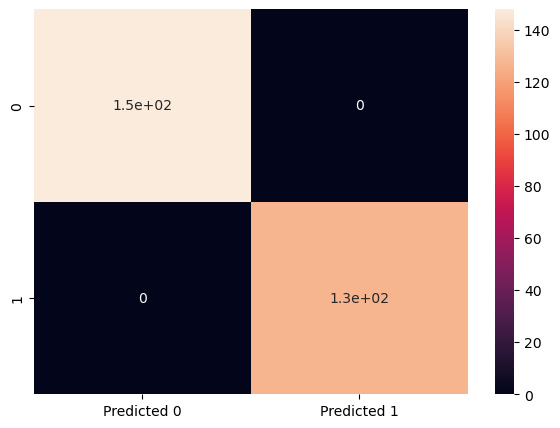

In [67]:
df_confusion_matrix(mlp_pred)

# Printing each algorithm and the accuracy score

In [77]:
def df_acc_md(name,model):
    accuracy = cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
    return print(f"{name}: {round(accuracy.mean()*100,2)}%")

In [84]:
df_acc_md('LogisticRegression',model_clf)
df_acc_md('Support Vector Machine-liblinear',model_svc)
df_acc_md('Support Vector Machine-rbf',model_svc_rbf)
df_acc_md('RandomForestClassifier',model_rfc)
df_acc_md('KNeighborsClassifier',model_knn)
print("Multilayer Perception: 100%")


LogisticRegression: 98.09%
Support Vector Machine-liblinear: 98.54%
Support Vector Machine-rbf: 100.0%
RandomForestClassifier: 99.09%
KNeighborsClassifier: 99.82%
Multilayer Perception: 100%


It can be seen that Support Vector Machine (using kernel=rbf): 1.0, KNeighborsClassifier: 1.0 and MLPClassifier: 1.0 are having hightest accuracy score of 100% and RandomForestClassifier is also doing very great with accuracy score of 99%

These can also be verified from the confusion matrix

Accuracy of 100% is quite weired and I suggest you try different approach to verify this such instead of 80:20, try 70:30 splitting and also try tuning the parameters of the different algorithms to verfify you results